In [2]:
import numpy as np
import scipy.optimize as op
import datetime
import emcee
import matplotlib.pyplot as plt
import corner
from scipy.stats import norm
%matplotlib inline

In [3]:
mars = np.genfromtxt('harp_mars.dat', usecols=np.arange(0, 9))
jupiter = np.genfromtxt('harp_jupiter.dat', usecols=np.arange(0, 8))
uranus = np.genfromtxt('harp_uranus.dat', usecols=np.arange(0, 8))

In [4]:
mars_etamb = mars[:,5]
jupiter_etamb = jupiter[:,5]
uranus_etamb = uranus[:,5]

mars_dates = mars[:,0]
jupiter_dates = jupiter[:,0]
uranus_dates = uranus[:,0]

mars = mars[mars[:,1] > 5]
mars = mars[mars[:,1] < 19]
mars = mars[mars[:,5] > 0]
jupiter = jupiter[jupiter[:,1] > 5]
jupiter = jupiter[jupiter[:,1] < 19]
jupiter = jupiter[jupiter[:,5] > 0]
uranus = uranus[uranus[:,1] > 5]
uranus = uranus[uranus[:,1] < 19]
uranus = uranus[uranus[:,5] > 0]

planets_etamb = np.concatenate((mars_etamb, jupiter_etamb, uranus_etamb), axis=0)
raw_dates = np.concatenate((mars_dates, jupiter_dates, uranus_dates), axis=0)
dates = [datetime.datetime.strptime(str(int(date)),'%Y%m%d') for date in raw_dates]

In [5]:
oldest = min(dates)
days = np.array([np.float64((date - oldest).days) + 1 for date in dates])

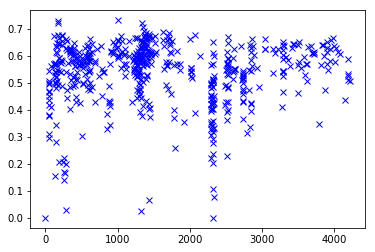

In [6]:
plt.figure(1)
plt.plot(days, planets_etamb, 'bx')
plt.show()

In [7]:
m_true = 0.0
b_true = .5

lnyerr_true = -2.3
lnV_true = -1.6

In [8]:
print(np.log(.1))
print(np.log(.2))

-2.30258509299
-1.60943791243


In [9]:
# def lnlike(theta, x, y):
#     m, b, f, sig = theta
#     model = m * x + b
#     inv_sigma2 = 1.0/((f*y)**2)
#     return -0.5*(np.sum((y+np.random.normal(0.0, sig) - model)**2*inv_sigma2))

def lnlike(theta, x, y):
    m, b, lnyerr, lnV = theta
    print(m, b, lnyerr, lnV)
    angle = np.arctan(m)
    delt = -np.sin(angle)*x + np.cos(angle)*y - b*np.cos(angle)
    sigsq = (np.exp(lnyerr)*y)**2 * np.cos(angle)**2
    return -np.sum(0.5*np.log(sigsq + np.exp(lnV))) - np.sum(0.5*(delt**2)/(sigsq + np.exp(lnV)))

#     term1 = 0
#     term2 = 0
#     for i in range(len(x)):
#         vhat = np.matrix([[-m], [1]])/(np.sqrt(1 + m**2))
#         Z = np.matrix([[x[i]], [y[i]]])
#         delt = np.matmul(vhat.T, Z) - b * np.cos(np.arctan(m))
#         S = np.matrix([[0, 0], [0, np.exp(lnyerr)**2]])
#         bsig2 = np.matmul(np.matmul(vhat.T, S), vhat)
#         term1 += -0.5 * np.log(bsig2 + np.exp(lnV))
#         term2 += -0.5 * (delt**2)/(bsig2 + np.exp(lnV))
#     return (term1 + term2)

In [10]:
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, lnyerr_true, lnV_true], args=(days, planets_etamb))
m_ml, b_ml, lnyerr_ml, lnV_ml = result["x"]

0.0 0.5 -2.3 -1.6
1.49011611938e-08 0.5 -2.3 -1.6
0.0 0.500000014901 -2.3 -1.6
0.0 0.5 -2.2999999851 -1.6
0.0 0.5 -2.3 -1.5999999851
0.0 0.5 -2.3 -1.6
1.00999863871 0.500614194739 -2.30004713211 -1.60153959054
1.00999863871 0.500614194739 -2.30004713211 -1.60153959054
1.00999865362 0.500614194739 -2.30004713211 -1.60153959054
1.00999863871 0.50061420964 -2.30004713211 -1.60153959054
1.00999863871 0.500614194739 -2.30004711721 -1.60153959054
1.00999863871 0.500614194739 -2.30004713211 -1.60153957564
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000002515
1.65110533174e-05 0.500000010032 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000024933 -2.30000000077 -1.60000002515
1.64961521562e-05 0.500000010032 -2.29999998587 -1.60000002515
1.64961521562e-05 0.500000010032 -2.30000000077 -1.60000001024
1.60352603418e-05 0.501286980938 -2.30033117269 -1.61071360091
1.60352603418e-05 0.501286980938 -2.30033117269 -1.6107

1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547848023
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547848023
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
1.99257455519e-06 0.534759773444 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759788345 -10.0931937748 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937599 -4.29547849513
1.97767339399e-06 0.534759773444 -10.0931937748 -4.2954

In [11]:
print(m_ml, b_ml, lnyerr_ml, lnV_ml)
print(np.exp(lnyerr_ml), np.exp(lnV_ml))

1.97767339399e-06 0.534759773444 -10.0931937748 -4.29547849513
4.13601055901e-05 0.013630048225


In [12]:
print(np.log(.1))

-2.30258509299


In [13]:
def lnprior(theta):
    m, b, lnyerr, lnV = theta
    if 0.0 < b < 1.0:
#   if -1.0 < m < 1.0 and 0.0 < b < 1.0 and -5.0 < lnyerr < 0.0 and -3.0 < lnV < 0.0:
        pri_m = norm.logpdf(m, 0.0, 1.0)
        pri_lnyerr = norm.logpdf(lnyerr, -2.5, 2.5/3.0)
        pri_lnV = norm.logpdf(lnV, -1.5, 1.5/3.0)
        return pri_m + pri_lnyerr + pri_lnV
    return -np.inf

In [14]:
def test(theta, x, y):
    return 0

In [15]:
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)
#     return lp + test(theta, x, y)

In [16]:
ndim, nwalkers = 4, 200
pos = [result["x"] + np.random.randn(ndim)*1e-4*[.2, .1, .5, .3] for i in range(nwalkers)] #nwalkers x ndim entries

In [26]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(days, planets_etamb), threads=4, a=4.0)

-3.873812965e-05 0.534781091296 -10.0931968571 -4.29547366456
-1.41199161377e-05 0.534748428159 -10.0932202433 -4.29547229067
-1.92459664025e-06 0.534761328194 -10.093189485 -4.29543748004
3.89840427266e-05 0.534763334439 -10.0931859014 -4.2954714059
2.42191741734e-05 0.534765545044 -10.0932482263 -4.29546410762
3.73850175301e-05 0.53476630496 -10.0932491659 -4.29546148261
-5.57640766927e-06 0.534765018873 -10.0931753869 -4.29548953722
-2.31128469538e-06 0.534767032331 -10.0931071787 -4.29552467259
4.18616755867e-07 0.534750933066 -10.0931652394 -4.29544646132
4.24136662942e-06 0.534749999052 -10.0931895244 -4.29550074229
5.38791421318e-06 0.534761744778 -10.0931784959 -4.29547935567
-1.24893406337e-05 0.534753128428 -10.0931319346 -4.2954531766
6.35609361978e-07 0.534742371266 -10.0931713489 -4.29544784541
2.51474575233e-05 0.534777332032 -10.093164301 -4.29543246684
8.04222098327e-06 0.534750580875 -10.0932136578 -4.29551871135
-2.92980151929e-05 0.534769250033 -10.0931332369 -4.2955

-2.79719001557e-06 0.534755962265 -10.0932006298 -4.29544428271
1.59718975778e-05 0.534771128469 -10.0932330717 -4.29548584749
-6.09236958324e-06 0.534752498805 -10.093249552 -4.2954655376
-1.24658290956e-05 0.534773527187 -10.0931910535 -4.29545318591
4.30115047219e-05 0.534751541324 -10.0932365263 -4.29542653731
3.5221976826e-06 0.534742217045 -10.0931895375 -4.29549385311
1.97756401747e-05 0.534751273038 -10.0932128266 -4.29548964007
9.393643476e-06 0.534785017958 -10.0930863254 -4.29553252219
-4.98395971164e-06 0.534753105308 -10.0931736141 -4.29544157949
2.99250777008e-05 0.534754050546 -10.0932106656 -4.29550641563
-3.31490194946e-05 0.534778224366 -10.0931576551 -4.2954908383
-3.56521829818e-06 0.534773098896 -10.0932367179 -4.29548983691
-1.99375831471e-05 0.534763648254 -10.0931476071 -4.29545253772
8.72246990182e-06 0.534769856493 -10.0932495819 -4.29549054182
2.77120062079e-05 0.534750481266 -10.0932382351 -4.29547499646
-1.0470962933e-05 0.53475442456 -10.093175949 -4.29551

-5.27689734379e-05 0.534817428738 -10.0932100471 -4.29542058228
-3.32044652921e-06 0.534801306822 -10.0931801858 -4.29547668501
-8.26480535661e-06 0.5347543785 -10.0932391416 -4.29548732163
-2.09008732411e-05 0.534774535327 -10.0932107835 -4.29538248477
-6.38598974131e-06 0.534769148489 -10.0931263872 -4.29547297206
4.8776905933e-05 0.534774643574 -10.0934768534 -4.29543043406
1.96790654106e-05 0.534773202186 -10.0931906832 -4.29549387757
3.05844193653e-05 0.534781730983 -10.0931666114 -4.2955066346
-2.34547906215e-06 0.534754429292 -10.0931568979 -4.29550594215
1.51171849903e-05 0.534745905054 -10.0931241167 -4.29543837399
-1.71598406144e-05 0.534765363069 -10.093228064 -4.29549460047
-4.58506179418e-05 0.534769395802 -10.093184855 -4.29545848324
-6.10101055582e-05 0.53470814205 -10.093342274 -4.29555175774
-6.12173373395e-05 0.534733026408 -10.0932306319 -4.29546710274
-0.000162297915635 0.534772704244 -10.0934458334 -4.29565915096
-1.56883587086e-05 0.534755752869 -10.0932395426 -4.

8.9799681554e-06 0.534766722644 -10.0931777786 -4.29546831683
8.98796867033e-06 0.534744778685 -10.0930786129 -4.29553676355
6.88497489501e-05 0.534697401189 -10.0929349096 -4.29533620783
1.67253513515e-05 0.534759625466 -10.0931898941 -4.29546530791
0.000117730136893 0.534683390247 -10.0932929779 -4.29534003434
2.17523414877e-05 0.534753613276 -10.0930826372 -4.2954439924
0.000128454727794 0.534759066031 -10.0933669788 -4.29547024143
-9.70350020053e-05 0.534734069285 -10.0932916014 -4.29550425505
-6.83293486763e-05 0.534790577964 -10.0932262947 -4.29541604995
-1.73408139438e-05 0.534733872524 -10.0930686246 -4.29544314966
1.87708700544e-05 0.534749761917 -10.0931419617 -4.29540795327
-0.000105824473535 0.534796006132 -10.0928957871 -4.29559736879
-2.08056327325e-05 0.534742370507 -10.0932279896 -4.29547741801
-0.000123339232452 0.534728551234 -10.0928860902 -4.29548031034
3.57909295202e-05 0.534765640145 -10.0932476721 -4.29546309069
-4.53349579498e-05 0.534715260171 -10.0933130324 -4

-5.21626771975e-05 0.534741597966 -10.0931324484 -4.29530423442
2.76406341504e-05 0.534754743009 -10.0932010636 -4.29544555513
-1.75598678811e-05 0.534564340446 -10.0942600056 -4.29522387882
-4.97518300448e-06 0.534745036162 -10.0930571366 -4.29534043549
1.35007955236e-05 0.534760569268 -10.0931846637 -4.29552148712
1.10249764737e-05 0.534759656075 -10.0931965633 -4.29549011786
3.82862397211e-05 0.534686346535 -10.0933283227 -4.29543955252
-9.35961873363e-06 0.534745910513 -10.0932758878 -4.29546767324
-2.19599430803e-06 0.534742177004 -10.0932010053 -4.29543728384
0.00011722013906 0.534836750385 -10.0929669499 -4.29550974708
2.12971381712e-05 0.534761536453 -10.0930569224 -4.29548113765
2.20463036583e-05 0.534762704666 -10.0932189476 -4.29549243056
1.62491470535e-05 0.534656562968 -10.093163922 -4.295594912
7.96848509201e-06 0.534755766802 -10.0932489878 -4.29547155294
-1.85519514259e-05 0.53475581823 -10.0936458263 -4.2955032722
-2.39683162677e-05 0.534767322193 -10.0931671189 -4.295

-6.07923170345e-06 0.534765993704 -10.0931417425 -4.29545746278
1.08031012734e-05 0.534788025505 -10.0930509997 -4.29554397551
-3.00633204041e-05 0.534704232047 -10.0935424174 -4.29534910613
-9.93708111849e-05 0.534753984588 -10.0934478222 -4.29561820772
8.47028094666e-06 0.534754264093 -10.093090073 -4.29537354596
3.9691172295e-06 0.534740702085 -10.0935568902 -4.29560118833
9.52538860873e-05 0.535037876939 -10.0921211683 -4.29574080041
-7.44328669418e-06 0.534751172087 -10.0935509574 -4.29545819316
1.39037904553e-05 0.53475220202 -10.0932476545 -4.29550075548
5.35543516363e-06 0.534754009808 -10.0931889416 -4.2954857084
-2.53594896583e-05 0.53476417399 -10.093288286 -4.29548214871
5.34649981426e-06 0.534767704854 -10.093150348 -4.29547056228
4.14634807825e-05 0.53476640151 -10.0931203357 -4.29547964396
-3.72288717011e-05 0.534777774069 -10.0932749443 -4.29549360057
3.89086136574e-06 0.534760062608 -10.0932326737 -4.29548828137
1.56278210579e-05 0.534795391517 -10.0934679406 -4.295571

2.06240513582e-05 0.534785334356 -10.0933635806 -4.29546107457
6.740978363e-05 0.534720281411 -10.0931841822 -4.29543357762
7.53101639782e-07 0.534738914935 -10.0932467946 -4.29554764127
-1.78721664206e-05 0.534762190098 -10.0932111463 -4.29548560604
2.80103429838e-06 0.534758647155 -10.093201323 -4.29547681513
0.000101996170953 0.534756426233 -10.0935650213 -4.29524365758
2.28626420021e-05 0.534752011678 -10.0937604865 -4.2957994844
2.05579866547e-06 0.534748140711 -10.0930904128 -4.29553600389
8.45597389628e-05 0.53478559998 -10.0933014807 -4.29572093692
8.90562275236e-06 0.534766675928 -10.0932555625 -4.29556238938
1.03823560747e-05 0.534760651593 -10.093195513 -4.2954648114
2.1326374974e-05 0.534747042687 -10.0930348718 -4.295431388
1.32580953307e-05 0.534751427265 -10.0931438835 -4.29546603907
2.01478360877e-05 0.534739938308 -10.0932537343 -4.295406565
3.13729448386e-05 0.534757924444 -10.0932096754 -4.29542629051
-5.41252070844e-05 0.534827398625 -10.0928726024 -4.29538277177
0.

2.9114606685e-05 0.53475863467 -10.0931846452 -4.29547265367
5.29821310785e-05 0.534728418918 -10.0933272125 -4.29544062053
3.17851150761e-05 0.534746150533 -10.0931853847 -4.29535343911
1.44103896651e-05 0.534788002707 -10.0927611531 -4.29581332162
-2.03190023933e-05 0.53477374109 -10.0931794407 -4.29547571626
2.85674267247e-05 0.534743801775 -10.0932613806 -4.29546309456
8.71153240129e-07 0.534755025032 -10.092935358 -4.29539689446
-3.13237307894e-05 0.534594396383 -10.09391105 -4.29495455045
-0.000101211608716 0.534713374835 -10.0931914744 -4.29541806346
7.74169013817e-06 0.534760136162 -10.093231322 -4.29543782116
8.88037172563e-06 0.534754766876 -10.0931929836 -4.29552517154
3.17872610561e-05 0.534775852905 -10.0931596497 -4.29548677874
2.60616772129e-05 0.534786750317 -10.0926941422 -4.29541645657
-2.50056339199e-05 0.534793904198 -10.0931293409 -4.29536436569
-2.06921570273e-05 0.534700101487 -10.0930836112 -4.29542456434
-5.68211911806e-05 0.534763946987 -10.0936225351 -4.29535

1.08184764596e-05 0.534783629979 -10.0930984565 -4.29552180791
1.63387159254e-05 0.534757799911 -10.0932459859 -4.29547284503
-2.649275655e-06 0.534751219677 -10.0931889711 -4.29549257256
1.61933096268e-05 0.534766713842 -10.0932502044 -4.29547952968
2.48524722442e-06 0.534763268789 -10.0933473765 -4.29541478222
-5.55004686945e-07 0.534775094331 -10.0936131507 -4.29579064035
-3.74822415891e-05 0.534773199561 -10.092937444 -4.2955315651
-2.70275350719e-06 0.534748945166 -10.0932589613 -4.29548517355
2.60686877999e-06 0.534718521881 -10.0932595742 -4.29566663974
-8.86402327655e-06 0.534781238055 -10.0932450763 -4.29544120458
3.00314164855e-06 0.534750626495 -10.0932181762 -4.29551773515
8.69258404094e-06 0.53475297904 -10.092263327 -4.29483043485
1.16387980057e-05 0.534748555601 -10.0931449412 -4.29550042242
1.19928575316e-05 0.534770692828 -10.093218676 -4.29547845192
-3.12359882035e-05 0.534763892269 -10.0933293647 -4.29550102162
1.08363709332e-05 0.534742809283 -10.0932063157 -4.29551

-2.24354825468e-06 0.534710224289 -10.0932967058 -4.29563603908
-6.38170770531e-06 0.534767781774 -10.0930725624 -4.29543857206
6.54600686179e-06 0.534730361816 -10.0932528519 -4.29556479425
1.21901966514e-06 0.534774012126 -10.0929321352 -4.29537133193
4.84265658474e-06 0.534847300742 -10.0928022605 -4.29561217543
1.74708296762e-05 0.53478863566 -10.0932833241 -4.29543682023
-1.2277070334e-05 0.534767881339 -10.0931896009 -4.29547303246
8.44323541306e-06 0.534756005658 -10.0931673076 -4.29547986917
3.34929729992e-05 0.534778267439 -10.0931629857 -4.29534934543
2.92833728792e-06 0.534763958487 -10.0931501903 -4.29543297319
-6.20346248501e-06 0.534772471451 -10.0932620297 -4.29552389204
7.52175020094e-06 0.534758170229 -10.0935561318 -4.29569550591
-2.11483326703e-05 0.534768165642 -10.0932644885 -4.29552612688
3.41702736063e-06 0.53475537634 -10.0931855009 -4.29553261305
1.68366918644e-05 0.534757732318 -10.0932545806 -4.29544002249
7.55483273315e-06 0.534736765506 -10.0929964586 -4.29

8.26108903364e-06 0.534747793352 -10.093065027 -4.29571736091
-6.51988534405e-05 0.534803886335 -10.093278436 -4.29572958674
-1.4011198936e-05 0.534743072599 -10.092930801 -4.29529167932
-4.74813302394e-06 0.534714489025 -10.092835347 -4.29535717461
5.77352431685e-06 0.534763015486 -10.0931221769 -4.29549107992
6.43942313877e-06 0.534761990528 -10.0932010336 -4.29548709991
1.23874092189e-05 0.534726171188 -10.0929969591 -4.29542242877
1.68151705919e-05 0.534909857446 -10.0932569679 -4.29591640819
5.59066576806e-06 0.534750157134 -10.0932303547 -4.29547115029
1.74867861606e-05 0.534762211027 -10.0932033663 -4.29540291357
7.17419807639e-06 0.534758705391 -10.0930886785 -4.29553249606
1.24733926399e-05 0.534771264945 -10.0919479814 -4.29513207844
4.13946329211e-05 0.534736508751 -10.0931493358 -4.29538397295
1.39127901146e-05 0.534700622142 -10.093565014 -4.29550966302
-1.29611213815e-06 0.53472928029 -10.0932932119 -4.29547606864
5.94180409884e-05 0.534800780707 -10.0931187311 -4.2954407

-5.51962610412e-06 0.534788237855 -10.0922666477 -4.29597243878
2.7899827103e-05 0.534910373813 -10.0943929004 -4.29578592085
5.07197394393e-05 0.534717282603 -10.09300956 -4.29562503997
8.50105427789e-05 0.534752885848 -10.0943955278 -4.2940161755
1.12778369922e-05 0.534756406549 -10.0931981038 -4.2954577495
1.36692868094e-05 0.534760995168 -10.093225272 -4.29545876078
1.99681802392e-05 0.534761439964 -10.0933220903 -4.29547614365
2.05848365336e-05 0.534750635639 -10.0931702604 -4.29546895355
5.62873769436e-05 0.534779766616 -10.0933207131 -4.29549564934
2.70075141014e-06 0.534776842332 -10.0936666104 -4.29582289715
2.83544058625e-06 0.534710205469 -10.0933800774 -4.29509144635
1.90741372847e-05 0.534751682519 -10.0931053748 -4.29543860403
5.82757356866e-06 0.534778431776 -10.0930979101 -4.2955143424
5.01072844424e-06 0.534757126949 -10.0927270046 -4.29514039102
6.99167144816e-06 0.534753340574 -10.0932173252 -4.29539459233
-6.27351470967e-06 0.534811071328 -10.0930482923 -4.295301381

-8.02817355468e-06 0.534010895855 -10.0932338021 -4.29522129942
3.08143095667e-07 0.534752553079 -10.0932410564 -4.29549693129
-2.18935293198e-05 0.534895505664 -10.0919566767 -4.29487527114
-1.70544366025e-05 0.534847233495 -10.0938361629 -4.29483866791
9.57120398163e-06 0.534749950986 -10.0930450196 -4.29558383671
2.00287835439e-05 0.534756252331 -10.0932005993 -4.29549460993
2.47690832468e-06 0.53475512318 -10.0931155924 -4.29545276992
1.47619904308e-05 0.533743000042 -10.0978497864 -4.29541402405
-4.02139177766e-06 0.534708883389 -10.0933120083 -4.29577037023
1.45998840974e-05 0.534752140558 -10.0931508848 -4.2955059169
1.89899194344e-06 0.534533056044 -10.0938063842 -4.29613530114
1.62997045778e-05 0.534758349853 -10.0932538473 -4.2954416559
3.48237695885e-05 0.53473491779 -10.0930991846 -4.2954482802
2.09877317185e-05 0.534769558715 -10.0932791358 -4.29547522015
4.32727718896e-05 0.534820503498 -10.0934391755 -4.29548610205
7.25115720865e-06 0.5347544498 -10.0931785336 -4.2954989

1.15915903911e-06 0.534764760104 -10.0932214382 -4.29551360326
-3.23127089754e-05 0.534778160873 -10.09315485 -4.29555157108
-3.76900818687e-06 0.534766352807 -10.0932603352 -4.29555892038
5.92590512795e-06 0.53475808626 -10.0933688214 -4.29556143586
5.11473655176e-06 0.53462334801 -10.0938486393 -4.2960255334
1.98731202685e-06 0.534724953956 -10.0931336323 -4.29543514732
-1.19076344737e-05 0.534760164023 -10.0938464026 -4.29593262698
3.44540901069e-06 0.534810722003 -10.09323176 -4.2954957743
4.99973424737e-06 0.534752089639 -10.0930717399 -4.29565959023
-5.64045300387e-06 0.534772686716 -10.0931612117 -4.29556875758
-5.2205109401e-06 0.534724335079 -10.0926930189 -4.2953350886
-2.2663010561e-05 0.534704229029 -10.092593691 -4.29544664325
6.66535215931e-06 0.534705524419 -10.0929092341 -4.29538545191
3.85997228631e-06 0.534766601273 -10.0924124084 -4.29477179785
-9.32681516789e-06 0.534716036833 -10.0936145009 -4.29547276084
-1.10348079847e-05 0.534779633815 -10.0932244147 -4.29551340

2.4951230085e-05 0.534764952597 -10.0932420888 -4.29548511467
7.10513392773e-06 0.534766464144 -10.0935632078 -4.29544592653
9.93299197808e-06 0.534752390016 -10.0932034709 -4.29548813282
-7.33923310666e-06 0.534740532315 -10.0939125308 -4.29535172721
8.52537183054e-06 0.534738649359 -10.0935932528 -4.295718187
-3.37094903059e-06 0.53476581532 -10.0931650304 -4.29554684645
1.892308854e-05 0.534768783513 -10.0932730727 -4.29554418196
5.65522218053e-05 0.534718297367 -10.0931046943 -4.29564781822
1.99515427762e-06 0.534756782333 -10.0931274305 -4.29549536495
7.44381842019e-06 0.534750988373 -10.0935461641 -4.29502409322
7.32337535163e-06 0.534890903324 -10.0951244286 -4.29599589325
2.61309063296e-05 0.534887090817 -10.0937040314 -4.29504869228
1.07013046497e-05 0.534781460713 -10.0933670567 -4.29553111541
1.39914004549e-05 0.534759304126 -10.0932894582 -4.29544772073
1.43210888423e-05 0.534767090823 -10.093513524 -4.29542591316
1.87190317023e-06 0.53477446267 -10.0930769553 -4.2948700723

2.27517308935e-05 0.534893769434 -10.0934909868 -4.29531319094
2.55714209068e-06 0.534749763217 -10.0931294993 -4.29543454141
-9.92649623978e-07 0.535634264163 -10.0901508611 -4.29628795934
1.53077349438e-05 0.534673816601 -10.0943412378 -4.29473806638
-1.91901981899e-05 0.53478913525 -10.0927273035 -4.29544726138
-5.4466853871e-05 0.534745069904 -10.0933821251 -4.29578878517
6.20482462657e-06 0.534978010251 -10.0934387632 -4.29553516217
5.60513815595e-06 0.534719415336 -10.0931243549 -4.29545356005
-1.17103849753e-05 0.536338750532 -10.090827574 -4.29688054755
3.16036154345e-06 0.534737099755 -10.0932878215 -4.2953243938
2.11242230953e-05 0.534725735699 -10.0932398046 -4.29544394944
-1.7111888207e-06 0.534710137296 -10.0933071365 -4.29570844245
-1.85465257673e-06 0.534805289144 -10.09280712 -4.29529194349
2.73284143541e-06 0.53450252643 -10.0935725401 -4.29548818908
7.40952291685e-06 0.534756774296 -10.0931803414 -4.29546776342
1.14557269164e-05 0.532924802446 -10.1011025573 -4.295645

2.8450586765e-05 0.534781929253 -10.0932066512 -4.29545268654
4.67686947423e-06 0.534592968522 -10.0930589997 -4.2952619241
2.03391163421e-06 0.534747748212 -10.093350141 -4.29536792372
4.79828311408e-06 0.534918452021 -10.0922829877 -4.29521950918
7.103812579e-06 0.534448626871 -10.0873941217 -4.29419984208
1.20636630045e-05 0.535258517982 -10.0936333141 -4.29347882019
1.89082153924e-06 0.534665737595 -10.0936596669 -4.29586407951
-1.40727150689e-05 0.534745823699 -10.0936400178 -4.29469335875
-3.40450553006e-05 0.534771839039 -10.093345304 -4.2954674692
4.64510948524e-06 0.534711931785 -10.0934201579 -4.29567564413
1.17425510201e-05 0.534768007897 -10.0935343521 -4.29563474694
-1.43634857874e-05 0.534773213511 -10.0935571174 -4.2953957336
1.10273214319e-05 0.534518001177 -10.0930781327 -4.29505518151
-4.61842134261e-05 0.534773228278 -10.092979556 -4.29553855728
5.26506524288e-06 0.534748138482 -10.0930285333 -4.2957767825
1.22098271896e-06 0.540458026136 -10.1353571644 -4.2952849316

5.97386693864e-06 0.534754087254 -10.0931669919 -4.29562710462
3.48084876097e-05 0.534594837856 -10.0936272831 -4.29598426411
5.96092240196e-07 0.534810894173 -10.0923931212 -4.29524927255
-5.04954243546e-05 0.535741046981 -10.0894952916 -4.29140208686
5.1022942412e-05 0.53392320286 -10.096831294 -4.29484886429
5.28677335271e-06 0.534401132852 -10.0941497924 -4.29568307234
7.84026929325e-06 0.534792343321 -10.0932696507 -4.29571113799
-3.91616995582e-06 0.534766336779 -10.0931833224 -4.29545825105
6.11136794427e-06 0.534753522702 -10.0932596872 -4.29548833935
-2.72598015981e-06 0.524179566253 -10.0108916616 -4.29439580085
1.01617828148e-05 0.534740306401 -10.0935088899 -4.29565882775
3.58345235966e-06 0.534744095485 -10.0931151924 -4.29563245329
8.98154765726e-05 0.534772089565 -10.0934288849 -4.29563399476
1.01838937834e-05 0.534654311707 -10.0938008396 -4.29589035601
1.78112026565e-05 0.53474885152 -10.0931239911 -4.2955158116
1.67652266594e-05 0.534508464786 -10.0991165209 -4.296125

6.51300251595e-06 0.534900758755 -10.092774419 -4.29455335957
9.61482252376e-07 0.534888496353 -10.0958450438 -4.29724398558
-5.44676289525e-06 0.53475713851 -10.0914051919 -4.2959885197
-3.70793867443e-05 0.534739072787 -10.0922137915 -4.29476874169
-3.94674423031e-07 0.534672783857 -10.0932352891 -4.29530395946
-1.17546949585e-06 0.536449459434 -10.087703785 -4.29627623795
-1.43445974238e-05 0.534700331646 -10.0940497173 -4.2947705718
2.90757777712e-06 0.534653612716 -10.093471445 -4.29592442609
5.21560455383e-06 0.534755751243 -10.0936106368 -4.29536722335
-4.09283333162e-05 0.534791152994 -10.0931319265 -4.29536411033
1.6490585827e-05 0.531145376024 -10.0969871095 -4.29525005815
2.72734252795e-05 0.534661869257 -10.094177616 -4.29522217985
6.15605342148e-06 0.534290990288 -10.0941127009 -4.29548477133
-4.97563185498e-05 0.534799410281 -10.0934808363 -4.29510533905
5.22872980849e-06 0.535369520643 -10.0939888856 -4.2956372222
3.21619982016e-06 0.534744791142 -10.0930607006 -4.295377

2.8073858708e-06 0.534862797458 -10.0918339678 -4.29586209572
-1.6176200514e-06 0.534824190204 -10.0936208534 -4.29537792891
1.37404679816e-05 0.534815206832 -10.092456186 -4.29588466859
-1.77772661185e-06 0.534943541487 -10.0936175298 -4.29569725341
4.02369873325e-06 0.534710409337 -10.0933955986 -4.29561866842
2.34483816513e-05 0.53447946284 -10.0941414004 -4.29508784983
3.21869397879e-06 0.531341433022 -10.0698680922 -4.29516882776
5.52922271239e-05 0.534807872984 -10.0932739953 -4.29558439844
6.47809996031e-06 0.534755453505 -10.0931863876 -4.29545815995
3.0402337183e-05 0.535909793027 -10.0875712986 -4.29345067709
4.38236140122e-06 0.535207817626 -10.0938082087 -4.29561813473
7.67359242203e-06 0.534487282513 -10.0881430158 -4.2943687099
5.92137966153e-06 0.534842241846 -10.0907104544 -4.29311322947
-1.34633948546e-05 0.534021003772 -10.0951595751 -4.29750317588
7.42900636287e-07 0.534776702856 -10.0933791189 -4.2953069383
3.87956546644e-06 0.534591855611 -10.0935467955 -4.29547716

3.57544100049e-06 0.534806927302 -10.0915847658 -4.29487846018
-1.98445398271e-06 0.534730623387 -10.0932685627 -4.29526246517
-1.66798510969e-05 0.530956249683 -10.1027394249 -4.30825927859
-1.27698405942e-06 0.534398255956 -10.0934481666 -4.2948027929
2.50418765712e-06 0.534542061492 -10.0947046643 -4.29539367959
-1.03544767683e-05 0.534873576681 -10.0943367085 -4.29537206838
1.11138264778e-06 0.535729362755 -10.0908340434 -4.2945337908
2.16587743901e-06 0.542550724704 -10.1433428994 -4.29553439851
4.39827715421e-06 0.534629520925 -10.0934860591 -4.29562935934
-5.50643746771e-06 0.545881951479 -10.0888296901 -4.30291054091
6.03720812203e-05 0.536602809663 -10.0911531451 -4.29910262257
6.16041737311e-06 0.53478179688 -10.0906930155 -4.2908005616
-2.03831287134e-06 0.534724187675 -10.0930100613 -4.29553655608
1.77497851999e-05 0.535036009928 -10.0991928844 -4.29853250982
-1.03584684764e-05 0.534897378559 -10.0941265998 -4.29625908644
-2.13845827662e-05 0.536419560815 -10.1089816352 -4.

-2.31086537192e-06 0.53037956031 -10.1501776278 -4.30608733751
1.02071015751e-05 0.535517125419 -10.0985304562 -4.3007205168
-2.98057847736e-05 0.529024450007 -10.0999959076 -4.3006026869
-2.11955013297e-05 0.535350533488 -10.0793682258 -4.28960837857
-4.54602888415e-06 0.534621676438 -10.0935754189 -4.29572860375
3.71673841292e-06 0.534282618796 -10.0928060548 -4.29454059537
-1.16239308015e-05 0.533483394435 -10.0924601252 -4.2963950393
7.31288486698e-06 0.53474080152 -10.095560091 -4.29321729419
1.3593220425e-05 0.523023714531 -10.0046490622 -4.29349830882
1.33609317277e-05 0.528533184843 -10.056672811 -4.28254481418
1.46857537127e-05 0.526601565348 -10.1138714096 -4.30031650882
-2.18127696379e-05 0.534772139401 -10.0920546629 -4.29477072407
-5.20922697822e-06 0.521447935048 -9.99046660249 -4.28537296182
-1.2807794481e-05 0.539346280827 -10.0783485264 -4.29909768409
4.51296424112e-06 0.534436132294 -10.0918936296 -4.29809514288
3.57857749195e-06 0.530133884417 -10.0641026334 -4.29511

2.71511313201e-06 0.534789257448 -10.0929517624 -4.2935240572
1.00438646671e-05 0.534949289797 -10.0919051766 -4.29496025174
4.10816013072e-06 0.53464450879 -10.095369249 -4.29657082471
4.67076690522e-05 0.499095431137 -10.1590797486 -4.26252050199
-6.51013956423e-06 0.535316689217 -10.0856452404 -4.29726243771
-1.52564476951e-06 0.526960319259 -10.151771119 -4.2794166913
4.14279920877e-06 0.534862741037 -10.0935166227 -4.29554678495
-1.40926524294e-05 0.537826866391 -10.0823127139 -4.29420640001
3.51900815709e-05 0.534854774523 -10.093644787 -4.29523364051
3.50764758145e-08 0.534756951886 -10.0929055984 -4.29587505753
2.22196111205e-05 0.535753831389 -10.0812998578 -4.29779844408
-2.72504615215e-06 0.534938375281 -10.0935157497 -4.29569682634
2.16266469866e-05 0.53511422717 -10.0964384862 -4.29176722252
5.12990196059e-05 0.53955076016 -10.0873515292 -4.29092579951
2.94252940492e-05 0.533377974046 -10.0710297564 -4.28255193531
1.37488801188e-06 0.53279843922 -10.0914493775 -4.296648702

7.53618524092e-06 0.538516159271 -10.0837185117 -4.25283096373
7.91936570222e-06 0.53198825672 -10.1039016072 -4.29317616917
9.72413444403e-06 0.533702494688 -10.0760428736 -4.28528616062
9.18386293906e-06 0.53311161031 -10.0981196246 -4.29470871082
-6.92861291658e-06 0.537835720965 -10.0769089689 -4.28979850571
-1.6987982446e-05 0.546029143578 -10.1730782968 -4.29475527972
-1.24084238549e-06 0.526936725213 -10.1659268667 -4.31778520436
-1.58953823298e-05 0.535859395886 -10.1402475428 -4.31817922495
7.03731115398e-06 0.552363839163 -10.0508091545 -4.31289853191
-1.00465973241e-06 0.539906631548 -10.0977516296 -4.30370411944
-1.79421150217e-05 0.526451780474 -10.0300626303 -4.29409560827
1.74733743394e-05 0.545765882104 -10.454729742 -4.36772789225
4.03751517838e-06 0.534881957858 -10.0926208117 -4.2926797236
-3.75955349608e-05 0.544650867104 -10.0538359972 -4.28302282165
-8.20172924045e-06 0.544203991337 -10.1567579724 -4.31763154313
-2.67141695825e-06 0.534636203175 -10.0922886603 -4.

-1.96929403786e-06 0.534744617809 -10.09310082 -4.29555255704
-1.71362915955e-06 0.534796011913 -10.0928587322 -4.29555212526
9.9261230122e-07 0.535265727043 -10.0860485697 -4.30145297247
-2.41757694147e-05 0.535118244338 -10.1101182468 -4.29713520594
8.66433695566e-06 0.53550108393 -10.0992398284 -4.30112463574
-1.04949012823e-06 0.526159065837 -10.1440169867 -4.31868658544
2.04938481008e-05 0.546402033219 -10.2948919974 -4.28189744816
4.00372618553e-06 0.535154172777 -10.0938764027 -4.29703060894
-3.97167772288e-06 0.533660149225 -10.1007630438 -4.29424385909
-2.2050062537e-05 0.531939943011 -10.1047071931 -4.30342017369
1.74598603216e-05 0.522708906099 -10.0821679715 -4.27586329134
1.62830422294e-05 0.514683099427 -9.93951989431 -4.29163567529
-1.59231874716e-05 0.524636963003 -10.0389012154 -4.29272447266
-2.05008324509e-06 0.536186482437 -10.1016233295 -4.293815531
4.22844144305e-06 0.507334572943 -10.2500341232 -4.35118758969
7.56239409909e-07 0.518851925097 -9.99394292329 -4.295

-2.24481749487e-05 0.530954070542 -10.109236668 -4.30061535733
-2.11181984528e-05 0.614803823964 -10.7478355277 -4.30911397105
4.6586792786e-06 0.533244818983 -10.100401603 -4.29668134801
-1.59807870109e-06 0.535188507949 -10.0910365398 -4.29701097961
1.04507503061e-06 0.536202253741 -10.0998773463 -4.30051230256
-1.48758171153e-06 0.534696871796 -10.0932452879 -4.29536735592
-1.03136993837e-05 0.532409926113 -10.1279396335 -4.31113015039
2.38901244818e-06 0.534607109867 -10.0955829417 -4.29669075222
-1.05536435479e-06 0.540764084501 -10.0314660139 -4.27486988471
-8.78476836826e-06 0.501149815669 -9.80229660508 -4.30335496743
9.65849927536e-06 0.535061854898 -10.090054365 -4.29428929202
-3.94676753771e-05 0.56228589645 -10.2798913121 -4.37537363887
-6.23179201799e-06 0.518150206372 -10.1731191173 -4.28013491022
5.34573253126e-06 0.53471411189 -10.0963036584 -4.29633972214
3.43943577096e-06 0.531339432491 -10.0961350547 -4.28907671967
6.66392961001e-06 0.542215888682 -10.0689062311 -4.2

1.24690187179e-06 0.550703698788 -10.0541891154 -4.29806380727
9.48229839083e-06 0.533889845561 -10.0823662523 -4.28703974868
8.9033278593e-06 0.525920465487 -10.0795144825 -4.29707432583
1.24912188911e-05 0.539727924421 -10.0784367911 -4.23184825178
5.34053889125e-06 0.535143577673 -10.0818759947 -4.28995216608
2.38641250581e-06 0.536019069078 -10.0877347506 -4.29373813238
4.68899785347e-06 0.535632292948 -10.0912318545 -4.30779610692
-2.40041365492e-05 0.544203235258 -10.0062122503 -4.27773787259
1.41900479345e-05 0.525668596145 -10.1187806882 -4.3133150879
-1.77827425146e-05 0.537821122855 -10.1277927412 -4.31705921014
-1.36531250588e-06 0.539239330438 -10.1045986275 -4.30104507289
4.025567917e-06 0.545325526364 -10.0833965452 -4.30280916273
-3.22314721112e-06 0.535583568654 -10.1149243854 -4.30068503261
3.94316240375e-07 0.532619745206 -10.0951612776 -4.27584110148
2.45529187983e-05 0.513150170758 -10.5482697764 -4.46563990761
-5.75104270257e-06 0.557959787441 -9.96861940213 -4.249

1.7701226425e-05 0.510430109221 -10.286542677 -4.27846196374
-5.50756758254e-05 0.60383940494 -8.6601787304 -3.8370963821
6.8068642052e-06 0.534703827635 -10.0855397331 -4.29407270554
2.34075222141e-06 0.535827488108 -10.0635993985 -4.28473891043
-3.83561526772e-06 0.547252727582 -10.1148508704 -4.33841293387
5.03374198705e-06 0.534540872209 -10.0945895493 -4.29618690727
7.16254203165e-06 0.53322314809 -10.1044820476 -4.29740654163
2.79306219222e-06 0.547886055706 -10.076619411 -4.30296575297
4.95309646564e-06 0.538135579411 -10.1183956568 -4.29698333803
3.19524184476e-06 0.501491263442 -9.89699269092 -4.22945815298
4.37069048647e-06 0.531587828571 -10.0880325028 -4.30651933602
-1.23435934259e-06 0.525229476583 -10.1519540788 -4.32217172278
1.39274608199e-06 0.537154478106 -10.1057114971 -4.30106031641
-5.21700089065e-06 0.53654023566 -10.1053688766 -4.29347939237
-3.46382719342e-06 0.533356310819 -10.0944435613 -4.29423045957
-3.32038106791e-06 0.528365690628 -10.0750432722 -4.2862596

-7.67098970051e-07 0.53267184992 -10.1006465363 -4.29251969731
-7.70240227901e-06 0.53978870055 -10.124503743 -4.29609932317
3.20128704737e-05 0.535484254365 -10.0908218885 -4.29898525585
-5.33908970726e-06 0.56097723347 -10.3081568909 -4.30049488957
2.52658876256e-06 0.536578831917 -10.0911522044 -4.29505052484
-1.02448196276e-06 0.533956276081 -10.1105155746 -4.30294101657
-1.72286304842e-06 0.535332182404 -10.0904512185 -4.29743319624
1.2334887525e-05 0.534671361627 -10.0837601791 -4.28941676086
2.56098296356e-05 0.510304061523 -9.51306259348 -4.34684803385
-1.76968275363e-05 0.540205407435 -10.0613566161 -4.31656008362
3.25723573822e-06 0.534428597484 -10.1064304615 -4.2964504361
7.58325301731e-07 0.536737225568 -10.0380800679 -4.27148595878
-1.04447619239e-05 0.550366485344 -10.1824865253 -4.30924697736
1.26932721458e-05 0.542108649248 -10.1002523857 -4.3058433399
2.80559562518e-05 0.536907936337 -10.0798468193 -4.29250281493
-4.46361921146e-07 0.532031672308 -10.1088194172 -4.291

4.89574077892e-06 0.533673324338 -10.104496305 -4.2990277428
3.18414079961e-05 0.472968625371 -9.60804850506 -4.28255377775
-9.71712379427e-06 0.558136132983 -9.83762533597 -4.20777958548
1.00551958332e-05 0.530638063958 -10.0973753818 -4.32213303088
2.21356966476e-05 0.509307691759 -10.0702273744 -4.25760661496
-1.63187100869e-06 0.518269462566 -10.196135614 -4.3318463461
4.67952108938e-06 0.542060546322 -10.0802008272 -4.28634336732
-5.16128974898e-07 0.542527088802 -10.1648367553 -4.29772499146
-2.45894618193e-06 0.526819443164 -10.0583146858 -4.29823940299
-8.44965403948e-07 0.53888244819 -10.1062540852 -4.3011082372
1.4771921223e-06 0.550324030419 -10.0574789628 -4.29810888126
-1.16314847082e-05 0.524868112529 -10.0155984001 -4.30090535717
3.23276567854e-05 0.547303759079 -10.0839705906 -4.28649959228
9.52148910642e-06 0.517358684795 -10.0614967403 -4.29946917908
8.5890055401e-08 0.540059626976 -9.95099851976 -4.24617092584
3.94010976195e-06 0.533538244934 -10.0870260709 -4.270530

2.9550409129e-09 0.534689268158 -10.0924888588 -4.29645215299
-1.12778853699e-05 0.541220318605 -10.0361522784 -4.28422824596
-9.12334729274e-06 0.555373203546 -10.2337745166 -4.40681057044
-1.01498414561e-06 0.53027988004 -10.0252986072 -4.26049997183
-3.1986700755e-06 0.541452648842 -10.1289832374 -4.29672715514
1.54093490856e-05 0.529354501245 -10.1206282972 -4.30047307257
-1.07102771616e-05 0.512783285095 -10.4306089756 -4.36353792815
3.73242145007e-06 0.532634183332 -10.0817476656 -4.29771370218
1.11556579354e-05 0.537336605614 -10.1313842804 -4.29257066681
6.81787305549e-06 0.529746489453 -10.0750364879 -4.28697440965
2.09321006565e-05 0.518526684183 -9.98907657885 -4.29554787613
-3.39403093589e-06 0.536900352138 -10.0777055091 -4.28804746145
-5.7949961997e-06 0.531677097896 -10.1873762011 -4.32990528746
1.55872742371e-05 0.534792295103 -10.0706239837 -4.29053442047
3.13818275562e-06 0.521339944637 -10.0942294941 -4.34096207348
-1.09387512893e-05 0.554946911531 -9.94029666618 -4.

8.42178144405e-06 0.534714802024 -10.0874758904 -4.29450118356
1.73576858441e-05 0.568026065649 -9.90809299593 -4.17682118994
4.64521679563e-06 0.531098261643 -10.0983412532 -4.31433722717
3.31512353781e-05 0.534242636482 -10.0865915371 -4.30895545821
3.19488262473e-06 0.529121425945 -10.1859289786 -4.33152846075
6.09245239637e-06 0.533132540461 -10.1016524602 -4.29401358842
-1.82835647143e-05 0.579987740866 -9.84071566818 -4.28704879629
-5.7473584732e-06 0.552996490845 -9.92903507298 -4.25563409719
7.30955294489e-06 0.528587981969 -10.0741857565 -4.28180836735
3.08883918513e-06 0.517325758892 -10.4167658257 -4.42686386821
-3.24644022793e-06 0.531350810911 -10.1262079864 -4.30407615626
-2.77387083313e-05 0.538094406536 -10.110556374 -4.2994112014
-5.88168943668e-06 0.556641362223 -10.2604500863 -4.30083997012
7.39475637967e-06 0.557569537522 -9.99324445611 -4.22054131992
1.57559423964e-05 0.509912528568 -9.68504881304 -4.31801705888
7.69898495582e-06 0.535171468779 -10.0908774773 -4.29

-3.64691953008e-06 0.534816129526 -10.0905598676 -4.29466402169
-2.22457724722e-07 0.535787704517 -10.0834990165 -4.26998468926
-1.42819514617e-06 0.539222886896 -10.0970496086 -4.28393620636
2.64232913582e-06 0.568108101766 -9.53686852799 -4.07819757913
1.83705244749e-05 0.541973877083 -10.2753475921 -4.39741444859
8.15396140725e-06 0.533948748372 -10.0976305863 -4.29464521719
-2.7857920985e-05 0.533447160258 -10.1183402528 -4.30816408984
-5.64856771618e-06 0.545220416103 -10.0701130779 -4.27071089402
-3.06689201924e-05 0.582487068507 -9.30560224568 -4.03095253483
9.60732638973e-06 0.535767825818 -10.0996273254 -4.29538983163
3.74913614311e-07 0.53816532777 -10.1001858132 -4.27268620063
5.08789613208e-06 0.534414134721 -10.0943423691 -4.2949543883
-1.18026188668e-06 0.514125389835 -10.1103881555 -4.30973098097
-7.06794999765e-06 0.542196985244 -10.0878329707 -4.28226132419
8.71077409231e-06 0.52992363121 -10.1434604847 -4.31432030038
-1.06364859678e-05 0.553385925402 -9.80496551233 -4

-1.66078368501e-06 0.536971031548 -10.103356208 -4.29902879915
2.82530078977e-06 0.536083473475 -10.1280162672 -4.31980725757
-2.32213194217e-06 0.537745218065 -10.0319689416 -4.27315768176
6.24331164386e-06 0.54372153829 -10.1247312819 -4.29916365187
2.13745809534e-06 0.53543201888 -10.0731239017 -4.29178287491
-4.98244111937e-05 0.583976990974 -9.78678265949 -4.27167566663
-3.5510950892e-06 0.543626876288 -10.1135892407 -4.29508527448
1.01138056005e-05 0.527863881841 -10.0477967075 -4.29514191789
1.98628728556e-05 0.492697795747 -10.1395040447 -4.3466144017
-1.78032411496e-06 0.533815303994 -10.0540897793 -4.27313982341
-1.38464541155e-06 0.536800411679 -9.97620239751 -4.25697844887
1.71681475532e-05 0.505005129227 -9.97040757506 -4.27994520382
1.06402760728e-06 0.525758887916 -10.0707512708 -4.28128060764
1.09040231332e-05 0.531341259176 -10.0924085402 -4.27957346249
4.2018439104e-06 0.538136920335 -10.0847721446 -4.32100320071
4.62321363998e-06 0.53544065371 -10.0917380057 -4.29410

-3.78002614383e-06 0.541855362258 -10.0602500428 -4.29196888169
-2.8420472643e-05 0.589193848358 -10.0693394147 -4.27795324725
2.01771120492e-05 0.53443648487 -10.0391405022 -4.32412693191
-1.51360226824e-06 0.537740147938 -10.0932860182 -4.31090140869
1.12938499862e-05 0.543242121911 -10.0533852779 -4.25392494793
3.0389515966e-07 0.534116303377 -10.0810892834 -4.29420477758
-1.80363424539e-06 0.538220758805 -10.0220912025 -4.27489700074
1.9111694562e-06 0.540832290289 -10.1113828039 -4.28068115961
5.34205447996e-06 0.526196390415 -10.185422105 -4.3242599983
4.81393144398e-06 0.534862255801 -10.0976474286 -4.29467870567
6.67515549747e-06 0.528963692055 -10.1594573141 -4.29724185748
3.30665961627e-05 0.49737342018 -9.99854985011 -4.29046929869
-4.17024604036e-07 0.536013477355 -10.1147906601 -4.29704373251
8.37965296295e-07 0.508689360013 -9.99168133402 -4.25133951082
2.68827605829e-07 0.54157910696 -10.0567940651 -4.26950139846
5.45756332335e-07 0.539200048897 -10.047588321 -4.27919161

4.82473036725e-06 0.538131498634 -10.1374912126 -4.28270191643
-5.56689447321e-06 0.533311737912 -10.0357493917 -4.28006771088
7.68706123256e-06 0.524427287193 -10.1318285058 -4.30250279173
-1.20379126102e-05 0.566798948335 -9.52279789223 -4.07616560427
1.03748488448e-05 0.524756596763 -10.1467912522 -4.30312183096
1.79201992724e-05 0.528675173485 -10.1424404101 -4.31539547708
2.33139857032e-05 0.533625226139 -9.96756194572 -4.24220630984
4.18599585068e-06 0.532217855201 -10.0801160195 -4.29329965568
4.8146266951e-06 0.529563138349 -10.1100660461 -4.29545956319
-2.96833314877e-06 0.530575308291 -10.2012578768 -4.21902685749
-4.97281196181e-07 0.534728466157 -9.99327081167 -4.26113394398
4.3343172005e-06 0.537033938063 -10.0736525071 -4.29136582753
-2.3312977339e-06 0.534250336534 -10.0919704902 -4.29689989006
8.96876544549e-06 0.555498372493 -10.2119475005 -4.29595522284
-9.50346383361e-06 0.539275945855 -10.0575746048 -4.30180265338
2.82303053126e-05 0.511790251424 -10.4396797126 -4.2

3.92347850583e-06 0.534190600133 -10.0728407694 -4.29953078216
-1.46358515863e-05 0.512507810526 -10.1628388826 -4.32643921384
-3.29517289539e-06 0.543473069012 -10.0007967752 -4.30316181676
5.58866020756e-06 0.537906886073 -10.1371707708 -4.29696005545
-9.40856756823e-06 0.546750829772 -9.4213755484 -3.96329954639
8.51093609882e-06 0.499850530629 -10.1078246414 -4.30359260699
-1.27685646281e-05 0.551178329982 -10.0141657508 -4.31253689798
-2.1453848923e-05 0.552249823256 -9.88853495674 -4.2513877405
7.63054139635e-06 0.494996674441 -10.1549754729 -4.27203954799
5.57466577754e-06 0.536800516848 -10.0869452351 -4.30006405731
2.93404227662e-05 0.511982606402 -9.98384904784 -4.30130962293
1.75763390068e-05 0.511943670922 -9.32427673087 -4.20310794156
-2.09653805024e-05 0.534294001812 -10.2869521484 -4.28854964884
1.40233144166e-05 0.472731114147 -10.181859101 -4.34334981214
-1.33370238677e-05 0.548247805439 -9.90207562869 -4.23693082098
1.22036118663e-05 0.521837388447 -10.0319351031 -4.2

4.00809394461e-05 0.539638657982 -9.70490478976 -4.2346327817
5.9960769142e-06 0.531659488744 -10.0616159948 -4.28185748543
-2.50933483225e-05 0.53160152196 -10.1652040161 -4.29232292902
2.57107394725e-06 0.538227396265 -10.0771503698 -4.26756165665
2.7549801407e-06 0.536141589176 -10.1530696586 -4.28468149885
1.23025077517e-06 0.538935205113 -10.1871472416 -4.28711123504
-1.76932702764e-06 0.531478180068 -10.1049914781 -4.3064310912
6.57504823188e-06 0.534113159185 -10.1128671198 -4.29902382374
-4.45651680691e-05 0.650510110175 -11.3096989629 -4.3213204565
4.9144302129e-06 0.535070712508 -10.1256472313 -4.29965883885
-4.67329525377e-06 0.553325478339 -10.1776446909 -4.27408263995
-3.99834932717e-05 0.624646772156 -8.89716842043 -4.05350673079
-3.74706304132e-05 0.557166223151 -10.9937069956 -4.42988906087
-3.08334531101e-05 0.57404671878 -9.39466508522 -4.17167449753
-4.21298080716e-06 0.553726185845 -10.2116822002 -4.32155064246
-7.8384883596e-05 0.691309529327 -11.3068216823 -4.6463

6.31781482456e-06 0.539531005625 -9.83798518084 -4.18602389699
9.67678311104e-06 0.53443556455 -10.0834031578 -4.30022659343
-7.48116256335e-06 0.533809266434 -10.1143796384 -4.29721853797
-5.22467717403e-06 0.540680970411 -10.0842530829 -4.30138045823
-6.70807703866e-06 0.542900625176 -9.94174022192 -4.22933589151
-9.80381836564e-07 0.542926078811 -9.94153634403 -4.25950250304
6.75978658952e-06 0.525991455509 -10.0431136781 -4.30085674012
9.61847775941e-06 0.518485026429 -10.1790224714 -4.3192393758
8.97224934323e-07 0.533252724164 -10.080791741 -4.22800809511
6.52798134812e-06 0.532173340402 -10.0760922844 -4.30142575223
8.37500298555e-06 0.526152618638 -10.1594448655 -4.30566319963
-7.21945195058e-06 0.586429718018 -10.5233396422 -4.51508118867
-3.91254629167e-05 0.606437531556 -8.83525755868 -3.81199979677
-3.20106318028e-06 0.535385597052 -9.87751683913 -4.32888969148
3.69892764857e-07 0.545233382495 -10.0765332008 -4.27426355953
8.33098032516e-06 0.52975266592 -9.94961632816 -4.2

-2.60294398833e-05 0.543834534121 -9.84477759707 -4.15472825418
-3.65920992933e-06 0.515063716576 -10.0464990787 -4.32039467705
9.90219095255e-07 0.529316771487 -9.96699050127 -4.21492585015
-1.97524106369e-06 0.547240961539 -9.98841588793 -4.25277731221
4.622067252e-06 0.538831432679 -10.0465057272 -4.25711429348
-3.32719506123e-06 0.542522192506 -10.2785907828 -4.33883537428
6.02174281065e-07 0.53595202361 -10.0637659418 -4.29587750625
-9.93249020251e-06 0.554845670948 -9.70709980834 -4.12437294473
9.80493499702e-06 0.542448702824 -9.95257520352 -4.26082814382
-1.36319174915e-06 0.512841403062 -10.1626864363 -4.31301582924
-9.58029920103e-06 0.534149008224 -10.0873610193 -4.27960010031
1.89733402631e-05 0.487672562688 -9.95295448283 -4.22898014594
-1.27997551515e-05 0.551144213227 -10.7421931062 -4.38784129669
-1.5058739254e-05 0.544021464267 -9.97391782784 -4.28769408357
-3.746688505e-06 0.54063696152 -10.0896238805 -4.30644659447
1.24702608222e-05 0.520604821954 -10.0202732809 -4.2

-9.00454965791e-07 0.530423475485 -10.0856489581 -4.14144536951
-6.8752783555e-08 0.544566406795 -10.0355120958 -4.27490432003
5.82232986253e-06 0.533273023389 -10.1074028626 -4.29725556438
1.98921572444e-05 0.513559738052 -8.43923131352 -3.74541212473
-7.95929912793e-06 0.559337242948 -10.1996587612 -4.31120910316
3.87608447594e-06 0.537416275382 -10.0468424737 -4.29333254067
-4.60603114887e-06 0.549040481681 -10.0721297131 -4.25293196127
6.03240828483e-06 0.537617119803 -10.0958301899 -4.31177425978
-8.18844201677e-06 0.546873906691 -10.0406156231 -4.28176431966
7.79590694714e-06 0.539125685345 -10.1079242441 -4.38276984698
6.06429264305e-06 0.532297307914 -10.0888985826 -4.2782733335
9.68109424555e-06 0.530385015952 -10.0125954951 -4.29213223577
1.04908621256e-05 0.57786497322 -9.98554857748 -4.13076580569
1.45892691422e-05 0.515271710458 -10.8998858104 -4.57539413033
-7.74087344964e-06 0.549634433782 -10.0529396859 -4.29181051528
4.00815600946e-06 0.540236250845 -10.2560917264 -4.3

4.42406989074e-05 0.424130628741 -6.89109352619 -3.58664033134
1.79875341713e-05 0.518510814489 -10.1254675508 -4.38426054236
3.08166654274e-06 0.538272820512 -10.1466081012 -4.3173993248
7.18267186642e-06 0.534942805284 -9.91804164897 -4.23725964075
-1.80143269793e-06 0.541692507064 -10.0673740659 -4.30327553184
1.45583479931e-05 0.549458352611 -9.97245752333 -4.26414336562
6.94819716559e-06 0.542600944646 -9.6661521143 -4.11209350443
-1.77239672077e-05 0.55690746843 -9.13479178701 -4.0075911197
2.09847060607e-06 0.541710680744 -10.0763678457 -4.2669386863
-5.50000998027e-06 0.56122092475 -9.72797693724 -4.18568934584
1.22804462831e-06 0.540928465654 -9.71637760492 -4.15831643242
-8.52888732868e-06 0.500683684075 -10.3010340274 -4.36113549874
-2.50058270752e-06 0.5361352069 -10.1689894723 -4.31082659731
1.01400544276e-05 0.53619941883 -10.2334328176 -4.39661079239
3.50755259722e-06 0.544569950717 -11.5723126771 -4.27128362448
5.17848417346e-06 0.516842919781 -10.1741951931 -4.34386892

-1.67734980901e-05 0.607963747983 -10.6054583811 -4.51877773857
1.29382231502e-05 0.543662274714 -10.0840082853 -4.36264947528
-4.81496181701e-06 0.540497402128 -10.0634258879 -4.28474903779
3.96053394843e-06 0.535168336122 -10.0962447217 -4.28764206718
5.27194557426e-06 0.531371191251 -10.1012919635 -4.27362677008
-6.85136298656e-06 0.561124380731 -10.4653659093 -4.33902014078
2.86304382295e-06 0.534167660381 -9.96268664329 -4.24833095309
-1.79744191321e-05 0.560697188124 -9.60804685412 -4.18265119116
8.35102274598e-06 0.515559085553 -10.1321641768 -4.40179236111
5.8419832898e-06 0.518697667326 -10.0369863678 -4.23277527904
-2.22359557955e-05 0.517107697288 -10.0345617712 -4.32930792622
-1.38894451992e-07 0.53450160892 -9.91384216188 -4.23768254033
7.6811296473e-07 0.528787950647 -10.071622822 -4.30451822314
-6.07010229179e-06 0.585997586699 -9.50246397642 -4.5033841749
-2.93413765499e-06 0.544179957051 -9.98591884282 -4.30753588608
-8.96962941737e-06 0.555353661364 -10.4879903392 -4.

2.70045287509e-05 0.507426577252 -10.1510675133 -4.46788273165
1.52594925077e-05 0.497175900566 -11.1612523046 -4.61657897761
-1.08041536913e-05 0.542282061288 -9.50966596473 -4.3576361094
6.74716554483e-07 0.546228761381 -10.0107193892 -4.25213701435
6.7928632793e-06 0.536136467773 -10.0941980755 -4.29296895179
2.03846370397e-06 0.497802881298 -10.4261772351 -3.95253192071
8.35861396425e-06 0.509570986908 -10.1230666458 -4.34720617289
5.18168415937e-06 0.53436552961 -10.2084651212 -4.30925731529
1.0336947127e-05 0.520915409299 -10.3223144607 -4.32593554011
5.75574570764e-06 0.531228472125 -9.83699216815 -4.22383252842
-7.93838349045e-06 0.569614184044 -9.95428394863 -4.22515043474
2.65252422329e-06 0.531840492639 -9.31114638599 -4.03343991117
4.76061761322e-06 0.539228793016 -10.0649526493 -4.30259312158
-2.53902006674e-06 0.541619444774 -10.0047851717 -4.26466009311
2.41082174449e-05 0.531147824775 -10.2948393462 -4.26997046774
2.34589365235e-05 0.528539821572 -10.0017384658 -4.32753

2.0744026765e-06 0.532044006072 -10.0400198747 -4.2813348131
-6.36937356612e-06 0.532960302593 -10.1988710611 -4.34611298463
-8.68489329454e-06 0.542285659252 -10.0327059869 -4.30865469732
5.40550195424e-06 0.513608957088 -10.7938314476 -4.43387818772
1.42761473486e-05 0.511494156501 -9.68817701563 -4.24462707053
-3.39095232219e-06 0.530250497208 -10.1553065737 -4.35852001585
-2.69602147051e-06 0.534140592726 -10.0060832081 -4.27084030201
1.22839172051e-05 0.530863313415 -10.2728097369 -4.49879550431
1.03542940719e-05 0.521920845606 -9.55922892422 -4.18599394697
-2.46333411917e-06 0.55430165822 -9.43073278827 -4.15103927319
1.05014636878e-05 0.527044261729 -10.1190377486 -4.37700177671
2.28885255138e-06 0.5232263263 -10.1397503438 -4.30977861996
3.63772814691e-06 0.535556886449 -10.25973724 -4.30734519276
1.76063984856e-06 0.53547168223 -10.0724399845 -4.23962212229
8.58612332717e-06 0.52486404644 -10.2578634414 -4.31021347203
1.48064641359e-05 0.520367889799 -9.85602437796 -4.27365119

3.68536277408e-06 0.530962518353 -10.1488442378 -4.30466006425
-2.46347461577e-05 0.551475982896 -10.6154239601 -4.4441961908
3.36632836291e-06 0.538315257283 -10.253205794 -4.35959375935
-2.31034265499e-06 0.538342655726 -10.0668632263 -4.29290563172
2.48793532884e-05 0.530094338957 -9.67798437804 -4.21260490964
2.59312352847e-06 0.56285794378 -9.48083927424 -4.25162718824
1.52191769904e-05 0.517110483593 -10.0476266083 -4.24836350625
-7.41068457723e-06 0.553767358332 -10.3190929864 -4.34612727271
1.38975360394e-06 0.600645348879 -8.79484551909 -4.27053554733
5.51613978019e-06 0.515766167764 -10.2964838981 -4.36000229318
-3.10825457044e-06 0.528235723232 -4.55858941 -3.56406602475
2.16328416887e-06 0.565858266295 -9.9927821816 -4.39328853246
3.07280026214e-06 0.534576132385 -11.0343676959 -4.46250797991
-5.97474890698e-06 0.565053128955 -9.65543566576 -4.02526624319
1.4205666591e-05 0.539615334695 -9.57959875021 -4.0873536618
-1.6299748466e-06 0.525942450451 -9.95637106258 -4.25348882

8.78595546191e-06 0.522500901136 -10.4848688088 -4.33519817633
-3.24150037274e-06 0.565338426338 -9.78883700436 -4.26628170448
9.08026225904e-07 0.527174745606 -9.86576321211 -4.21563187709
-1.57721375206e-05 0.545661147804 -10.0352075049 -4.00023346808
4.50087779996e-06 0.531618311931 -10.0955441602 -4.28387227865
-3.79050700347e-06 0.531058132978 -10.1058089557 -4.17327606382
1.81808345112e-06 0.507156448471 -9.58671800345 -4.58864285643
-1.84316858951e-05 0.557675478936 -9.983335259 -4.21883628418
-2.87024696372e-06 0.543969274795 -10.147195157 -4.32742235019
1.05272056438e-05 0.529524608706 -10.8432601452 -4.32227610541
8.652412444e-06 0.526421980712 -9.9061489565 -4.28178221271
-2.80626476106e-06 0.533934933705 -10.1762173438 -4.3265837065
2.90437940951e-06 0.545958428434 -10.0540570678 -4.25923206158
6.70794173138e-05 0.492801262846 -10.2879043018 -4.3394215386
-1.35246762579e-05 0.576062021699 -9.65616096034 -4.15962234388
6.28347953711e-06 0.532287903384 -10.1553595757 -4.30208

1.22535918418e-05 0.525205502484 -10.3663791742 -4.34403205841
9.34593193246e-06 0.526834276566 -9.60964861829 -4.19137940024
8.95590291891e-06 0.527043310471 -9.92194202541 -4.2374218962
8.27182657731e-07 0.534839483186 -10.1480183343 -4.33065624093
-1.63451898719e-05 0.552725404423 -11.4469011496 -4.86203839939
-2.30436495037e-05 0.561374155883 -9.70943881241 -4.15916714791
1.60590275369e-05 0.530125587798 -10.1676254507 -4.28323768458
3.49188161945e-06 0.528560445311 -10.159618033 -4.33738363602
-3.62523967513e-06 0.554643092109 -9.61711352934 -4.37711996914
1.46164961884e-05 0.49329699643 -10.3731597693 -4.49866274944
1.03093745831e-06 0.529078648731 -10.146634179 -4.31019681508
-1.08386167653e-05 0.54829264895 -10.0004802296 -4.29327296124
-1.36954861681e-05 0.551551430484 -9.98458062899 -4.35341618832
1.14832685177e-05 0.515163098054 -9.76796887947 -4.25802652209
-7.2601982499e-07 0.519608515082 -10.5000101439 -4.40266575922
2.4914580192e-06 0.536866651968 -10.212087704 -4.299622

-6.44062087981e-07 0.547434135071 -10.1195748392 -4.23347449174
-3.23239717043e-06 0.537850348079 -10.0467656149 -4.23327221623
-2.11746044537e-05 0.574485967281 -10.1211396047 -4.25108560176
-5.92446522403e-06 0.521645228025 -11.2141621321 -4.31933916941
-2.99107767922e-07 0.551495197185 -9.83968008344 -4.26376439255
5.67197774553e-06 0.531018654513 -9.95529536334 -4.26194529795
7.86321355883e-06 0.512398170957 -9.4356207813 -4.14611298799
-1.73126637879e-05 0.534330319886 -10.1696894513 -3.71597158229
-4.83708169881e-06 0.548650036501 -10.2355001034 -4.40895164653
8.38436331102e-06 0.533476398032 -10.023728309 -4.25770834248
-4.72990588987e-06 0.543592698077 -9.78158406285 -4.16138739791
-4.45287810151e-06 0.547017255557 -10.1207472025 -4.32320023611
6.42887216031e-06 0.524435063097 -9.71015500941 -4.26379862389
2.29465001439e-07 0.545542080487 -9.99022168222 -4.27595927013
2.43580991869e-05 0.513176943299 -9.61222171322 -4.23578814123
3.62325380909e-05 0.496020433516 -10.444551769 -

1.99639061609e-05 0.521189034805 -9.41316031933 -4.06368871208
-2.41778158153e-05 0.571908360096 -9.03675680779 -3.82081325347
6.60547846863e-06 0.531595784423 -9.75309805912 -4.19525119803
2.19510734581e-05 0.500301226272 -10.4914048163 -4.36962120847
-4.40095908915e-05 0.614969460454 -9.31707653328 -3.92481325861
-1.78115403859e-06 0.527465446339 -10.1378246245 -4.19785973477
6.19437150752e-06 0.532429296874 -9.94212971428 -4.24067510177
1.06404488178e-05 0.520899996195 -10.2745739674 -4.34151165375
1.53170046608e-06 0.526014778063 -9.85318886139 -4.20600472805
-4.59303601194e-06 0.538702180419 -10.053114908 -4.15519325493
9.05514386352e-06 0.517762501928 -9.53593608037 -4.12472142771
-6.36219674342e-06 0.554774549179 -10.0351112486 -4.36808567231
-2.95760764026e-06 0.542784367543 -10.0363797743 -4.29881924912
-7.36600796087e-06 0.537744419189 -9.70095100965 -4.33887663096
-1.92562654345e-06 0.542431453622 -10.5474958435 -4.35840490948
-1.25211909458e-05 0.527692913172 -10.3238597195

6.09546570586e-06 0.539283814476 -9.86528865454 -4.24567175401
1.67456224449e-05 0.51341147265 -9.6118453536 -4.18625311696
2.5927652047e-06 0.539176706861 -9.61292122329 -4.24609371675
1.18789634063e-06 0.543545827672 -9.8378015218 -4.26230496164
3.3360379287e-07 0.533416305163 -8.00358166237 -4.02016233126
-2.14486212608e-05 0.581723122089 -10.2450924713 -4.25785541274
8.37236257496e-06 0.532753305725 -9.94031467097 -4.22789734098
1.65401842011e-06 0.532698052309 -10.2015058883 -4.27288997566
-3.71437627885e-06 0.508372769248 -9.73284862568 -4.14579778897
-2.44456699426e-06 0.564007294061 -12.243117195 -4.36070942876
-5.28558722539e-06 0.547390853697 -9.95185045202 -4.2579671693
9.01689852928e-06 0.535588266611 -9.25518111667 -4.0829660114
8.64592966867e-07 0.49513996647 -10.095226338 -4.26187037944
-9.93779610221e-06 0.543346371854 -9.95480237042 -4.29167589634
-5.28324999283e-07 0.545175366501 -9.86327514915 -4.26116705629
-8.0967347538e-06 0.544107519098 -9.77026842884 -4.27753261

-1.3534172427e-05 0.538113136349 -9.39893213206 -4.30154364594
1.89383204845e-05 0.512147882891 -9.55365664675 -4.23013269214
-5.22685965349e-06 0.531437967483 -10.0535358125 -4.32123382041
-4.2900779774e-05 0.633595394829 -11.3094110876 -4.79728837156
8.34184175101e-06 0.542640089021 -9.92779454483 -4.29098461592
1.01035132107e-05 0.554738185122 -9.24586877254 -4.18355179924
2.26314625843e-06 0.526229394483 -10.0056787186 -4.28234536315
-5.81515996243e-06 0.546505751749 -10.7705404541 -4.3907601439
3.70506208816e-05 0.531200411166 -15.5589948815 -5.01747813877
2.23186679646e-06 0.526188183299 -9.75674054349 -4.16126809023
-3.03164857823e-05 0.632345181839 -9.17893889447 -3.9352364848
4.74289468036e-06 0.533307488132 -10.2031891251 -4.39991014558
4.55956273208e-06 0.527821391667 -9.00324882421 -3.94914202082
-2.56001277802e-06 0.540031013432 -10.0528268638 -4.2876979068
1.23190624689e-06 0.537245520015 -10.1367049071 -4.16212056235
-1.92785672127e-06 0.546189905582 -9.60810205399 -4.11

1.04488794923e-09 0.539307168417 -9.82113250287 -4.29689778463
3.47909176992e-06 0.532115744593 -10.1287731681 -4.29522462374
3.2929747768e-06 0.54963726417 -9.89786456105 -4.5290055089
-2.17193448385e-09 0.533570991943 -8.70178167942 -4.08298140694
1.22167769446e-05 0.514378470953 -9.804733555 -4.2428237081
-8.01080976794e-06 0.591080751712 -8.49156452174 -4.57964764155
1.06658806472e-05 0.520996035386 -9.99324694459 -4.22593754362
-7.34971872867e-06 0.579654496067 -8.61958672023 -3.98824352217
1.89523213887e-05 0.509105190501 -9.24698574865 -4.13958215567
1.99530731116e-05 0.453673217298 -6.05365762185 -4.29760102937
9.73275135707e-07 0.533216512955 -10.6140384773 -4.32017109892
5.5035131245e-06 0.521798872041 -10.2050673765 -4.32931732006
-2.89209799743e-05 0.547606015777 -11.6396513982 -4.5973821468
1.04463986993e-05 0.519180097646 -10.2599202751 -4.38590649478
1.41075037958e-07 0.54965150051 -9.86073517329 -4.25388493208
6.44122303005e-06 0.525893481592 -10.0701886808 -4.301346022

-1.97082303112e-05 0.552008102313 -10.0179743648 -3.9196405762
4.19288853793e-06 0.537733192378 -9.93640375828 -4.23333801162
-3.22830419593e-06 0.531341155122 -9.82154826251 -4.14124325062
1.95259966317e-05 0.466465024132 -11.6859016658 -4.38646150653
-2.7942713628e-06 0.531982395319 -9.94888633605 -4.30534093316
9.15039590644e-06 0.548535497179 -6.4771717884 -4.01855372147
-5.80448498073e-06 0.54290834992 -7.24272075466 -3.9462579549
-7.31810207404e-06 0.536477362524 -10.304634418 -4.31703646088
9.95764646684e-06 0.540811516738 -9.5210585557 -4.48005093388
2.11245841701e-06 0.532368222534 -10.2654920389 -4.29988557982
6.21115117809e-05 0.424725141657 -8.51780843664 -3.94567767779
-1.28201858363e-05 0.56038471718 -10.192080981 -4.27307244502
-2.44278618406e-06 0.548865151317 -9.90635743979 -4.24302696863
1.06706532026e-05 0.532257299028 -9.85725367671 -4.19940354846
-1.57317072729e-05 0.545558191368 -8.56854501411 -4.26332903893
-1.37285583592e-05 0.514762105627 -9.72839578773 -4.1773

8.68864399044e-06 0.527480606976 -6.15763585776 -4.25680435719
9.14010120745e-06 0.545424942906 -3.40147836436 -4.36931930974
-3.79676532274e-06 0.453397970774 -13.6305915204 -4.8594998495
-1.72511883554e-06 0.554539533967 -8.22634335368 -4.28517365997
8.18013346823e-06 0.531373069173 -9.11159707265 -4.04626419259
4.76481988075e-06 0.540295474766 -8.32568260135 -4.23097163479
2.49241324486e-05 0.526305373859 -4.55658554355 -3.84058777006
2.21744597852e-06 0.534969117597 -7.37907510331 -4.19194704115
1.14709011617e-05 0.521029796541 -9.19962638712 -4.24908603189
2.76055942516e-05 0.59462592827 -8.56437898751 -3.76892201225
-1.77193928824e-05 0.543519591906 -8.33129555148 -3.62484021309
1.32429185397e-05 0.53726769645 -4.34483984339 -3.97834621763
2.74902384028e-05 0.505205603743 -7.18250618381 -3.95071004161
3.95089049814e-06 0.513361397618 -6.30476647583 -4.19456150824
1.7600110308e-05 0.492434420316 -4.94578187153 -4.1059975434
-2.69576095611e-06 0.534016868819 -7.39047721109 -4.10737

1.26018884008e-06 0.526078736995 -7.4987214092 -4.1493293256
-3.38694119665e-06 0.540302210096 -7.64315250173 -4.19092941996
5.67392914017e-05 0.46718536476 -2.4294729443 -3.79352600868
9.99634787631e-06 0.544450424077 -7.58461850931 -4.09642548736
7.70194954665e-06 0.52199512575 -8.12219043948 -4.13349398689
8.09281699596e-07 0.539276014445 -10.1148219076 -4.27398408343
6.11529348665e-06 0.530586234648 -8.84408467559 -4.2210086274
-2.11596299201e-06 0.543954003142 -9.32109283208 -4.14509528954
3.65763609353e-06 0.529483118945 -4.49812437505 -4.26901504731
-5.0266282624e-05 0.586448701465 -5.28625437747 -4.03676877325
1.16330895654e-05 0.543053390129 -5.78557182124 -3.98262475847
3.24271256637e-06 0.531761613948 -10.3234041178 -4.20780060497
1.25431377063e-06 0.528764929356 -6.46204977087 -4.05778721762
-1.0330110861e-06 0.539931825477 -8.02472685766 -4.2885407018
5.36155223338e-05 0.486926818036 -2.23851875356 -4.26680767699
2.27954493277e-05 0.514726024979 -8.71384497022 -4.352294957

4.03147664966e-06 0.524328004466 -6.64449161915 -4.25594226585
1.04612862381e-05 0.508957904854 -6.0865417034 -3.59054079531
1.07907816016e-05 0.511733935986 -8.84751451857 -4.1497691006
-4.14134167902e-07 0.537832041223 -8.25690650182 -4.08713381587
1.04488512792e-05 0.517818396602 -6.31136981236 -4.32171175595
8.90674745731e-07 0.539230843166 -13.6404822791 -4.01397229626
-3.39036516863e-07 0.520346078983 -7.44616419649 -4.14988769161
-4.82667620256e-05 0.628983366634 -4.33383983552 -3.66053503545
-8.36415497978e-06 0.541336601369 -6.35124110232 -4.61237244926
-2.44931843909e-06 0.545356650168 -6.50578903339 -4.1555226595
-5.3396988139e-05 0.605415861522 -1.18508979614 -3.70243952951
6.17982734223e-06 0.531977045346 -9.97957029305 -4.29885610156
4.78239222788e-05 0.475124044863 -10.8145126242 -4.31019475068
5.60110817847e-06 0.538535659646 -8.03323068166 -4.17323343869
6.10675816386e-06 0.524021066754 -8.84505110655 -4.18283493833
4.14910993336e-05 0.477503361497 -0.361497266988 -4.4

1.11055698238e-05 0.526324489634 -8.29167374517 -4.1507571784
9.48972953083e-06 0.534966854366 -10.184950807 -4.19590549775
-1.86790711991e-05 0.580985844702 -3.83397700536 -3.94358277434
4.72183127396e-06 0.530348442254 -7.99779681147 -4.19972147356
5.63774187895e-06 0.528794753392 -8.47847511905 -4.13593433928
-1.33030450014e-05 0.559747978357 -6.83831119243 -4.1480591505
3.85895620842e-05 0.477498219979 -2.91579341083 -4.14372673146
-1.39456616747e-06 0.569466379207 -5.81731826668 -4.45594262033
3.53427070847e-05 0.499848144312 -0.242086711242 -4.48689282602
4.23082348424e-07 0.548535812816 -4.81493741719 -4.10862491035
1.89864671661e-06 0.538539800825 -14.6040731172 -4.41770268752
1.74644726812e-05 0.549978641017 -17.7376673796 -4.35962627895
9.70998229926e-06 0.527482845196 -6.09020265263 -4.14882053656
-1.40230006985e-05 0.564964837937 4.33013047894 -4.50284108388
2.58645393661e-06 0.536434086917 -6.21627484181 -4.06507118285
-1.00203726107e-06 0.520128990962 -5.61496137525 -4.30

2.15995608451e-06 0.535524341432 -5.00595946382 -4.0950386417
-3.6035563741e-06 0.565288440787 -2.80145772439 -4.12645338178
3.77505893445e-06 0.533234188817 -5.71280136181 -4.13544662947
1.47420878519e-05 0.512208000372 -3.95704747677 -4.01909795834
1.86680774457e-06 0.542692176092 -5.43813150997 -4.14879253314
-7.78318150665e-06 0.542753183604 -4.93618911211 -4.24422973808
-2.33083453367e-06 0.551780485996 -4.52473414517 -4.0540475002
8.41607075783e-06 0.523767011744 -4.90334156153 -4.14759496052
-2.84224680826e-06 0.546599278928 -7.18272065282 -4.08138292672
-2.60739918964e-06 0.540063056518 -4.92393636471 -4.30560707267
3.03217324036e-06 0.531959752486 -3.64483773996 -4.31860898011
6.28952273399e-06 0.528606775995 -5.19856244946 -4.12622099026
-1.13237437615e-05 0.558944469002 -7.11317420416 -3.81933644567
-1.01879509131e-05 0.544740333895 -4.88406999823 -4.39549338548
-1.7283076489e-05 0.580641610422 -1.14490590549 -4.28183172961
8.25179909886e-06 0.507327350904 -4.39511390256 -4.

-1.94048864372e-05 0.587451015399 -12.1436578 -4.00379621626
3.36823671901e-06 0.532717408237 -5.23198492704 -4.21961438286
8.33982455581e-06 0.529268685744 -6.5018358717 -4.19216083842
2.68644808192e-05 0.53103357316 -6.80381691421 -3.92426043184
-7.86937186281e-06 0.546505897253 -6.42838542475 -4.16964942904
4.93133747896e-06 0.531725015549 -6.44346588162 -4.15459803821
3.09464778134e-06 0.531975673467 -6.1252543937 -4.19715910136
-8.11435151452e-05 0.686956575287 -5.42221883768 -3.78516720199
1.00443516112e-05 0.50268617468 -0.228563507857 -4.15469685296
1.28777771395e-06 0.534057892476 -5.54031808369 -4.21297320305
5.74833615304e-06 0.526690388293 -4.3283003246 -4.39970808808
-7.09136800702e-07 0.543650536187 -7.17904441131 -4.35681483874
4.62817650102e-06 0.529662162928 -4.17418801592 -4.14328523566
-1.56934164888e-06 0.548693864116 -5.17680462337 -4.12039224849
-1.58852309751e-06 0.540600333482 -3.79126254854 -4.31993823209
1.16837462959e-05 0.524064595214 -7.35775933237 -4.11743

4.38757927798e-06 0.529769526967 -5.77036906682 -4.29380593518
-1.76550227388e-05 0.599266682934 -2.63680791487 -4.42650568904
-1.2048886681e-05 0.558449745745 -3.36652175408 -4.30445942172
7.53612446042e-06 0.533252067295 -5.20187585848 -4.40065450215
-3.08690866071e-05 0.625491340099 -3.78047094235 -3.78069833128
-7.3478532855e-07 0.54237408717 -6.40350066139 -4.12708614064
-3.79607176127e-06 0.539181222244 -0.0660736411885 -4.52885496607
4.39494409472e-05 0.471044640094 -6.04388699821 -4.30823480681
2.39789839695e-06 0.53982935898 -4.66420711401 -4.10255747285
-1.80432029497e-05 0.539182515714 -7.54058174395 -4.14568688339
-4.64057160354e-05 0.553705404289 -3.3663978373 -4.68299527979
1.37896458199e-05 0.516293786042 -6.78607770094 -4.17159111855
9.83411429765e-06 0.550730603836 -12.8175101388 -3.92454422424
1.36918529457e-05 0.570928607715 -6.43848600727 -3.69761652203
1.89785132254e-06 0.532945480132 -5.44229897372 -4.21661130624
3.36602662635e-06 0.536856408331 -5.67319103219 -4.

-2.30798870314e-06 0.517030208271 -5.09072563289 -4.3286473712
3.67391090674e-06 0.52931745722 -3.56042263025 -4.19436023051
2.04044129661e-07 0.529840530198 -4.87181786439 -4.22293903061
2.46738666946e-06 0.536032632519 -3.35386335246 -4.17941260076
-3.0052260409e-06 0.566244943181 -3.49190901972 -4.15443601183
1.74450800672e-05 0.521267792379 -6.48798311238 -4.22348972745
1.30459540909e-05 0.5274015954 -2.83365242223 -4.34616325234
-1.2309148105e-06 0.538315968695 -5.15745028764 -4.24980851483
3.13167612348e-06 0.528628831324 -4.07676780729 -4.17670747232
6.06956638271e-06 0.524595500782 -3.39458417575 -4.30440891301
-2.44543577202e-05 0.567596132522 -5.5370524061 -4.06843594445
6.5138397897e-06 0.517819688718 -9.14257847503 -3.83668740384
1.5206953864e-06 0.53814719385 -6.32517341615 -4.20976405546
1.14072400785e-06 0.535847431483 -4.62838675067 -4.14059128127
1.91891269645e-05 0.483551017273 -6.19320846367 -4.12058498105
4.61177909538e-07 0.537635906678 -4.93304295931 -4.2141205028

3.74290933676e-06 0.551786950008 -2.4286122634 -4.12484018623
5.49094559173e-05 0.437374986548 -7.42376053279 -3.82808723253
-7.54791265635e-06 0.547467885467 -3.32088080067 -4.21772097026
-1.04694292812e-06 0.511138916952 -2.24503192991 -4.20571611042
7.22471778599e-06 0.49360994734 -8.92660190975 -4.31102836333
-7.22425551519e-06 0.558586873971 -4.9285172106 -4.09745089269
8.6313500147e-06 0.517966508303 -4.06095737141 -4.56010344406
-3.39518754507e-07 0.542225766961 -5.06624555081 -4.20252717204
-1.01996572794e-05 0.555520588216 -2.17393402071 -4.29266328543
-6.13800270655e-06 0.561537551825 -4.80320944441 -4.31344864478
4.28683542526e-06 0.535262785844 -6.55918445706 -4.11241171148
3.43524449001e-06 0.532083225313 -3.93849926447 -4.28041116844
1.63856402334e-06 0.525617469947 -5.21420227883 -4.0446874354
2.77463874181e-06 0.53642529579 -3.98981840067 -4.23389847788
-4.55000871694e-07 0.534976105834 -4.29159777279 -4.41868551441
4.10981816157e-06 0.527004728219 -3.66253112487 -4.212

3.38037713399e-06 0.537775203869 -4.59331591421 -4.2298767896
1.62570422945e-06 0.541123184289 -4.85242876149 -4.30454848743
5.52716441673e-06 0.528627887443 -4.60855266866 -4.43806900703
8.14764221082e-06 0.526613610708 -3.97753032142 -4.23017547006
5.32177100642e-06 0.528220607456 -2.96105393397 -4.6633313423
-3.49506263134e-06 0.547098528997 -4.05620313817 -4.2144944691
2.1283008112e-05 0.527951819369 -2.81252158455 -4.07601394199
-1.74797401036e-05 0.552245180959 -1.79673173489 -4.08245175909
2.04773640742e-05 0.510501924457 -3.12156286584 -4.31384256513
-2.15997418089e-06 0.536177894077 -4.86399798623 -4.24627581038
3.24314826218e-06 0.535757297964 -4.46751556747 -4.19247623558
-1.33974529691e-06 0.53351613805 -4.38155506892 -3.96040956539
-2.54463653754e-05 0.573676676151 -1.85025798577 -4.16744999537
2.20955144417e-06 0.536577694671 -4.4546102717 -4.34998748392
5.62955196826e-06 0.519877088838 -5.40354256824 -4.28668077773
-3.97863094728e-06 0.566995575861 -4.72755364236 -3.8222

2.33256593928e-06 0.531392886461 -5.55749527155 -4.28127239165
-3.61770539769e-07 0.5423210672 -3.87409487062 -4.22814485129
4.52263671029e-06 0.526374718997 -5.1984431099 -4.09102091436
-3.65931144248e-06 0.544030067094 -7.8040401569 -4.17807238621
1.08701340233e-08 0.540999207961 -4.82242490952 -4.19425572959
3.4540614999e-06 0.52915140744 -4.32829660837 -4.20165221821
-4.35196990688e-06 0.543938524249 -5.67234872093 -4.22089508106
1.79221217077e-06 0.537786499595 -4.64826798803 -4.16988175079
1.8921878866e-05 0.530190906019 -7.26920075887 -4.17524600518
-1.10597284658e-05 0.566402094896 -7.25434019265 -4.37412148381
7.97252333431e-06 0.522019431552 -4.01773558704 -4.12717409146
-1.41937281687e-05 0.548245349534 -5.47713499062 -4.31758370186
2.01266196094e-06 0.537707915952 -4.1869464019 -4.20472949035
1.53064004031e-05 0.507303335488 -4.38442115847 -4.07112138401
2.84684855489e-06 0.530458441529 -6.5667610706 -3.91926029922
6.92804248246e-06 0.527015911474 -4.87744742899 -4.07582538

-3.35324909219e-06 0.550305819892 -4.33633457087 -4.18033951343
2.05182834682e-06 0.531696191844 -5.24469148901 -4.23418114618
2.10886003681e-06 0.532870949965 -3.15985529583 -4.36839288064
-4.09322497439e-06 0.525012125251 -6.46546481991 -4.22444098542
2.83184386335e-06 0.523795904041 -4.30654085752 -4.27196800271
1.54406246877e-05 0.497165509317 -5.08926105969 -4.22633966183
3.79320691913e-06 0.511533714356 -2.69134307481 -4.51157503272
3.80791963512e-06 0.534490714275 -4.39960149361 -4.2487990701
3.89310818895e-06 0.536490572574 -4.43602681268 -4.22030746085
-7.43751361377e-06 0.547133918331 -3.45949565135 -4.21818247219
-1.33293354763e-05 0.556059240205 -3.4057254866 -4.35152174483
2.46904363097e-05 0.499921114793 0.413736034457 -3.95853945436
-3.80450604081e-06 0.554970248861 -3.5669689861 -4.20409557782
-3.73606798394e-06 0.557568630594 -4.07253023716 -4.46657710794
-5.09408073809e-06 0.526821743261 -3.34260877045 -4.08456353596
5.75769554462e-06 0.535175639065 -3.69008182893 -4.

5.27267895619e-06 0.525175381455 -4.34321788226 -4.18383173487
4.49600134127e-06 0.532733988086 -5.40245814763 -4.16179544127
-8.18542535234e-06 0.530495689812 -4.23707931914 -4.31114945404
3.11056896358e-06 0.527642917562 -4.58527640164 -4.26762349817
-8.66017914813e-08 0.537238158188 -4.06071060529 -4.28180370705
1.39896215393e-05 0.512108011541 -3.29682922961 -5.02910144071
9.38362697392e-06 0.536556850527 -4.87064845727 -4.21505383414
2.44639569949e-05 0.485665366901 -7.97207192987 -4.93173977564
9.72303285061e-06 0.530005405716 -4.3280124358 -4.41381505286
6.4443063524e-06 0.527577669423 -3.52691953797 -4.13937731245
1.81424860521e-05 0.514701028079 -3.91448764692 -4.47240303004
-5.25677495148e-07 0.536883388743 -5.40903064517 -4.16733282984
1.22601273265e-06 0.522234802054 -4.70219956892 -3.97602614762
6.92934850365e-06 0.528481328981 -3.99186419462 -4.2824409063
-1.45171883946e-07 0.540166257731 -4.84083566653 -4.23667302585
9.25157544742e-06 0.50647884725 -5.30244824159 -4.4236

1.71950365412e-05 0.517012774114 -4.00072271555 -4.08816085244
3.14129678022e-06 0.536432708797 -4.39155816424 -4.25587572038
5.40593828288e-07 0.539935021021 -3.25667188824 -4.18221846902
3.75600587365e-06 0.536745025332 -7.19351707328 -4.00453515047
-7.7848991432e-06 0.56579857302 -4.73749932991 -4.08276640081
1.77433202885e-06 0.533647191512 -5.06233921931 -4.21094928906
6.67849720435e-06 0.532170821795 -5.07324258352 -4.25741116345
-1.79967267063e-05 0.53167434852 -3.04268916957 -4.62824998057
-7.90046397324e-07 0.541775018546 -4.59583619785 -4.11372542166
-1.09486818053e-07 0.543717405215 -4.93404277741 -4.24676707664
1.41483544366e-05 0.528311533316 -8.61065792583 -4.49172109067
-4.33573848691e-06 0.528165381852 -2.18495563011 -4.18287323055
9.47138357409e-06 0.52527557228 -4.45674683011 -4.13417268071
2.41693051631e-05 0.525425402627 -6.35326416497 -4.52315954627
2.40080173895e-06 0.535005026042 -7.36478416943 -4.0761171942
-1.65665944225e-05 0.56398054171 -5.953916152 -4.400055

-1.78114869539e-05 0.585935670263 -5.49891603417 -3.98048478078
-3.25408401379e-06 0.534156696976 -5.09280908577 -3.89677859193
1.58971863322e-05 0.494211860314 -3.64852569745 -4.50625943885
1.15956046704e-05 0.520169417594 -2.16097793743 -4.23160172204
2.93871826585e-06 0.534478969324 -4.78768215066 -4.18006057125
-1.63858840422e-05 0.591300517665 -3.27691462121 -4.23659925401
3.08078836506e-05 0.488444179757 -4.45291606797 -4.22014763308
2.94471097696e-06 0.529448076425 -4.08429885885 -4.19930098729
9.32516147309e-07 0.535794746218 -4.61356582638 -4.24579385007
-4.515400183e-07 0.533800731762 -4.64475700438 -4.26006695057
-3.5944899293e-07 0.542810385856 -3.80721815892 -4.19225115414
2.34168564376e-07 0.514743488792 -8.58415480102 -4.15255230404
8.74786770575e-06 0.518881617786 -5.19852541736 -4.20561570476
4.04253274799e-06 0.545611894148 -2.80302052823 -4.00329884867
1.04627614913e-06 0.531169777764 -4.04768269643 -4.31497866203
-2.61529367013e-06 0.540943347425 -3.70385695945 -4.2

5.7460862704e-06 0.529686031055 -4.60182952757 -4.24191998094
-3.85405486732e-07 0.546702444401 -3.54362299652 -4.14427268865
1.42845242996e-05 0.545367749074 -6.06649854224 -4.21692951686
3.99060342564e-06 0.528868401673 -4.57956685785 -4.20585184151
1.88730234553e-05 0.522799983705 -7.37375014131 -4.18805939363
8.12207364301e-07 0.520147753085 -3.27751995874 -4.44204873553
8.18073372775e-06 0.528880905754 -4.27392997881 -4.33480136322
3.80096445379e-06 0.532233460451 -5.35067056849 -4.17819283517
5.35969896822e-07 0.530885502578 -6.46166703624 -4.11257274999
1.19859582484e-05 0.532940066374 -4.52689829112 -4.05184461959
-1.33494880934e-06 0.535202284351 -4.36463507063 -4.24825124481
7.45669656496e-06 0.51685841804 -3.64400194371 -4.27951851343
3.03327629189e-06 0.540505336388 -5.16568300814 -4.19589529275
2.48991997097e-05 0.481963135612 -7.40044128805 -4.73205787195
6.030501123e-06 0.529892894864 -4.09984213 -4.22904859765
-5.27284957482e-06 0.549376848701 -1.98635999756 -4.41867865

3.8801808625e-05 0.512825691012 -6.64188981752 -4.23640449416
1.55060116449e-05 0.526350063783 -3.01146267811 -4.31999860523
5.68198094678e-06 0.532491862288 -5.55896098482 -4.17647946592
7.08514674354e-07 0.525009806721 -5.6264866316 -4.27916687605
1.45456759598e-05 0.524321936612 -5.17661903921 -4.0521019319
2.27835782915e-06 0.53498748155 -4.32708437421 -4.28089317388
-4.90121624952e-06 0.521814649101 -2.99620335177 -4.69029373065
2.89559596612e-06 0.531615231348 -3.9265418987 -4.27080619749
-1.17296962931e-05 0.508329277095 -6.50843972845 -4.33853918762
1.05672689307e-05 0.527809936504 -3.92736517178 -4.20100401983
1.13405961814e-07 0.534899140474 -5.11844397754 -4.24432015811
6.32759456142e-06 0.529528748141 -4.0439149387 -4.21196337386
5.75207601423e-06 0.525165567465 -3.96213476481 -4.27951273538
3.92274415345e-06 0.530773752838 -4.80255662669 -4.34097021869
1.63428383174e-07 0.537225153365 -4.39134202566 -4.17507946153
6.05133843419e-06 0.531794483727 -4.44836863785 -4.28504199

-5.22376095832e-06 0.545004237171 -5.53960487712 -4.29478993309
1.08300920427e-05 0.534482871894 -6.12762938702 -3.9807423803
4.82618361109e-06 0.503989829435 -3.85765163947 -4.22997835411
5.00134389407e-06 0.531635351781 -4.20018550967 -4.25991552428
3.21392848279e-06 0.532929178531 -4.70341334438 -4.23532598282
-1.42726087725e-06 0.536721656921 -4.19842360045 -4.26072441081
6.75151078815e-07 0.538221123707 -4.28939762367 -4.13628795579
-5.72087181458e-07 0.534842441301 -4.39508921987 -4.3046918277
-1.51276024467e-06 0.538517521758 -4.86921160662 -4.22319730438
5.52751508082e-06 0.524649567628 -3.9646715861 -4.26605240235
-5.58724054519e-07 0.541993944457 -4.73246437588 -4.20581384218
-3.9491668198e-07 0.572039494432 -5.58673285708 -4.08356848216
1.01440363729e-05 0.521931712305 -4.48962386934 -4.13928395496
-6.9950329801e-07 0.535271162486 -3.43190061664 -4.21095373398
2.51905647048e-05 0.503304450979 -4.12585431299 -4.3609371164
3.15952732112e-05 0.46304981917 0.89221592541 -4.61164

-2.7923359853e-05 0.571078373061 -3.40572048707 -3.78946497405
2.05535029189e-05 0.501892888005 -3.72781691945 -4.20855604164
4.19095519411e-06 0.52696239823 -3.92609807684 -4.17642625527
-3.01230545634e-06 0.542391046536 -4.31292236241 -4.22011598934
-3.69426457021e-07 0.540469111611 -4.31062905192 -4.14593857784
4.94135970943e-06 0.525857013229 -4.32413786652 -4.29991293165
3.23418427871e-06 0.533800590898 -4.54088293733 -4.21124939756
2.42866197096e-06 0.527879302204 -4.79824520857 -4.16730355194
2.53597561198e-05 0.501411050291 -0.779851328314 -4.81392723514
1.88300226683e-06 0.533770988657 -3.46337977988 -4.27346336603
1.30475028136e-05 0.491407234331 -5.37557573207 -4.66108223335
-2.78408947239e-06 0.541411720959 -3.73327685938 -4.21066466038
5.64683545802e-06 0.521449576408 -4.49421920931 -4.26015980841
1.1316456822e-05 0.53302569868 -4.52931546746 -4.39675402335
6.25417510738e-06 0.543457993223 -4.55524563258 -4.23558391525
6.60264538716e-06 0.525966459558 -5.90157788206 -4.122

2.20752857123e-05 0.49803703952 -3.64144928355 -4.49184280859
3.83376681515e-06 0.530552518437 -4.0043336026 -4.28765632361
-6.64833929044e-06 0.550168623528 -4.23518358713 -4.18744475456
7.06051442411e-06 0.530225751816 -3.7912067195 -4.397313935
4.15642362958e-06 0.547590866881 -3.39534151683 -4.16992816287
8.25825159824e-07 0.542318448436 -4.73431711624 -4.10321260261
4.16334526673e-06 0.536143695696 -3.70752668278 -4.25401633268
4.42938060954e-06 0.534234339019 -3.59990141826 -4.17020729262
2.96451498133e-06 0.525238349194 -1.94607903907 -4.45454719993
2.11744029208e-05 0.517605936831 -7.23707959479 -4.13771874666
8.92853896111e-06 0.530820092735 -5.07566216203 -4.3516566741
4.8531343578e-05 0.476129084241 -5.96796793798 -4.28795866118
6.3337460442e-06 0.526326286624 -4.47667611009 -4.27719823628
-1.14423441738e-05 0.537937382074 -2.11360313844 -4.64924937327
2.7124775609e-05 0.506753334977 -6.43808698072 -4.38909945836
1.46797031553e-06 0.577948066315 -5.25596083204 -3.44581260463

1.23654322103e-05 0.519063328773 -3.8333100304 -4.28572981168
-1.68327565904e-05 0.582399123704 -0.301914330327 -4.30010199416
1.03649192636e-06 0.538382499312 -4.35275123567 -4.28230389707
-5.32278329234e-06 0.545721804737 -3.2812853338 -4.30328707768
-3.14629431887e-05 0.590370504968 -6.9552314116 -4.11856336689
8.00486262029e-07 0.49876796095 -2.31134306249 -4.31402714762
9.47710866694e-06 0.527665495262 -3.73315628427 -4.20993242639
-2.72193364635e-05 0.578140926766 -3.93794413194 -4.61327910793
1.53298810744e-05 0.522272390626 -6.51148574727 -4.31744345157
1.29813207382e-05 0.507998237179 -5.7817934727 -4.33917777333
2.13691122207e-06 0.531065202007 -3.98006121965 -4.24533957819
-5.09549735468e-07 0.541760655034 -4.12393056081 -4.21826140108
2.24368934329e-06 0.535604063913 -4.45459926607 -4.18938189088
5.4553567376e-06 0.545491739164 -1.60344021888 -4.21919553185
4.15679875857e-06 0.531930578482 -4.38009396615 -4.30892070667
-3.42535242287e-06 0.548370514373 -5.26452995958 -4.193

-8.32494248414e-06 0.548471718873 -2.4266146028 -4.18108528206
1.61929454082e-06 0.544627661812 -4.27088388599 -4.50563550434
2.93505442659e-05 0.521392438458 -6.12160702152 -4.06657750627
4.06931609291e-06 0.527288567909 -4.10226428334 -4.14542817792
2.91988379626e-06 0.537130991806 -4.5614607844 -4.16179508898
-7.59467825102e-06 0.532806489025 -3.37363202382 -4.33973724962
5.07256460032e-08 0.535653783048 -4.58578750386 -4.22441508877
-4.04148120361e-05 0.594205418905 -4.18356695182 -4.03221708538
1.09739778634e-06 0.540271758857 -4.07129991597 -4.15392663522
-2.4968285749e-05 0.565918342131 -2.65134888585 -4.58116332809
-1.90942016769e-05 0.560983837657 -4.10235858115 -4.05246695703
1.3494569286e-05 0.496293753423 -2.51358863906 -4.13609066903
3.00609696311e-05 0.492700777726 -2.18088156322 -3.89333345843
3.37253735343e-06 0.530675188118 -4.48635892748 -4.16884888902
4.64191939143e-06 0.513721735407 -3.45999874672 -4.56918208373
-9.31289856461e-06 0.539095666642 0.875451179023 -4.26

-2.74769818469e-05 0.575329446971 -4.70949190304 -4.13070714064
2.5276306038e-06 0.537326514494 -4.88842480738 -4.151799877
-1.66355082345e-06 0.544712296041 -2.24865303984 -4.1931741774
-1.64389099263e-07 0.547221650049 -5.15423913224 -4.03649794542
-1.591314799e-06 0.542776757027 -3.42102524144 -4.27362439074
-1.19989464803e-05 0.553210381061 -1.98689444393 -4.07019517795
4.99454990629e-06 0.521540386232 -4.37116592815 -4.27720625593
6.6855189449e-06 0.529917396126 -4.56956227667 -4.32067508907
-2.29604190449e-05 0.590013565393 -4.32631036967 -3.90523575213
1.61331085477e-05 0.513471953321 -3.89675056719 -4.36764377114
5.04339281748e-06 0.537459006369 -4.9336664355 -4.12503686155
1.11245166683e-05 0.523758498858 -4.83753933673 -4.36060737929
1.09647844649e-05 0.53784174219 -3.57849778626 -4.55226848395
-5.28179648771e-06 0.548259022054 -4.28351690521 -4.19059227807
3.40093077233e-06 0.544916148718 -3.45048971914 -4.19117996548
-9.13863796252e-06 0.536931057182 -6.80466973478 -4.34911

-9.40067256622e-07 0.542076898269 -3.74306627523 -4.30696321827
-1.98703452039e-06 0.524808974582 -3.48376571281 -4.30919553666
1.24330823595e-05 0.467872110596 -3.81796933076 -4.35962321135
1.23662925618e-05 0.499316450601 -6.2207004026 -4.25751870249
-1.34290563622e-07 0.54088379763 -4.16590567279 -4.20492134288
-2.62102990186e-05 0.580809838615 -3.68044048154 -4.2046943832
1.00422240531e-05 0.527008521853 -3.50722097134 -4.13116592249
-1.65298928285e-05 0.555782161998 -7.20728449466 -4.36710401245
1.38902707266e-06 0.533596512191 -5.15645306529 -4.29954134284
-6.17949104618e-06 0.544341975935 -5.01560022539 -4.22615762471
-6.19664681415e-06 0.550643043558 -5.0887638616 -4.22293874645
3.93243536109e-06 0.54162780615 -2.92829669697 -4.22746386414
-2.7416020203e-06 0.534213510615 -3.29252959003 -4.22239132748
-1.85508147504e-05 0.580204813469 -5.10399307888 -4.19295750934
-6.68054309406e-06 0.531935825527 -4.3371060493 -3.93358862855
9.85197453271e-07 0.535710984112 -5.39413894524 -4.2

-5.37297083964e-05 0.639906747473 -6.66109297162 -4.54777274489
-2.52381146067e-05 0.57368899128 -5.01498631298 -3.9756104591
9.63316134234e-06 0.508672240504 -2.7369833832 -4.45651947747
8.19755613644e-06 0.539573027506 -5.217386881 -4.31094397266
7.05411139798e-06 0.504878674867 -1.16846581576 -4.48507696128
2.31577363295e-06 0.537273442026 -4.80711225948 -4.34914157211
2.0516165498e-06 0.536887904477 -4.78937716103 -4.22716567872
-3.19799499985e-06 0.547936486935 -4.41104860686 -4.19276296919
6.2957315132e-07 0.539195858775 -4.29013029863 -4.25163639725
2.91560425523e-05 0.514466724375 -3.86853897567 -4.32332323893
-1.38282369751e-05 0.540503855901 -1.8365142895 -4.42831682192
-2.25473684938e-06 0.543834849447 -4.82662245978 -4.07337497868
-1.57511221233e-06 0.548041600501 -5.12917169826 -4.45626338266
3.65439794446e-06 0.527083465167 -3.83967736569 -4.20587916475
-1.83245672691e-05 0.55746683347 -5.19679656583 -4.23956359475
-1.01778536743e-05 0.560354349777 -3.1282498787 -4.067104

5.43215460511e-06 0.533784150223 -4.72302194619 -4.19617495138
-1.28306898631e-05 0.6001921839 -5.7643362188 -4.73679875169
-1.34614232827e-06 0.534015630204 -4.66752685716 -4.16335866625
6.25816836306e-06 0.481051289823 -4.52565628891 -3.8263537813
-4.21458878056e-06 0.550314388902 -5.14191580249 -4.25946554648
-5.36510257804e-06 0.531257381305 -5.16864255467 -3.81653922961
-6.26707292796e-06 0.557773439244 -4.12307832545 -3.88228331959
4.51779181864e-06 0.521985531198 -3.03179848596 -4.23823864608
6.59073381289e-06 0.534386902565 -3.9579643947 -3.97805924281
-1.80991881375e-06 0.541009658707 -3.99546356628 -4.26196980212
7.89428148824e-08 0.540340209459 -6.22587307831 -4.4276681365
6.60709821818e-06 0.552108668411 -4.24188617987 -3.87103400453
2.85249033383e-05 0.479206083755 -6.57736167179 -4.25068434737
-1.31024000647e-05 0.565629532807 -4.11584098086 -4.09519756717
-1.10294399073e-06 0.542986272574 -3.80576217373 -4.18760276799
1.19874336078e-05 0.530040166258 -4.97306097614 -4.30

7.24593940853e-06 0.519746525554 -3.8302992782 -4.45537206565
6.24509272994e-06 0.520382385374 -4.35869739883 -4.44775605626
-4.74818258702e-06 0.54890743237 -4.07899472265 -4.20226667888
-1.16934702772e-06 0.547234160459 -3.94686128914 -4.37046772848
1.16344865709e-05 0.518137148803 -3.95748319758 -4.27137258612
2.73255245476e-05 0.477208512281 -5.36787006023 -4.33630526104
-1.64892047434e-05 0.583461078711 -2.0732224357 -4.22129524901
9.06605255156e-07 0.538503642565 -3.40712304601 -4.27365845983
3.27598260665e-06 0.54840830227 -3.5050359476 -4.3449931186
-1.29580602029e-05 0.559780044269 -2.69415895095 -4.17868058134
3.01522620163e-06 0.542856214248 -4.38006431067 -4.06321136599
6.34205800573e-06 0.520996443653 -3.13104231453 -4.04513671521
4.05577215851e-06 0.526367377819 -4.79467861732 -4.12358212321
-4.04054411107e-07 0.534363580653 -4.18389676423 -4.28567432828
1.5577449997e-06 0.540864195563 -5.11351351136 -4.23984977092
9.77785585931e-06 0.526224400082 -4.03693923568 -4.231804

1.96134636132e-06 0.531281107111 -5.09673333662 -4.22198875381
5.76644638411e-06 0.518288826773 -3.28335539882 -3.86679509613
1.8357557015e-06 0.534660679199 -4.72161035383 -4.24010737543
-1.5967271218e-05 0.55361529896 -10.5362571143 -4.10298901874
-1.00961974129e-05 0.554278139048 -4.64600613356 -4.06651544976
-7.61996207446e-06 0.55680413009 -4.64163760901 -4.34799473407
3.89646495749e-06 0.552834826482 -3.71620669758 -4.43294907869
3.06815258497e-06 0.534563882964 -3.87978690409 -4.25980937395
-6.57200424881e-06 0.55591766049 -3.51759043483 -4.36005794209
-6.48150723585e-06 0.557263422753 -5.4807007341 -4.04499813701
5.09354751843e-06 0.532375036786 -4.40134842966 -4.2050077296
-4.17024642182e-06 0.551221771752 -4.1328406752 -4.27086314648
9.80693400503e-06 0.503177979974 -1.99480525132 -4.7968592738
1.21407262071e-06 0.537439627689 -3.73560123684 -4.2439064543
-5.69308745837e-07 0.541580703906 -4.59878300354 -4.41975424778
3.63452044604e-06 0.528855485677 -3.87389050902 -4.1806057

1.32096622218e-05 0.527324418759 -5.51685829767 -4.26578212789
2.28960017572e-06 0.53596393384 -5.11757902995 -4.2061635069
-2.09261005759e-06 0.547013146015 -5.55904775663 -4.17229222349
-1.49622398674e-05 0.549968580436 -4.90953738891 -3.96214429595
-7.10530012361e-06 0.553832055389 -4.04931145871 -4.4769220055
7.93855338184e-06 0.530006670036 -3.66923267345 -4.36581325902
-7.44882860595e-06 0.578937675943 -4.80783317822 -4.73989325579
2.58078203379e-06 0.536517579541 -5.10961604334 -4.21366691925
-3.14001113797e-06 0.500333413675 -3.02724085354 -3.90495919239
-6.39922104455e-06 0.548831409779 -5.30337133915 -4.06197180883
3.38499891344e-05 0.510352227805 -4.57154474569 -4.58650579136
7.11810832903e-06 0.515580868958 -2.95084173863 -4.04090918308
-1.38927647405e-05 0.578337759186 -5.54826113646 -4.41847960767
2.5161080928e-06 0.536338504853 -4.29999972329 -4.20624257014
2.10704845547e-07 0.507765677739 -4.58135035216 -4.17305292276
-2.25359294332e-06 0.537495139882 -5.46663335118 -4.

6.56599360534e-06 0.516814618431 -4.19431467539 -4.43975066728
-8.70778527126e-07 0.532062576378 -3.6141944383 -4.14574596848
-3.91534986814e-06 0.534565909984 -2.47196037686 -4.33882964785
6.85529835107e-07 0.535533973805 -4.79563015579 -4.35678193392
-5.56684330746e-07 0.540886474045 -4.14657882814 -4.30354540164
1.2171663767e-06 0.532861869223 -3.82362902172 -4.1468174025
6.30952000746e-06 0.52462744893 -6.83108513426 -4.13530758921
-3.41536350335e-06 0.550149570811 -3.75029473018 -4.26305407003
1.05470299794e-05 0.521043078279 -4.20411729306 -4.17538536488
-3.03288940383e-05 0.590446521351 -3.6575437712 -4.31249248887
1.58464981795e-05 0.505237453859 -4.02570089817 -4.18484263179
1.72218897596e-05 0.511773485259 -3.71388220504 -4.19461501605
8.94767368423e-07 0.542935934212 -4.33450355918 -4.29579659521
6.04524395564e-06 0.526844094706 -3.19526756363 -4.25061675525
-3.94355936408e-06 0.552007895721 -4.78377393432 -4.22161480114
2.97359204111e-06 0.529513336807 -4.71736142224 -4.190

-2.02070808159e-06 0.539709507323 -4.39998393831 -4.22823619112
-1.16312423746e-06 0.535390439693 -4.31884206585 -4.21912468017
2.39643411634e-06 0.532125559338 -4.94533251464 -4.25927511877
-7.57351599588e-06 0.546661463015 -4.36514875001 -4.30660226745
-2.58505846783e-06 0.522982881612 -7.09581464597 -4.06089240918
1.0336579697e-05 0.528185472654 -6.02514663616 -3.85138251759
-3.17770825983e-06 0.543969488494 -4.76907513671 -4.18429538566
2.23678792507e-05 0.463342563761 -1.95759414471 -3.99854163796
-3.50198838729e-05 0.611403748452 -3.88679572807 -4.18106986321
-2.32522261408e-06 0.536940741866 -3.93668663687 -4.20286520932
-1.0822292189e-05 0.562614578387 -4.92449621488 -4.30082040311
-9.59523502861e-06 0.549014358286 -6.04383300432 -4.24184083167
-8.30420295834e-06 0.551030019863 -2.04180179889 -4.43949481976
-4.54016356326e-06 0.553404235161 -3.83274192077 -4.10034458418
-5.94268060473e-06 0.550783234843 -3.92991708273 -4.26834891138
1.57375074442e-06 0.545951090295 -4.379757919

-3.37017018738e-06 0.542623589332 -3.36055662023 -4.28752539039
-1.97218326695e-06 0.552208529956 -3.91658619548 -4.304673396
7.63481692134e-06 0.535034816141 -5.88775047706 -3.93952052965
2.98876575851e-06 0.532860483064 -4.67113992369 -4.19809770828
5.85919868409e-06 0.528470050851 -4.30889135593 -4.25008566623
-8.87101157521e-06 0.555789907704 -4.66356030018 -4.42279242723
1.14024373635e-05 0.530817801103 -3.87422735352 -3.98291882164
-7.00139626612e-06 0.53800992182 -4.40055508229 -4.381960994
-2.80703667111e-06 0.531638108003 -3.81574206313 -4.20463680992
-1.35571024705e-05 0.551366873282 -4.65211573015 -4.0694031123
6.48234383835e-06 0.552218915043 -1.9879337326 -4.45753721764
-7.95224253617e-07 0.54109845217 -4.17496710796 -4.25538912341
-7.58623367263e-06 0.58046557245 -4.84491545256 -4.76724693899
-1.20313901633e-06 0.540695699162 -4.90551813774 -4.22896222735
2.99934622951e-05 0.508065900369 -4.98977664826 -4.39156659096
-6.2481378398e-06 0.547444562115 -5.06376559333 -4.1031

6.24030266581e-06 0.528232463515 -3.75020859359 -4.18913414176
1.34575692006e-05 0.520830694989 -7.37527190337 -4.13425357426
3.0353154388e-06 0.529319335786 -6.80842713085 -4.03781260526
3.89925104319e-06 0.546839991059 -4.80045899735 -3.95830500036
1.94119212218e-05 0.489487768345 -2.13850626948 -4.63311873362
4.61278484761e-06 0.530119113327 -4.32604426724 -4.09605959778
6.41298807672e-06 0.518607495337 -3.9336840186 -4.40923167324
-1.78020481535e-05 0.596200278257 -4.61267332988 -4.43379328925
1.67477139881e-06 0.540942407097 -4.16767275683 -4.16612505293
7.03238832927e-06 0.484164551807 0.0362626312056 -4.52578648717
1.39665647628e-06 0.532901143428 -3.86192856535 -4.14891923313
-2.88183810945e-06 0.547340253401 -7.19440163645 -4.13900548599
-9.18738057612e-07 0.541610416865 -4.15115099821 -4.30418680238
4.80275641799e-06 0.517328680323 -3.82336279751 -3.98546099105
6.60842396531e-06 0.533675604952 -3.63067233759 -4.27941959846
1.24809670295e-05 0.516553832446 -3.89702680147 -4.17

8.06060800692e-06 0.516968455845 -3.47024915887 -4.12490242617
-3.61276221241e-06 0.548363261352 -4.04154140826 -4.14742096632
-1.29669186123e-06 0.537927416466 -5.53802491429 -4.15518241769
6.58206157361e-06 0.505018238286 -4.48075936853 -3.93707220775
-4.54145111345e-06 0.549187404272 -7.25126089694 -4.06732666569
3.81192859842e-06 0.533586093694 -4.75971917891 -4.23926763133
1.81721163024e-06 0.534953390655 -4.1806054102 -4.20842228435
3.28343242298e-06 0.557701022289 -7.92433219926 -4.3636973374
-2.99548289039e-06 0.540259080494 -4.33598717191 -4.25511217522
-1.55529932072e-07 0.534618846513 -4.01018617832 -4.18007334585
-7.33683153676e-07 0.537120845376 -4.6635151766 -4.2406938895
7.99658962997e-07 0.529928098385 -3.2267491669 -4.38219750344
9.25651436606e-06 0.530828495744 -5.73105486586 -4.09339340875
1.41491555032e-05 0.507220414424 -0.303307671177 -4.16821014493
1.87753037862e-06 0.521365070358 -3.72552788487 -4.21439824909
-7.90516702771e-06 0.528390063511 -6.10069012138 -4.1

2.35641782616e-05 0.539864766233 -5.15347960153 -4.38969023826
1.06361620404e-05 0.517129298144 -3.76678432511 -4.40309984934
-2.65884835176e-05 0.575259748676 -6.18465890303 -4.36563362313
9.77624029688e-06 0.533887095052 -4.03478383187 -4.34222139023
-3.07477589811e-07 0.536130184505 -3.89349489141 -4.3097244835
-2.3831204128e-06 0.549226182218 -2.69158082614 -4.5229970198
-2.29387056746e-06 0.543954310188 -5.38353674701 -4.25845286607
3.29171753372e-06 0.522469120678 -3.91108205639 -4.26135697961
1.1539223466e-06 0.537386854664 -4.16660390028 -4.19115034563
-3.1950752201e-05 0.596709944291 -2.65555153756 -4.27210630065
-3.00644688827e-06 0.548838133874 -4.41305859925 -4.1908634534
-4.10483609485e-06 0.58413551514 -4.31873958427 -4.15546494267
-8.03817816642e-06 0.554169334232 -4.49350131961 -4.33842673367
4.21629707811e-06 0.538861552268 -2.85318130743 -4.45339661991
-2.58798021468e-06 0.537222183825 -4.01338367146 -4.21276506237
9.46662731294e-06 0.526516774285 -4.12813676256 -4.04

6.96317595399e-06 0.529076564389 -3.993895053 -4.15713874001
5.91911229309e-06 0.534860762678 -4.33413878511 -4.21879427739
1.19847386991e-05 0.531513872174 -3.11007920083 -4.51420140697
-2.08217625883e-06 0.553050191883 -3.73209907283 -4.239790178
9.48542532728e-09 0.541884141179 -4.57993572942 -4.19391899768
-1.05561960717e-06 0.56284978572 -3.87710723929 -4.09552739215
7.71031878174e-06 0.523274902346 -5.022407218 -4.28712182968
9.0919576815e-07 0.534954091094 -3.88547801857 -4.22481346863
2.21106762971e-06 0.533469976075 -5.21097843937 -4.18686489384
-8.15824343084e-06 0.557738001836 -4.5056163982 -4.30671318689
-2.36752148542e-05 0.574259961341 -6.59735953049 -4.23547112054
2.65622067711e-05 0.514641626744 -2.64157865217 -4.20669202219
1.09436630448e-06 0.543927995695 -4.11629734051 -4.20553993885
9.64602303933e-06 0.517565253191 -6.42274264168 -4.22368394805
4.8112466073e-06 0.531947908661 -3.8439023724 -4.41039821834
-2.13570365283e-05 0.540152377908 0.671897214527 -4.4320948388

-1.04864447387e-05 0.562374423705 -10.1053183674 -3.95768550395
1.18887584937e-05 0.520836479341 -7.52216317696 -4.24966099686
-3.10110984876e-06 0.537892367487 -4.40377255957 -4.24944810472
5.09195513716e-06 0.507780737189 -5.11005908761 -4.36824221869
-4.4646744762e-06 0.551457400142 -4.6058805855 -4.11858052091
4.79704795165e-06 0.535194466225 -5.73018239997 -4.08026858353
4.32330714704e-06 0.503934154468 -4.66386473238 -4.13698010447
-1.15112389363e-06 0.548677208658 -4.59955462619 -4.22025242558
2.05290520131e-06 0.536083485818 -3.96254058132 -4.15492357613
4.3041534641e-06 0.529315472223 -4.37238049787 -4.25391551163
-2.42332968131e-06 0.536314654368 -4.83945958997 -4.15778868008
3.7714527908e-06 0.528171710827 -4.65175254919 -4.20691458279
1.08765750746e-05 0.509906794089 -3.00754287879 -3.86142265797
-4.90641538784e-06 0.536925175202 -1.59962572623 -4.16643948301
3.77909134939e-07 0.550282590852 -1.55675883015 -4.2615479476
-4.57151508729e-06 0.544589786837 -4.55261946869 -4.15

-1.71177184865e-07 0.538759339091 -4.19736861227 -4.26138155342
4.57491898227e-06 0.537576109394 -2.79890777543 -4.2569513238
1.38368563431e-06 0.525078638088 -3.75290389119 -4.27315654607
-1.27151037015e-07 0.535143016357 -3.90985179798 -4.09084365168
4.90285437855e-05 0.461303795078 -6.15626087856 -4.50247318948
-5.11163443103e-06 0.531194582791 -6.94429876349 -4.02276829148
9.76985747246e-07 0.537745194827 -3.89209266328 -4.27266088703
5.35665125867e-06 0.528921920662 -3.83382243895 -4.29937005708
1.35965311365e-06 0.533964805985 -4.5716767879 -4.27039231404
1.77484139635e-05 0.549741116324 -4.23481699286 -4.25649845136
-1.17735818217e-05 0.567674497206 -3.95204393589 -4.5173216412
-1.96240663477e-05 0.587888243356 -2.2541615798 -4.51395321899
3.20019778577e-06 0.529298625324 -4.50610139512 -4.2710209884
-1.24588699446e-05 0.56792586045 -4.50093649662 -4.10125539629
-3.92911706151e-06 0.537765643323 -4.06502949325 -4.14126748708
2.44902227217e-06 0.534293031783 -2.76432085841 -4.386

-1.33687150785e-05 0.557980103402 -5.78114620023 -4.46907469152
-3.3180942407e-06 0.547679324562 -4.71840127728 -4.23046133943
-4.22066243555e-05 0.619544022646 -4.75678758387 -4.1843924238
9.57770504241e-06 0.499356822976 -3.29955697839 -4.54582179436
2.42337413404e-06 0.532177192715 -4.21299760068 -4.14356817066
9.66870075614e-06 0.535287330645 -4.62880602441 -4.20761579478
-3.33707107769e-06 0.553690496946 -2.71825369597 -4.17788761491
-1.11094757092e-05 0.55557281136 -4.17866166641 -4.24061580837
1.28462911724e-05 0.513656096141 -7.43655285985 -4.00490085483
-3.20301684218e-06 0.540035179669 -4.91270893587 -4.15999968352
1.97926272598e-05 0.504695948013 -5.85210273393 -4.49018782331
1.29896813097e-05 0.524540565389 -3.67210447796 -4.18190571286
-2.50824875921e-06 0.522825827102 -2.70886270833 -4.45364849334
7.09051502804e-06 0.532069962512 -4.00515018666 -4.44635067907
3.28683139171e-06 0.535484635487 -4.40416913701 -4.23970799655
9.90162838164e-06 0.496366218995 -3.52426843943 -4.

6.04656095057e-06 0.537514121434 -3.76256487483 -4.27030275746
3.75044879695e-06 0.533971872752 -3.73818091512 -4.25412491542
1.38422902609e-05 0.518659010707 -4.18565442288 -4.18533379204
3.77172359744e-06 0.535188423952 -4.55160985916 -4.31087127381
1.88151819458e-05 0.479896193688 -7.98057783432 -4.63576965396
-3.22045750978e-06 0.538461748825 -4.39134955203 -4.24674624744
4.07497485332e-06 0.526271254159 -3.89820946186 -4.25623012543
-3.35776847136e-06 0.546136069418 -4.79720696896 -4.26001017912
3.88848147108e-06 0.530605039784 -4.86462585215 -4.23528009122
4.33718417115e-06 0.537275146679 -4.3583577441 -4.21917183069
1.18319596251e-05 0.537468822283 -1.72410194922 -4.200000429
2.21632617487e-05 0.551920795269 -6.32470576058 -3.71212734153
3.09170308015e-07 0.533081076193 -4.92353193936 -4.17656509204
-3.09131517196e-05 0.603928073409 -4.704655605 -4.29094014147
4.04282443319e-06 0.533228019747 -4.4867591823 -4.25163381784
-9.83225915676e-07 0.542309488427 -3.82512839062 -4.237173

-3.53126197464e-06 0.535672641101 -2.0839294807 -4.42347999809
4.58713338583e-06 0.533206927825 -4.70445418995 -4.24761244837
2.99765638158e-07 0.528621998568 -4.34166652034 -4.141517296
3.08846891119e-07 0.533271612707 -3.99075365696 -4.20416454178
4.49410119051e-06 0.525751439312 -3.88907462932 -4.29858410899
-2.72375676142e-06 0.546548670321 -4.94385626707 -4.29260409172
5.54312228054e-06 0.532073894667 -4.16970850345 -4.2549175982
1.78977810841e-05 0.513130702085 -4.03075121749 -4.17027351287
1.31756521554e-06 0.537110245361 -3.72144261142 -4.29871136637
5.66361636785e-06 0.528914919639 -0.437793600526 -3.73081548134
-1.14873171068e-07 0.528922119788 -4.1492225093 -4.34657215493
3.35273959462e-06 0.539286181279 -4.10189812366 -4.33406364201
-1.04587552184e-06 0.54182348773 -4.00791158507 -4.2565337026
2.79077656853e-06 0.539972106488 -3.66303450325 -4.24273752987
-5.9902573387e-07 0.539854476602 -4.13539606148 -4.26097760885
-1.88360292347e-05 0.560943830537 -3.8315775525 -4.442442

5.21561101826e-06 0.53345122769 -4.5914460242 -4.13178642734
9.2350395358e-06 0.535737938113 -5.20588001186 -4.29937350633
8.73821219834e-06 0.533565109329 -2.7970707356 -4.24247860378
3.82081119533e-06 0.53260956075 -4.6816977995 -4.2256005371
4.75403695215e-06 0.528570192021 -3.9205341685 -4.27680846087
-1.40378118388e-05 0.55771196727 -5.57637336312 -4.44452831553
-1.58999113631e-05 0.561767958878 -1.21422632763 -4.2218828763
6.33076494254e-06 0.534899449165 -4.66271618249 -4.26444401413
7.38203798906e-06 0.520996774806 -3.28186514992 -4.40775308682
4.91024664341e-06 0.529292678078 -4.2316669085 -4.17449811743
1.63349843858e-05 0.506521059288 -8.43353147226 -4.6278876205
-1.68861664123e-05 0.560186460639 -4.84019471057 -4.31755252251
2.37162364062e-06 0.533545665645 -4.91950438069 -4.1996006767
2.66871233364e-06 0.531777100938 -4.29873806372 -4.26796483614
4.40833852358e-06 0.57143711264 -4.14335516347 -4.17130788549
-1.31592302183e-05 0.541546446172 -3.2230651681 -4.22858445699
1.1

1.02701498799e-05 0.528035203131 -2.7369119089 -4.16061008186
-8.76409537255e-07 0.543834548767 -3.71631023027 -4.20002928012
9.71547012721e-06 0.532813052696 -5.24913297496 -4.19808053881
-6.42541621939e-06 0.543621643587 -4.41569836834 -4.27367702994
-8.80702152089e-06 0.549901209358 -0.431228094096 -4.3495149384
2.82674640856e-05 0.477797925704 -2.55801733585 -4.24967080621
5.46772024901e-07 0.539345870922 -4.14742967705 -4.24124205303
1.21390218093e-05 0.51258804476 -2.97049105918 -4.22011828316
5.28259586928e-06 0.594822439142 -2.86102923575 -4.48283183943
8.31357250855e-07 0.539344126307 -3.64497631926 -4.19787453267
1.06498050795e-05 0.523640012769 -4.9199568674 -4.44395733875
-1.59433201657e-05 0.5572821888 -6.87698738066 -4.18601170288
1.438792023e-05 0.533525519123 -2.31431785033 -4.0753447143
4.67428570543e-06 0.538056122268 -5.95820753674 -4.30217149885
4.30123319852e-06 0.53192717901 -3.96190986062 -4.25563052412
-1.65420069665e-06 0.541274802915 -4.4586993338 -4.223248743

1.57712252341e-05 0.521594812431 -2.80009309065 -4.33033593636
3.69389203674e-06 0.530683312511 -3.95990424807 -4.28415096404
5.12434694746e-06 0.53296724273 -4.68327271991 -4.22248273301
8.43756083846e-06 0.519441325919 -3.92684166897 -4.24053190624
1.13748357998e-05 0.517771231963 -4.32592566641 -4.13216410775
5.61992484033e-06 0.521147738331 -3.85058975694 -4.34583154981
2.29350322541e-05 0.508385792936 -4.36698155361 -4.39867754654
2.52023498848e-06 0.523213929251 -3.41595686557 -4.35654840059
1.20685448966e-05 0.477375157341 -4.68153411202 -4.17532425103
1.65740303781e-06 0.533923092231 -4.33401372973 -4.25634257709
2.76181156706e-06 0.529769486782 -5.23372007503 -4.09978694733
1.20109790762e-05 0.515945094283 -7.30964027831 -4.3687294781
-1.5891861148e-06 0.54127965349 -4.02903783017 -4.24696003363
-1.7483475501e-06 0.543440715136 -4.49622463238 -4.20568254328
1.07484409101e-05 0.527432795895 -1.31315485028 -4.37460463698
-6.90697850462e-07 0.537723242159 -3.7221254714 -4.1197621

3.15479590994e-06 0.538911654256 -4.13350776751 -4.29611856084
1.60168112024e-06 0.539453676586 -3.75415793045 -4.31401545515
1.8575091033e-06 0.532126927404 -3.95084894088 -4.2053213132
6.21592487246e-06 0.529715881933 -4.34512506075 -4.28357965778
5.79492054699e-06 0.526355169833 -4.41072086846 -4.2286154399
1.41767028462e-05 0.515260999173 -5.98634146233 -4.54823456018
1.26442736653e-06 0.538348423028 -3.47939881422 -4.24962086494
2.00755983698e-05 0.514657832353 -5.27317703853 -4.07767264635
1.11891571338e-05 0.539202922152 -5.12080257682 -4.28164935243
-2.64244966852e-06 0.545714466994 -3.84246073885 -4.23723173395
3.79261531055e-06 0.53212001056 -4.23528947434 -4.17462577776
-3.69572385935e-07 0.526646444978 -4.32708148725 -4.69649812623
-2.80463192975e-05 0.565241049195 -5.49029731797 -4.35319826691
1.52563294997e-05 0.507211751744 -5.33016787102 -4.3932474727
-7.06029304257e-06 0.549945471046 -4.91368388748 -4.67998115158
1.70904452084e-05 0.527161376016 -5.99867571765 -4.37690

1.8089046574e-05 0.505477586452 -3.16157801739 -4.41218974053
8.54881263754e-06 0.553452651376 -2.60498974277 -3.81541524119
1.14629545267e-05 0.517795881219 -3.83192887007 -4.45186175106
1.26060566089e-05 0.533245090368 -3.21928239892 -4.21913891443
-1.02495004687e-05 0.549902904056 -1.97046273014 -4.33236184466
-2.68303309274e-06 0.545373259027 -3.82906580455 -4.18337795199
6.12314740467e-06 0.520556266822 -1.40393484559 -4.20821809251
1.98146813565e-06 0.518356680793 -1.46228852005 -4.43225989252
-4.45230583755e-06 0.528648830746 -2.77693868574 -4.28286043623
1.86327104177e-05 0.506132541166 -5.76568005183 -4.12809392271
1.44445390135e-05 0.542030960539 -4.68160763114 -4.55339048473
1.17362775913e-05 0.528258686026 -1.45216628945 -4.28317269689
-1.41002727978e-06 0.541061790657 -4.51151070471 -4.30448295634
2.01927297642e-05 0.573392404144 -0.217702777752 -4.35198274734
7.47537036669e-06 0.53352881222 -4.62079878558 -4.18051386247
1.18840049216e-05 0.518335449852 -4.05534969234 -4.0

3.78770164455e-06 0.523793035325 -4.0421207024 -4.24337316931
2.97018675224e-06 0.518931829783 -5.30334749284 -4.05230349656
1.5459461884e-06 0.539275688496 -4.68076572134 -4.24041683931
-3.42643673738e-08 0.536117511548 -3.96869363932 -4.31783915595
1.01617820048e-06 0.52576465921 -3.47179257753 -4.44758653012
-2.29808326665e-05 0.59732455702 -1.89192497414 -4.20715341141
4.35572707871e-06 0.532339423913 -4.82542997182 -4.17895505644
-1.40876345269e-05 0.54750204671 -6.39520927131 -4.03731040907
9.39715931422e-07 0.532520229582 -4.06887376157 -4.22445591032
-3.73887229403e-06 0.55020043596 -4.71552677247 -4.38324162622
1.55169168944e-05 0.503547736409 -4.15612888739 -4.2587062609
2.98469462464e-05 0.471696143399 -3.90487216909 -4.16880120683
1.33175511501e-06 0.527907253552 -4.62721990282 -4.22232192635
2.87681857901e-05 0.489942287458 -4.84344430032 -3.91710304326
5.54992663571e-06 0.522298862554 -3.8796985057 -4.32073477515
1.7471603033e-05 0.514163584927 -3.79183734699 -4.306180435

-1.2046759132e-05 0.565001787592 -4.95528900677 -4.13096987331
3.56344523752e-06 0.521925944357 -1.04245102719 -4.01490518242
-1.92759656586e-06 0.534194411182 -4.35260175278 -4.31624271034
3.75899069631e-06 0.535415831778 -4.00815280386 -4.20763037616
4.17174603929e-06 0.530092320148 -3.76919900027 -4.33111383151
2.22418741955e-06 0.544588203288 -3.82583815617 -4.34754716354
4.17808323755e-07 0.543334802664 -3.77422135561 -4.17154373601
8.4192874254e-07 0.536227551545 -3.88750246609 -4.16742684742
4.49120226324e-06 0.533390137887 -4.34551456912 -4.2609606344
-2.80568209472e-05 0.570300339513 -3.83353393988 -4.42745353241
3.43542929897e-06 0.515050656035 -4.44574462498 -4.24570581236
1.61966269125e-06 0.541084674929 -3.52997074464 -4.20930206621
1.37523186507e-06 0.542227340905 -4.22717681231 -4.34953625535
-8.51693551215e-06 0.554137062772 -3.52079975594 -3.92478224336
4.73373985849e-06 0.531256934311 -4.42584998709 -4.28563940092
5.54787560688e-05 0.429206947883 -6.58858400428 -3.641

5.78114876393e-06 0.528116621523 -3.93524065925 -4.16734477283
-3.17334647454e-05 0.580502750121 -4.81559494566 -3.82150988145
-2.64570011346e-05 0.581651046389 -5.16514433236 -4.10448699884
2.07085302074e-05 0.486228190007 -2.54750659246 -4.25686714198
3.44586464274e-06 0.53329028474 -4.03392558915 -4.27838211008
-1.49594426043e-05 0.551768054446 -5.07845746477 -4.14780635055
9.86194972697e-07 0.521782579628 -3.62530443048 -4.44610033169
1.87987655839e-06 0.535608578071 -3.91601561018 -4.17281933364
3.0055551212e-06 0.541747961928 -5.73850780897 -4.27576694438
1.68921083159e-06 0.533218301304 -3.69882810552 -4.30315671043
1.171615302e-05 0.457503675634 -2.2700046263 -4.50267006074
4.69243795678e-08 0.532585079989 -3.45384751994 -4.22453014579
7.87766286973e-06 0.537501959599 -3.23938437069 -4.21565333469
1.46272255388e-05 0.509967692928 -3.96172023637 -4.25219062716
5.0745226083e-06 0.533312777606 -3.57174206453 -4.21061085377
-1.20604400173e-05 0.561289966631 -3.37087270471 -4.147119

2.66375047321e-05 0.493846598033 -0.961098458762 -4.24266165423
3.61688402553e-06 0.535158163393 -3.88761462533 -4.17002005799
2.03801129038e-06 0.537154497845 -4.80375802898 -4.26913626265
1.37186088231e-05 0.543055366504 -4.04599864967 -4.32841682083
1.06917499385e-05 0.51985070736 -2.62988646523 -4.09390463655
1.04130557708e-06 0.539902147174 -4.30660520323 -4.22928399064
3.11858810211e-07 0.530339698753 -3.89094767182 -4.27952609486
1.69593167936e-06 0.529639205926 -4.32889470579 -4.19779128881
2.60244812817e-07 0.533417089492 -4.10470617259 -4.24654069077
4.31093900601e-06 0.512341278635 -4.36637260713 -4.17866312765
1.56069822801e-06 0.531571281573 -4.38139204276 -4.30774355003
-2.87901486549e-07 0.552119014424 -3.9852491286 -4.26568791937
2.4102348217e-06 0.525624295611 -3.46460684335 -4.46665443333
9.76391506776e-07 0.520926321021 -4.83207779293 -4.1544168009
-2.70442816589e-05 0.598649168786 -7.91146266598 -4.12646048296
-4.70111033365e-06 0.546492708378 -4.58317919748 -4.2249

-1.17778680331e-05 0.599571274817 -3.74697879061 -4.48665268499
-9.93492333714e-07 0.541688075983 -4.10403399255 -4.27434533125
-3.63113855466e-06 0.544666771752 -5.31196906774 -4.40932789981
4.78289991491e-06 0.517858367539 -4.70842789371 -4.30445651017
4.29120823425e-06 0.529985969137 -3.78942770148 -4.33154946982
-4.79232016073e-07 0.539338101474 -4.37354914575 -4.25562213513
-1.34428142405e-05 0.566973168706 -1.42253143698 -4.3055558788
1.98099986453e-05 0.514498821947 -3.32067916073 -4.35574180736
3.46139083656e-06 0.533688714022 -4.28273789541 -4.24172771543
8.26953983016e-06 0.519025467659 -0.824208462998 -4.26525921508
1.61215358516e-05 0.527816091187 -4.19011310189 -4.2220853556
-2.99116895408e-06 0.547249762147 -4.62689138861 -4.21604663307
-1.04581199703e-05 0.557892174882 -3.38151921019 -4.26367718895
-1.55261266638e-05 0.543090816819 -3.7866473999 -4.35239069049
1.16537235019e-06 0.53875101798 -3.64493705048 -4.28772330681
2.76134674807e-06 0.555944361656 -2.9836989572 -4.

5.26371901752e-06 0.524883642329 -3.59134411297 -4.261018439
5.56392630687e-06 0.525845627307 -5.52917232324 -4.2842758445
5.94132242233e-06 0.527887749244 -3.9710468116 -4.17271648684
1.03698250174e-06 0.540154308838 -4.26042587704 -4.18441755392
-4.12285245024e-06 0.592427590178 -5.82777962307 -4.25569900063
-6.69940131026e-06 0.587096430903 -6.8711794058 -4.32918971926
2.32366187871e-06 0.536362568774 -3.89587501577 -4.40693084982
2.58076705369e-05 0.501172050739 -1.83914515548 -4.22863883657
-4.98314700168e-06 0.57165778975 -4.72376540204 -4.40496616102
-3.53523189719e-05 0.589114958781 -4.80837151752 -4.11316417777
3.87543652979e-06 0.537131595479 -5.83982113275 -4.5921272538
4.24851682308e-06 0.533331980869 -4.03327218091 -4.21703402687
7.09821764031e-06 0.527436438563 -4.07501517609 -4.30805550698
-8.78970720134e-07 0.540673310182 -3.89380674113 -4.27510639448
3.70157423398e-06 0.521301072225 -3.59355991482 -4.52995624176
-1.86703178293e-06 0.517032756132 -1.84489887713 -3.98860

-3.95220447821e-06 0.541951944348 -3.49704444438 -4.29216605348
1.21418180044e-06 0.525794269951 -4.19614399379 -4.16445419446
2.19227962447e-06 0.541551010243 -3.70254733843 -4.22767148805
1.71805049038e-05 0.534355000644 -2.16312733129 -4.05843903089
7.39380554153e-06 0.52327842152 -3.51486614299 -4.26066800444
-6.62080636639e-06 0.554636693937 -3.00480755613 -4.30873116474
2.39393785197e-06 0.53336924395 -3.41602636488 -4.30429963184
4.58873458408e-06 0.531690673808 -3.83498841594 -4.28541204725
7.40212242371e-06 0.525987805429 -4.2999788502 -4.22383909129
4.21987215324e-06 0.558159511482 -1.26021560122 -3.83329033555
2.48183993417e-05 0.54389382615 -4.82699788013 -4.13267331745
2.52649491988e-05 0.474633655046 0.258817931176 -4.55578322431
1.11768900218e-06 0.53532388178 -3.77451282814 -4.21050893069
2.24197294336e-06 0.537310056972 -4.86246999291 -4.28351646759
3.88936803334e-06 0.520549831456 -4.40612096119 -4.1811706796
8.58398113842e-07 0.537934380507 -4.20523911673 -4.23284971

4.06725987166e-06 0.536116301919 -4.35655215812 -4.32455415228
5.25784802856e-06 0.534506453442 -4.39510004338 -4.25480643107
-8.6259076623e-07 0.532316801167 -4.21603725046 -4.28155916725
3.50598307904e-06 0.531632285056 -4.08167484859 -4.32008423924
-2.51703763045e-05 0.56542179328 -5.66285082153 -4.22404727506
-9.31326402786e-06 0.555640590921 -4.93951074067 -4.34020519924
-5.38569254875e-06 0.540827804256 -5.23185853261 -4.34659151358
-6.62684320484e-06 0.5592025005 -4.36924898702 -4.08090890688
-4.72889543715e-06 0.554758643063 -3.99766587294 -4.3057642439
-6.63651888834e-06 0.548486903224 -3.6978577132 -4.3443334355
4.22944884646e-06 0.542165526743 -4.09987998324 -4.13136453625
-7.21091056917e-07 0.535188011174 -4.1733223336 -4.30901364083
-3.32972746991e-06 0.543147812818 -5.09421105031 -4.40921167934
1.35116105761e-05 0.51657472397 -4.05976877569 -4.4086752009
7.35662141424e-06 0.52925624337 -3.92423352226 -4.29179376735
-2.54207737377e-05 0.549289755026 -6.28407230794 -4.03488

-1.02585058898e-05 0.54487172067 -1.44714517697 -4.34931172643
8.57374541132e-07 0.536128959902 -3.93934296862 -4.30381147826
-1.2326776316e-06 0.541891047424 -4.54332624281 -4.34066428538
-1.17723654998e-05 0.542688339564 -3.48546619361 -4.19989863002
1.43396168468e-05 0.504011695308 -5.84063315489 -3.96371593381
6.37661163004e-06 0.543547628211 -5.1507065507 -4.29306818705
-1.77309830148e-05 0.560224830112 -0.0300166973112 -4.40897992366
8.25117750204e-06 0.527600497522 -5.9245148738 -4.30408078395
1.33887575981e-05 0.511686148969 -7.48416014369 -4.89801285379
1.39168225985e-05 0.525250956157 -3.34418015524 -4.39381161681
3.56865187917e-06 0.527846433471 -4.56246315921 -4.24410878295
1.74612142321e-05 0.503882559904 -2.40522851817 -4.1632005906
-1.95334000193e-05 0.602310193807 -4.33444838399 -4.41518887162
-8.96690021713e-06 0.54750312211 -5.31996539949 -4.26544241852
6.56090396965e-06 0.526646966849 -3.89922057883 -4.18009027705
-1.86082569917e-06 0.541054268861 -4.07574256316 -4.2

-1.77399636386e-05 0.550952148845 -4.38646496898 -3.88718196967
1.11460389513e-07 0.53700553204 -4.01241460797 -4.33142032281
-1.08293448495e-06 0.548059977378 -4.31716515018 -4.18090461408
1.27264739199e-05 0.525257261076 -3.32206003662 -4.1876665631
-1.59328012749e-06 0.531147819394 -3.57229788418 -4.14776775512
1.8823735754e-05 0.523816599879 -2.83914754483 -4.5302147762
1.94148024559e-06 0.53382917649 -3.33450632839 -4.30351681501
2.22072109607e-06 0.535062047724 -4.32262125363 -4.21704618219
1.10754447912e-05 0.529164742202 -2.11456102115 -4.34751651073
-4.61755412835e-06 0.547505578531 -3.62612523651 -4.25858114673
-5.94971490236e-06 0.543696217977 -3.86101417829 -4.32289957887
3.43263872835e-06 0.524285996998 -4.02012860358 -4.15433475482
2.04090563481e-05 0.500883232373 -4.18890225566 -4.22891807854
2.75705197086e-06 0.535486483783 -4.04277164247 -4.24128979233
2.20118792935e-06 0.541698565235 -3.70261319833 -4.22633480133
3.32388058998e-06 0.52990386322 -3.88298510639 -4.30020

1.0243070016e-06 0.535583471155 -4.51147231982 -4.15238922383
1.49605036494e-06 0.533228512659 -4.16895326957 -4.18424264285
-1.56672961083e-06 0.552472598078 -6.14386065671 -4.24923446851
-1.03494715719e-05 0.553358309275 -4.57231655964 -4.22727080506
-1.32389143387e-05 0.553889127621 -7.33503205224 -4.3981664904
1.44963821781e-06 0.534310168708 -4.22733458264 -4.31331820571
3.49463533453e-05 0.477224446492 -6.69290830887 -4.27571042551
3.76475529073e-06 0.535062864314 -4.26923676685 -4.21320554116
-8.83014762475e-08 0.541569724021 -4.20965756044 -4.28237174762
5.41055751614e-07 0.538124501857 -3.87853767697 -4.25161268163
3.78348279327e-06 0.536884143425 -4.38870350395 -4.24013630166
7.41257325975e-06 0.526113226989 -3.66248824844 -4.34984981725
-1.26036037694e-05 0.567332669988 -5.21573601158 -4.60854492848
-2.52487273266e-06 0.538814617828 -4.78321206711 -4.28542363497
-3.45021466193e-06 0.551642838864 -3.17132297213 -4.3156366314
-3.61890812481e-06 0.541778263076 -4.18150425596 -4

-1.84672360028e-05 0.554716792362 -2.92784182794 -4.42764443232
1.62873224728e-05 0.506568424757 -4.66400999416 -4.37626236422
2.11064930274e-06 0.535408520624 -3.64417845052 -4.32547337125
6.38656493786e-06 0.525476943006 -3.68783062726 -4.22490391713
1.64952671725e-06 0.538215438863 -4.1371663024 -4.26449285994
1.37730549118e-05 0.513794495854 -4.21238783096 -3.97068060183
3.91784666184e-06 0.537768321214 -3.93389141031 -4.21060265771
-3.99513685465e-05 0.596124144634 -2.40056201965 -4.48713556969
5.43682024193e-06 0.530957859877 -3.7994693946 -4.26185855507
-3.7715260233e-06 0.538092743308 -3.76574909739 -4.28752836082
-2.01491456945e-06 0.531715810216 -3.19193711048 -4.21377375457
-9.71707032538e-07 0.540147981872 -4.7517738009 -4.3740081471
1.49418838603e-07 0.53673649667 -4.44247138151 -4.15533353137
-3.50804909975e-07 0.539676896193 -4.44864917602 -4.2880290945
6.78482192337e-06 0.530082099922 -3.65506515298 -4.3269722382
-5.04051225157e-06 0.543740764914 -4.99379129954 -4.25416

-3.70726111039e-06 0.541913625613 -4.06233253211 -4.35017059525
5.36202840438e-06 0.52477499379 -3.79527411708 -4.22232859522
-9.01671504554e-06 0.542656802149 -5.01552442607 -4.08756472364
8.93570780959e-06 0.527909865156 -3.58565345145 -4.22024601843
-1.61674810319e-05 0.545067401463 -3.5409113171 -4.03063137717
5.38510385118e-06 0.528124226113 -4.27613797562 -4.27113069662
4.92940741205e-06 0.532005519056 -4.22016481294 -4.36399172067
-2.79333295902e-05 0.552648431359 -2.89072187668 -3.97849086342
8.42191813889e-08 0.54100516646 -1.97465222189 -4.53612736343
3.75204658878e-06 0.532579289883 -3.96532761109 -4.24860311797
2.45415946056e-05 0.506181440323 -2.93815249923 -4.21606898778
-3.23278460149e-06 0.54453280502 -3.56687799149 -4.27432166324
-1.96526445289e-06 0.550223072535 -4.39584233267 -4.1701157872
-4.4095941675e-06 0.544677810303 -3.60813289669 -4.2978920563
4.35317845206e-06 0.522524305277 -3.97074503091 -4.1753631131
1.32485797416e-05 0.48296690938 -5.59925850577 -4.013711

4.81147437594e-06 0.529769094134 -5.01474915971 -4.34756645962
1.04096264164e-05 0.52299706405 -4.058686429 -4.21162427966
7.04214151858e-07 0.537014780834 -4.5283661789 -4.27718519302
-2.08317389816e-05 0.55703104842 -5.63494506301 -4.17349380916
-5.93483978109e-06 0.543640894338 -4.0855955341 -4.28402761854
-1.34371789687e-06 0.536021265201 -4.87765547161 -4.27159881722
-1.10975990051e-06 0.518114640987 -5.78848817026 -4.1608423689
1.7637158696e-05 0.512758562462 -2.97273423955 -4.09460064318
-8.00418850893e-06 0.548323722482 -4.07394796112 -4.44999963026
-1.09114998825e-05 0.561679076986 -3.53209819879 -4.23347717647
2.34146535526e-06 0.541893364652 -4.22240484734 -4.16154458196
2.82761825683e-06 0.540315439131 -4.54528316546 -4.20785417651
-3.94263855213e-06 0.545975958189 -3.75717514852 -4.27252630956
3.18539372782e-06 0.533957082569 -4.76166867464 -4.28489177507
2.56003968154e-05 0.500338055074 -4.81410333076 -4.38068202333
1.75807741891e-05 0.531532780272 -1.74942649068 -4.02812

1.122701722e-05 0.547208505905 -5.43248965433 -4.56462727906
-3.9327107702e-06 0.54199248212 -3.94415681863 -4.29866946401
-9.61127259765e-06 0.572639061687 -4.07307693614 -4.03072387672
3.21501525159e-06 0.535126085972 -3.99757523612 -4.25610053943
7.08128540305e-06 0.536346949765 -4.27982562621 -4.13720027288
-3.5355470285e-06 0.529900379226 -6.01580233496 -4.15325889314
4.52229659066e-06 0.553316495858 -3.73961071832 -4.2640319752
-6.6654408701e-06 0.564931818411 -3.41808470447 -4.47969141335
4.06764515176e-06 0.531126889413 -3.30431382868 -4.40747734754
2.1606894533e-06 0.53280113117 -3.75274241235 -4.26934463727
-3.06073350891e-06 0.54115399417 -3.58195071515 -4.31825485109
5.97812694864e-06 0.536160636686 -3.8392660566 -4.21497079138
3.71593531878e-06 0.537219344484 -4.00417493056 -4.2000068031
1.80268667008e-06 0.539410551547 -3.86120160594 -4.35447078036
4.10190963789e-08 0.535100663373 -4.29184240231 -4.15656888742
-4.2879946702e-06 0.54102062147 -3.51422239235 -4.33184468459


5.16089004902e-06 0.534973367215 -4.59070475388 -4.17637995326
1.29341078925e-05 0.497420634939 -3.19777354869 -4.5492147012
3.18892753675e-06 0.53493479768 -4.32557345828 -4.26131975724
1.65919178183e-05 0.50584877492 -3.49590998548 -4.03797551718
5.26869197724e-06 0.551212064955 -3.68686756738 -3.8625615298
5.26676270474e-06 0.524841660661 -3.9698382134 -4.21067402002
1.85632954916e-05 0.513434373566 -4.10678332469 -4.38401803443
8.64846178011e-06 0.534740324431 -5.09199056442 -3.99090813766
1.59393969522e-06 0.534192162439 -4.40987794496 -4.19155126662
4.09212607228e-06 0.531300552829 -4.04702478006 -4.24087728446
-5.64695246497e-06 0.536736740444 -5.21525020661 -4.10066841422
-2.41882653705e-05 0.574964693508 -0.176854066 -4.26698717474
-2.8510752434e-06 0.543223514738 -4.92506290152 -4.29375753237
-6.20390353843e-06 0.548865893019 -5.07197544086 -4.37811484436
6.63867970327e-06 0.538530294814 -4.14847849302 -4.04549731009
-4.0926284724e-06 0.539337537538 -4.36989598221 -4.34814402

-2.60939505946e-06 0.530636727846 -3.72967667265 -4.34003611502
-4.59235769718e-06 0.549344549189 -4.66330581006 -4.208994932
1.11318091317e-06 0.535501434068 -4.3523012571 -4.23200245793
-4.60436385206e-07 0.547597192661 -5.69335961005 -4.28476662176
-4.44052362928e-07 0.53272384793 -4.68145765443 -4.33622262229
5.24302866771e-06 0.522260367387 -3.48140768868 -4.17661481082
-1.5195338664e-06 0.534795459652 -4.09148983637 -4.22455611029
-1.88412661721e-06 0.539866774023 -4.32069292819 -4.28201747082
-1.12356128729e-06 0.538225073912 -4.48540647238 -4.2265601085
1.72394068597e-06 0.533874649291 -3.94890143499 -4.2202875468
1.41189005724e-05 0.512934641847 -3.98898472106 -4.11012671796
7.66111827959e-06 0.524819274599 -4.1403494008 -4.19289791279
1.4399546249e-06 0.533327101536 -4.44933538441 -4.26036264798
-4.58236848499e-06 0.527247886808 -4.62717709769 -4.00797652823
-5.51836419115e-06 0.543727751153 -3.94794843096 -4.28094806727
-2.03827694688e-06 0.543359984278 -3.99898399486 -4.219

-3.0406461332e-07 0.514593585937 -3.21782872274 -4.25899008687
-1.5551314594e-07 0.545174848441 -4.15409098464 -3.95773509053
1.80695398333e-06 0.510557821207 -2.64008016589 -4.20581636967
1.66090975997e-05 0.528381392312 -2.75759889293 -4.50736427196
6.0963893919e-07 0.524168535521 -3.33500917527 -4.43320873797
4.69272915788e-06 0.520123914493 -4.11802634782 -4.34158307471
2.93671176647e-06 0.534652926685 -4.19750170267 -4.30641398026
-2.16019030421e-07 0.539464514518 -4.64029620743 -4.28304489186
3.51412174081e-06 0.532557567206 -4.22278227397 -4.21020156353
-2.53671256333e-06 0.546939761334 -4.34428722626 -4.38164224618
1.54848115788e-05 0.53790896795 -2.86343969962 -4.0098067246
5.89955536932e-07 0.539702498176 -3.72737605919 -4.19646996408
4.21866238911e-06 0.531305335551 -3.74882289805 -4.32466074065
5.76892269518e-06 0.528971553972 -4.1290461159 -4.31914772647
-1.1923230607e-05 0.552626323527 -2.13995610194 -4.25508381643
-2.16501648962e-05 0.562215161965 -2.50035890135 -4.42637

2.26668970008e-05 0.513308913206 -5.05383919053 -4.1952430035
3.67011265135e-06 0.529222593066 -3.80749843422 -4.26186170473
-3.54755307688e-06 0.549704567105 -4.14307748747 -4.22359684555
2.9500731049e-06 0.534942270009 -4.01390728182 -4.24698106941
4.21048039371e-05 0.490956668768 -3.96945701703 -4.46033859381
5.06795263194e-06 0.542717832186 -5.25960271183 -4.28865309519
1.08449961545e-05 0.521991056003 -3.50671531759 -4.24499027833
-1.38929061508e-07 0.534589701648 -4.68959224758 -4.29628072437
2.21195007298e-07 0.533177154033 -4.38743772032 -4.21911521039
2.36211690207e-05 0.501897134726 -3.71194938585 -3.99071335227
-6.57000475009e-06 0.537886782044 -3.60930051182 -4.30904176821
1.10453350594e-05 0.535454809378 -6.10441633373 -4.02640112594
4.99279786492e-06 0.52638627349 -4.12582537825 -4.22651760022
-3.99886380487e-07 0.552448746892 -3.82125034212 -4.24702187752
1.66960318966e-06 0.535817835053 -4.36642105724 -4.2415662977
2.42622431818e-05 0.479592367473 -3.6822438425 -5.01137

-2.12351944045e-06 0.534319136401 -4.02753395136 -4.24473305292
1.66490953259e-05 0.499845608869 -4.66591108911 -4.12393361178
-1.77403698382e-05 0.53819921185 -2.5106466834 -4.52433933815
-2.65623395542e-06 0.541077353931 -4.53980482683 -4.19243268866
-6.87290812709e-06 0.563381508906 -3.0375676158 -4.52195825948
6.37616744956e-06 0.535251081839 -4.45886505861 -4.38313195979
1.2675093931e-05 0.509164532226 -4.84173392655 -4.16327102171
1.17174452937e-07 0.520286047244 -3.62452309632 -4.20974271158
-3.6905220806e-06 0.550808882668 -4.46086084159 -4.16805851817
9.22279084606e-06 0.540293986336 -3.45415981067 -4.35865954786
1.29272320813e-05 0.50936022075 -5.25751764704 -4.26644740389
3.97187420679e-06 0.534908034227 -3.84553073752 -4.19971877682
4.74461034526e-05 0.453360992239 -6.34325364383 -4.30843468531
1.35629775033e-07 0.53780467719 -3.62977636368 -4.2760668292
5.28928668805e-06 0.536496407465 -3.68789573743 -4.17020930273
1.18621234733e-06 0.541125275015 -3.97233118957 -4.2108871

6.02816499637e-06 0.531574843741 -4.0162738999 -4.15687019085
-8.23618925287e-06 0.556638386687 -3.91596241382 -4.32607658164
-3.03857428671e-05 0.593612206354 -6.30843816491 -4.28419616521
1.82328278696e-05 0.509760150919 -3.00004075789 -4.07421389961
1.09594239716e-05 0.497993376682 -3.95513044864 -3.93769017534
-4.16559970434e-06 0.535587843174 -3.67371896908 -4.30338933056
2.1199085145e-07 0.544013073716 -6.76413075089 -4.31846958227
2.70232554315e-06 0.535865392439 -3.81324979822 -4.28555856307
-1.9061793541e-06 0.544482945774 -3.65843137475 -4.22923857344
6.67436315361e-06 0.530969902722 -4.17637689218 -4.23261008624
-2.35586314201e-06 0.542491440307 -3.79565246037 -4.29591262351
-1.55730353153e-06 0.539607418669 -3.53176702838 -4.27200026246
-1.44309005748e-06 0.543251091737 -4.43243498331 -4.2299781075
-4.11586556686e-07 0.535105936964 -3.52396224246 -4.23779429214
-1.71213187112e-07 0.536978048909 -3.9462305123 -4.23816989614
-2.04214430169e-05 0.584931639513 -4.33599191925 -4

2.88398457362e-07 0.524591499375 -3.92964372591 -4.27293604726
1.90014994403e-05 0.466152671233 -1.27524399194 -4.25302267916
3.56055964053e-06 0.534240708224 -3.99709917145 -4.26699131062
-2.37649290558e-05 0.578258702848 -3.92930520235 -3.98351940876
1.29736867704e-05 0.551042733254 -3.68465251033 -4.09005335282
4.93619170376e-05 0.436632089787 -7.813856543 -4.09956591043
1.28973279383e-05 0.507354762773 -2.99215810977 -4.24853428802
2.72565695296e-05 0.474122311845 -6.13239445431 -4.4534725594
-1.44671331146e-05 0.523686458845 -4.5836748039 -3.82808553574
4.20635745841e-06 0.498173950123 -3.72949466271 -4.16093139699
2.29756353576e-07 0.544036379818 -4.43112308264 -4.27608886261
1.65430640486e-05 0.493803071715 -2.34193159012 -4.06068604593
1.07564615303e-05 0.508526403625 -5.20472859895 -4.07865710294
6.09703148095e-07 0.532561466606 -6.15328250828 -4.19912540514
-2.54022868067e-05 0.590446366099 -2.59554039514 -4.51719624852
3.38849673381e-06 0.532622842178 -4.20581832526 -4.22392

-1.08319245578e-06 0.535304366794 -4.03880328193 -4.23468643445
5.24527305149e-06 0.516127919385 -4.17503731482 -4.30151765884
-1.21385167725e-05 0.563082588952 -5.91383384378 -4.08505386271
-2.87460392036e-06 0.544695713228 -3.42869320333 -4.21410516102
-5.22884445969e-06 0.543186785493 -4.23979349036 -4.34900110043
-1.0419661451e-05 0.524664269649 -4.30728744318 -4.30399584381
-6.34365160147e-06 0.546016156733 -4.87354793227 -4.15635051659
6.91450594255e-06 0.552895048229 -4.64499279614 -4.03618737275
2.18873161819e-05 0.490094723601 -2.64373874593 -4.21611931317
-1.30174388801e-05 0.565984804834 -3.70793338199 -4.13186919372
-1.01689236545e-05 0.547445137262 -3.24977406326 -3.98737860879
1.2737948692e-07 0.536503415331 -3.91535046888 -4.27110946688
4.01820618226e-06 0.495778441498 -4.93233556086 -4.074767691
6.47545513489e-06 0.528508285077 -3.81970933038 -4.35886243459
-6.64275604821e-06 0.536218012358 -3.16508962935 -4.19672150965
1.30795476113e-05 0.490746394905 -3.50900128198 -4

-1.00517408481e-05 0.54207406342 -3.63736535295 -4.25644409047
4.23709243386e-06 0.57032372291 -4.08561689051 -4.32789390805
2.3100991086e-06 0.534340551366 -3.94030980469 -4.28894933849
1.30579289896e-06 0.532166128949 -4.28245261392 -4.24291095153
-1.04678561804e-06 0.525639053942 -3.52930990889 -4.31602313037
3.53288087143e-06 0.535478617931 -4.091655264 -4.25055553467
-2.11060511081e-05 0.580846623333 -3.82756606703 -4.01934211253
2.21708018316e-06 0.532003814326 -4.21683601869 -4.25620454433
-8.76325192386e-07 0.531748808035 -4.90808712386 -4.26241032416
7.20447738398e-06 0.530361499243 -5.92010465875 -4.6549564975
-3.0370303224e-06 0.537206827272 -3.76409242443 -4.29164599124
-1.21769749923e-06 0.534586236691 -3.88162802035 -4.11489924193
2.39458656542e-05 0.498011482952 -5.91965613643 -4.06079709918
1.26393883293e-05 0.538732029008 -3.50068307993 -4.15689745354
-8.3532282868e-06 0.569550787794 -4.49795266442 -3.99048795097
8.58352658051e-06 0.522748080629 -4.74136394666 -4.18315

-4.595942067e-06 0.52745184666 -4.38791004194 -4.50417878347
8.51883343832e-06 0.512352996673 -4.91646884293 -4.60246034235
-1.43334293833e-05 0.568529718539 -4.46877724327 -4.20001823982
3.57541222143e-05 0.452228232353 -7.15050901662 -4.12548707734
-2.63371057804e-06 0.533869344279 -3.75583131953 -4.46909672156
-1.58202643448e-05 0.555379860441 -5.96417378139 -4.22742536442
1.37556713214e-05 0.515495508742 -3.4416780446 -3.85093780708
6.9437967238e-06 0.510914042993 -3.90813744459 -4.04932927077
1.19735379376e-05 0.518034478512 -4.1351574088 -4.28267937139
-6.34059222932e-06 0.544016879058 -3.84981325058 -4.31948532116
1.0825424659e-06 0.533407494169 -4.06993257797 -4.28899252241
-1.75808777202e-06 0.547857797258 -4.26525731299 -4.21901786786
4.62839257854e-06 0.525329984701 -3.6612378452 -4.22632083292
5.75414555165e-07 0.529729727056 -4.02814796914 -4.08806424823
-2.18024598109e-05 0.579833159418 -6.19138227834 -3.84681868656
-2.21504435491e-06 0.546998011322 -4.24057534307 -4.3233

4.04020686131e-05 0.443455573813 -4.08122291643 -4.20285212746
-8.86089088765e-08 0.551281448451 -4.82930400947 -4.20447219047
-1.22924563548e-06 0.536948229057 -3.39056690519 -4.15773796063
1.72760673933e-05 0.501585661017 -4.22462800084 -4.27886578426
-1.89443201829e-06 0.536296272121 -3.84783076523 -4.32485120022
6.97908736341e-07 0.54992802511 -4.4710727084 -4.2125669946
1.85135204175e-06 0.52367128498 -3.73514405602 -4.07685083515
6.2688638725e-06 0.528078960385 -4.18944415087 -4.09943211671
-3.43489871343e-06 0.553192402009 -3.74588859604 -4.32905732721
-2.19394271936e-06 0.5396947544 -4.92956473275 -4.23825140477
5.23094838514e-06 0.528528702832 -3.8497602741 -4.1640617649
2.29597287521e-06 0.534470776545 -4.1542518645 -4.22291285187
-2.08610112249e-06 0.54660072716 -4.09433115631 -4.2199092761
7.97676633224e-07 0.536442446883 -4.87862369644 -4.29322711524
5.20433960724e-07 0.5362238899 -3.80161355794 -4.14877291615
8.04638833571e-06 0.523477653857 -3.98087092193 -4.27444766751


-6.39536833279e-07 0.531272799906 -4.6183178506 -4.16694777396
-1.22951048792e-06 0.534276249842 -4.74054709276 -4.44601307851
-3.58461278932e-07 0.534392269188 -3.62885164433 -4.23139708241
-8.6869001804e-06 0.551611574312 -2.47477520565 -4.43985977976
2.66197491138e-06 0.532417477281 -4.00646190962 -4.20088980623
4.82190273037e-06 0.52965409148 -4.21162907649 -4.25477385049
9.4726742058e-06 0.522736671447 -4.45888294187 -4.34667510732
4.49818328409e-06 0.535231239152 -3.80652167803 -4.1438209793
-2.99286320514e-06 0.552322220983 -4.33160614947 -4.20616879592
-7.17208441593e-06 0.559978639747 -3.3558714262 -4.46523352645
-1.80585231225e-06 0.535811088636 -4.23470948537 -4.3467385951
-3.23477547349e-07 0.541509417436 -3.94614888009 -4.2046881248
-8.61830169009e-07 0.54512488732 -2.75667556631 -4.27265177643
5.36481453396e-06 0.533031086321 -4.25469811645 -4.29821352874
1.94342880063e-06 0.53650953376 -4.74213305373 -4.16780465372
-5.51805125049e-06 0.514434174739 -2.98141322791 -4.4107

-5.90055856805e-07 0.536745662948 -4.30311723345 -4.28897228068
-5.49956006645e-06 0.533844394088 -3.79081745561 -4.11967081068
1.21495751111e-05 0.497673770777 -2.08492299566 -4.42789493698
5.53046357368e-06 0.526607931153 -3.79645644985 -4.15720323223
8.22622270572e-06 0.519827766349 -3.93288551085 -4.17681129882
3.2645637516e-06 0.536004737673 -4.46187813247 -4.28089688325
-5.36428289112e-06 0.551836470255 -3.95574261241 -4.23941810753
3.07788307359e-06 0.533810100435 -3.56199003795 -4.22072578865
-2.48032598433e-07 0.538570804962 -3.82795934818 -4.29434737298
-2.72755838201e-05 0.602502648747 -5.27689277088 -3.69826521263
5.62533284091e-05 0.480366554503 -1.58077557075 -4.26687802995
1.99842937262e-06 0.53143064006 -3.67476690199 -4.2745784413
8.83082457068e-06 0.541137282292 -4.0257430497 -4.24835978695
-6.26782643285e-07 0.536333564634 -3.98608905955 -4.29783585427
7.32114569677e-06 0.524178283867 -4.11871876306 -4.2904121626
1.17972292893e-05 0.516328941682 -3.6646191345 -4.3107

-6.09081585125e-06 0.546589363492 -3.95246421141 -4.33605326248
-8.73873176388e-06 0.542260830518 -4.55083314518 -4.31598857554
1.18804674813e-05 0.516060399305 -4.91912530315 -4.27272034334
1.62269767521e-05 0.501027725865 -3.28380945645 -4.20723228326
2.32184907371e-05 0.507971726467 -3.08253226218 -4.43133905096
-2.23253083884e-06 0.550389655325 -3.2383844961 -4.32151929912
2.43608247442e-07 0.540814292964 -3.93093513559 -4.21254958725
1.06468948898e-05 0.503520064144 -5.78479553017 -4.02591594691
-4.49554496457e-06 0.540778417077 -3.94407322453 -4.26053125819
2.17177839287e-05 0.483073987698 -5.21889071417 -4.02414242807
3.38521781805e-06 0.538957279466 -6.03562905703 -4.28055422998
2.64679218898e-06 0.536620209092 -4.01246347188 -4.21033881979
1.15218659088e-05 0.524759800241 -5.14283408817 -4.20673156064
-4.3887263576e-06 0.54712136625 -2.80102883856 -4.47369036359
1.01954732779e-05 0.572863625158 -3.28923268453 -4.05691280524
7.27710018947e-06 0.520712563895 -3.8824112253 -4.257

-4.13479935522e-06 0.549881878024 -3.92378541671 -4.4087685989
8.56532602136e-06 0.541264085468 -5.83660975208 -4.60883941429
-1.32209195597e-06 0.530890593065 -4.70299490686 -4.16310541943
-1.37773636753e-06 0.541194283646 -3.73909565927 -4.20735986713
9.97993141973e-06 0.511335581609 -3.72734938281 -4.16780387447
1.9773938192e-06 0.519696098936 -4.18811176215 -4.28900113555
4.14852903065e-06 0.534787168173 -3.91664663734 -4.22033787343
3.98643552014e-06 0.531729632761 -5.12661669764 -4.30259667182
3.7786503462e-06 0.526943784004 -3.84985639564 -4.17236351765
6.36147975771e-06 0.519041767559 -3.50430663199 -4.2042169251
-4.40694627675e-06 0.531269673119 -3.77902247772 -4.32768566763
-3.24790085931e-06 0.546083154827 -3.69556930215 -4.33459054701
7.38937196856e-06 0.547371243843 -3.88916474077 -4.13509900228
5.0945887524e-06 0.525129726732 -4.35348985841 -4.27406176216
2.32471627062e-06 0.524579753136 -3.3842953149 -4.05451305511
-2.17126973911e-06 0.543181661461 -4.73969562816 -4.0645

3.90555785846e-06 0.530120078023 -4.30145708866 -4.24926764573
-4.99519605401e-06 0.544588315158 -0.674301030462 -4.73687380789
3.06032804733e-06 0.536745313297 -3.83456027408 -4.24373065084
1.05053611575e-05 0.52041339417 -4.17467756946 -4.10072063087
2.42269799916e-05 0.477198305631 -6.09583821864 -4.24144519694
2.9541653229e-06 0.53060649239 -3.90945189545 -4.23399481673
-1.27526968894e-06 0.534603441567 -5.08281584995 -4.29250470926
-2.05420809176e-06 0.541559240997 -4.86758323338 -4.26646673349
-1.2463342253e-06 0.528782192103 -3.8437166149 -4.30112456207
-2.31894061175e-06 0.532934943535 -2.86514850685 -4.43504011482
2.11928514376e-06 0.54049470831 -3.65326104654 -4.15482637937
-5.60522609242e-06 0.543203535489 -3.30222125874 -4.25393746782
-3.56591161903e-06 0.539743926601 -4.51501817262 -4.23083644355
7.41653316776e-06 0.530168591686 -4.65381733949 -4.37282521974
5.42638328488e-06 0.528686707169 -4.80828470981 -4.24749069089
8.15081851204e-06 0.523534294837 -3.64639437282 -4.30

-2.11286360827e-06 0.531032838991 -3.49767380021 -4.12414128759
1.55176060657e-06 0.519783604331 -3.49633208476 -4.25402790091
-5.61751821351e-06 0.559094441243 -3.67038530762 -3.94896391057
9.8583739637e-06 0.522855586884 -4.92352877971 -4.22502905554
-2.25331588264e-05 0.577885932053 -3.34644219109 -4.80642708856
7.93267711201e-06 0.531198383745 -5.88458682978 -4.09946521859
-6.73070081413e-07 0.533675895153 -4.77426631803 -4.27723903824
-8.79782872383e-06 0.543581126112 -4.12379777908 -4.13339313862
5.73626036084e-06 0.530911549585 -5.14958074463 -4.09699279338
3.4303214855e-06 0.53002622427 -7.42928683649 -4.40363878821
-6.96110411243e-06 0.5463133446 -4.52998660634 -4.23290030076
1.11711591583e-05 0.521278512805 -4.82750252173 -4.25696612279
2.41173591124e-06 0.543086556418 -3.46758829742 -4.36362586664
4.01960891935e-06 0.537286520812 -4.04897362859 -4.23537144751
7.30945371473e-06 0.526186956448 -4.33327689526 -4.2861055668
4.90311775948e-05 0.458627370407 -2.73770705234 -4.4877

9.58441833725e-07 0.550918673185 -6.09259032017 -4.31365205615
-4.81266246877e-06 0.538055400138 -3.87992404846 -4.16323930376
3.220104304e-06 0.528011398385 -3.74102235419 -4.23410996905
9.12633984882e-06 0.518609964641 -4.24525200234 -4.23620673431
6.6019720811e-06 0.519764240243 -2.85056953057 -4.43780475283
4.3578555851e-06 0.528297812622 -5.30709360077 -4.2365560191
2.27958737463e-06 0.529731101113 -4.10181675352 -4.18072660444
-7.89413070924e-07 0.543708784667 -3.98206075957 -4.25915492915
3.63161905387e-07 0.533440548711 -4.24222864084 -4.27398704311
4.98332513958e-06 0.519091993197 -2.91828352779 -4.17511533845
5.1130000743e-06 0.531182368819 -4.32786209823 -4.23129268371
2.41894503521e-06 0.537411956974 -5.01328587325 -3.99371862799
-1.27595842041e-06 0.538068126786 -3.48445506155 -4.2563881772
1.28550226787e-06 0.531504380764 -3.83780179897 -4.24539003445
-5.70794457969e-08 0.531466587834 -3.94381985593 -4.24770559916
-2.29492989492e-06 0.537662530565 -3.51034125704 -4.251338

-1.56709796291e-06 0.555816339923 -4.42212676803 -4.31418786274
-6.90276685487e-06 0.559595479319 -3.67534291019 -4.12522156381
-9.55008911238e-06 0.557510203041 -4.26665259451 -4.41192528304
2.08737334156e-05 0.534835533969 0.748912959915 -4.22425717949
2.06825380163e-05 0.522852379794 -4.97452194698 -4.43406687314
1.9878862471e-06 0.532761021728 -4.24844133102 -4.28324812445
-1.7894171394e-07 0.53640265402 -3.83608667601 -4.3715934626
3.19298682926e-06 0.536112718463 -3.83146878043 -4.24899006463
-9.37546042675e-07 0.534959775039 -3.77725884132 -4.25704645558
-1.53726920647e-05 0.589473956879 -0.313167395521 -4.64481374118
-2.63506540837e-06 0.542623703106 -5.17343950263 -4.26386628563
1.02701608577e-05 0.520672650104 -4.19024323274 -4.10933424528
-3.39156552049e-06 0.529041816088 -3.74460779352 -4.3362723342
6.658559486e-06 0.523092840039 -4.78638086044 -4.24814600035
-6.90949254063e-06 0.547853156406 -6.7627966411 -4.39081581567
-1.04710621606e-05 0.560664066867 -3.62917790489 -4.1

1.13815502548e-07 0.531437030471 -3.20695295513 -4.28797818632
8.23165375911e-06 0.529951345843 -4.56520363842 -4.30777323315
1.63777263109e-06 0.552782898481 -4.49126094575 -4.13949212048
-5.09140074213e-06 0.52777431042 -4.03538327651 -4.22254613248
6.29316603035e-06 0.543232029173 -7.22246859103 -4.68024784597
-1.48012175047e-06 0.537004741331 -4.10907766952 -4.17005137073
2.06072990988e-06 0.52219808582 -3.80939690327 -4.19272405298
1.00520343277e-07 0.54173925547 -4.00748346446 -4.32839557519
7.48506539899e-06 0.52344187103 -4.15951458975 -4.20801612376
-3.87384280273e-06 0.529534320948 -3.36331658977 -4.04491123473
-9.75106576868e-06 0.528705871541 -3.21306471039 -4.15080457415
-1.01568847796e-05 0.545188615316 -4.1620791818 -4.11999661227
-8.53450953385e-06 0.550280749434 -2.18745347615 -4.24813415234
2.62890327859e-06 0.531720032279 -4.34675512603 -4.22185025567
-2.05317437273e-06 0.53441847834 -7.662422115 -4.32909358154
-3.02157190469e-06 0.579466601476 -1.95109066437 -3.5947

-6.84831961621e-06 0.558661976912 -3.27324592506 -4.16676145462
5.30274363281e-06 0.533601938029 -3.93356738707 -4.20360202555
7.1539639078e-06 0.532311572351 -4.12639521503 -4.18260378202
-3.86538515465e-06 0.542437856478 -3.71590192346 -4.27415974522
4.39727374225e-06 0.522634261387 -4.78429647821 -4.28599062673
-2.85491769599e-06 0.536505880641 -4.40388226674 -4.37708658568
-8.12873343861e-06 0.568890452553 -4.56607201767 -4.23054033134
8.35747126301e-06 0.52553074431 -5.39837206127 -4.30340456109
2.07193609503e-06 0.555936438759 -5.94602489092 -4.37056418387
5.48223335925e-06 0.525383041526 -3.89453491429 -4.24640993959
-6.41566182923e-06 0.540650021311 -3.81278992334 -4.14509581208
-2.1528617759e-06 0.545456682111 0.179404636359 -4.34492849305
1.50224768134e-06 0.52464343823 -3.86534205945 -4.22260803722
6.81276554591e-07 0.533903554019 -4.28871396497 -4.17433996101
6.62851173968e-06 0.519902325404 -6.88556050852 -4.1944446997
4.66884837217e-06 0.522137066374 -3.37188635093 -4.215

6.2977689124e-06 0.542380276394 -4.20640463285 -4.51922171736
-6.62602751033e-06 0.548822430983 -5.28391033658 -4.17852083983
2.41038843986e-06 0.536973349896 -3.9840929651 -4.30898667941
6.70111809077e-06 0.530153766647 -2.95067598568 -4.21398852595
4.93185253877e-06 0.525427724601 -3.72645773899 -4.22882575764
3.73054286256e-06 0.532391891771 -3.57271855702 -4.25534723785
-5.31713887234e-06 0.525634262328 -2.89913065996 -4.20726947597
5.34628613078e-06 0.527925389296 -3.60688440907 -4.37085502697
2.56579658434e-06 0.528880738234 -4.44339866738 -4.27848870617
4.75212782724e-05 0.450911344884 -1.68360106735 -4.26007259235
-4.17992164749e-06 0.550615382851 -3.2882787129 -4.08326131943
5.10482698348e-06 0.533533830951 -5.37484561643 -4.45422424973
3.37139681309e-06 0.543368976398 -3.39409303061 -4.38926386955
-7.24077968696e-06 0.548714448581 -2.37355779505 -4.22924832148
-9.7068493821e-06 0.561195338763 -3.62772415316 -4.12626432712
5.3126458986e-06 0.529108393429 -4.91425117417 -4.3039

-1.21657046493e-05 0.571316958315 -6.26931647136 -3.63796572798
-1.11311245604e-06 0.541338886446 -4.14019196889 -4.25508172472
1.27414812652e-05 0.513317952372 -4.10626330695 -4.17750646188
5.80260457196e-06 0.510781080346 -6.20224584836 -4.1324542774
2.51039924511e-06 0.530809094493 -4.78982993277 -4.27576865616
-1.95300134871e-06 0.531035721555 -3.01140724489 -4.35913978212
8.63688775716e-06 0.515248509782 -3.83430803067 -4.17448167819
5.35429397132e-07 0.538416709665 -3.84009306184 -4.2914383609
2.81866764921e-06 0.525747642067 -4.47815703942 -4.24337632958
-5.08096141137e-07 0.539587518676 -4.26354139517 -4.2157800847
3.03878050649e-06 0.535392132193 -4.89634228284 -4.24894351207
5.83910723929e-06 0.526383324132 -4.14117073433 -4.18622132883
8.00364515884e-06 0.524901980557 -4.6813795876 -4.23701664336
-3.67905658579e-06 0.535564887808 -3.52012978603 -4.26534173341
2.63931114149e-06 0.531096571134 -3.52478749067 -4.28918461996
-3.70467116102e-06 0.540628623409 -3.83749920437 -4.32

-1.08848705674e-06 0.544081557136 -3.8207120257 -4.2377346402
2.12029156331e-06 0.532462714458 -3.67707029464 -4.26726306357
-8.77638588558e-06 0.544969940013 -3.34922398722 -4.19885379328
3.64079266331e-06 0.531076581616 -3.70786456512 -4.26370230705
5.3288930763e-06 0.529066482962 -3.6809641 -4.29780655159
-1.27692334712e-06 0.540993498359 -4.59069765038 -4.37417169761
6.53094192587e-06 0.539979750693 -3.63519202459 -4.21359099588
-1.08667352436e-05 0.602040887359 -2.11697231369 -3.98488965868
4.21497654866e-06 0.524310288608 -3.39436779425 -4.23768598568
-2.25857834227e-06 0.523364077838 -3.70688648728 -4.15296971041
1.04524918461e-05 0.539450999711 -6.87513972897 -4.26158946953
2.66796891805e-07 0.540530625149 -3.72677340204 -4.20915778649
-7.29907042369e-07 0.551529872373 -0.543945346199 -3.93094773368
-1.65533548736e-06 0.537910640238 -4.16791935677 -4.28181978442
-2.4803777462e-07 0.533183717901 -3.77916739257 -4.26471112726
2.47094374548e-05 0.512235339069 -3.84753850778 -4.157

7.16078642794e-06 0.522459960564 -4.55838211584 -4.25039157056
2.19153230917e-06 0.534827855669 -3.58239985549 -4.28585541633
5.81280373313e-07 0.53849746769 -3.48383050483 -4.18043211203
1.04212636631e-05 0.517953883981 -6.06660398308 -4.16327052904
1.22698172067e-05 0.514659588263 -3.94221798672 -4.40952814138
-1.64792377987e-05 0.545653016045 -4.97938228907 -4.27087484848
3.45000758208e-06 0.534966459185 -3.71043253055 -4.2333040447
-1.01730609312e-06 0.534366140073 -3.85940963087 -4.21953689498
3.77276132922e-05 0.474533297739 -4.27896552382 -4.26180599988
-3.7124516171e-06 0.53590428083 -4.67344633631 -4.40757707155
2.06918677357e-05 0.487759474121 -5.06708806501 -3.95438498123
-2.03580201387e-05 0.556805094028 -2.68323418072 -4.49289596779
-9.20219665091e-06 0.568281243045 -4.44331018193 -4.21053317141
-1.34116980802e-06 0.541776550731 -3.82481743948 -4.27640878224
4.7058742543e-06 0.566715765867 -1.79790003832 -3.85662501608
9.79120240777e-06 0.509362439013 -3.38652755132 -4.409

3.6586446022e-06 0.530920100571 -3.65903836989 -4.31550946277
7.18325173492e-06 0.522486484594 -3.52222218134 -4.32878495257
5.78764320572e-06 0.524511878506 -4.14624891571 -4.21484859805
2.38107878499e-06 0.529242806535 -4.76176408166 -4.17286854864
7.94645005249e-06 0.522232863937 -4.04779557106 -4.38088659752
-2.01255836818e-06 0.541179466796 -4.65652248317 -4.2220536559
4.3303484409e-06 0.49393275483 -5.03106293045 -3.72962309246
-1.0215837633e-05 0.552834343576 -3.78615746233 -4.31365265546
1.17909204071e-06 0.539763394752 -3.95572966073 -4.2978709341
4.21521677811e-06 0.527954710425 -4.278424756 -4.22424720751
2.86976355692e-06 0.538171655491 -4.37146321596 -4.29954810387
2.35553070925e-06 0.517132242122 -4.7567910331 -4.38512391631
-3.61676960289e-06 0.535458980768 -5.81308222798 -4.21835256247
5.65995833831e-06 0.522331499382 -6.54852214182 -4.58017806114
2.8274767673e-05 0.466925939363 -4.4129600595 -4.59169992847
1.56258676348e-06 0.537968208503 -4.42080511416 -4.16965452097


3.24312845186e-06 0.529273667571 -4.58052927474 -4.22289073825
2.28256277775e-06 0.534260909864 -4.19859021298 -4.18866022217
7.81406029518e-07 0.524065002035 -3.40293660857 -4.22143506323
-4.5214105987e-06 0.558807580086 -3.46949490085 -4.08477684393
-6.4333433639e-07 0.538270613795 -4.4803153643 -4.27504950695
1.87585058528e-05 0.50701114011 -3.26753622022 -4.23262707385
2.43574722101e-06 0.533724888884 -3.69703338635 -4.30918585328
-9.70637023575e-07 0.531269803092 0.245772009802 -4.1602082655
-5.06416539074e-06 0.538139192099 -3.41703016274 -4.16968160412
-1.54639009183e-05 0.524622268302 -3.52467368454 -3.89751803159
-1.54102360758e-05 0.591901805516 -5.39537085491 -4.02508167413
-5.4301875863e-06 0.5347621364 -4.78945094925 -4.28612691296
1.9122667248e-06 0.540167066828 -3.52055597437 -4.25030586191
-4.70918074763e-06 0.553333111898 -3.28908408389 -4.27586155863
-4.02393151762e-06 0.549313622292 -2.99274713659 -4.35264628206
1.42072141122e-06 0.539014926404 -3.56817286454 -4.2772

-6.28661821984e-06 0.551351915764 -4.30875937366 -4.30729736643
2.12771650636e-05 0.491864752692 -4.17876066942 -4.30534928931
-1.02319385064e-05 0.547818066504 -3.63004140392 -4.08882911897
4.29837096611e-06 0.531182840693 -3.673445521 -4.29403002007
-1.36342930542e-06 0.518783678356 -3.68178760684 -4.16653861652
1.08462282249e-05 0.510903071032 -2.83777756612 -4.04782399101
-4.39075498981e-06 0.550678767938 -3.72832766475 -4.27184675977
3.37820012071e-06 0.531733599101 -4.26365084271 -4.24483181886
6.47194039248e-06 0.524461341642 -4.87432856278 -4.25354250602
-6.43151982616e-06 0.525402008664 -6.55702661175 -4.25627708711
4.6106407199e-06 0.534595545542 -3.70730149064 -4.34436752407
2.80020147642e-06 0.532787816608 -3.05101117884 -4.13494553567
-1.64793006577e-06 0.541285715683 -3.17038026616 -4.21094207387
1.72690627297e-07 0.53314085587 -3.62604782339 -4.2681520699
1.63316741808e-06 0.538608731367 -4.01338569464 -4.24836209654
9.85959292557e-06 0.519081571142 -4.05830916621 -4.288

1.45624157854e-06 0.53487584402 -4.70530536951 -4.19404795589
4.22196084063e-06 0.532861556563 -4.11045017843 -4.25158707316
3.70401663498e-06 0.550165921637 -6.40513754002 -4.12207672318
5.28075325036e-06 0.538194916365 -3.63321151195 -4.25666598265
2.13772737823e-05 0.484809892848 -5.71313504445 -4.03300697814
1.46464330943e-06 0.531317758484 -3.51847123291 -4.22851388887
1.28933327609e-05 0.51505663518 -5.05859486523 -4.61496029616
-1.69869533708e-05 0.555146668216 -2.01540377674 -4.26209524179
-4.13726362642e-05 0.603631419513 -2.92861857974 -4.40873646975
6.68839776162e-06 0.509084680342 -6.16767740868 -4.11277464789
-2.41960843865e-06 0.536337436946 -3.44423682975 -4.44162494872
9.56949829055e-06 0.520026870644 -3.75124134728 -4.30898121619
-8.29021135046e-06 0.542463917943 -5.49716848813 -4.27987771811
-4.19746264695e-06 0.531105409568 -5.39328608275 -4.15714757831
2.58067813922e-06 0.523787409292 -4.01939923592 -4.22467817054
-7.19067754849e-07 0.555565990638 -2.89270950097 -4.

-1.96043008369e-06 0.52826501524 -3.59412465975 -4.01537941245
-5.47550465514e-06 0.549141891564 -5.72596525958 -4.1760374139
6.61571442854e-06 0.552238585422 -3.12528925031 -4.37233755391
-1.24473046349e-06 0.536993572571 -3.82003997948 -4.23096721573
-8.89866978307e-06 0.52968624139 -4.76833815667 -4.45504634931
4.33190846674e-06 0.525334449194 -4.02125919844 -4.31607007011
-1.62602882228e-06 0.537499604031 -4.99094495315 -4.30796901176
1.32459086744e-06 0.534908480981 -4.63174971052 -4.23011570662
3.03425788251e-07 0.535139496378 -4.20047323389 -4.21849615614
-4.94195079652e-06 0.559593461578 -3.08602469155 -4.19937080666
2.82385309272e-06 0.524462653376 -3.71351363169 -4.28215610486
9.51116182156e-06 0.525168250321 -5.27032497633 -4.18049858199
5.73645958902e-06 0.526934591667 -3.91296884129 -4.26040408729
7.69714017434e-06 0.535652513624 -0.871205183852 -4.360547051
-1.42587897252e-05 0.54528392419 -3.24932367584 -4.10624498361
-2.76574593051e-06 0.53686903708 -4.02200116645 -4.26

6.94826920649e-06 0.547585461388 -2.98709297148 -4.00570092443
-3.2225475751e-06 0.541218570303 -3.61044642399 -4.41193368153
-8.11013483812e-07 0.543676697824 -4.1540154649 -4.25521314482
8.95694818846e-06 0.522924428859 -5.03074791092 -4.01128185454
1.52986641861e-07 0.539809614354 -4.459145886 -4.21330015094
-2.56746911569e-06 0.537963972744 -4.439523583 -4.27739359023
6.74567685648e-06 0.524839083476 -4.03497682887 -4.28381118783
-4.57089336161e-06 0.54884814471 -5.9533897199 -4.05027239223
5.35136247295e-07 0.54333221025 -3.8781195888 -4.32319964767
9.50165267036e-06 0.53356860083 -3.67278652902 -4.41848738433
-1.68456535748e-06 0.540643421724 -3.97738240204 -4.24070485211
-1.6017471321e-05 0.530123675026 -3.98792972106 -4.09224746238
-8.17631311974e-06 0.518272105265 -3.13491288314 -4.10979193889
-2.10184143361e-05 0.576271151911 -2.94547130037 -4.26056474764
5.13041102863e-06 0.528338486105 -3.56054493722 -4.21603640963
1.25704602043e-05 0.511655609913 -5.27206409642 -4.29101419

-5.47724195332e-06 0.542224155454 -3.33391236003 -4.28437319788
4.52411060864e-07 0.538370056904 -4.05264793323 -4.24991226841
7.72238349496e-06 0.535152268853 -2.89942425401 -3.74361269756
2.99175813041e-06 0.530935555174 -4.88664824944 -4.28010972476
6.82651601488e-05 0.399030993611 -3.52347040914 -4.26532229737
1.37292670156e-05 0.535994547306 -3.2512988797 -4.3099501185
1.31698662931e-06 0.545723568338 -3.78303509285 -4.24542358208
7.3262448117e-06 0.52804631338 -3.81965108387 -4.1869542202
5.59029668928e-06 0.527804824235 -4.2071122731 -4.29870171896
9.82406012189e-06 0.522031844974 -4.42998152881 -4.33367399146
1.33192799793e-06 0.531521439158 -3.50993285874 -4.22689413741
-2.43311823996e-05 0.59501544314 -6.4826686612 -4.42857678913
4.69822128681e-06 0.520243259841 -5.9152048656 -4.09364790588
2.83594073647e-08 0.539616271039 -5.09096562563 -4.12076245444
7.49419008679e-07 0.534361402318 -3.68985181058 -4.29161386398
5.6408414596e-06 0.528346656362 -4.50413197035 -4.23616306194


9.37570039013e-06 0.525210392206 -4.15185061812 -4.279348771
4.35174557013e-06 0.528101822173 -3.68441780216 -4.27106158716
-1.2899811919e-05 0.523516144736 -4.61107709756 -4.11880912835
-3.79257606475e-06 0.535739085977 -3.94727123254 -4.19280495119
-5.67062117274e-07 0.539000756335 -4.08200721141 -4.22892103286
3.82520030388e-06 0.536268799692 -4.58872078372 -4.2698116118
1.68921298585e-05 0.477063555928 -2.92117110074 -4.2222373844
-1.29436070408e-05 0.556677702183 -6.14071955334 -4.11824542537
1.37767696257e-05 0.524721989763 -3.15220219733 -4.19900503587
-3.00276551302e-06 0.547713531604 -6.11788609849 -4.46573132661
-1.89922307516e-05 0.568655911783 -2.96790605595 -4.31927637104
5.01717542111e-06 0.530290668915 -3.67826569789 -4.32229881792
5.17927538156e-06 0.531582842141 -3.61733892865 -4.28672555173
4.70881058638e-06 0.53055001673 -5.07465430638 -4.0725541562
1.13212675834e-06 0.528375758738 -4.02629284413 -4.21807222821
1.28874183101e-06 0.516093046499 -3.08853317393 -4.00300

4.93642045221e-05 0.47940199957 -3.20816550338 -4.61784049275
-3.22827086242e-07 0.538858489764 -4.55143992188 -4.20635057523
3.77104558356e-07 0.539827056291 -4.18735271394 -4.27376236947
2.83977626361e-06 0.533699379652 -4.60181815194 -4.35760543068
2.06141060058e-06 0.538726458193 -5.37446097975 -3.96701463769
-2.15269433192e-06 0.527592000563 -5.15152501244 -4.29496649978
1.83576033192e-05 0.531863078205 -5.43947081124 -4.26020585106
1.02196045445e-05 0.505284852823 -4.4861807812 -3.97170931142
6.82043441327e-06 0.522289906208 -3.45382919152 -4.33880765009
3.47986865505e-07 0.537683025706 -3.90356729453 -4.3038101304
-6.56519511725e-06 0.550025147376 -4.06710673966 -4.36588660328
5.50085710352e-06 0.531428194587 -3.67452328533 -4.32556631381
-5.21645341944e-07 0.547070743205 -4.85205900467 -4.18120943073
-1.03013174239e-06 0.542799707845 -4.51908072662 -4.22018573967
-1.78060069711e-05 0.560726560832 -3.70653409535 -4.3176014876
-2.21042711062e-06 0.548490847985 -3.55051988405 -4.2

2.30626983963e-05 0.464900948668 -3.70439166237 -3.87725775287
-2.15302227687e-05 0.55742467743 -2.72322332796 -4.32308687066
2.79459099204e-05 0.486078405466 -3.1947914408 -4.55457927623
4.84598561191e-06 0.519999514353 -4.34436137496 -4.2978615846
6.25134496666e-06 0.551995239055 -4.54392754612 -4.19752182323
7.49709525657e-06 0.52489447613 -4.01898780371 -4.28568860884
4.56107296858e-06 0.52687343937 -2.37527141002 -4.38461974826
-3.19354552605e-06 0.550240231081 -4.4145418871 -4.23700066189
1.87405171389e-06 0.539599025561 -4.17393540537 -4.23207715476
7.00447519871e-06 0.5285880933 -3.495120335 -4.17062086644
8.27979629e-06 0.550286161234 -3.79436423863 -4.16981020089
3.91797173381e-06 0.528820196431 -5.6965216599 -4.3108031129
-6.7987211959e-06 0.544801082478 -3.02820133345 -4.26227830421
2.09157489053e-05 0.484052435168 -3.87916076521 -4.14177265396
5.72968002002e-06 0.541772577629 -3.60065784654 -4.28855882498
-1.15959062887e-06 0.537131541979 -4.33791804846 -4.31060652673
3.34

1.15688258161e-05 0.537976742814 -3.69709654918 -4.6761285106
4.08971602983e-06 0.529978020757 -4.19960732692 -4.23354347281
-4.92233717814e-06 0.545781308298 -3.88814210543 -4.28429816591
-2.41010516357e-06 0.548124267647 -3.43168480142 -4.25556979414
1.57680872594e-06 0.544172308914 -4.36289198903 -4.29323621002
-2.34406149498e-06 0.543686359143 -4.56146834954 -4.17945858058
7.80897083216e-07 0.53062492105 -3.87882233784 -4.24270054455
-4.09281451578e-06 0.538592202503 -4.03330052951 -4.26111271283
3.47880614441e-06 0.530109702042 -4.38358455777 -4.18828600672
1.04253605187e-06 0.537620926374 -4.11301968057 -4.28436119984
-4.23778797433e-05 0.620465851546 -4.61153137716 -3.68376903159
1.56752795023e-07 0.539807833673 -4.34321038105 -4.26847805333
8.62754193474e-06 0.513648928787 -3.88407575504 -4.25408509929
1.77367974723e-05 0.551261165945 -2.30511245885 -4.32364200235
8.42314739192e-06 0.521264059771 -2.48891293015 -3.88579478976
1.21759963456e-06 0.540476451017 -4.03590288255 -4.1

3.61082565521e-06 0.529661128653 -4.4729169111 -4.29456846793
2.69955013392e-06 0.534388161792 -4.21499395381 -4.25858488383
-2.3821380308e-06 0.546714513186 -4.62308102621 -4.21501733993
-1.21691250159e-06 0.540071848596 -4.16435535465 -4.2768120073
1.56601474251e-05 0.535967829067 -5.00194379062 -4.69223623022
1.98007878629e-07 0.541240442563 -4.16322842502 -4.26448344847
2.98233350301e-06 0.523075796183 -3.94164156068 -4.26840273312
3.35221087757e-06 0.528464768919 -5.91922644616 -3.99984656842
7.52829482083e-06 0.525421899503 -4.12868242516 -4.29030036793
3.78437980525e-06 0.532128835588 -4.18349103061 -4.24835232182
-5.74623757698e-06 0.550029919412 -5.81097847159 -4.35154031641
-4.59509463461e-08 0.53727794533 -3.99638572635 -4.31882469765
-1.59130974839e-06 0.53762555723 -4.12487944235 -4.36460879958
5.88984176504e-06 0.517089447355 -5.0176352668 -4.38260691719
-7.15234340393e-06 0.554344179288 -3.95796224659 -3.98266178267
-2.40407634233e-06 0.547464665124 -4.51714389225 -4.237

7.03830652021e-06 0.530395560072 -4.14008860759 -4.21821406389
1.49639972752e-07 0.531493853885 -4.59460928047 -4.34986085603
9.21757355078e-06 0.525209036309 -4.25105568094 -4.32325344103
4.29099143806e-06 0.532192398908 -3.92347157627 -4.23151237916
-3.55080065286e-06 0.53625021088 -3.63396382802 -4.2513783294
1.57542652145e-06 0.532921818966 -3.76909098752 -4.22832919755
2.26519265174e-05 0.494295750625 -2.91425906545 -4.30255050521
3.846670399e-06 0.515136330523 -3.74252472844 -4.08368102752
4.94956449825e-06 0.508410285045 -4.87135234317 -4.25642031364
7.93240328025e-06 0.538723356851 -5.37824350714 -4.22908074802
1.01914558366e-05 0.51867138839 -3.86697097004 -4.33914561533
4.86096331123e-06 0.557859008381 -4.64367099097 -4.20063993346
2.33991632883e-06 0.534913975916 -3.94660155094 -4.23142515056
5.13933554507e-06 0.553296905266 -3.71726242234 -4.00731894189
3.48149812156e-06 0.529571309371 -3.75784839591 -4.27810147059
1.64193356467e-06 0.53318821375 -4.58395922865 -4.287897321

-4.15147927826e-06 0.544235896234 -4.4242664977 -4.19980053901
-2.97632318027e-06 0.539054680803 -3.9642681135 -4.25340712051
-2.93050868403e-06 0.544252283688 -4.16099201227 -4.25948161251
1.19975483646e-06 0.526983738243 -5.44119781283 -4.4462639317
-4.83309274043e-06 0.54623355575 -4.83523691037 -4.13325015979
1.54024405817e-06 0.535698835485 -4.33726470231 -4.26010107815
-1.14724699894e-05 0.553390159926 -3.6716145047 -4.30481221693
1.06476111878e-06 0.537528353547 -4.38457531867 -4.17170381791
2.95280403256e-06 0.542018395531 -3.90509799883 -4.48775719809
5.59623813476e-06 0.52528870903 -3.86091177097 -4.25249384462
-2.17386840029e-06 0.54247156214 -3.78186853179 -4.24351879052
2.0293051571e-05 0.501438576061 -2.34876326483 -4.0273121531
-3.062276494e-07 0.533410693017 -5.02011077993 -4.34165271896
9.27892917839e-06 0.517183823084 -3.86279185364 -4.26318645973
1.9226937061e-07 0.53586162618 -4.18264782057 -4.32057663143
3.17473100859e-06 0.535454793737 -4.23303488424 -4.2607475777

1.55461117726e-05 0.502571240105 -2.79681451364 -4.15982557644
5.92334535439e-06 0.526857657439 -3.41459901893 -4.30707958871
-3.19253793564e-07 0.538818387484 -4.55763535364 -4.20727017871
1.18633531662e-05 0.516573088346 -4.09054105887 -4.22723237244
9.93112528794e-06 0.527648416852 -4.75310213616 -4.37144169851
4.62586485147e-06 0.536275089062 -5.31884844478 -3.84377366476
7.77882666914e-06 0.521775959154 -3.43818665015 -4.27247506949
-3.33286622046e-06 0.545276848753 -4.19360618052 -4.27396025671
6.41574051194e-06 0.493419626155 -3.09296833859 -4.46490846026
-3.28700085973e-06 0.553993492542 -5.46063601239 -3.91802879132
1.60887520734e-06 0.529393564319 -4.39375856746 -4.30816438463
7.3817173058e-07 0.538882951197 -3.99237107836 -4.28501894999
-2.60278899193e-06 0.537340388143 -4.2990535406 -4.13720634218
-1.11233664586e-06 0.562683701616 -4.48494602 -4.35993644485
-2.47427365291e-06 0.541109874044 -4.44995427547 -4.21594934011
-2.41562169654e-06 0.544767767352 -4.00722901419 -4.27

-1.09172586556e-06 0.558718008054 -4.66123845044 -4.08222019386
9.62944372508e-06 0.509349353658 -2.92886872987 -4.3350274894
4.66546582115e-06 0.532172513281 -3.94714236228 -4.23027182325
3.06745620011e-06 0.545042872429 -3.12647842868 -3.78932665853
3.71356487201e-06 0.535378600199 -4.41395791438 -4.2289601766
-3.18485708352e-05 0.600719642269 -3.63858406673 -4.39017391617
-1.43264403059e-06 0.53609292321 -4.06373293463 -4.23243440837
2.01884665535e-06 0.533223995853 -4.00389469167 -4.23244646005
-2.89181614897e-06 0.549130794034 -4.18328947305 -4.24971340657
4.29895792067e-06 0.532729416034 -2.81138040624 -4.35354228418
1.32714042456e-05 0.522217121852 -4.67103998596 -4.31223724379
2.41963466535e-05 0.503661460852 -3.13378863323 -4.36348852013
6.19862825797e-06 0.533521804013 -3.67808090052 -4.18430170554
3.7531976301e-05 0.489671088792 -5.98849719103 -4.34196175706
-1.46309503456e-06 0.541954070377 -3.83514423343 -4.24296869146
2.70528583072e-06 0.533252673963 -3.84872119126 -4.345

-1.45888893475e-06 0.540020590988 -5.16995671989 -3.9827810331
7.23726197948e-06 0.497425110312 -3.51985854347 -4.12966228346
1.21832840529e-05 0.525575884263 -3.40330163215 -4.73588984471
5.89606832405e-06 0.525825309395 -4.14016013688 -4.22352636515
8.18620689027e-06 0.518982693847 -3.98935468654 -4.23214500005
-1.48312387844e-08 0.548111492806 -6.00214459714 -4.18033744964
5.81172798145e-06 0.529317669487 -4.17958462311 -4.23913204562
-1.06377394565e-06 0.539934387268 -3.98577628974 -4.26255606122
-1.22970978987e-05 0.565224183592 -4.46740723935 -4.04656508086
-3.01216626767e-06 0.555964513182 -5.01271784982 -4.07110626084
1.74880303803e-06 0.531865214097 -4.71964264253 -4.34665986716
-4.974518046e-06 0.546008946669 -4.90177689782 -4.20258386965
2.49946219235e-06 0.535117931821 -4.05791241419 -4.23906165785
-3.60573508869e-06 0.545783331698 -3.86955347008 -4.27806586893
-1.06072364428e-06 0.541916484105 -3.92526833794 -4.27334163956
1.10073396252e-05 0.514503296432 -3.87015533222 -4

2.97716982629e-06 0.534986722351 -3.65723243836 -4.28027380191
1.64594330903e-06 0.540658612224 -4.00523257077 -4.27388619813
-5.6435483986e-06 0.547270798938 -3.99021626061 -4.32951864614
2.08275098755e-06 0.547190370663 -3.74771927673 -3.95553503785
-2.0918846688e-07 0.535517793815 -3.64168207154 -4.20366016784
2.1867592066e-06 0.534568684586 -3.9892659321 -4.26882593461
5.9909761303e-06 0.526124158307 -3.17942276365 -4.31689236671
1.52874644504e-06 0.552483195599 -5.7886132348 -4.02560749604
-1.74738285535e-06 0.537378971637 -4.12537495829 -4.28375878969
5.45158082577e-07 0.548501151412 -4.38070832973 -4.17551138825
2.15522367709e-06 0.530085914726 -3.4481935353 -4.21661597265
1.8808203474e-05 0.488313203619 -2.96577438703 -3.97229384224
-1.07952352118e-05 0.557120520038 -3.67746944595 -4.3428872517
6.98626550115e-06 0.528430628926 -3.8955393883 -4.28411247633
2.94474455338e-06 0.532797163654 -3.72316401019 -4.25559701706
3.87828777995e-06 0.525798066198 -4.26732602356 -4.2847098973

-2.30622160801e-05 0.54582174544 -1.66353417886 -4.12587080322
3.93502708336e-06 0.540158507815 -3.49362184749 -4.25307256365
6.58567286199e-06 0.529155050306 -3.50960957941 -4.09321030493
2.73833862334e-06 0.549598275072 -4.33053055826 -3.99006518594
9.89613729321e-07 0.539733365597 -3.64237176083 -4.28117581901
7.85341748364e-06 0.531507957186 -4.7277185359 -4.29492480553
5.03792722096e-06 0.531581926683 -4.25518303635 -4.27348464508
6.5088134363e-07 0.535888464216 -4.30248009766 -4.2057795698
1.37364207549e-05 0.5286484727 -3.91921409673 -4.23770983068
1.02000564726e-07 0.536567210392 -3.5129593523 -4.25732720093
-4.43862280205e-07 0.539901520404 -3.93399772086 -4.23592766335
-1.12973657973e-05 0.555663065435 -3.91752482798 -4.30221906388
3.38863452079e-06 0.537405832191 -3.96113889348 -4.23110752496
1.69711553412e-06 0.538671513464 -3.86397431376 -4.2663247881
3.16996201861e-08 0.540694095188 -3.57677356302 -4.21024345704
-4.99807302598e-06 0.535709097534 -3.85255102453 -4.30711746

1.66286032972e-06 0.535072024088 -4.28452759506 -4.25725585867
-8.21295575057e-06 0.550442986578 -4.69136381138 -4.26859663245
-1.55988594853e-06 0.53872850625 -4.27706591854 -4.33582412207
-2.33521701822e-06 0.543773348669 -3.76505594962 -4.234069181
1.08863723323e-06 0.538826701594 -4.05766904795 -4.23437133301
3.57561304357e-06 0.531532750458 -3.80338708487 -4.24205016191
4.58825297787e-06 0.531093780578 -3.5667289191 -4.37994542467
8.55001192786e-06 0.510229716962 -3.07260552202 -4.37702616277
-5.91421181105e-06 0.545060377699 -4.13354869636 -4.27335977549
-1.0396467788e-05 0.550824434993 -4.5047599954 -4.20415404494
3.44016434539e-06 0.53685830039 -3.83023555564 -4.29367024306
-9.77742729545e-07 0.53891974793 -4.11778770833 -4.21840914671
-1.69530399235e-06 0.529293191568 -3.52165153982 -4.30178414168
2.29841411816e-06 0.537707844629 -4.43900924068 -4.11332229515
-1.401077081e-05 0.566678850198 -5.44160472014 -3.96958748622
2.21951322603e-06 0.531556535182 -4.6455774248 -4.3410385

-3.19826577286e-06 0.566488833988 -4.65301180663 -4.23700410847
-1.69566523796e-05 0.5841653176 -6.65715727741 -3.90992921668
5.09429174476e-06 0.530046362413 -3.84861377222 -4.30872399371
8.54694180141e-06 0.520999369785 -2.53018406465 -4.38282147363
6.96745630471e-07 0.492812895904 -3.48427492981 -4.41267567708
4.51998298706e-06 0.54143887094 -4.29085718179 -4.19226928641
2.18743356448e-05 0.499719815455 -1.35939313277 -4.4478177622
1.94223267917e-06 0.541786500672 -4.24864263373 -4.26677161821
8.6826608645e-06 0.522642602603 -4.12614891998 -4.25127526105
1.23797361552e-05 0.515322805184 -4.55848648401 -4.24043697384
2.85140656423e-06 0.526913006746 -4.65463870879 -4.20452329068
-2.6052584392e-06 0.541198801532 -4.24344806013 -4.33396992239
3.97849167193e-06 0.520411949507 -3.22452120764 -4.15250529082
1.55117033204e-05 0.516021616941 -4.41590372102 -4.1504092882
3.71249116239e-07 0.537159655065 -3.8836665348 -4.25272401574
1.70782931005e-05 0.528144194221 -3.85752164468 -4.061896778

8.68073610065e-07 0.541543241914 -3.95084920335 -4.21233470846
1.33001810071e-05 0.503280783426 -3.13395400193 -4.22566469788
4.9055771072e-06 0.525560316077 -3.35056945688 -4.21848848114
1.00340546192e-05 0.530618952269 -4.08262447054 -4.12106370252
-2.40113805133e-05 0.55324307352 -2.51314939956 -3.94355269695
5.26536384393e-06 0.527901468207 -3.57185630544 -4.1719325277
1.92436945398e-06 0.501691507526 -8.14550160575 -3.50991476224
-3.10906359841e-06 0.541962438604 -4.23739522557 -4.32208045776
4.78000938515e-06 0.519856696618 -5.32099438926 -4.31833550004
-1.5219060432e-06 0.544475495823 -3.41690675746 -4.14863101725
-2.7396473716e-06 0.534447966426 -3.54572095087 -4.23093112009
-1.01786090989e-05 0.56541757656 -7.06828294298 -4.09067178707
2.52427178035e-06 0.535210083949 -4.58191078966 -4.28875585785
-1.67880478171e-06 0.532974078272 -4.70594212501 -4.29771867848
3.55637996324e-07 0.536970752449 -4.20310343268 -4.21391026256
1.79857939173e-05 0.525665553013 -3.70962319167 -4.2498

-6.64982630299e-06 0.567503023411 -2.59416363436 -3.97183460818
4.19382106066e-05 0.465906583021 -3.75313391229 -4.44743212194
2.06525815958e-05 0.529740430622 -5.7255775376 -4.64267221692
-1.51880517866e-07 0.533151497489 -4.22262213309 -4.24010465752
-1.29779904453e-05 0.560814358963 -3.76311022319 -4.27599527316
-8.86029143134e-06 0.544903404065 -1.98648975179 -4.26567590262
2.7500407591e-06 0.535138905521 -4.66235746607 -4.28004098546
4.94839811717e-06 0.530122073575 -6.26673811573 -4.28544725421
-1.44731268637e-05 0.554546522867 -3.69010225284 -4.23540746557
4.36916656171e-06 0.530232806713 -3.93618041446 -4.16130265145
3.15286652122e-05 0.502080608009 -4.11055407918 -4.02614788916
-8.28126633866e-06 0.548550075578 -4.26119364511 -4.26821519743
9.63407675207e-06 0.50678871159 -3.31872487043 -4.30074551039
2.26863754297e-05 0.509108497553 -2.03570058633 -4.30607240837
-8.20225453559e-06 0.544474269595 -4.29196792961 -4.15710255187
5.08332872993e-06 0.532318183384 -3.52243862551 -4.

2.58057431548e-05 0.501506280682 -3.66214122161 -4.16398438892
-5.29233005133e-06 0.554277774739 -6.12051897411 -4.17269452981
7.78409988334e-06 0.524616841425 -3.91439784273 -4.2861062483
6.55309276638e-06 0.518452106238 -3.10281317554 -4.19798171784
-9.18063936461e-07 0.525366733797 -3.57488759348 -4.22535891054
3.59301343466e-06 0.525219577986 -3.46585329799 -4.25062809264
2.73900032631e-06 0.532564968514 -4.75027598777 -4.33353017393
-3.2109021549e-06 0.550538001524 -4.41176280174 -4.13724399612
1.93633325836e-05 0.495633590039 -4.96610650196 -4.21600718465
4.61249979711e-06 0.530509048633 -3.88471518816 -4.29233375494
-9.59044007126e-06 0.574319352287 -5.07035777928 -4.19500206495
-2.17894024497e-08 0.538541825528 -3.69940744008 -4.25430139278
2.00187769324e-05 0.533649250325 -6.53273509071 -4.30421118709
-7.16557331539e-06 0.521836313162 -1.9228001003 -4.45139322511
-2.36687238554e-06 0.506041470931 -2.05589915827 -4.26854820686
4.42860227901e-06 0.507354922446 -5.15337188126 -4.

-1.37454841183e-05 0.553841958859 -2.8785179742 -4.10200348118
1.50925800578e-05 0.513993477647 -3.15159708468 -4.23268043369
1.35087504849e-06 0.547297071368 -4.3748701179 -4.22855699811
-2.29416388359e-05 0.577753346158 -5.55669351743 -4.61749398893
4.65117646807e-06 0.501587179774 -4.33058554996 -4.20065849686
1.89409362301e-05 0.50211054256 -3.55640274201 -3.97513133782
4.31050696882e-06 0.536806659805 -4.70961195962 -4.21406838817
2.91592735471e-06 0.533972732831 -4.27647332501 -4.23465321916
-3.46214655293e-06 0.570388314561 -1.22192534516 -4.46446080904
4.28140263216e-06 0.535713835438 -4.100258128 -4.20923611501
3.48105389646e-06 0.52850196296 -4.62003881062 -4.13330172587
1.48743103823e-05 0.518536773421 -4.02571582206 -4.44282503822
1.31042409704e-05 0.537595728066 -4.44995987451 -4.26546154268
6.77932696302e-07 0.514096386356 -1.4252875139 -3.88396424671
1.30084166548e-05 0.505728494794 -6.49117648909 -4.3246526573
3.01071300415e-06 0.534628886782 -3.51346561424 -4.267588299

2.13253746396e-06 0.537751032774 -3.50067844683 -4.25358708948
1.3517868246e-05 0.509912588857 -3.02431837854 -4.25272221478
-5.01237725615e-06 0.550110778778 -4.19494871803 -4.0990269718
1.4102923575e-05 0.512405355106 -8.30300963807 -4.27844354391
3.11302608464e-07 0.525319759738 -1.24217763276 -4.38009650105
2.03282740748e-05 0.532803853287 -7.55039034926 -4.41116864701
-8.86350997037e-06 0.560027785431 -3.39620747377 -4.39658258789
-1.1357905137e-05 0.538601028358 -4.20551480931 -4.26142171716
7.34000609153e-06 0.523562537071 -4.1413030697 -4.22904377032
-5.36105481058e-06 0.571857846614 -4.18628682626 -3.91984800005
2.57920184223e-07 0.538527539748 -3.74195873747 -4.17104367218
2.71198446802e-06 0.538609344458 -3.57519071424 -4.2289156124
9.05158804972e-06 0.529281617997 -5.02094855246 -4.06761717844
-2.17321625512e-05 0.571150716727 -4.7348255742 -4.14675256358
8.48208966659e-07 0.542554431199 -4.10305459842 -4.27073954636
6.0560067479e-06 0.517750121972 -3.41219400869 -4.3075312

-1.08325699796e-05 0.548832445684 -8.91034315469 -4.13244696404
1.63288843734e-06 0.533486346551 -3.71766369251 -4.16894406402
-7.59703472865e-06 0.541803647918 -4.22368819682 -4.22729450283
1.06994654351e-05 0.494938696415 -3.40179094912 -4.3091451288
6.18627298107e-06 0.521617518804 -4.53938765421 -4.203020398
-3.42628485596e-06 0.542385984667 -4.84216924565 -4.26481456693
1.26657037096e-05 0.510861913348 -2.60554914649 -3.93111715874
5.29424997405e-06 0.529121959625 -3.88161981773 -4.2389161264
1.77822730191e-05 0.502648018689 -4.2841586627 -4.32548186546
1.07341698839e-06 0.53676650949 -3.9894891481 -4.3075452916
-1.92039654624e-06 0.544709029636 -4.42314403901 -4.20063774291
-2.19536013445e-06 0.532775870242 -4.68030707262 -4.32103844697
-6.03994555693e-07 0.527982096953 -3.80775642136 -4.24637485268
4.86812210595e-06 0.525776909787 -4.41023122495 -4.22166752146
-2.50147917564e-06 0.546716328062 -4.9555472109 -4.18902321117
4.78993729195e-06 0.529612903952 -3.68749510392 -4.250053

8.99076813733e-06 0.538953013603 -3.88300954234 -4.13790699199
1.02501562459e-06 0.527321833056 -3.48124740993 -4.08326328157
-5.44995839567e-07 0.533827691937 -4.38243181405 -4.21313949675
-2.87635779985e-06 0.547263970525 -3.07432385449 -4.36466033835
5.16033304784e-06 0.534056138219 -3.25259926944 -4.27282456295
3.75143935659e-06 0.526163967022 -4.33402269937 -4.26368696645
1.37988314639e-06 0.55338837915 -4.28948289574 -4.15715932403
-2.21691248892e-06 0.541136307042 -0.565810888376 -4.18377185477
-9.59919258189e-07 0.539040279228 -3.83855355732 -4.3354835957
6.49358480599e-07 0.541143046764 -3.71624711273 -4.31358803135
-1.28804566354e-05 0.547935080209 -3.45014490162 -4.1122118351
-6.12894902355e-06 0.549958980611 -4.3959357765 -4.22986911435
-4.2201033164e-06 0.543445991283 -4.4616247427 -4.14192519783
-1.41834050792e-05 0.499820766351 -1.52236057345 -3.92154648802
-5.85515800021e-06 0.548802382297 -4.39883845617 -4.0400386849
3.582671518e-07 0.532296193712 -3.18010595095 -4.256

1.23404292402e-06 0.537650933059 -3.85453913092 -4.3941176015
2.81109037798e-06 0.526781095666 -4.17813493632 -4.24229221037
-1.92767627337e-06 0.542354637444 -4.03983872157 -4.24567306684
7.01321842457e-06 0.518192834397 -5.08697682231 -4.23252550378
2.85934745301e-06 0.532310353588 -4.53675560679 -4.24918594169
4.99395771591e-06 0.537365966978 -4.13422612912 -4.20894755493
-3.71840946182e-06 0.540421329417 -4.07411302686 -4.22977691058
-3.83448094911e-07 0.539318569554 -3.89017880089 -4.19353070267
-1.96642396737e-06 0.545845437907 -3.56574637464 -4.34921919793
5.86373911188e-06 0.533101759876 -3.97649259642 -4.33703029586
4.90981624138e-06 0.536061579252 -3.06132417282 -4.3446285685
1.1021555842e-05 0.516012935396 -4.29977967769 -4.37356960616
-5.78680886468e-07 0.537995144877 -3.21980809573 -4.29921327024
6.27311940176e-05 0.461431335307 -3.27213838939 -4.58687490436
-3.22009693415e-06 0.539659632977 -3.93034767272 -4.26283711019
1.85217665422e-05 0.496793011889 -3.63365907668 -4.2

-6.69753966365e-06 0.543464257419 -4.3067084045 -4.2616099464
3.35546943232e-06 0.542409169666 -4.35642102377 -4.33999560146
-3.30097854184e-05 0.590966374256 -2.80323429258 -4.14420251584
-8.90451426423e-06 0.577386109856 -7.37309002566 -4.31217462556
-1.32964493837e-05 0.546956451999 -4.73793735937 -4.09246447634
5.79117260404e-06 0.520853878988 -3.79377705933 -4.40917314025
-3.5131844619e-06 0.53989490864 -4.33112858242 -4.24271767123
-1.47470690143e-05 0.554944538205 -6.85431100649 -4.07010433233
1.92102653828e-05 0.5050289659 -4.97480702368 -4.32466078707
-3.25925571333e-06 0.542216277375 -4.80677194763 -4.26944887079
5.4126788574e-06 0.529626998969 -4.09263340154 -4.32081685147
2.29003616336e-06 0.527529333511 -3.93306158781 -4.30947945111
7.47689839455e-06 0.5392866358 -4.4092571884 -4.3166336123
4.1716079753e-06 0.518314556234 -6.96216541483 -4.44454136463
4.45004867117e-06 0.52689985632 -4.27398929023 -4.19228733993
-2.69941889566e-06 0.549524467559 -4.21016405895 -4.161134167

-4.08285936974e-05 0.593062211094 -2.54670162409 -4.10445957178
-1.88360217379e-05 0.547982280682 -6.19782873763 -4.24044619454
-4.56228699447e-07 0.541009842101 -4.6325826875 -4.29613113007
1.39011325725e-05 0.503519122983 -4.52852330475 -4.26196408584
2.89112534239e-07 0.537577302398 -4.12574813178 -4.29249574837
-3.72694235777e-05 0.570656842091 -2.37874397985 -3.73716902122
1.45958953877e-06 0.547344934976 -4.25984370741 -4.40522999599
2.79646243549e-06 0.533296228657 -3.68891492972 -4.34131798878
1.96039526813e-06 0.548316179651 -4.58132625118 -4.076112573
-1.31764788007e-06 0.536573813758 -3.84610668993 -4.2961624272
-4.55006740614e-07 0.539050873539 -3.36937909206 -4.12543629238
-8.01105040033e-07 0.535066899921 -3.48112031475 -4.24049880489
3.91293429635e-06 0.541657570729 -2.72532642346 -4.58220896773
2.30117972582e-07 0.538060178635 -3.99413833151 -4.22916832248
-2.67202867179e-06 0.532090404566 -4.38438838785 -4.18269774241
3.47884449886e-06 0.533380810404 -3.95271773307 -4.

-1.12460921537e-06 0.544134762489 -4.523676938 -4.24216679353
-5.56456350862e-06 0.549638565475 -5.18922575737 -4.42458621182
9.43112798538e-06 0.524657616905 -4.24821069771 -4.04986262743
8.52064207667e-08 0.54091441222 -4.00503668891 -4.2551069357
7.36916176059e-06 0.519562948001 -3.90161986577 -4.26356354998
-1.18982065764e-05 0.591462465563 -3.47173934295 -3.89771415483
2.08693174464e-05 0.497846100145 -5.18349648475 -4.60352006161
3.57859000136e-06 0.524541736407 -4.12543516524 -4.25004735143
9.49674028648e-06 0.519163047488 -2.36514289469 -4.90091620465
7.85321298636e-06 0.531654741996 -3.48310729088 -4.09189776582
-2.26149346172e-06 0.542444038061 -4.95515634204 -4.23290324468
2.42293855197e-06 0.532898347052 -4.03777499209 -4.30254170707
2.37035221978e-05 0.492584122251 -4.44437199745 -4.34268306026
7.37347477576e-06 0.534329509648 -4.19156300608 -4.38605093536
-1.96970321126e-06 0.545574890826 -3.56497470296 -4.31811285863
6.21496118765e-07 0.536583039977 -4.44990641577 -4.257

3.76768802991e-06 0.522557575091 -2.87500545821 -3.87183289388
6.94250006791e-06 0.523054460757 -3.27356788631 -4.13032526426
9.75811363323e-06 0.523181374325 -3.29707628184 -4.14444329019
9.37562226605e-06 0.522322368695 -5.39814954283 -4.30677099646
1.42645394998e-05 0.508719397836 -2.96875730111 -4.22580829499
8.67618603317e-07 0.527634136235 -4.71702126861 -4.40124448286
-2.1915260995e-06 0.556221292869 -5.88284880125 -4.31572969185
1.56777937183e-07 0.528503440022 -6.96170000354 -4.0197031906
9.13299486068e-06 0.56394810146 -6.53764455697 -4.37469927653
6.07914813398e-06 0.522687453372 -3.82979101743 -4.30510368148
5.10482886792e-07 0.537064164938 -4.23904874473 -4.26250784064
-2.22412671214e-05 0.581913797105 -2.50252083992 -4.16826932371
1.80242674898e-06 0.535611467487 -3.87061588567 -4.30729464893
8.15312147068e-06 0.521722260297 -4.03476646928 -4.31719341035
-1.35943873069e-05 0.550534197896 -4.59738276567 -4.39898054671
1.36293917511e-05 0.526091522323 -4.66754074684 -4.4219

1.25731128775e-06 0.536414566818 -3.36523863888 -4.21324623207
-2.75862086187e-07 0.540825933958 -3.59884679773 -4.24778378723
-1.06242242409e-06 0.539609572341 -4.04801828821 -4.26362143688
3.23715277665e-06 0.542342301042 -4.40889769853 -4.30305880038
-8.17587746686e-06 0.542208280236 -5.56948440301 -4.15932399655
2.38296665365e-06 0.53639161335 -4.18872078346 -4.17815963585
-1.39873621252e-05 0.548050045557 -2.73608149592 -4.20352556942
7.76072191346e-08 0.532969086297 -3.74542640209 -4.26075354951
7.43209936493e-07 0.538088197132 -4.53332030765 -4.274224043
-4.01108068831e-05 0.597500178896 -4.96590656378 -4.55963006905
2.82307926844e-06 0.523745073747 -4.54646600276 -4.20792209381
4.12170543905e-06 0.530107249654 -3.61796657507 -4.27248727242
-1.5524016113e-07 0.541346672525 -4.35031582121 -4.29464290545
2.63751296142e-06 0.534833005917 -3.95345490867 -4.35142660603
-2.45621114384e-07 0.538517444018 -3.97171168592 -4.33588536282
-3.3166182857e-05 0.57254842305 -2.10062707576 -4.01

5.6142242135e-07 0.535728816894 -3.97036314488 -4.31725273281
-1.41671506131e-06 0.528272389312 -4.54513934717 -4.36896463988
3.317288559e-06 0.509203877755 -6.82449035904 -4.02521060727
2.45588216923e-06 0.539685729301 -4.69117000786 -4.23687336477
4.44241363386e-06 0.530534186268 -3.83845001757 -4.18516231394
5.83980536381e-07 0.536823805798 -3.77516827425 -4.20640218932
-9.05772654111e-06 0.54944906894 -3.87523839583 -4.29340094842
2.0263346025e-07 0.535981703029 -4.66236579241 -4.42201496713
1.42636960258e-05 0.521599156315 -4.45219818706 -3.97208005572
-2.28757872022e-06 0.547479684211 -4.73166139064 -4.17921025738
1.77084024354e-05 0.509234001827 -3.59007190749 -4.29441377563
-5.33536890227e-06 0.541566951627 -4.52906280222 -4.28593834802
6.18842824499e-06 0.525310886202 -4.35528670479 -4.31932738379
4.34050683204e-06 0.528281921121 -4.52944604617 -4.28651473478
-1.08041955216e-05 0.579781788481 -4.44277703365 -4.49996463273
5.46626114754e-06 0.530393600192 -3.58514246032 -4.1668

6.98464193267e-07 0.535671271358 -3.59581568186 -4.2804480128
8.67961282719e-07 0.538769954874 -4.05846761284 -4.31301360997
5.77780814794e-06 0.531838805241 -4.36489703026 -4.34969777988
4.13072036609e-07 0.5353050658 -4.10958091012 -4.25606074301
2.88866214653e-06 0.531456706641 -3.7347750252 -4.13416119613
-4.79456139064e-06 0.545043808213 -3.03937003 -4.1349044645
1.31186252645e-05 0.51041216529 -3.51794917219 -4.20404070739
3.5559498029e-06 0.513257468884 -3.02984622284 -4.59237075272
-1.64156150578e-06 0.539599293713 -4.18962812547 -4.23206675696
7.00276684585e-06 0.522871978958 -3.26530451285 -4.12753704794
6.0834959197e-06 0.522671801963 -3.82984443794 -4.30513154636
4.40256439449e-06 0.528759132163 -4.27077279736 -4.3210744403
-3.73591004313e-06 0.539945671977 -3.62562551586 -4.2688753182
-1.18096004911e-06 0.547375976211 -3.06244127933 -4.27314579386
6.64293257856e-06 0.529235609046 -3.62588966888 -4.33884288799
-4.37228342485e-06 0.54202765904 -4.54209232868 -4.29423322836
3

2.64562996748e-06 0.534367707349 -4.17736715554 -4.19320207842
-7.3811511623e-07 0.537209886995 -4.96027120306 -4.24812154714
6.25908266907e-06 0.522124018417 -4.70033569857 -4.29826414744
2.42865578844e-06 0.530175438773 -4.33210486651 -4.21205127369
2.55202542655e-06 0.53058686161 -3.56364766779 -4.25170365232
4.84893312884e-06 0.519428671474 -6.51377951575 -3.86830625108
1.54817161278e-05 0.509156481723 -4.11241656314 -4.62925825878
2.33126753799e-06 0.541617186907 -3.6003433121 -4.1780191986
-8.96624936367e-07 0.540606011079 -3.09544182971 -4.18986687489
1.54540974837e-05 0.511151355191 -4.22196966655 -4.26614922369
5.27703210765e-06 0.514231886529 -1.86962548548 -4.27873800475
-3.89813155051e-07 0.538478934771 -5.20738622788 -4.12191078839
-1.56251114734e-05 0.556447206797 -3.71839526851 -4.37478496433
4.15421843372e-06 0.536243138502 -3.9345575191 -4.27357183088
-1.48790385023e-05 0.538949422795 -3.1195658241 -4.39390239339
-2.89544609163e-06 0.53763193591 -4.39154537823 -4.04706

-1.11737678606e-05 0.555170328728 -4.83102894817 -4.27627715793
-8.20149523752e-06 0.55429240193 -4.23327204526 -4.14393177319
2.56582302253e-06 0.534229584234 -4.5117047758 -4.26053590796
1.45831002425e-05 0.510662880176 -3.29763743313 -4.26038972567
1.69680493306e-06 0.528358360621 -4.97435818218 -4.17387461467
-1.13033709714e-06 0.539174173859 -3.70748517446 -4.20743284525
-1.1565731896e-05 0.5515158873 -4.3749728696 -4.09898809714
3.17227295663e-06 0.527519669994 -4.2666459048 -4.27966710599
5.30270556861e-07 0.531214690724 -3.73834112661 -4.21994024084
7.9606878612e-06 0.525437316941 -4.15774993099 -4.25307955715
1.86914456691e-06 0.535911198693 -3.69627713898 -4.20949980342
-3.37354760985e-08 0.532024829421 -4.49837776914 -4.29438680133
-5.83925933356e-06 0.553182564171 -4.20788536705 -4.32593779053
-8.7567030325e-06 0.546744822938 -3.52219832891 -4.39379699647
3.60242039402e-06 0.530061852839 -3.89446096233 -4.14489230303
-5.89882576937e-07 0.537488377351 -4.67151058628 -4.40477

2.38105692509e-05 0.489143384775 -5.67236182481 -4.2892382222
1.49182058819e-05 0.525478292769 -2.83226059399 -4.20716163528
-8.91356647392e-07 0.545095709442 -0.89367433984 -3.99042005219
1.99639830052e-07 0.539918972471 -4.14620950306 -4.28313272226
1.59363874594e-05 0.510894737467 -4.34619205399 -4.12440468804
3.10956275041e-07 0.533524624462 -4.34679944873 -4.24527275321
9.95960060821e-06 0.518780682482 -4.44074610248 -4.23001232654
4.27061989251e-06 0.53372649077 -3.85332434823 -4.22402121651
-5.86337872707e-06 0.555087493979 -3.7948695966 -4.25357918563
-5.72136711217e-07 0.541983171298 -3.67950793929 -4.20512858097
6.83044315687e-06 0.522074156746 -3.45040459568 -3.87113652015
-5.41002220975e-07 0.526418524579 -2.29134016995 -4.20642028653
7.41649801591e-07 0.535544851541 -5.47386417085 -4.42066667389
3.00465033268e-06 0.532046614758 -4.17755241063 -4.32958322097
2.14093120882e-06 0.533087532761 -3.98864507024 -4.27505602061
1.61315677857e-05 0.534702883052 -3.06264560381 -4.175

1.83649264637e-05 0.504701494613 -4.35841169257 -3.8095972583
-2.94212037575e-06 0.541085937031 -3.56337172244 -4.24330499237
4.10924509231e-06 0.523015519027 -4.34571324833 -4.29101749539
8.18468308672e-06 0.526043851079 -4.16623502645 -4.14395792367
5.11686245839e-06 0.546404783696 -2.92955876055 -4.21325234644
-1.58918060122e-05 0.553305005306 -5.75611552733 -4.31041583756
2.40034941989e-06 0.563195297184 -4.02493350869 -4.38916886947
-2.21991762333e-05 0.579033380362 -4.68952984962 -4.77474366442
3.58957298517e-06 0.526229231944 -3.92529438855 -4.29428072301
-8.07970595737e-07 0.537180328522 -4.10530731585 -4.2378109347
1.10863520801e-07 0.534604591974 -4.29714226737 -4.28400015134
7.83088711962e-06 0.522686679209 -3.57052594824 -4.162421213
2.3091770043e-06 0.540956511262 -4.60402247888 -3.97453676734
3.82864778982e-06 0.540005549606 -3.72185947773 -4.30997996256
2.15540772659e-06 0.520310637562 -3.73101115897 -4.57436800554
3.1050262838e-05 0.481396060589 -3.49115691004 -4.355635

4.39729831785e-06 0.539347897193 -5.04823926431 -4.13844539017
-1.60165189543e-07 0.544438432478 -4.67099431437 -4.40381791123
-1.55436782831e-06 0.543168740338 -4.27023656756 -4.21084319034
1.45837890056e-05 0.485091027111 -2.64010670393 -4.25264502624
3.84277013732e-06 0.540699087441 -4.58597437204 -4.25911646866
1.55286218419e-06 0.532000410193 -3.7285764422 -4.23406249425
-3.01403159624e-06 0.544445457764 -4.11671475645 -4.26369992049
-1.89977288472e-05 0.585543330068 -4.9446738361 -4.47567565929
-3.21562749959e-05 0.577211183123 -0.533876231512 -4.78620976447
1.16432864082e-05 0.504989974584 -3.53197484466 -4.13569609959
8.90287575573e-06 0.512918327357 -1.80824221885 -4.31424146029
-1.21300018447e-05 0.557645457024 -4.63291449582 -4.4826189142
-2.82027903088e-06 0.556090296179 -3.7279574401 -4.26010706769
3.13448914214e-06 0.534360561037 -4.77089823489 -4.26745782796
2.45241560009e-06 0.54489462122 -4.72790766995 -4.2645800919
5.62470274661e-06 0.514189966191 -2.46507502159 -4.13

2.45161619066e-07 0.536337444824 -3.54528644942 -4.25826990937
4.30753196718e-06 0.53008976381 -5.49310085346 -4.30366242026
5.88176927945e-06 0.584697681726 -7.04300875349 -4.01234079
2.92835802697e-05 0.522124037021 -4.46398156348 -4.38165958245
6.5599397145e-07 0.540823279944 -4.08970165365 -4.34470193787
-1.72580533644e-05 0.548061249221 -3.12369311946 -4.09985447426
1.32615268995e-05 0.492938995961 -2.99913024124 -4.27325766367
4.54255843988e-07 0.537663451473 -4.50795066314 -4.13106012605
-8.44646096655e-06 0.564036142031 -2.48749371312 -4.4060056861
9.19142799084e-06 0.532085818741 -3.54223980153 -4.27835378781
-1.52094539356e-05 0.617574915738 -4.64785372039 -4.34550244075
7.16688395519e-06 0.526000002043 -4.24669027751 -4.27219874287
5.69096119793e-07 0.533064610435 -4.35514050439 -4.24618765275
7.14371605305e-06 0.534225210454 -2.96551772186 -4.14187836651
-1.2694203871e-05 0.564240512619 -4.15986327846 -4.27505393654
-9.16740125366e-07 0.544902446302 -4.51594487482 -4.215139

-1.12639095338e-06 0.539473037318 -3.98882212818 -4.33737994562
4.18114325345e-06 0.540479085395 -3.75681294389 -4.23586814641
4.44016284408e-06 0.523362518325 -2.73700544999 -3.96652596875
-2.9215212305e-05 0.591310893337 -6.55025068994 -4.45458782547
-2.36612543516e-05 0.621108101554 -4.83273915481 -3.91880814018
-7.28520461594e-06 0.550551300347 -3.87980182653 -4.29356411369
-6.4705946413e-07 0.534372263127 -4.06083228216 -4.20969023115
2.21875670252e-06 0.532096724337 -3.98176823502 -4.20271584964
1.85118632881e-05 0.513939417325 -4.03127018064 -4.09100316929
1.12363902358e-05 0.519680770379 -4.46293463943 -4.05447189848
-1.00684410582e-05 0.530071800172 -2.44304968811 -4.24047108492
1.14372359337e-05 0.527801728407 -2.70634342039 -4.0829071659
1.11074561284e-07 0.53214978122 -4.59385079722 -4.37566445595
3.95433358815e-06 0.524474625793 -3.91262248124 -4.25153229597
-1.37694027791e-05 0.562716224197 -4.70315325624 -4.62229933821
-1.53260432212e-05 0.564590762505 -4.57952265384 -4.

1.82933849092e-05 0.531309109265 -3.34405556394 -4.2798609
5.51016971745e-06 0.527261126567 -4.44187039787 -4.17026803142
-3.34215135904e-06 0.541337254795 -3.90057812053 -4.28574049194
-2.2725171371e-06 0.54019124571 -3.76351573683 -4.28477492274
5.67377922914e-09 0.534259588744 -4.01805985451 -4.29276986629
7.36528737059e-06 0.547117497163 -6.98272777895 -4.56118693463
3.61595528986e-06 0.534626293681 -4.38461471457 -4.19863465318
-7.29427582627e-07 0.538631511132 -3.9097544477 -4.23096302087
1.38454987161e-05 0.490529069866 -2.42422973316 -4.09373994115
-3.41574418377e-06 0.542695747769 -4.06013216353 -4.2381012579
-3.72850830586e-06 0.544888220153 -4.14864385036 -4.25708992243
2.62796418021e-06 0.525335195035 -3.83989089787 -4.22104114346
-1.75129129221e-06 0.53739179958 -4.12523678856 -4.28358563664
1.3147632787e-05 0.513676651885 -4.00871125703 -4.28317503926
3.05559027882e-06 0.53018406605 -2.8632493085 -4.20415019801
7.39247156273e-06 0.510887621419 -3.56745504573 -4.2641977880

7.29766597282e-06 0.526039673717 -4.18469936337 -4.20760233259
-1.62632983114e-06 0.543286415109 -3.82791917203 -4.57586534509
-3.09356251677e-06 0.54752048463 -5.20557136239 -4.18301325731
2.85554782084e-06 0.540266729092 -4.47502822227 -4.22126626788
-9.31686078611e-06 0.56162173158 -4.97555437878 -4.43643651828
-3.01979444428e-06 0.507708552041 -3.26360702724 -3.87291235876
9.62109489347e-06 0.520333773775 -3.9868266531 -4.23038154933
-3.07816491817e-06 0.536001983963 -2.94580299393 -4.38688713339
1.27244979162e-05 0.512429597017 -7.43933994641 -4.37689199658
4.62613835973e-07 0.551951942161 -4.52800444403 -4.64442518148
3.32766704409e-06 0.545099176617 -5.00437272442 -4.21166100814
1.11067000561e-05 0.522586414805 -4.28691498746 -4.15855280958
7.36282343319e-06 0.525111676909 -3.85980421266 -4.27702841901
-5.11254549227e-07 0.531915473633 -4.16265376161 -4.14652835257
-1.75373015402e-06 0.534522363617 -3.59697456475 -4.27831240534
-2.93233095481e-05 0.600071270535 -2.62137976357 -4

3.77012822581e-06 0.535834125943 -3.08832343763 -4.287178452
-2.32165716995e-08 0.531429251065 -3.87483435184 -4.2120077476
1.22051884565e-06 0.524384824034 -4.13708429932 -4.3570943436
-6.50340396983e-06 0.548860978283 -5.78854584386 -4.18939354595
-4.11145750828e-06 0.534407964289 -4.72852133466 -4.46156434122
9.9662630678e-07 0.534171520225 -3.82316932865 -4.25374321524
1.30469255281e-06 0.537636908369 -4.59463136722 -4.21788973987
1.02197337059e-05 0.50254951087 -3.46530899874 -4.05499845645
3.13465242847e-06 0.541516461151 -4.23779325428 -4.25387985986
-1.27014435992e-05 0.55514843645 -3.42864172046 -4.0388140567
1.03373944477e-06 0.533590190659 -4.77499351875 -4.27300318849
-1.54216329511e-05 0.552810282454 -3.19497562198 -4.24100848732
6.73346734247e-06 0.520398233129 -3.44567026065 -4.14053239891
1.46695674107e-05 0.506260859623 -6.19364298534 -3.41762895021
4.20990683642e-06 0.532868729449 -4.16597318058 -4.21359934954
1.22292542682e-06 0.538431916681 -3.54086839681 -4.2585068

5.00078340709e-06 0.513874725361 -3.6701900732 -4.16766540287
6.03052307583e-06 0.524293178404 -4.29873802397 -4.2702910532
-5.2211775117e-06 0.54189067097 -3.50146369596 -4.2468125709
6.81926959895e-06 0.540508855693 -3.67256559281 -4.23427909087
2.90087547464e-05 0.50691530895 -5.76557349139 -4.48435792819
-1.02402389173e-06 0.531048448597 -4.52127730245 -4.07282090597
-1.00780496246e-06 0.535853350552 -2.46195462855 -4.27479213111
7.77274743318e-06 0.51429139347 -4.29266021039 -4.37860506732
-1.39702874136e-05 0.573430533633 -3.76415903529 -4.31897166456
-5.66429028036e-06 0.545341790836 -4.11769507939 -4.2868837308
-7.38206505452e-06 0.553091123957 -5.53842459535 -4.63905363608
3.73684714071e-06 0.528101706374 -4.11211826108 -4.31781243012
4.22555448419e-06 0.528184592049 -3.6253847652 -4.16650060038
-6.29632504867e-06 0.550702941848 -3.41398672815 -4.29024517074
5.51715578218e-06 0.530459005648 -4.23452490164 -4.17332271115
3.88584554481e-06 0.530945077447 -4.09359153416 -4.232658

8.22888801742e-06 0.524021311807 -4.42013824774 -4.21292127394
-2.67960488138e-06 0.541010276832 -4.05163273768 -4.15271146252
3.72920357659e-06 0.543787431259 -4.46134166797 -4.13140929544
2.61585772743e-06 0.530284464684 -4.07426843654 -4.11588735774
3.58225477434e-06 0.534449484635 -3.76619558757 -4.24133195515
2.85223439459e-06 0.543516892303 -4.08933614325 -4.39835575971
4.51259517588e-08 0.554218687302 -5.29574912776 -4.62621044784
1.31559524216e-06 0.539263483701 -3.44545004127 -4.23211299943
2.00308144915e-06 0.526151343954 -3.85120089099 -4.09579297126
-2.06071933053e-06 0.53947013317 -3.97210074915 -4.34431141914
-9.77195524693e-07 0.535777942436 -3.86593906852 -4.25145707307
9.19620608456e-06 0.527465188482 -3.40942380167 -4.08518082008
-9.1754780538e-06 0.505817179997 -2.66030004462 -4.55093884709
1.98389119435e-06 0.535357086248 -3.94420565651 -4.17398420668
1.17798330796e-06 0.533609319799 -4.49384341208 -4.26891728334
-4.12734796826e-07 0.537002827572 -3.54567780914 -4.2

-1.53823382881e-06 0.540711945962 -3.54956017918 -4.27740661113
-2.21230349921e-06 0.53538669523 -3.66171446247 -4.26766832784
3.03125338268e-05 0.50078905213 -5.521850991 -4.10925202713
5.11099532879e-06 0.528207568258 -4.32869030269 -4.25857864237
9.04612509254e-06 0.541575686627 -1.73822272046 -4.09601432331
3.72675513548e-06 0.531673383219 -3.52861064517 -4.2644025263
3.93544400335e-06 0.535859286125 -4.23224032939 -4.30181722971
-9.38959741917e-06 0.520287477069 -2.23244251536 -4.25328448445
3.45265740369e-06 0.538174120058 -4.69255950226 -4.26327818127
-1.1454591791e-05 0.54135595535 -3.09309655934 -4.42380491367
1.13145164526e-05 0.5033122357 -3.3148311639 -4.23932809477
6.94667621817e-06 0.520617041946 -4.6630652837 -4.13946304305
2.99092914048e-06 0.523297200965 -3.34992801764 -4.19218304869
8.96915212153e-06 0.533289028663 -0.974847778994 -4.25277802028
-7.45731490156e-06 0.562600084463 -5.5446553542 -4.22705233445
2.69231784637e-05 0.471234394779 -2.81345285576 -3.7768748115

-1.24819859284e-06 0.533995722376 -4.84305568167 -4.45385048457
7.55362815242e-06 0.524680517021 -3.7614097306 -4.310495143
6.20275644901e-06 0.526644628947 -3.44390084368 -4.14995696921
1.11197774901e-05 0.517523345485 -3.7244914915 -4.21471265589
5.57987672886e-06 0.52198298452 -4.01587066439 -4.44810086473
4.00004303092e-06 0.533844187262 -3.67021851459 -4.24257665691
4.10212888215e-06 0.527102519289 -4.23757828413 -4.26847653229
-1.61234338847e-05 0.548271869758 -5.56213594386 -4.50328638448
5.86010310839e-06 0.539087193195 -3.86377733274 -4.26663400267
-1.9387809173e-06 0.5260898038 -4.30838342619 -3.96118733244
1.45855986195e-05 0.512756447967 -4.52295527214 -4.26021642585
-8.32796434869e-06 0.556478784121 -3.05765366203 -4.34295150668
-1.41473304546e-05 0.556289495536 -3.12190081215 -3.8551633812
-8.45053230889e-06 0.552438267518 -4.36485055305 -4.31736926881
5.50379110968e-06 0.518755574388 -4.60874706882 -4.55059687686
3.76114097413e-06 0.534307457172 -4.0636508849 -4.26274076

-1.20536913285e-05 0.555190823301 -4.68184673377 -4.02859781174
1.62447518527e-05 0.52428853471 -3.67040037715 -4.28238930299
-8.77718983495e-07 0.543852211889 -4.11352989679 -4.18031299618
1.24213334895e-05 0.495026243115 -4.74784793906 -4.0650186867
-2.36991133818e-05 0.532065221715 -3.23372806686 -4.07178720612
-8.95887974491e-06 0.563723916249 -3.61195673223 -3.98114638756
3.48625366388e-05 0.485691409155 -5.52314554797 -4.03005126608
-3.36258148832e-06 0.545690081231 -4.87585474475 -4.2628136832
5.65481684359e-08 0.535599840494 -3.69958024145 -4.09272662005
5.61262701789e-06 0.54188591073 -2.49299704992 -4.15999440124
9.09768718291e-06 0.528365264062 -3.95225491601 -4.2113051602
-3.21269738991e-06 0.5372183953 -3.10068050832 -4.10958094307
1.45396321922e-05 0.494956937673 -6.87874300641 -3.94522065402
9.68755633614e-06 0.527761163397 -5.04720543567 -4.40723818004
-9.06872170496e-06 0.544972264871 -4.19964785553 -4.39308174486
1.31557652829e-05 0.492759635703 -3.28981000001 -4.3683

-1.89641283844e-05 0.587975953696 -4.58613387335 -4.75316257436
-6.48801376761e-06 0.543769503437 -2.1610798411 -4.04087333319
1.23079042402e-06 0.529315102934 -3.54826274347 -4.23364929501
-1.75272294884e-06 0.546877847672 -3.63349872548 -4.01622100404
-8.53748081834e-06 0.565702048529 -3.84331560783 -4.66693502503
3.24139629252e-05 0.479579411028 -2.10529066123 -4.18161068957
-1.19363143912e-05 0.554234777011 -3.30629889275 -4.54510016093
1.29198314795e-06 0.538894509701 -3.93025501587 -4.17142141231
2.23391917363e-06 0.538620982597 -4.09764625466 -4.21701412392
-4.46303189618e-06 0.548259529641 -4.12942849435 -4.36893718818
1.04740830683e-05 0.515052034721 -6.49143930123 -4.28374852428
3.74624979387e-06 0.50378441081 -7.78363581242 -4.3601615505
-1.22214642582e-05 0.539730500983 -2.38486785347 -4.14648152671
-9.19816549433e-06 0.544428771872 -4.63626430895 -4.38243013436
-4.35875991118e-07 0.548360023662 -3.95031897247 -4.09134147771
2.77899325979e-06 0.526111016696 -4.32104003439 -

1.70168646434e-06 0.539729678822 -4.01727248372 -4.21094558646
7.40226164003e-06 0.509390827343 -7.621037153 -3.93824577223
9.39615463925e-06 0.528410731631 -4.06343343554 -4.25352371753
1.85746258119e-06 0.536992729429 -3.94985193968 -4.10779100697
4.89903826972e-06 0.529929963972 -4.32945814591 -3.62746818926
3.7696225811e-07 0.542467303492 -4.09934242848 -4.32049181741
1.42964887478e-05 0.484871438187 -4.16228699652 -4.2324006028
-2.35990500655e-05 0.556792454029 -3.48319128425 -4.59080599282
3.42344011654e-06 0.527157387552 -3.04190743076 -4.19290289948
5.3962300282e-06 0.533295727003 -3.71695378104 -4.29218284423
-2.3531807316e-06 0.539724166567 -3.83772270289 -4.21381548842
1.00079833911e-05 0.52749733052 -3.87017798693 -4.16179370074
-4.10044444446e-05 0.625477214329 -3.43992055984 -4.17360649712
-3.36449893457e-06 0.53307544976 -4.44840249121 -4.25822842377
4.43568261362e-06 0.531253236853 -4.41517049189 -4.28089844406
4.16641977399e-07 0.537343497213 -3.87040837643 -4.26221495

1.69623455546e-05 0.522840212194 -2.61275596875 -3.85948022241
9.19822367125e-06 0.507287198702 -2.55339914787 -4.32505741175
1.18025234161e-06 0.535130419746 -4.45811671694 -4.24037411594
4.58189995423e-06 0.525917165544 -3.21974023533 -4.27150046788
-3.44184410772e-06 0.538775269976 -2.83534408299 -4.10193764707
1.63710347521e-05 0.515978848943 -2.03456158419 -4.13640044552
-1.40621808853e-05 0.569185253506 -3.7574661273 -4.47205031269
6.67164176105e-06 0.517054589895 -3.32402407595 -4.1221438182
6.77716718102e-06 0.518851447192 -5.77858178695 -4.31698358616
1.56104367965e-05 0.51978981684 -3.88560070683 -4.52986693534
3.79497197417e-05 0.507157690629 -2.26514008492 -4.38203512499
2.73693828812e-06 0.531128330871 -4.29025960487 -4.08800539862
1.43988572929e-06 0.532941702001 -4.31826328395 -4.21806645612
-1.12840570374e-05 0.58673149984 -3.51679719946 -4.02007699648
2.3770389195e-06 0.531513355499 -4.12141856828 -4.28258555406
2.65644934798e-06 0.535593066988 -3.49042177683 -4.282095

1.20817003617e-06 0.535497847499 -4.00089401588 -4.27607120405
-1.08644755165e-06 0.529876405521 -3.09407918934 -4.1891280271
-4.81069195516e-06 0.545089182087 -3.71621811596 -4.20566100459
6.28620298253e-06 0.528714747048 -4.48632100588 -4.22464248217
3.05821198092e-06 0.5314645747 -3.41939415817 -4.19046363215
4.18732779849e-06 0.525223809614 -4.22012080937 -4.20078020838
2.00020703052e-05 0.501154668718 -3.85479063218 -4.28359156832
5.02682476835e-06 0.535029550186 -4.16297447061 -4.23999797178
1.67637049156e-05 0.502936067971 -6.75856565603 -4.25243087964
-7.37922146657e-07 0.525710835646 -4.44624079264 -4.52098266638
-2.28936968585e-06 0.551316763511 -4.6079315019 -4.08709013839
-4.08774536051e-06 0.532250555507 -3.58921748022 -3.97796862888
-2.80107589447e-06 0.545872573874 -4.04661864443 -4.20489620382
7.79677983619e-07 0.536595816609 -3.62313491215 -4.18316688546
-1.56852110102e-06 0.542366194777 -4.28814319117 -4.28897314574
3.35863913996e-06 0.523415516499 -4.59447104372 -4.2

-1.98236833501e-05 0.594173802232 -3.57379698522 -4.6955820569
-1.46763967993e-06 0.539548990156 -4.85688798584 -4.40730495293
2.15868238174e-06 0.534016815477 -4.5889072468 -4.18143931528
1.05976905907e-06 0.523080569411 -3.67020469225 -4.06825424441
-3.43853081808e-06 0.541398196218 -3.50729649621 -4.27209263165
-7.12651545291e-06 0.550615124749 -5.84152188122 -4.6428871689
1.76395136774e-05 0.521279733607 -3.87728441769 -4.40561517933
1.25900458444e-05 0.520862546427 -4.56074772382 -4.20338791306
-1.63910924366e-06 0.541818694185 -4.46453071517 -4.80137901132
1.29180865601e-06 0.534979328595 -4.12849478234 -4.29065136663
4.91087562802e-06 0.543667073411 -4.06126089341 -4.2092342431
1.05309027495e-05 0.504208863255 -4.94182639112 -4.18587012909
4.06483425399e-06 0.54204217277 -3.75447111013 -4.15490573592
-3.74561145183e-06 0.532752858957 -3.9281247424 -4.29043825569
3.50027474696e-05 0.49170599948 -6.62868520905 -4.51976412107
3.63055414692e-06 0.532553268714 -3.81814363899 -4.18532

2.06307680981e-05 0.496734700639 -3.77757088603 -4.27116205146
1.43942841072e-05 0.528035402366 -3.56802902495 -4.33191277338
-1.08384719483e-05 0.543342100249 -6.05999765969 -4.38440328588
1.36819188852e-06 0.532551762638 -3.72969520952 -4.25816936258
-5.34831033452e-06 0.533757175409 -5.44436860363 -4.24626970074
1.2602994653e-05 0.525959399128 -3.39657741205 -4.32211296382
-2.0392186447e-05 0.609206659374 -6.10245076821 -3.99071089278
6.36921799712e-06 0.526420471299 -3.85916707388 -4.22455253373
-3.72317392701e-07 0.539016807104 -4.46011739721 -4.25414583423
1.35692109667e-05 0.497181175966 -2.72967280698 -4.18881510901
7.16279414096e-06 0.522571879328 -3.99776275557 -4.23204423883
2.5222958388e-05 0.500795557081 -3.6307076733 -4.04556501131
4.38942159959e-06 0.528916408797 -3.95028649501 -4.28534389159
6.04269526347e-06 0.526074229108 -4.31531231976 -4.16612594081
2.23617215354e-06 0.533570003971 -3.78604090022 -4.15993574804
7.18363797569e-06 0.531039026579 -4.38943573863 -4.2187

7.7124419468e-06 0.502805577142 -4.28057688038 -4.09478599325
2.65966213418e-06 0.531450108112 -3.25263568168 -4.20495672785
1.80699359107e-06 0.534499719499 -4.37186076808 -4.24567249215
1.90310339743e-06 0.532170083896 -3.63344818247 -4.19422330376
-9.01616562032e-06 0.541573836858 -7.72294911781 -4.34105745563
3.00941532921e-06 0.538640207308 -3.7422285945 -4.23672979951
4.39397201124e-06 0.528192730008 -4.88105157289 -4.3188801878
1.59315555553e-08 0.519037131896 -3.91865753617 -4.35179563037
-7.77499906793e-06 0.545111169736 -3.85061312172 -4.19241737217
-6.6479272074e-07 0.533398410948 -3.86813769876 -4.3174833386
2.20193645515e-06 0.539885892396 -3.90741626548 -4.37062510957
3.81732747364e-06 0.522607343606 -4.99308152367 -4.35094791692
-1.07859200529e-06 0.541719666519 -3.93532159229 -4.26462540431
-2.78274203303e-06 0.527725253688 -5.44168999977 -4.11411444288
-7.09796541305e-06 0.553905581944 -3.8211770571 -4.17734648589
3.18609908868e-05 0.48345867777 -2.31897764418 -3.91697

-1.66465992134e-06 0.537409216617 -4.13946167028 -4.20579121963
1.47062414623e-08 0.538965400471 -4.71850449935 -4.41801925574
-2.49615528339e-06 0.541981984006 -3.76227808087 -4.2835187739
4.68935458489e-05 0.494057559891 -3.78404062817 -3.98195472202
-1.0395866098e-05 0.569085417323 -4.42739858648 -4.36051679009
2.52608285837e-05 0.509942973294 -5.04842627364 -4.12893480036
-1.37372415993e-06 0.527233314618 -3.66509086016 -4.33291760499
-9.65369942165e-06 0.547525877992 -2.90578631806 -4.39936427519
2.61247543019e-06 0.516906304631 -4.78580991091 -4.41466804463
8.02602269268e-06 0.525128424918 -4.50317362876 -4.2232341077
5.03052414901e-06 0.531394369202 -4.58391219608 -4.28442621176
1.25827046278e-05 0.527375654921 -4.78088267447 -4.32527258547
5.02402092996e-06 0.534022696874 -3.66589474314 -4.22258742833
-2.54997338022e-06 0.537603549079 -3.44909963763 -4.16434827358
2.94055310752e-06 0.535145471139 -4.02940412646 -4.23738554087
-1.05923484881e-05 0.566043472336 -4.23713121227 -4.

1.45522158581e-06 0.533448399326 -3.07598832298 -4.26017415441
-1.31103140686e-06 0.537676553115 -4.5145659704 -4.30794078177
-9.08076214739e-07 0.542020175107 -3.60423775606 -4.0947643026
3.51838291206e-06 0.524913284799 -3.80175221902 -4.23080521894
-3.76696337466e-07 0.519520641109 -2.66907125762 -4.20709077382
3.57379214795e-06 0.526139292251 -3.8886895344 -4.29621548258
1.16092785039e-06 0.529942811809 -3.6484106488 -4.23942898435
2.43056683728e-06 0.54095063893 -3.20290582535 -4.33298342052
6.4232256767e-06 0.528094501445 -4.50410640538 -4.2869003468
2.80008152874e-06 0.53476884358 -3.70568682248 -4.35084296822
1.22353558932e-05 0.511474665283 -4.21443980958 -4.30720333138
3.49957173089e-05 0.473096355407 -4.22479118545 -4.4461150676
-4.40715640918e-06 0.554710346576 -4.98508666875 -4.16122701683
-4.64242935597e-06 0.530754660739 -3.90477659295 -4.18930442914
3.165229311e-06 0.525551823691 -2.79165363585 -4.06111670148
-2.48464477245e-06 0.537957092404 -4.53257235551 -4.221987614

7.1422348282e-06 0.527494219911 -3.36998026002 -4.2133894752
-4.91708733644e-06 0.5554388753 -5.2153346207 -4.28100722952
-1.0785369385e-05 0.570890466796 -4.06131166385 -4.15153659195
5.98168650033e-06 0.528916524752 -3.10698195072 -4.03825304584
1.8344784244e-05 0.502965856717 -4.80057879942 -4.43398086843
-9.32484734168e-06 0.581161316086 -3.88873569629 -4.27700147395
7.32318189302e-06 0.517514545354 -6.41674586532 -4.42463061838
3.69008388835e-06 0.524069445595 -3.70669887711 -4.38674457053
-6.36361296341e-06 0.547814552433 -4.54476100194 -4.26598432231
2.73746489914e-06 0.559117567811 -2.12831378932 -4.543697162
1.03179440622e-07 0.552847085216 -2.00569135374 -4.18518308766
7.49225940957e-06 0.507471048217 -5.53129377248 -3.97453082025
5.24181725709e-06 0.528138969116 -4.75453567394 -4.29262661644
3.59542137559e-06 0.531643221977 -4.02252417663 -4.23674593602
2.89623828675e-07 0.550513218252 -4.89897387643 -4.2065486669
1.35237919923e-06 0.534262254255 -5.4528697507 -4.20290215187

3.36991001097e-05 0.490716088266 -2.1260264109 -4.36486433275
6.24342244255e-06 0.537694159646 -4.33704344737 -4.31424975949
-3.8977432875e-06 0.536278634367 -3.91098794666 -4.19880969862
1.10580247555e-05 0.50811055926 -3.773892906 -4.332139135
-2.53200439209e-06 0.542378060914 -4.84103141386 -4.26755688251
2.02898061203e-06 0.535757134361 -3.41610642436 -4.26860010732
2.9068398719e-06 0.528891542443 -3.4517596669 -4.40488273338
2.3833636973e-06 0.533017757224 -4.45968653518 -4.10926842869
4.3668398463e-05 0.473851476073 -6.71897079656 -4.01987874452
2.39450963167e-06 0.531579439768 -4.14437156199 -4.3253958436
1.53012342044e-05 0.505341878839 -4.02416009504 -4.02799374303
-2.47482148493e-06 0.542658770049 -3.91513304888 -4.23609496203
-2.97699621854e-06 0.553367449043 -4.29750892951 -4.34921197615
7.32817470817e-06 0.5033368459 -5.93640298333 -4.28564545036
7.66660596234e-06 0.518059801472 -3.62742530885 -4.34134192975
-1.05423235371e-06 0.538331308586 -3.32054670333 -4.27995795766
-

7.06762490853e-06 0.527601966863 -3.90034893676 -4.26502735034
3.77943364802e-06 0.52636281896 -3.77184215895 -4.24240778655
-8.28795545012e-06 0.520304665419 -2.52705702157 -4.19431946093
-1.62639414108e-07 0.53103824288 -5.6955117646 -4.30434533597
-2.63405879522e-06 0.544293919655 -4.8063767578 -4.21033874188
7.498349407e-06 0.520636244807 -3.85336425303 -4.32644264967
6.18748442634e-06 0.524684222984 -4.20678257228 -4.16366416435
5.27405828101e-06 0.542273266235 -7.1719348461 -4.03516251946
1.25250207951e-05 0.521021718269 -3.84105819533 -4.28598431357
-1.0988585057e-06 0.543580025626 -3.57552887459 -4.05259030213
2.80445473361e-05 0.507228020968 -4.8382174933 -4.30437407852
-1.75935021228e-07 0.546992592056 -2.50252799279 -4.32166179381
2.0583929434e-06 0.525175654213 -3.85527696202 -4.29825055986
4.39023564554e-05 0.450090261229 -1.78115467916 -4.0378681817
2.79261320175e-07 0.537583105546 -3.27128908799 -4.24434636637
1.8243415253e-05 0.490702747012 -4.62976673928 -4.48398251416

-7.28292381302e-06 0.550500113276 -3.12687069667 -4.32827936812
4.51223497508e-06 0.534635325 -3.97877359253 -4.26543482376
-5.79830097039e-06 0.572724238824 -0.135921621327 -4.0587134005
2.47390977603e-05 0.501901989037 -6.27150025 -4.54482344752
-1.29703476446e-05 0.564572942343 -4.6675989857 -4.05092100555
4.10100082589e-06 0.525055347863 -3.22383255813 -3.9626491408
3.44052777585e-06 0.531199722525 -4.11213640681 -4.29677352403
6.94352280429e-06 0.525236080952 -4.28416045448 -4.27019303745
-1.31055181908e-06 0.540572175803 -3.58287140748 -4.21280263422
7.72481449394e-06 0.518151137374 -4.97393607169 -4.31462069772
4.52442866517e-05 0.503462686849 -5.01833664589 -4.46201614271
4.66837716707e-06 0.526634940955 -3.62916741184 -4.18682756409
4.78407251841e-06 0.495277511904 -3.75754048972 -4.65950017086
-2.54009614344e-06 0.544156248983 -3.52188128012 -4.31663569983
-8.40207823051e-06 0.548099705444 -3.31971874178 -4.29577914075
-3.8853042523e-06 0.547648509559 -4.52846070562 -4.196844

-1.5312773529e-06 0.539822722441 -2.74662284512 -4.42488889978
1.14417687011e-05 0.5229535949 -3.92624473544 -4.28489145889
-1.03049805977e-05 0.544491586303 -3.23764408071 -4.26380714112
3.52839590333e-05 0.510347609679 -3.83364878508 -4.76122982904
-1.1666274853e-06 0.542495978011 -6.66035049286 -4.32983681519
8.45318981494e-06 0.536179108143 -1.93617278786 -4.1845022967
5.26589222561e-06 0.530534629705 -3.9107269758 -4.26625225819
2.83384337326e-06 0.567473117422 -2.99938939809 -4.525003679
4.41253938309e-06 0.544960616127 -6.88865267812 -4.0461683205
-8.36798387093e-06 0.561061059666 -3.72971324186 -4.3761142349
-2.4499363573e-05 0.589129989884 -2.03770950134 -4.2813265177
-3.72844622755e-06 0.531194824205 -4.42617501397 -4.25701621884
-4.11153096667e-07 0.544956697529 -3.28056382106 -4.30569799387
5.02608977295e-06 0.533335386566 -3.95354579514 -4.24882080097
-2.45528991433e-06 0.542784966645 -2.26273883367 -4.45606488036
1.03696927281e-05 0.517991105258 -3.70734549373 -4.20724971

-4.89911316433e-06 0.550196726912 -5.05284688335 -4.22159160942
1.97227361809e-05 0.522301935572 -3.65598759585 -4.08378059169
-1.69700811184e-06 0.544532363701 -3.8995122264 -4.29314136202
4.58786127122e-06 0.529498935541 -3.72462623593 -4.1634351605
1.087435992e-05 0.509590896789 -1.88397212372 -3.98184867664
4.79105294598e-06 0.534939056934 -3.9994597606 -4.26202749792
9.61695795226e-06 0.530488846288 -4.74317760079 -4.29625150952
-9.76887321849e-06 0.557817522307 -5.21565784729 -4.31428658136
1.15069240059e-05 0.511274093035 -3.6816885148 -4.06576165017
2.64039488977e-05 0.522225449926 -5.32260729403 -4.05685983149
3.63177026928e-05 0.513819551682 -3.81159242668 -4.14361301505
-4.47259248404e-07 0.543809901685 -3.8774620531 -4.25076176476
-2.86201289028e-05 0.552862152765 -7.54499742571 -4.25716564298
3.18201279146e-06 0.535637372841 -4.4791298332 -4.22003214546
7.56163979217e-06 0.530618321762 -8.51343312853 -4.59818035086
-1.6768850651e-06 0.521055217042 -3.87820918366 -4.1027162

3.377562805e-06 0.501356145613 -3.26057256927 -4.17475239234
1.18959843159e-05 0.535085551002 -3.99035127391 -4.42813290282
-2.598523374e-08 0.536489907565 -4.49589383047 -4.27300936718
1.87123927686e-05 0.507199521624 -3.5501738172 -4.311715314
5.55544676155e-06 0.531422402589 -3.75313483887 -4.23170998223
5.47177529056e-06 0.526006610115 -4.67466442995 -4.33828149341
4.20973224667e-06 0.543697846912 -1.69129254636 -4.15043847265
9.23585936821e-06 0.536251159514 -4.51163333626 -4.03561096289
-7.81768483142e-06 0.529792979352 -6.54887215399 -4.25732246088
-7.80694033013e-06 0.556795119906 -2.77037123046 -4.12390922188
5.51140345273e-06 0.52361512288 -3.86319668901 -4.23186501105
3.11247377135e-05 0.477283230631 -6.53217383981 -4.1556991404
5.01898321546e-06 0.544126420871 -4.09832083077 -4.33806560539
-6.20250719729e-06 0.550069875024 -3.03036996563 -4.3529334903
1.28519772348e-06 0.532580784761 -4.18152164214 -4.18166933361
-1.47195226588e-06 0.529256058174 -3.62265919515 -4.393375801

-1.09593565595e-05 0.558799922206 -3.89300854058 -4.27645316522
6.53802253732e-06 0.525499047395 -4.39383484271 -4.26749472153
3.35435112372e-06 0.536487857835 -3.46103462734 -4.22675234027
-3.0806890781e-06 0.546762308821 -3.33528474418 -4.2311778186
7.90653020854e-07 0.508918094547 -6.89875250865 -4.29127056821
-1.01960519519e-06 0.543472583797 -3.13431270317 -4.18617054729
8.70970516583e-06 0.52383062012 -2.65987492332 -4.27370184462
-1.23807470783e-06 0.536227506792 -4.21587496811 -4.25137614729
-2.40634024297e-05 0.56847525798 -4.60298612114 -4.28993383519
-2.74591521576e-05 0.620482109926 -2.56511196794 -4.09773202478
-3.37080206981e-05 0.603392824312 -2.96736639601 -4.25197053629
-8.03534846504e-06 0.588431637876 -4.03134808343 -4.21786976933
-5.86350773772e-07 0.540831984119 -5.10744401891 -4.32314114055
5.27295028041e-06 0.519665242284 -4.92501171419 -4.14133407684
-1.84994324508e-06 0.531979102937 -4.32418770445 -4.25893528039
-1.70153470732e-06 0.53549547318 -3.79877361502 -

-1.8560329146e-05 0.561489178042 -1.90166841742 -4.33563581701
3.80731852783e-06 0.52331634415 -4.25207000921 -4.21257353283
4.00636124787e-06 0.528098463831 -4.62337300936 -4.28115322557
8.35664108415e-06 0.534757768977 -3.67346930956 -4.16393089505
8.40669517079e-06 0.522439744877 -3.49232398085 -4.26802728954
-1.97395389276e-05 0.577236031149 -4.71520764127 -4.14450200286
2.05410641181e-05 0.497083339457 -4.04061166303 -4.12184377243
1.77920651494e-05 0.536209802975 -0.985588453651 -4.16295963461
4.16074159319e-06 0.531344027142 -3.75264054711 -4.20476104949
4.09249784275e-06 0.536951552994 -5.2319881592 -4.20624708904
4.01069909608e-06 0.531694556332 -3.32930556656 -4.21165311451
-6.74656098586e-06 0.548112480399 -4.93631468273 -4.35661022581
-5.89236265065e-06 0.541101600646 -4.13411385515 -4.24264253767
-9.3369631097e-07 0.52307590876 -2.22255981906 -4.3922163465
-2.34987751514e-06 0.543994396928 -4.93782733787 -4.31465214386
5.99536505311e-06 0.533311075095 -4.38327111475 -4.277

-9.9394719961e-06 0.589510639922 -3.03276449389 -4.35351993011
1.03690624927e-05 0.53353973521 -3.30310063085 -4.28290606894
-1.21169753694e-05 0.566865703436 -3.39600907965 -4.14382236314
1.6778026667e-05 0.515749495874 -5.34835703135 -4.40636431605
-1.1881173791e-06 0.539013778483 -4.07482920382 -4.28922185297
2.80999164403e-06 0.552138596985 -3.23564157699 -4.29950820677
-9.72787654474e-07 0.537745618069 -4.00351013464 -4.23025464959
2.47141964516e-05 0.494209214615 -4.15267921068 -4.2855552872
-6.23274030003e-06 0.536274086839 -5.88064745394 -4.80531577577
5.32023466206e-06 0.526242425115 -4.01049343307 -4.26460828947
6.93090612791e-06 0.525140890464 -3.84739836037 -4.42224838885
5.47653338661e-06 0.514614513244 -3.2619148705 -4.18071259118
-1.00716563857e-06 0.545106821104 -3.82875925015 -4.22771132052
-1.71795184963e-06 0.538796171078 -4.12580914439 -4.29260694046
1.32141106693e-06 0.534164609965 -4.05871210609 -4.24656005019
-2.9674954891e-06 0.543696748869 -4.21418000084 -4.322

9.31011943575e-06 0.534852039595 -3.84452136581 -4.22968621062
4.93221276948e-06 0.536593892714 -3.87056647826 -4.20841008456
1.50177094259e-06 0.531121536915 -3.71321825845 -4.23513035102
9.58786996564e-06 0.500261523725 -4.74823268924 -4.37044026447
8.53726291542e-07 0.521065494154 -5.92128197819 -4.24994212091
-3.44246487278e-07 0.542787616067 -4.53665105271 -4.22040269945
1.12487434544e-05 0.523355632326 -3.90386413941 -4.28297353906
5.54268362259e-07 0.53948304747 -3.94852972543 -4.32360828171
7.08401318936e-06 0.533646734433 -3.66478309552 -4.18997985465
-1.71933669755e-06 0.557317988792 -4.79324357011 -4.00657570434
-8.68007074329e-07 0.538981687099 -4.47091587674 -4.27504939358
-9.36355400472e-06 0.543795960721 -3.83024338402 -4.1889797294
-3.2749055177e-07 0.533573844398 -3.62351630736 -4.48368315889
2.70572878316e-06 0.532934414011 -3.83098446196 -4.39163381296
1.87530629568e-05 0.495617780343 -7.20409696074 -3.80894015392
2.45209461673e-06 0.538317070087 -3.80366649516 -4.29

8.57740211596e-06 0.521075418744 -3.7980004379 -4.20919851952
5.79884509375e-07 0.527971036325 -4.10728219363 -4.10910247492
-3.4691766341e-06 0.541351091275 -6.54741901983 -4.47791097575
3.23795832121e-07 0.532190650024 -4.17256508134 -4.30779327633
-7.72786120809e-06 0.546238199796 -4.5264906703 -4.24202000012
2.30280433315e-06 0.52494166652 -5.07565162837 -4.45361090737
-2.3003956267e-06 0.528886971209 -6.82579491962 -4.45014608932
-7.77401978554e-07 0.53952832459 -4.07349357959 -4.25626713744
5.42664473914e-06 0.517834108114 -5.06792012268 -4.0201933583
-1.62587060884e-06 0.501803441769 -0.58343288399 -4.0347875929
-5.68951812561e-06 0.54897663894 -4.21247521118 -4.11677937321
2.88919854958e-05 0.503060445511 -5.65150188972 -4.15131381926
-1.09352675706e-05 0.55346702664 -2.36974243969 -4.26592945904
-2.42389917244e-06 0.54036096426 -3.5754083903 -4.32596049418
-4.12209056978e-06 0.541103576488 -3.92921962007 -4.16927044126
3.9325642988e-07 0.536370611825 -3.83706385002 -4.28475873

-5.56279906927e-06 0.537764343652 -6.05810734847 -4.26526473091
-2.88227570328e-05 0.569792389076 -4.97285083286 -4.18382114831
3.68891665408e-06 0.527569717361 -4.1342307545 -4.27690612773
-2.57516561434e-06 0.534912196422 -5.14163581551 -4.18969704976
4.88048709497e-06 0.516037532424 -4.68362999071 -4.30509119078
3.10576166461e-06 0.538751795274 -3.3994630704 -4.2643631333
6.5263225953e-06 0.528846661641 -3.93037326972 -4.24130532596
8.562674858e-07 0.529428789798 -4.39045492873 -4.22928814511
2.6971348417e-06 0.556022900888 -2.95806171874 -4.28403929101
-3.39725502185e-05 0.61387744983 -2.72073612311 -4.16132952659
-2.67127253923e-05 0.603386182891 -3.5408711473 -4.41867137494
8.50465880683e-06 0.531906419805 -3.87091916236 -4.24875726452
2.27765857686e-06 0.524576780786 -4.45532909601 -4.19076301787
-2.50054910167e-07 0.539192222729 -4.10388680581 -4.30920273424
2.5087171112e-06 0.536240852072 -3.74587222256 -4.2740251439
2.27313576887e-05 0.497481807894 -3.56754401973 -4.273573639

-6.0071257838e-06 0.548469468082 -4.04710958557 -4.29497327733
-8.2759109738e-06 0.540907873783 -5.02046342008 -4.03057134591
1.8313128229e-06 0.542545055642 -3.53887053439 -4.12431928259
-7.01663207286e-06 0.554009723184 -4.16312529572 -4.34744748514
7.41536800995e-06 0.526371161857 -3.6296961846 -4.25044841563
-2.71179886458e-06 0.545683430464 -3.12860578321 -4.18950171683
2.14012300358e-06 0.524291672674 -4.21203068571 -4.22991705253
3.61804065946e-06 0.524903218306 -3.92263991692 -4.06256489263
1.85083051327e-05 0.522664451963 -8.29500913035 -4.51414249515
5.22642774076e-06 0.532293522747 -4.0820027966 -4.23995172137
4.40269440102e-06 0.53414424152 -3.37390855132 -4.2917014305
2.31817777912e-05 0.520102247288 -1.69285799867 -4.03262615343
-1.12811271254e-06 0.531361401333 -4.22991010385 -4.23124204325
-9.06337998565e-06 0.53567439426 -5.79295521937 -4.41834242806
1.48534520612e-06 0.544737241835 -5.35750245906 -4.14602760709
-2.64082114453e-06 0.538250581898 -3.80118112224 -4.20513

3.34631355404e-05 0.446183576702 -3.5941414747 -4.22545521686
-1.08854855921e-05 0.55314310376 -4.43574850535 -4.17417597557
5.99336885377e-06 0.534619822693 -5.64946907452 -3.86295189998
-6.26202947415e-06 0.508470193417 -4.64122178622 -4.58758099116
2.75947429618e-06 0.529041916086 -3.79718937751 -4.24613727616
-2.661979893e-06 0.549124983044 -4.70745142785 -4.18622236328
1.68674978871e-08 0.539275228649 -3.33668614115 -4.22414196943
-8.99719953024e-06 0.545121917122 -4.39584676507 -4.1961624834
-1.1020364684e-05 0.502541921188 -3.22058749018 -3.80848127626
2.91239008073e-05 0.481358351358 -1.7812762644 -4.15217062216
3.90971493601e-06 0.533515281448 -3.98743367889 -4.22712661287
5.93638122787e-06 0.540158377973 -4.8364313652 -4.30750087369
-1.30172695911e-05 0.560882386255 -5.64624502218 -4.36907271404
-1.97145803744e-05 0.552127463671 -3.96185646547 -4.04357810326
7.80494909747e-07 0.532534009072 -4.33927402499 -4.34736752993
5.7441617738e-06 0.527936698681 -4.43641609648 -4.290642

7.52515084119e-07 0.544914278534 -3.66042445674 -4.27729963601
-2.79183423438e-05 0.592661190916 -3.26455138711 -4.71874311808
2.98044745031e-06 0.534390828606 -3.99018701985 -4.12198909848
-1.50984473522e-05 0.581749591147 -4.28338579475 -4.44587673685
-6.79957782323e-06 0.55797794705 -3.61949891566 -4.61317624624
3.32401202697e-06 0.534549621309 -4.1033631843 -4.16747763155
-1.14047227027e-05 0.568376367054 -4.97621094 -4.51808574493
-6.74770716175e-06 0.548444156044 -5.23369443783 -4.26771855514
-2.09108969445e-05 0.543847574791 -6.34440475307 -4.14314879742
-2.94222929085e-05 0.573432988705 -3.30926912874 -4.5188406064
2.79691421721e-05 0.52377382292 -2.96192908486 -4.43263396072
4.81685529442e-06 0.527806770657 -4.11578146188 -4.27089195433
6.93241345331e-06 0.522563242549 -4.84963190392 -4.27846691532
-5.39880446454e-06 0.530828224801 -5.45567424986 -4.19012293219
2.20250577892e-05 0.522626818681 -3.47613540993 -4.29738881376
6.98180243978e-06 0.521820866225 -3.69094320492 -4.301

-2.38152391756e-05 0.552179628534 -3.82848217296 -4.23623351053
2.95502559883e-05 0.495819351748 -3.18503333918 -4.33411327736
2.81373730015e-06 0.539421165449 -3.09412507351 -4.29996550336
-7.36031297466e-06 0.546610465305 -3.80196898327 -4.32552248406
3.23207489714e-06 0.545761518049 -4.77079425299 -4.24433838167
4.67114188942e-06 0.532457604226 -4.30388332539 -4.21642028109
1.23341962291e-05 0.523566863484 -5.22428341777 -4.14614408446
-4.29011892889e-06 0.547294058743 -3.95434492026 -4.27765606049
6.76097861195e-06 0.542950293667 -3.93232703395 -4.17665559585
8.3057417575e-07 0.534058711763 -3.92616837554 -4.14044817658
-1.03531257486e-05 0.541081620453 -3.53723981741 -4.06775330743
-3.11476084566e-06 0.569117163102 -3.9029117358 -4.15004947132
-1.92189742881e-05 0.576979680834 -5.58836336704 -4.5634656886
-1.28055784733e-05 0.532141648886 -2.35134944404 -3.91466826935
1.68227255248e-06 0.521586641905 -4.14029218995 -4.17938929735
5.05346054173e-06 0.531762103238 -4.08787834681 -4.

1.42286419876e-05 0.520796376017 -9.40098637288 -4.16013167204
5.96846583715e-07 0.534071369411 -4.25055681137 -4.29096130698
4.66458542331e-06 0.532793772623 -4.25603958165 -4.22175936073
8.33271548387e-06 0.52410395718 -3.98717065898 -4.18581366377
7.38518152852e-06 0.529969589671 -2.96169865498 -4.27787355888
3.3787446837e-06 0.528883153167 -3.91445058061 -4.31580710788
-5.34876985226e-06 0.555787808534 -4.46607495134 -4.31743440769
9.046608391e-06 0.511989828572 -4.39837151366 -4.34126970741
1.1497068441e-06 0.533748447472 -3.80360042948 -4.11758343244
8.52672528218e-06 0.52442407403 -2.05257725685 -4.19883350139
1.40148586017e-07 0.534708163068 -3.8666977485 -4.23919484008
1.38870133595e-06 0.540439089275 -3.06629074886 -4.16394948576
8.86569046362e-06 0.538306145165 -2.7429443202 -4.09257657658
2.16514677219e-06 0.52211067701 -4.23211126283 -4.14184759499
-2.10721110107e-05 0.565587286798 -3.50191501287 -4.17119425575
-1.49567455623e-05 0.541051545549 -4.18269304696 -4.8812879134

-2.7024371327e-07 0.532909241112 -4.64144736914 -4.20649949249
6.22414208657e-06 0.522298325178 -5.1589173049 -4.39475997304
2.43289885669e-06 0.518367048264 -4.86761885387 -4.19799011679
1.76481135817e-06 0.53488661321 -4.54243127378 -4.21435115618
4.1337434002e-06 0.528791964613 -4.0054164767 -4.20263665765
-2.43005078429e-05 0.558992548981 -1.52319023896 -3.95115179099
8.85498422641e-07 0.544432623361 -3.66244844235 -4.27661953177
2.66914239851e-05 0.507184059241 -1.12345870099 -4.34301854059
4.44991437009e-06 0.527139850961 -3.027889659 -4.13470138315
-1.02267122528e-05 0.55681982451 -4.18742735473 -4.2555272345
-3.19094398496e-06 0.542086571472 -3.593826405 -4.33629769496
1.92885057727e-06 0.53499184176 -5.23743719688 -4.40140636466
8.76817604461e-07 0.539460353161 -4.04725956709 -4.17023331452
-4.40412378394e-06 0.554138145864 -4.92886350655 -4.43351170611
1.7135630329e-06 0.537788929805 -4.52115379479 -4.2468641772
-2.72576981545e-06 0.541706218098 -4.59678590825 -4.25598679297


6.30092769814e-05 0.403627247951 -5.87459165018 -3.67175123289
-1.1959514126e-05 0.556068009695 -3.37133491844 -4.00987793806
5.95498973661e-06 0.528214896684 -5.3934142832 -4.36504835219
7.37832245489e-06 0.540544815968 -5.22336660989 -4.3427890012
-9.71006358399e-06 0.564953629577 -4.13266525078 -4.38040967141
-1.62787852841e-05 0.538400804245 -4.9522205551 -4.49879368766
-6.73290305554e-06 0.543074149825 -4.0322761996 -4.24077904083
-2.6988930624e-05 0.55895562584 -3.86030850007 -4.0823869727
1.28079135608e-08 0.536285066814 -4.40888213765 -4.13873603558
6.58440059486e-06 0.529706325723 -4.21402725596 -4.13783245732
-7.49629369891e-06 0.540278715499 -2.47944515072 -3.96107286974
3.53776394616e-05 0.485198067793 -4.21446458312 -4.237311684
1.4257025611e-06 0.539434247114 -3.35903496797 -4.29898032523
1.93844560227e-06 0.543077088071 -4.58861661496 -4.23798983005
1.23742690593e-05 0.518301915918 -4.18438737149 -4.17520699018
3.2852679781e-06 0.553450920424 -3.82460522677 -4.1667367659

3.41222141723e-06 0.501337806674 -3.37626396792 -3.99367208348
1.69721296283e-05 0.515929603139 -6.9934913032 -4.20351117885
-1.32957410642e-07 0.538017664185 -4.3225375562 -4.3263488287
1.03785867668e-06 0.539619771938 -3.61774415726 -4.22793177479
-1.78598984166e-06 0.539681806478 -4.99588751056 -4.25047236606
-3.56395572883e-08 0.540268979808 -4.14337560859 -4.19824035032
1.70402378231e-05 0.513950370316 -3.81953087093 -4.59018924441
-1.57101856044e-06 0.538442617741 -4.4689462679 -4.31691690355
-8.1866351202e-06 0.550788311813 -4.12185098801 -4.34443139852
5.1511466627e-06 0.518462438181 -4.09237084437 -4.42320719551
-2.92954512536e-05 0.573464397787 -5.63370552587 -4.09479944496
9.27682532121e-06 0.507078759797 -5.55829488207 -4.06542005742
-2.11548810687e-06 0.53869148375 -2.30814703261 -4.17896086366
1.44620901128e-05 0.499591774882 -4.70792743979 -4.37391850285
7.09172900484e-06 0.526893878717 -3.6059997476 -4.13681362926
-1.24525168218e-05 0.532895461975 -6.03229919039 -4.0857

5.9980581926e-06 0.536875708406 -3.82705486079 -4.15422009344
2.94604037385e-06 0.539218499766 -3.67283641146 -3.94300624028
1.84309216645e-06 0.531163303479 -3.74790219284 -4.25605782113
3.59921622414e-06 0.532836108254 -4.56569133227 -4.22730768028
1.70086566483e-05 0.543475165599 -3.29814114081 -4.32007377844
3.57335677864e-05 0.474727744131 -1.03361239189 -4.73466677335
1.5369183242e-05 0.518185131425 -3.35681951087 -4.02279470412
1.49545535646e-06 0.534763710502 -4.04573264244 -4.26894317077
4.69581866785e-06 0.520932532104 -4.56935315777 -4.22663505217
4.99574140718e-07 0.540927209472 -3.79096352993 -4.3735966917
-2.17028126177e-06 0.510544794132 -2.63032344003 -3.90770489146
1.02954179563e-05 0.515165682369 -4.84771976817 -4.21412747601
2.02624515364e-06 0.535542021842 -4.43753667794 -4.2473604324
-1.36853355142e-05 0.537104070129 -3.19879683961 -4.11677012678
-3.25639234663e-06 0.542560706971 -3.5029627145 -4.28701623424
9.42192558704e-06 0.521233004302 -3.69792306067 -4.220333

5.39513918125e-06 0.532393499767 -5.05135081969 -4.33036940327
4.28473758591e-05 0.480233100639 -2.79921779114 -4.55145218663
1.19074931865e-05 0.49880874837 -3.66119648028 -4.13892419822
3.33324073962e-06 0.53142534881 -4.04638746372 -4.22963271051
1.49187386818e-07 0.537394866565 -4.10363627537 -4.29112707742
2.48144091014e-06 0.535778990935 -4.28741387041 -4.32901387761
1.57871149287e-05 0.509568667809 -4.37256436832 -4.1923497439
-5.20819209974e-06 0.547627817945 -3.93543004986 -4.18574470731
8.72805770127e-06 0.52369179748 -5.71102687854 -4.36948852458
-1.85787757183e-06 0.541017907741 -4.12019052841 -4.28893062919
1.03292447724e-05 0.515266844907 -2.31080902785 -4.43129848965
-5.37238320168e-06 0.532360653172 -3.66828397013 -4.26401214083
-1.51288684848e-05 0.581576040424 -4.45272818243 -4.25077156229
5.4324492468e-06 0.5312623426 -4.33876795163 -4.29387158345
2.87375432293e-06 0.535388971453 -3.88338617298 -4.23475669734
-7.6566203727e-06 0.545141341003 -4.41330248827 -4.2711837

8.94669111244e-06 0.515707751136 -3.69934965181 -4.37163983762
-7.69637265127e-06 0.554080118974 -3.90169653815 -4.21928694743
-5.73427235643e-06 0.551298291602 -4.81196137216 -4.2135699248
-9.98890012486e-06 0.551487046145 -2.88866637894 -4.1905995326
2.40710504739e-05 0.490239932919 -4.44175705672 -4.35128030145
8.25184263604e-06 0.521158784754 -4.89509217131 -4.29500465024
3.7768928548e-06 0.53438074512 -2.88943555076 -4.19872390213
-1.14951908717e-06 0.541339567366 -3.52428228369 -4.34668036297
-1.44897284877e-05 0.546572078196 -4.85701367212 -4.23573993759
5.91134285545e-06 0.517109503108 -3.57132596947 -3.6253903722
5.32565104979e-07 0.539787359494 -3.85297302398 -4.18874379086
8.25483984269e-07 0.542132499824 -4.76907695086 -4.2956798422
5.24545419588e-06 0.528690233693 -4.40329843785 -4.20643681679
9.07934122616e-06 0.521080485445 -3.82073709438 -4.21592108689
-3.0945762849e-06 0.542720213358 -4.59038831675 -4.22572171418
-5.77140176265e-06 0.567061413456 -4.17012152479 -3.7289

8.03453029017e-07 0.529546402861 -3.46129982808 -4.45188453605
-6.05413354953e-05 0.661141789511 -6.68436244977 -4.60817814351
-4.42049403031e-06 0.550517702179 -4.13436214131 -4.23279507739
-2.28644398293e-06 0.53617201755 -3.68587912037 -4.22664853593
-1.17261639308e-05 0.562406763785 -4.21133745479 -4.29995124302
-6.74818817755e-07 0.543953275252 -3.82421054464 -4.27131508647
5.33062283788e-06 0.530918494367 -5.77128399098 -4.49183012572
-4.15163333995e-06 0.537313333361 -4.33299258974 -4.25855515922
1.32456056601e-05 0.512171197658 -3.87346601605 -4.47983689328
5.18424255407e-06 0.535244184849 -3.63831957008 -4.32300512912
-7.07983240542e-06 0.554603700491 -4.1114342402 -4.39800455186
2.25476496512e-06 0.53852636465 -4.7728509061 -4.28400789696
5.55193213876e-06 0.549692688275 -2.35003307961 -4.1793152773
9.8911593773e-06 0.525242980944 -3.32114819219 -4.01291065333
8.20057272681e-06 0.53781919293 -3.5686520305 -4.02854291746
3.71029363489e-06 0.526718958229 -4.11133307179 -4.28935

9.71965878943e-07 0.529411409996 -3.92662668254 -4.20775204604
7.03540551207e-06 0.524373280435 -4.57001585866 -4.28636800834
1.67503261843e-05 0.51297302376 -3.66258489556 -4.15031380626
1.03054575376e-06 0.529298957785 -3.92527686504 -4.2068849612
-3.08783931245e-06 0.536300998388 -8.57635247151 -4.40524191946
4.0258609086e-05 0.461779508887 -3.1537609014 -4.11125522362
1.13833141877e-05 0.528756290533 -6.70189777489 -4.40024634687
5.87137102549e-06 0.522800393182 -4.05018217316 -4.20686486511
6.03359222451e-06 0.526983326445 -3.55344241369 -4.21927682594
5.38281733848e-06 0.527809553797 -4.25871446586 -4.30659903401
1.18569794327e-05 0.522129178069 -3.58957717136 -4.34848331364
3.75332229763e-06 0.534342973942 -4.11623417794 -4.2806629405
4.38320202525e-06 0.514270051216 -3.02956348042 -4.3361675048
2.23075927292e-05 0.499605986723 -3.79557532187 -4.16395720132
-3.0151205253e-05 0.576325368209 -5.34179555379 -4.06266031873
2.44443419035e-06 0.538758319334 -4.46398801256 -4.360911966

2.28730660671e-05 0.476018764343 -7.39271391518 -4.3339604605
-5.66380087821e-07 0.535251051771 -3.71164224431 -4.29719329646
3.90295851005e-06 0.526801699097 -3.52426096641 -4.25951604882
4.27875185634e-06 0.528473384751 -4.08293325863 -4.23036405736
4.27079228671e-05 0.489844379291 -5.44529461328 -4.48444623078
-6.7035915294e-06 0.556947511945 -4.92116336322 -4.12686792551
-1.87867322094e-05 0.585805968504 -6.28792578737 -4.17001014128
7.34159517764e-06 0.544720631462 -3.37268952639 -4.20541821564
9.85283131195e-06 0.521420759319 -5.89302719638 -4.6568494501
9.35613436581e-06 0.517410008219 -3.80814784722 -4.18372918733
4.19157069601e-06 0.528079654738 -3.84333202068 -4.31637134063
1.51097841535e-05 0.509794961653 -5.01708776475 -4.33404360486
3.98992970773e-06 0.519518931618 -3.9986525682 -4.63688070421
6.38477893759e-06 0.528231218985 -2.36691887683 -4.17466409446
-2.92501739015e-05 0.612489896339 -1.94016502329 -4.0244590208
1.92153433693e-06 0.522413261293 -4.14287133754 -4.14934

-2.12083393402e-06 0.529247250351 -3.36297915633 -4.25643264078
-3.30726454152e-06 0.546516946201 -4.32723853049 -4.24575691389
-7.17094264117e-06 0.552456757935 -4.36375493343 -4.45997121589
-2.443341051e-06 0.555007609362 -3.51558165677 -4.19932888831
-1.03409799596e-05 0.561950673049 -3.47067183787 -4.31024914151
-3.54097941351e-06 0.537323124763 -3.66267382479 -4.24859253972
5.48642602774e-06 0.539626402083 -4.24440539135 -4.12833937159
1.84437804741e-06 0.530864528534 -3.55948980923 -4.35960677215
2.81912145172e-06 0.530877306392 -4.25295395101 -4.17704176556
1.12898201813e-05 0.527367803138 -3.49665841704 -4.3511937972
-1.23590036963e-05 0.541430505291 -4.87864221329 -4.2328871889
-7.06297459494e-07 0.562291586937 -1.22500978468 -4.37677287487
2.61853212775e-05 0.526774269697 -6.80744610679 -4.21102873744
4.31117049406e-06 0.55501904924 -2.93213896097 -4.3704161465
2.13465246738e-06 0.534403597257 -4.10399593212 -4.17911156436
2.36868798897e-05 0.496440118057 -5.27492772597 -4.11

-2.02771704515e-06 0.5250434451 -4.00203343821 -4.26096468336
-8.5981005172e-07 0.54359719528 -3.89257834867 -4.30074852694
-4.13222085721e-08 0.543245605834 -4.36370339632 -4.29938931969
3.15948400479e-06 0.533497704744 -4.63043134062 -4.22776946497
6.50767526151e-06 0.532273881895 -4.49653367208 -4.26461124549
-3.4459752179e-06 0.54350656105 -3.99729371631 -4.28224349637
2.05488982369e-05 0.49766484361 -3.79915876842 -3.94406639219
-6.23107243985e-06 0.545240017653 -7.36355149716 -4.53170849331
3.22128038007e-05 0.488408360456 -3.60037096963 -4.06622513896
5.88438411457e-06 0.545457286423 -4.23243428261 -4.20738176097
2.01245309399e-05 0.441696496338 -4.41949390814 -4.2111277746
5.79038810144e-06 0.528240351727 -4.50596084771 -4.26700934134
8.28306061402e-06 0.517622519678 -3.84238957357 -4.16132374749
5.46488636e-06 0.528235157005 -4.52744970664 -4.31256534326
3.22601629981e-06 0.53558462832 -4.10753632637 -4.2797445106
1.50982370658e-05 0.510235381951 -4.38223441616 -4.28490551701


-1.17048668433e-05 0.544609082414 -5.87001157745 -4.19806783852
-1.444655594e-05 0.55983231931 -3.60389499144 -3.99765818806
7.7880093559e-06 0.490350342583 -5.51308809876 -4.63076686354
1.63763454895e-06 0.53076479959 -3.61250583633 -4.4690131374
-4.06952385673e-06 0.549157441565 -4.20289673304 -4.13815702768
7.45577931585e-06 0.518557560411 -5.40742692398 -4.18980013522
4.80549695589e-06 0.527445290152 -2.05907949596 -4.07383861789
1.16454679474e-05 0.491595055514 -3.37304841507 -4.22006910453
1.83119340964e-06 0.531905266256 -3.52537752897 -4.23099455298
-6.45016165151e-06 0.546939944998 -3.89377299775 -4.27253028109
3.21691138709e-06 0.540234585627 -4.36723175411 -4.48535043092
3.81613401763e-05 0.501265717124 -3.01899457474 -4.76226531382
-1.81325978578e-05 0.583186657348 -3.9773835737 -4.18501753975
-2.61678109166e-06 0.546340589455 -2.40824295465 -4.20929958666
3.61254713103e-07 0.540181294167 -4.64613450717 -4.24992051661
2.40937402421e-06 0.53904738538 -4.20802311105 -4.199846

1.27650272598e-05 0.514047111296 -4.6465853401 -4.51401242592
6.45745146885e-06 0.527371916476 -3.85312351998 -4.22302367317
-3.85690664887e-06 0.549496941944 -3.77773606858 -4.24116830747
-4.05386370571e-07 0.536171332649 -3.92324685265 -4.27261026121
7.39742586945e-06 0.516998436255 -4.56514598581 -4.21217995686
1.0153270943e-05 0.567192511176 -5.26320313612 -4.06991218145
-7.17569008609e-06 0.542931539151 -5.39814112136 -4.2285893099
1.68302716726e-06 0.517359398368 -3.35899302683 -4.30298961879
-1.63879833611e-05 0.565612275119 -6.03612127346 -4.65186613396
8.00983280075e-06 0.542229727475 -4.62537862232 -3.99479407307
9.87903322914e-06 0.517917915821 -5.15490154167 -4.26119288116
1.47578992597e-06 0.548939686296 -2.82039767098 -4.5142900159
-3.9937491079e-06 0.5476392865 -3.46112960064 -4.34624751676
4.35449091473e-06 0.524346294809 -4.17512963549 -4.31938399468
6.35003038251e-06 0.543199044903 -3.73310396316 -4.40432391062
-2.81187197256e-07 0.529568050871 -3.87766141305 -4.23245

-8.44013238394e-07 0.544230174878 -4.65680715724 -3.97520865767
2.34557005322e-06 0.530334050304 -4.04040865769 -4.29110716135
7.75633264622e-08 0.539661087279 -3.9149212231 -4.26106365965
1.16271759099e-06 0.539900404093 -6.18918399223 -4.56498283056
1.86145727298e-05 0.495394814705 -2.82385079442 -4.34054575469
2.8365875644e-06 0.535073645838 -4.16345872396 -4.24662454056
-2.61979318106e-05 0.594385580178 -2.53098223226 -3.97376764104
-8.42925105314e-06 0.55331864867 -3.09214667011 -4.33930882298
3.34615097651e-06 0.53103428514 -4.11963315826 -4.24002836293
5.40819428099e-06 0.52940566858 -4.36398305853 -4.22414650689
3.80614653291e-06 0.542027285819 -5.34605836483 -4.23193551578
5.28505438419e-06 0.52953555695 -4.44210539268 -4.22118217494
1.18757332649e-07 0.542846171764 -3.73211506358 -4.16675030379
7.92340618412e-06 0.520578440882 -2.97828905726 -4.40779433888
-1.97481338714e-05 0.56618770463 -3.96288173437 -4.33372752518
-6.69112349941e-06 0.555852564692 -6.68352416205 -4.584405

3.36220428417e-05 0.446370679945 -4.8689909514 -4.19625641488
8.53438644427e-06 0.500500493415 -3.30557991895 -4.18244687036
-6.20054931056e-06 0.541465682294 -5.85431682872 -4.3130024364
1.07328805617e-05 0.454800597472 -6.50358099338 -4.53916481962
1.11602076695e-05 0.519591718051 -3.73889519753 -4.19008773428
3.57073011939e-06 0.53103903094 -4.22190611608 -4.28228228962
6.0819245966e-06 0.522555957773 -5.10671296468 -4.23122210608
-1.19439077998e-05 0.566235257098 -5.28608465165 -4.03513826186
1.48768921999e-06 0.536117170475 -3.91304262712 -4.31247176976
-2.46928514517e-05 0.581188850064 -4.05426977003 -4.12362442444
4.98379764034e-06 0.532072401866 -3.6542180239 -4.20482200682
-1.03528349373e-05 0.550788203327 -4.61872868414 -4.29063265769
1.82222778054e-06 0.537801588941 -3.51928824995 -4.32724466623
1.16918666344e-06 0.537472021875 -2.06403739256 -4.00944531251
4.5395007558e-06 0.533271603186 -4.09133062459 -4.31364356207
3.7897775574e-05 0.477773601902 -3.84412869282 -4.5224242

6.61326382792e-06 0.523384550288 -3.7371382377 -4.27077815666
-1.57467185363e-05 0.56469208921 -3.75211749434 -4.19720562211
-1.25365102472e-05 0.570419390327 -1.44608034075 -4.06134190269
-4.17339142044e-06 0.526047481064 -4.58777787011 -4.2219956338
9.15504384386e-06 0.536522016576 -3.74164694134 -4.27984580851
-1.6300275422e-06 0.541755592438 -3.95815395452 -4.15504541549
2.39620422795e-06 0.530482763842 -4.08593607465 -4.22474218047
9.03034845446e-06 0.528555183782 -5.39223108346 -4.18154476241
-1.14760453305e-06 0.538880420554 -4.15054718757 -4.24334944298
4.92984336195e-06 0.528484456935 -3.81824506395 -4.29917702316
7.94589031776e-06 0.529051996722 -1.92034961796 -4.39256757251
1.3228620884e-05 0.506140429322 -4.0273283581 -4.10928665475
9.24262168292e-06 0.519307446763 -4.98581618164 -4.26588751029
9.98355490284e-07 0.542078641228 -3.97540010796 -4.31298753179
-1.06492678545e-06 0.541828233907 -3.99867187463 -4.25107705291
3.18041687492e-05 0.506486147176 -3.3714206513 -4.46579

1.49599059906e-05 0.540163817742 -3.2461014722 -4.21320959176
-3.86085508736e-07 0.542340934305 -4.35871036848 -4.18734552677
-2.31896806541e-06 0.533336211269 -3.71186512975 -4.20122169786
5.66347536234e-06 0.52497812332 -4.6072548061 -4.27016338374
2.46053989529e-05 0.469775830649 -3.59822451745 -4.24257367484
-5.07666945244e-06 0.549098767491 -3.99794665168 -4.47503402174
-3.7623058183e-06 0.540630680519 -3.54763196569 -4.19524729726
-5.25293902229e-06 0.54643209455 -4.21428367783 -4.1442411392
6.0338220355e-06 0.526202881639 -4.28795275926 -4.28185322135
4.65541430738e-06 0.526748278599 -3.38787863959 -4.27153137937
3.30320749584e-06 0.535167588742 -4.74598211116 -4.25922974331
2.48428353754e-06 0.539115819093 -4.28311756277 -4.25140393635
-9.88344319889e-06 0.538376927165 -3.24599607902 -4.24026751179
1.60155629283e-06 0.527970063769 -3.82668532593 -4.20544883134
-1.99677970448e-06 0.5573282092 -3.97290260354 -4.04968923043
1.87183207336e-06 0.546562090329 -5.30905934017 -4.209832

1.97452112043e-05 0.538194661171 -3.38981672876 -4.32361832908
2.47201248348e-05 0.455058940666 -4.36400181715 -4.3134851649
-1.19981406357e-06 0.547738787887 -4.1249503981 -4.26406488868
8.96714204271e-06 0.531494498209 -4.74569424035 -4.35842401411
2.58854054995e-05 0.48476336201 -4.62131835133 -4.23432849995
1.64685492657e-05 0.514852883107 -3.37073602382 -4.30456962476
-5.87138854421e-06 0.563586458312 -4.04359753251 -4.46326015706
4.14857305054e-06 0.52596225619 -3.84290810855 -4.23404447721
5.56007083941e-06 0.531165358365 -4.17411113905 -4.28298735986
-7.22397586395e-06 0.547019430084 -4.5954214071 -4.37731973568
8.29741455143e-06 0.533294169834 -7.76119077585 -4.37604284534
2.58942866383e-06 0.532683160548 -4.17505691154 -4.27410642912
9.42139579853e-08 0.540944937996 -3.29329813121 -4.42467361855
3.61332127018e-06 0.525947720963 -3.96895404144 -4.15358756221
4.28845064136e-06 0.520753663502 -4.44486697087 -4.32569783204
9.6030331011e-06 0.497804275187 -3.69722167663 -4.6125189

-1.0653107364e-05 0.562733846394 -4.17809005121 -4.09214082532
-2.16158450116e-05 0.58426683856 -6.86951421103 -4.14254218772
4.79883187953e-06 0.517953120917 -3.6690877897 -4.19215873188
-5.39933418853e-06 0.554915601794 -3.74061175931 -4.3128034255
-3.8962673599e-05 0.630310875614 -7.29534544637 -4.26868494474
1.00301810164e-05 0.525512149956 -5.07630587133 -4.33195954514
1.9725305242e-05 0.488690822597 -3.52410078352 -4.31099922721
-7.28991937558e-06 0.548223808554 -4.38270931961 -4.27021478001
-4.23001513626e-06 0.545422381099 -3.87866679344 -4.23246616923
1.30811244223e-06 0.517000151311 -5.17360353407 -4.2320737559
1.34961724921e-06 0.532122493698 -0.751523977552 -3.83195932338
-1.17799541957e-06 0.536757106718 -4.27560946774 -4.28275261062
5.32092497296e-06 0.526769668687 -4.41761214566 -4.16240048062
-6.20283737521e-07 0.519054524263 -4.27604239442 -4.29408049628
-1.37553304678e-06 0.542136538766 -4.15401595707 -4.17991269913
1.14426435168e-05 0.511671448823 -3.93833616746 -4.3

-7.22345128485e-06 0.550224462903 -3.75016696425 -4.19893076068
1.48306591098e-06 0.52518715059 -3.66744218068 -3.99140252418
-3.7325932457e-05 0.57648812557 -3.67517889013 -4.0660764591
-4.6916073603e-06 0.563120180392 -3.64536166563 -4.46229588522
-1.74975735404e-05 0.548865707778 -4.17371057459 -4.3391919402
8.23979757669e-06 0.522573629968 -4.03139213554 -4.27097509175
5.1174172033e-06 0.530660158458 -5.15908269122 -4.29936877327
1.65619388062e-05 0.504937651555 -5.07362048412 -4.27629331185
1.09387733809e-05 0.527840964004 -3.06116777477 -4.11818266286
-9.55737480972e-06 0.553911000761 -4.2901860497 -4.28294346898
1.0188065758e-05 0.532470099513 -3.73755469538 -4.2171601947
3.09526721263e-06 0.546171522022 -4.40325239183 -4.28714478157
-2.56810546633e-06 0.542161789397 -3.57694720954 -4.22235763356
1.88446266829e-06 0.533212706382 -4.05034370952 -4.29145439233
-6.4192645241e-06 0.548740253953 -4.28251411533 -4.11270448127
1.64382215402e-06 0.532848679959 -5.68811379052 -4.13315846

1.06225439332e-05 0.534083388857 -5.79395663093 -4.11753973479
-1.53396339393e-06 0.537086004667 -4.47802523284 -4.18017948592
1.48304283373e-06 0.53224560473 -3.85510805269 -4.19921285468
-3.83829500026e-06 0.561098183335 -5.30068228352 -4.23819598919
1.04815726829e-05 0.523638140554 -3.78635040484 -4.28003897853
5.88774136727e-06 0.533462567068 -3.8715427683 -4.31626322158
1.24799560907e-05 0.507435889723 -3.87901994825 -4.29269691115
-5.52577943188e-06 0.540902051047 -4.32559356624 -4.24509461176
2.13006076956e-07 0.544331714163 -4.05453720413 -4.26710553654
-6.50427946179e-06 0.556108573678 -4.15953911957 -4.28780924271
4.88989261471e-06 0.532198811189 -4.101720666 -4.33387978553
4.56366653738e-06 0.529635997631 -3.72710929071 -4.29569905651
3.98051106093e-06 0.526169402721 -3.83566556465 -4.23543128344
-3.01167954652e-06 0.546899988185 -4.08472062045 -4.25521404971
4.20434941648e-06 0.525749693057 -4.78675087693 -4.25564996872
-2.33513695322e-08 0.533103905136 -4.6664363137 -4.268

-2.23675943882e-06 0.54717522395 -4.94977772997 -4.17315886235
4.81946354178e-06 0.536569405444 -3.90560076046 -4.17829367921
3.55425891183e-06 0.53835791321 -3.7450737858 -4.27382877347
6.79047367648e-06 0.510242827124 -5.1069366126 -4.14765584965
1.05848611071e-06 0.542601854753 -3.7011267852 -4.1280738807
1.57219352162e-05 0.528890384024 -2.75837277844 -4.20273384315
-4.21267014268e-06 0.54971378565 -4.00496948511 -4.28245963547
5.03105134464e-06 0.529403552539 -3.50128657252 -4.30179659404
-7.3083660543e-07 0.541174472562 -4.39602069751 -4.17825233155
3.57254195732e-06 0.509915316613 -3.97160256752 -4.19585317309
8.02932281961e-06 0.532499328186 -6.61470021868 -4.48988979835
-9.69552200206e-06 0.539935053959 -4.22420091365 -4.00636530908
6.646499006e-06 0.535233302652 -2.72390016123 -3.97322964775
-2.58672240585e-05 0.598931341953 -5.40423849076 -4.18494546391
-7.62045328245e-06 0.551586122604 -3.84369456456 -4.19379915375
-1.13229487399e-06 0.539267486203 -4.18170884921 -4.2338530

4.46521767287e-06 0.525436968038 -3.52240519341 -4.19799522533
-4.79759960631e-07 0.531935859438 -5.53742747372 -4.18275211257
-1.59167105101e-07 0.537959401348 -4.47679082625 -4.10805913518
1.99835750811e-06 0.533749296099 -4.36987229263 -4.22917409728
2.07711226382e-05 0.516154388998 -1.79747709709 -3.97031741878
1.23512518117e-05 0.505535426771 -5.36672858231 -4.22062563651
2.84966369412e-06 0.522380583797 -4.05121910607 -4.18064679997
3.32815180214e-06 0.534513510781 -4.00086401619 -4.28747091712
2.13330453544e-07 0.538633752077 -4.01929381546 -4.20445608564
-8.79666548166e-06 0.56041533325 -2.49033209118 -4.25337254586
-6.49286981656e-05 0.65042109152 -4.97781835367 -4.26247537647
3.83109002571e-06 0.536466332327 -3.96780977401 -4.25450302217
-2.29294864377e-05 0.585567125624 -5.0649685858 -3.88309174742
4.89862425941e-06 0.528195872465 -4.39761540724 -4.17205648632
7.2771322145e-06 0.559464490652 -5.45761666315 -4.59637044386
9.98645018443e-06 0.533277328669 -3.68925422491 -4.220

1.04920856572e-05 0.524278265408 -3.17502762013 -4.30240147512
1.96336819713e-05 0.511011803445 -4.89532705963 -4.08885290522
-7.75924247333e-06 0.545953956875 -3.51963546075 -4.17828227779
-8.92123574452e-06 0.545553039541 -3.28956036113 -4.09466405812
-5.48130686175e-06 0.555730572729 -3.819535502 -4.2501527012
2.10645273879e-06 0.535680854609 -4.20779012499 -4.23788904936
-9.60415710152e-07 0.535821671017 -6.50723932364 -4.4451280628
6.26073968305e-06 0.526335779471 -3.78061994539 -4.18303310267
1.58333426251e-06 0.534825487964 -4.51996403011 -4.27157505356
5.29736356967e-06 0.554817056472 -4.9614645311 -4.18832064832
1.2178188039e-06 0.536198793919 -4.14309649731 -4.29083143464
-4.0014747718e-06 0.550598376516 -3.98385677192 -4.26839617396
6.62136521459e-06 0.534997001791 -3.96649095685 -4.3680786243
-1.30530004982e-06 0.544569288599 -4.39437312289 -4.26844146004
4.0938580347e-06 0.532805449885 -3.62928812979 -4.27422524822
-2.45544649213e-05 0.525810037952 -5.09696113326 -4.165032

-9.19761280978e-07 0.534789158165 -4.73593813676 -4.26734026069
4.99569209461e-06 0.543614612677 -4.95898555434 -4.18867001813
4.03123935752e-06 0.531679784448 -3.88872939936 -4.26268968664
-2.13753416182e-05 0.609978444397 -2.16144725386 -4.79756816542
1.58080133102e-06 0.535986371772 -3.80867472768 -4.29815116286
-1.82327671387e-05 0.586986088755 -3.91536668982 -4.21031647784
1.27969756277e-07 0.543029452538 -3.80888508334 -4.25879861623
6.03319301226e-06 0.53319916359 -3.74116293346 -4.29077397737
-1.61166845176e-05 0.558378816846 -3.97162835116 -4.31657034092
-8.66686468656e-08 0.542811674544 -4.82531027481 -4.14759053518
1.09789558488e-05 0.541155912599 -4.56590106388 -4.00793635457
-2.14802437497e-05 0.594789694946 -2.93005198568 -4.39434738746
1.97523142551e-05 0.464609555494 -4.49801679778 -4.22718732849
1.17843871591e-06 0.546308005189 -3.59556845408 -4.11134044368
9.12965133803e-06 0.530322299743 -3.9548125786 -4.25701524612
1.39457354482e-06 0.535731693982 -4.23447342778 -4.

7.51960793866e-06 0.524322663482 -3.8760668755 -4.27640358893
-6.4219478279e-06 0.54104232404 -5.66159495069 -4.18557512744
-4.99767054528e-07 0.576475470776 -4.5792542137 -4.27153274592
8.96959378177e-07 0.532213801799 -3.21747554036 -4.23044077233
4.65272733021e-06 0.53131316943 -3.49938587957 -4.23246623741
-1.25743610471e-05 0.580246209289 -2.45951060908 -4.47780287673
-9.27066901967e-06 0.520668514312 -2.92297526053 -4.21147202078
5.33346170973e-06 0.54256313183 -4.03978747112 -4.4126742472
-9.23488362443e-07 0.539396599214 -3.72596480179 -4.21806831478
5.73080272357e-06 0.534470287198 -4.71078796324 -4.21627389869
1.11931440334e-05 0.502024824806 -5.6510198986 -4.1142646733
3.59444298034e-06 0.535645167089 -4.23860972033 -4.23685296598
1.32570527538e-05 0.523971943251 -1.7150955846 -3.81144125413
-1.34476674167e-05 0.541148986142 -2.0227947717 -3.96215866434
-1.98668985033e-06 0.54525871595 -3.83889495972 -4.31988928822
-4.71661361174e-06 0.53633360554 -3.63856961658 -4.109224908

4.87516569377e-06 0.529419021033 -3.69107641249 -4.26574925525
1.70275679981e-05 0.510648235844 -5.35266878604 -4.52835591359
2.15776510757e-06 0.495377098635 -6.46995689722 -4.29299624545
5.26330278253e-06 0.525736789956 -3.08661617542 -4.12910382661
-6.79121234479e-06 0.559468326299 -5.26559493105 -4.26129012307
-4.9480954601e-07 0.530356227557 -4.15078653423 -4.23372242315
6.08250347741e-06 0.530536284297 -3.85007185365 -4.18977631371
2.31164997021e-06 0.539010209009 -3.99000226493 -4.22305105348
-3.97472386577e-05 0.589396867577 -1.41334831114 -4.11574124326
-1.77722232248e-05 0.562706490054 -3.55053635821 -4.22446132502
1.09635105897e-05 0.513277004654 -3.58187556515 -4.61651395877
-2.01546441965e-06 0.549452897792 -3.80121022353 -4.2434260909
1.10544805421e-05 0.502617496065 -2.95963997801 -4.17934887431
1.19772238277e-05 0.521420507249 -4.48669152027 -4.3110328392
-1.10766417025e-05 0.553052806394 -7.06622695002 -4.45086870188
1.50604232356e-06 0.534992355715 -4.61330598209 -4.2

3.18578848429e-06 0.533976159254 -3.70108881989 -4.25176579321
-4.01805489631e-06 0.541391087166 -3.47167566868 -4.38435836739
5.09840129107e-06 0.530919910987 -3.89729574043 -4.25010936758
-5.05934784533e-06 0.534519027046 -3.37493998226 -4.20737992935
-2.19402730756e-05 0.569967446554 -3.54990851277 -4.0862076951
-4.30440128118e-06 0.536785426576 -5.07314102061 -4.23180628333
-5.58804296252e-07 0.542925250773 -5.06391365045 -4.50490258004
3.20768457034e-06 0.534779739391 -4.54457667415 -4.33263249009
3.07019003813e-07 0.53993222624 -3.77265169193 -4.27463158614
-2.76802916824e-06 0.531621279269 -7.17815006428 -4.42139331739
1.11696760843e-05 0.517829226789 -4.0321405049 -4.290968008
-6.72701841162e-06 0.539624481119 -4.02635359427 -4.32040778836
-5.00544630652e-06 0.555692949295 -3.93671641558 -4.25743462972
4.59678122066e-07 0.543696710964 -3.70814477966 -4.27642540364
4.2921226196e-06 0.540261967574 -4.50515572337 -4.20997300157
1.0360229164e-06 0.53726474566 -4.13356079898 -4.2435

3.10687314414e-05 0.492207681605 -0.884371903539 -4.71351914564
3.97726207239e-06 0.531182701241 -3.54647831769 -4.29600960195
-1.87915908685e-05 0.558712266893 -3.59130972556 -4.28219721814
4.15165145747e-07 0.537187686284 -3.94972153122 -4.29844756697
-6.6541259189e-07 0.536783955627 -4.16856819813 -4.21954782555
4.17796544373e-07 0.541817334973 -3.66815489454 -4.24626746367
2.0601123855e-07 0.538845839427 -3.44688349788 -4.25262161488
6.24363149147e-07 0.538909492025 -3.90676161638 -4.16677470728
9.79570221257e-06 0.516592438538 -6.40308944138 -4.24839567487
-1.48385707411e-06 0.566103423593 -5.63125992745 -4.32257020636
1.57949187703e-07 0.511759431774 -8.98528950102 -3.99544540939
1.48763858623e-06 0.536404154514 -4.50994646567 -4.21790320158
-3.26578224856e-05 0.610090409365 -4.54683734265 -3.96500911909
3.22882164384e-06 0.540118918247 -4.09124322968 -4.24287944266
-3.24279295256e-06 0.543187464943 -3.47401904876 -4.16970494
9.61232731494e-06 0.525173590471 -2.7766888008 -4.1970

6.30004504297e-06 0.522099344889 -3.72661902809 -4.26151313753
3.14570985989e-06 0.536175998045 -5.33926338736 -4.29294920363
-8.10953674437e-06 0.573782859098 -3.68303586457 -3.85388725004
2.76110781446e-06 0.536178902101 -3.79776331933 -3.92286653459
-5.18028958238e-06 0.560413578062 -3.21035746927 -4.20250272385
-4.17924847856e-06 0.567065507097 -2.07427286184 -4.12950937727
5.35980721765e-06 0.525327454641 -4.27319638757 -4.28127281656
4.29096913227e-06 0.532583495026 -3.73614400899 -4.24539361494
-1.94206536637e-05 0.588118265376 -7.06229749779 -3.87756653231
3.00822080133e-05 0.4657115748 -1.18234150107 -4.13031115984
-2.34492876147e-06 0.545977430549 -6.66313566586 -4.32935805833
1.91735603273e-06 0.533881679476 -4.14391938028 -4.25110208569
-1.3287134224e-05 0.557809833572 -5.31155840237 -4.26246851109
8.69790688551e-06 0.483618659887 -3.50677978795 -4.17488787921
-3.41753882468e-06 0.561828870101 -2.72699982737 -4.24781597151
2.46587050987e-06 0.537362758958 -3.93303594966 -4.

4.70283101071e-05 0.47375769394 -2.93320625725 -4.72485083264
3.02338831554e-05 0.505053387833 -5.15163679424 -4.25297281213
8.41549730911e-06 0.526681977301 -3.50483809727 -4.23834745414
2.54516393865e-06 0.525956937548 -4.01634898897 -4.25341200112
3.37917560088e-06 0.528458349785 -4.27211781345 -4.27353968565
1.41647885487e-06 0.537064873471 -3.88650189721 -4.30911661326
2.009792352e-06 0.540018897909 -3.69721260192 -4.46013291259
1.94423911754e-06 0.531687746057 -3.84318564766 -4.23021646336
-1.61023890219e-05 0.561839630374 -0.555628968525 -4.46976632478
3.15001692597e-05 0.494818771127 -2.72724860005 -4.17245343333
1.05381002889e-05 0.517913944557 -2.28093345626 -4.21599096411
2.28399784869e-06 0.535656366679 -4.22564404474 -4.25343129582
-9.45623501828e-06 0.552139027966 -3.06618272012 -4.36430934654
-1.74010449481e-05 0.545291248493 -6.68483621262 -4.08361903
-4.3394159094e-06 0.53029535898 -3.10317148437 -4.27290171721
3.16662947619e-06 0.53330631616 -5.30744676733 -4.26604597

4.83851785615e-06 0.528586900139 -3.27949781169 -4.41447017245
-8.03079967015e-06 0.543009870605 -4.31857802062 -4.15922842247
1.07250709983e-05 0.517046128221 -4.42929418218 -4.42670097361
-7.01203272003e-07 0.532547204622 -3.19405886091 -4.23771477457
-1.54802434125e-06 0.551603834066 -4.59767696022 -4.3410327975
-4.58565957633e-07 0.537322573672 -4.76456377642 -4.24219369728
3.31967978627e-08 0.53896647246 -4.57596669997 -4.25752443821
1.4308504935e-05 0.523702717173 -3.89659517917 -4.42862978782
-8.8469116677e-06 0.567013731308 -5.53585099812 -4.24304697166
-1.14078307298e-06 0.543405186901 -4.54213805002 -4.2730834192
-1.78696694983e-06 0.56990054342 -2.58568879318 -4.01597503376
-2.80647906783e-06 0.538811073978 -4.21668628658 -4.31915755509
4.61928866624e-06 0.525949120448 -4.39481636481 -4.29767103491
3.41813582067e-06 0.537442594593 -3.94660099904 -4.22685915216
-1.80088020931e-05 0.551905828324 -4.72730155827 -4.27968699934
-4.8865302652e-06 0.544194064692 -3.89355448914 -4.2

4.22516117286e-06 0.532366748967 -3.79059697619 -4.25802030255
-3.5911646622e-06 0.545446826626 -3.56808248167 -4.29770414966
-1.98977258176e-05 0.572738903117 -5.77331087143 -4.37820918481
-4.21212710665e-06 0.533659675851 -3.26418988 -4.20066357316
9.47507994522e-06 0.52140371653 -3.77285699051 -4.16007620995
4.09316921516e-06 0.520298728536 -4.73820496144 -4.26758495708
-2.12223106205e-06 0.535628596832 -4.27297735238 -4.21851453713
1.45475589428e-05 0.520589518872 -4.9793009409 -4.26970156199
5.1856704137e-08 0.540410075126 -4.38670736552 -4.25187271685
-1.13990128782e-06 0.546526634574 -3.40800399658 -4.19382231712
7.26779047073e-06 0.548363241853 -2.81347877252 -4.13679368748
-9.51680752871e-07 0.537260944373 -4.09330626897 -4.27287160984
3.34921310475e-06 0.54828945316 -7.52079777311 -4.25813579606
2.06548797917e-06 0.533925064392 -4.19351369853 -4.27248444162
2.24513031822e-06 0.535064401668 -4.2195863622 -4.16475789317
6.58439849751e-06 0.526061711857 -3.96633068378 -4.2081462

5.45012212415e-06 0.533621396992 -3.99429930594 -4.13608404699
3.90844259644e-05 0.474779849012 -5.86889318594 -4.43220741768
-2.37579830872e-05 0.585633333527 -3.16402218237 -4.17744800759
3.44141090181e-07 0.52584460314 -4.03020854629 -4.240322723
1.48075507644e-05 0.514026479974 -2.68840315686 -4.67232621425
1.68008228381e-05 0.528268337606 -6.34581227318 -4.35400350622
2.54865094722e-06 0.532890987924 -4.00329855861 -4.29553183261
-2.95865750563e-07 0.536082370446 -4.34178176362 -4.25535921792
1.29291236358e-05 0.511658695516 -4.99570642708 -4.29157768882
-3.35297789906e-08 0.533983582218 -3.41515831163 -4.23318093455
2.71363929128e-06 0.523817837559 -3.99680520562 -4.26780680199
1.96244837405e-06 0.5321393786 -3.84344775545 -4.23947015483
7.80530347782e-06 0.522047395267 -3.84105570025 -4.29059613056
-1.53998497548e-06 0.537237162502 -3.16262529901 -4.33297384011
9.88123701933e-07 0.535657861472 -3.68868892503 -4.26057115484
4.02580416938e-06 0.531218788489 -4.13041060927 -4.24592

5.70100081892e-06 0.522842858872 -3.90143529196 -4.36161832824
2.49329739042e-06 0.537845149216 -3.85227334717 -4.2971375482
1.3518918253e-05 0.514202557482 -3.29678547105 -4.26881653787
2.48390873218e-06 0.534441912646 -4.28599910978 -4.21772208681
-5.91188771211e-07 0.529512711101 -4.25208383726 -4.43757968767
-7.17562528878e-06 0.556296987503 -4.02577902818 -4.22840669282
-2.72833936096e-06 0.544495270678 -4.07176846733 -4.22887980381
6.31926996124e-06 0.532440281868 -4.40039747072 -4.23491869181
7.58320069034e-06 0.521281919042 -3.84175559878 -4.20703889128
2.10797046769e-05 0.526179385387 -5.87507072874 -4.53764146076
-1.58377496695e-06 0.537752205609 -6.41329616702 -4.21814142151
6.361545764e-06 0.529557696221 -3.83032125571 -4.34686733506
5.55213343308e-06 0.523747143381 -3.08342258559 -4.40681488157
8.79898367035e-06 0.536889949632 -3.84796684326 -4.2036259628
-4.61316261253e-06 0.548429042316 -5.38354254842 -4.39661697354
-6.82048162248e-06 0.540949660824 -4.00548983677 -4.332

4.94878611331e-06 0.532606677817 -3.71785005642 -4.31270516207
6.94890975806e-06 0.53973469325 -4.32613051917 -4.37772249483
-5.58472403609e-06 0.555994230113 -6.31959480345 -4.080609611
2.84540621225e-06 0.52977618253 -4.18853422123 -4.23683304702
-2.80855171446e-06 0.561753284509 -3.3981688088 -4.14849066045
-1.15952887462e-05 0.557956734876 -4.95352699829 -4.43557176122
-1.88647399334e-06 0.524477424076 -5.80841895729 -4.55255538449
2.37305618769e-05 0.487097855972 -4.05103732816 -4.249226878
9.29678616884e-06 0.535882283353 -4.69295539938 -4.20291857423
9.75956665568e-07 0.532400653397 -3.89740035099 -4.25807413997
1.15826976756e-06 0.541002197754 -3.93924663891 -4.22396019203
-1.01675658222e-05 0.560262916119 -2.31032130036 -4.33341291853
1.24018341905e-06 0.531616859319 -4.43087996259 -4.25609702076
3.21764887095e-06 0.533811161475 -3.90129015566 -4.17906672405
-1.54813901289e-05 0.541361939556 -3.86391445721 -4.1637312147
1.68900040313e-05 0.508156475851 -4.77740415831 -4.351284

1.96992696311e-05 0.504073330153 -5.23603479706 -4.05245147488
1.0577479898e-05 0.528904363638 -4.55261022132 -4.33783980575
-2.74434023802e-05 0.615071342267 -4.93784557716 -4.43964015794
1.68836378246e-05 0.53365393059 -4.67418774113 -4.41167820506
-2.31970289292e-05 0.560281679162 -4.35142834248 -4.45462675338
6.11769280228e-06 0.526791259296 -4.07058144856 -4.15968666068
2.19180096015e-05 0.504624654648 -3.88458303716 -3.9335325663
-1.93889641864e-05 0.572828939795 -6.16814031958 -4.2577388961
3.76947281585e-06 0.530862517103 -3.74237083468 -4.23857870407
4.26548890383e-06 0.532674517074 -4.05546315401 -4.25124420331
9.46254376411e-07 0.523370476639 -3.82444616969 -4.32387890348
1.95524422124e-06 0.532202827101 -4.2092162627 -4.28073944123
1.38969005616e-05 0.49912420016 -2.09165247998 -4.34888307074
9.56107795854e-06 0.532961945606 -5.77898247152 -4.33446680653
-7.12165794541e-06 0.535449568191 -1.04233561821 -4.40166616765
-3.10250222145e-05 0.570102648366 -3.15200369107 -4.61663

8.97261090072e-08 0.544222660937 -3.56309242851 -4.26499154903
4.04471188173e-06 0.530747658339 -4.07594750092 -4.33468904077
1.71192680169e-05 0.498942712754 -8.54548482163 -4.20870907136
-4.75803291712e-06 0.532294226614 -3.49142965428 -4.14560085215
8.47955137005e-06 0.518785380786 -3.72941924106 -4.24479323915
2.07599573279e-05 0.507018190807 -2.79055295582 -4.13536156969
4.32051023321e-06 0.534369628795 -3.0083077519 -4.26648753638
6.26452432545e-07 0.533057539074 -4.47709572948 -4.21895872765
1.14679494525e-05 0.516603951818 -3.72053431099 -4.27875227308
3.31977080418e-06 0.527087304218 -3.70917572101 -4.29842859895
3.60928155321e-06 0.540674906964 -1.51659454942 -4.43212075026
1.4508125076e-05 0.511316101846 -3.13829231326 -4.31318956463
-2.09065380282e-05 0.598478527825 -5.59429740895 -4.1538798428
1.2364928083e-06 0.533797515859 -4.07142123904 -4.27774910127
2.01516065882e-05 0.491860798135 -3.67766725713 -4.08125820987
3.07892088197e-05 0.484295587161 -3.45113413345 -4.383242

-8.40955294173e-06 0.553528152494 -3.8137361871 -4.31780318364
8.06261024191e-06 0.524140706363 -4.33153534885 -4.19155518315
1.17345000899e-06 0.536591584669 -3.87229054662 -4.260549419
1.96262382332e-07 0.585711517277 -2.9786794535 -4.26088083875
4.2487266083e-06 0.512204360561 -1.3250040803 -4.44340612311
5.56226070663e-06 0.529403509247 -3.49535193232 -4.20837164636
8.3829754695e-06 0.539084022181 -4.28783870762 -4.39627193961
-1.63888445753e-06 0.549420212726 -3.33312319724 -4.24327495482
3.39510323993e-06 0.536830469481 -3.99053186699 -4.23575594301
6.44852458867e-06 0.529575367928 -4.31995794105 -4.28502622427
-4.42599415224e-06 0.544525041541 -5.53020699819 -4.22687654857
6.27602109179e-06 0.532635415108 -4.45709429461 -4.2659235599
-9.14923676227e-08 0.5320254491 -3.47029270257 -4.33134115399
5.15564024097e-06 0.519877104502 -4.80272630651 -4.30215765593
-1.04907559818e-05 0.50905593852 -8.3839271717 -4.52598062882
-4.48608734407e-06 0.546202960189 -4.38164531765 -4.3530383997

1.26388519143e-05 0.504422876851 -2.2440566737 -4.14794929106
-7.27540650148e-07 0.539815507117 -3.88323418219 -4.26290768298
3.25255619281e-06 0.53053569628 -3.79869248267 -4.1320841801
-2.33467987601e-05 0.559433989384 -6.55428973953 -4.4341296861
4.54714926752e-06 0.53360153573 -4.54668721693 -4.25919653853
6.63672548558e-06 0.535029852757 -1.35841693173 -4.40971476594
5.5577349684e-06 0.534118918412 -4.14432204549 -4.25511054338
3.5173906613e-06 0.534359987281 -4.49690246679 -4.23474425123
-5.01971138767e-07 0.520682258993 -3.53052504551 -4.40783648554
9.20719299373e-06 0.519206838763 -4.26805650453 -4.11916476134
-6.1300940644e-06 0.559299070274 -4.11198411117 -4.31030682519
5.04289699237e-06 0.529183552159 -4.21941585484 -4.32429083362
2.36667603721e-06 0.540458303423 -4.54916014624 -4.28485962605
-2.05589986667e-05 0.582225908937 -3.74132038301 -4.2582971518
2.20174477723e-05 0.509341456459 -3.95407667962 -3.71484046732
4.56076200233e-06 0.532770952686 -4.18422390294 -4.22945888

-3.87984397826e-05 0.575585103366 -1.28721741702 -4.34313490491
4.37152111625e-06 0.515068561821 -2.76806801222 -4.20269173715
-7.55212078862e-06 0.552039192525 -3.31025148825 -4.23465632007
1.77111393984e-06 0.536620782225 -3.66911798302 -4.24805965619
-1.33240610857e-05 0.569952486034 -2.52090828148 -4.21303880985
1.21759547585e-06 0.535960996423 -4.1733922263 -4.30387366625
-4.0328941895e-06 0.558664681807 -3.20257072334 -3.88849039563
2.40470170357e-05 0.486374902016 -3.61779539413 -4.18925742673
-7.86288928875e-07 0.530316568327 -3.89077063766 -4.17752922519
6.20543834455e-06 0.52500295499 -3.43453580612 -4.28175994052
-1.09983845256e-05 0.561903091824 -5.06181435334 -3.96583906743
2.3021158556e-06 0.527429912497 -4.04962269231 -4.31990006862
1.43524072572e-05 0.495544744034 -3.30738079192 -4.25473274643
-3.80990334133e-06 0.555713628858 -4.64803056266 -4.32246965191
2.92451756011e-05 0.493828992661 -3.36454620872 -4.24372025018
1.72234136216e-05 0.553577635683 -2.62076557655 -4.9

5.65302158008e-06 0.509147178325 -3.48878724681 -4.06333290075
2.93188091449e-05 0.481822228502 -5.32719478142 -4.77889492654
-2.47197891114e-05 0.560273442836 -4.97203004576 -4.56590923364
1.66048334741e-07 0.528665155861 -4.3204708395 -4.24394815978
-1.15960192905e-05 0.56491524008 -2.39818845904 -4.53063773161
-2.06166057712e-05 0.563594471769 -5.47920728924 -4.40338683102
2.74075145063e-06 0.527398077586 -3.47856906336 -4.25251403642
4.13522046536e-06 0.541045742798 -4.14783081394 -4.22472354365
8.34112960569e-06 0.520813272892 -4.55354375022 -4.34805471438
1.26780270046e-05 0.518420824156 -4.07208709878 -4.22317602263
3.4251644874e-06 0.536194768965 -3.88201441501 -4.25682911051
1.49909665122e-05 0.494579151752 -1.06050044714 -4.38822937481
1.74943528e-06 0.542159394641 -4.2306207182 -4.31082346817
1.61969876945e-05 0.497246021469 -5.07155705259 -4.12639193304
1.94174648898e-06 0.534864481435 -3.9465432168 -4.21415301433
-2.74628991811e-06 0.535387947055 -4.53320341121 -4.25502699

-3.5954874134e-06 0.52743942634 -3.2191782632 -4.33224279821
-6.66474171387e-07 0.538554317953 -3.54676787124 -4.3147790136
-1.00603922796e-05 0.556034904939 -5.95332973381 -4.40690348296
7.25366607857e-06 0.521078202616 -3.93016795009 -4.41862299021
6.50049323242e-06 0.526662174227 -5.77068566939 -4.30523496065
1.26466232852e-06 0.537298501997 -3.2665158818 -4.26812165249
1.76433269087e-05 0.485446322811 -5.69924658838 -4.03771371669
-1.19962842162e-05 0.556233207704 -4.80060538924 -4.45021247923
1.15313436426e-06 0.538400325501 -3.88155686475 -4.1533649833
-3.39746809241e-08 0.553033662378 -6.73051519059 -4.42361900033
-1.52955391269e-06 0.53864973634 -4.36851484056 -4.26607784787
-6.29513375868e-06 0.555472682998 -4.29109906456 -4.28511423914
-6.82346861502e-06 0.563558589796 -3.79935037678 -4.14798096514
2.03360649797e-05 0.540307277911 -4.15527390661 -4.0510319605
1.84949424995e-05 0.508920352093 -5.49811449813 -4.46766532764
-2.65351128229e-05 0.602537591692 -6.29417447837 -4.042

-1.728552859e-06 0.545590327068 -4.56309023787 -4.32570206578
2.08773593587e-06 0.541928892024 -4.26006053425 -4.21858374327
-3.5865734934e-06 0.543497282089 -5.1014757331 -3.94950205206
3.22948649224e-06 0.531677635876 -4.16557608713 -4.36870635529
3.7304381556e-06 0.533570118231 -3.45974749144 -4.28491096243
8.13020554944e-06 0.542846127202 -3.12820060642 -4.19240995579
-2.97520678038e-06 0.547731906058 -3.7785617968 -4.1872029796
1.27609394731e-05 0.504470224031 -3.46673086343 -4.32584109099
-1.68481582258e-05 0.577642255311 -1.83018739976 -4.52418920857
-7.02669622085e-06 0.549695454183 -4.98238132512 -3.9406997832
-8.55173180075e-06 0.555329378252 -4.41098987856 -4.45975276932
1.6895200191e-06 0.541101144277 -5.23057904549 -4.35884780902
-2.75991176327e-06 0.526562350638 -3.09638269283 -4.0738940547
-2.76314197799e-06 0.553318755261 -2.34565981823 -4.01099126351
-2.11854673517e-05 0.569625134558 -0.615677374003 -3.79292168794
-2.79881461815e-06 0.539624929663 -4.23073901565 -4.219

3.93512813019e-05 0.489249999571 -2.16686099511 -3.85309631735
-1.08203365335e-05 0.568832804184 -3.90799035529 -4.03610272763
6.47439243629e-06 0.523829604922 -4.05736568968 -4.24933036729
1.49271723049e-05 0.495021791759 -5.24492084678 -3.88539682111
-1.00901784689e-06 0.546402060067 -4.03582849317 -4.22037244625
6.57414226703e-07 0.531626468903 -4.59746522381 -4.32065228972
3.95242192519e-06 0.527416601563 -7.19572676003 -3.94529975001
-2.7859320323e-05 0.59229399399 -6.69908665734 -4.29987415878
-1.82598268871e-06 0.537840814121 -4.42906768571 -4.27447142245
1.74843032083e-05 0.481156470462 -7.87789425686 -4.50483682454
-9.08067164071e-07 0.534040906358 -4.0885946043 -4.17389315955
7.66122703106e-06 0.531683074643 -4.27374497602 -4.29064051405
8.97515764948e-06 0.507982908944 -4.95037905752 -4.36698395506
1.88057300196e-05 0.535092161665 -4.98006284263 -4.11293967345
4.87227977981e-06 0.52546315517 -3.69870997885 -4.18206822593
1.31951264428e-05 0.494469306643 -4.71362307697 -4.852

1.49233348789e-05 0.491214751592 -5.50127181393 -4.32161349263
6.7629206522e-06 0.522939123782 -3.73288886897 -4.21554111505
6.52150376896e-06 0.531489401111 -3.66971226723 -4.2686349881
7.25794191029e-06 0.514863496992 -6.05282179609 -4.16232003336
-2.8243414226e-06 0.540055564593 -3.32267901925 -4.32467891081
5.09959530638e-06 0.519687097869 -4.20245917418 -4.1676607047
-4.52042825186e-06 0.543343475211 -3.13128069041 -4.26676144879
8.74456021401e-07 0.538320888601 -4.18813401016 -4.22873627558
-1.58846362601e-06 0.539009492488 -2.97586537225 -4.28364649166
7.74825618279e-06 0.524911864606 -4.13317221417 -4.20021451752
-3.8426003267e-06 0.550469722928 -2.8558493394 -4.39650298107
-6.13242796569e-06 0.537587998214 -4.55864472519 -4.53670501189
1.94153862124e-05 0.501456948176 -5.41253591209 -4.29323980476
3.05069508087e-06 0.548699401886 -3.92732419993 -4.17765266706
5.68703438502e-06 0.524394297346 -4.09182183444 -4.36263895682
1.38502569788e-06 0.53281089781 -5.13733275846 -4.222921

-1.33700840668e-06 0.54087506036 -4.55499872996 -4.3271104224
9.60995824779e-06 0.51413239331 -3.45060661488 -4.24278231628
3.01156174992e-06 0.544226562821 -4.05913398558 -4.3459469937
1.17123177023e-05 0.505996997127 -4.56105392803 -4.21836978009
5.27210273972e-06 0.533788205876 -3.77496153737 -4.27691621508
1.6438441667e-06 0.525722107481 -5.54934746452 -4.1829383679
-7.594467817e-06 0.549906976079 -2.75760451169 -4.44494609158
-1.12292498221e-06 0.538922021977 -3.75919928177 -4.24960440838
5.92744673091e-06 0.513872510369 -4.15600569336 -4.14398129257
-2.68081533257e-07 0.546964498364 -3.67056042596 -4.18816479609
4.37471559172e-06 0.528298853036 -4.66478616571 -4.27596169031
1.02232727301e-06 0.540129631753 -3.69588887924 -4.25088109783
2.63571148672e-06 0.53303732797 -3.71944063223 -4.27477078228
1.3835489402e-06 0.535635812217 -3.8570229021 -4.28060291316
-3.43408843246e-06 0.550528284649 -3.46909189391 -3.91814025875
4.20735707214e-06 0.529682772487 -3.83885347126 -4.2654039901

2.16727931989e-05 0.464577760553 -1.97413757981 -4.02017563471
-1.70849893086e-06 0.545992648182 -3.8266175901 -4.22553837829
-3.16045330393e-05 0.60980389773 -3.48054018515 -3.89546249655
4.29440262189e-06 0.531431428709 -3.99688933434 -4.30073551109
3.63082105991e-06 0.54394790784 -4.22214577965 -4.36088287339
-1.31124005438e-05 0.550566987441 -2.443748485 -4.14756226376
1.04036050229e-05 0.524231277286 -2.97393458491 -4.34271109317
1.72515033219e-06 0.53447634953 -4.14001954971 -4.2725803649
3.69490477332e-06 0.529656763435 -4.95222980232 -4.22589275325
-3.17129814582e-05 0.570724530106 -5.77435243085 -4.44454444038
-1.03423858977e-06 0.542506856243 -4.56159413676 -4.25694392547
1.63206415898e-07 0.545163555877 -4.32382199743 -4.32060088085
3.33221525697e-06 0.533645889494 -3.48776670005 -4.26911853415
3.86772467687e-06 0.533955150486 -4.00799399718 -4.16618745349
-2.07326415456e-05 0.561441368186 -5.89219763474 -4.83559833424
-5.98548220762e-06 0.549582678986 -4.50675699693 -4.5424

-1.3745332213e-06 0.544979977606 -7.67440195989 -3.96892561545
-3.1703338886e-06 0.529373659113 -4.82075491481 -4.34133442148
-2.40571760884e-06 0.542552483965 -4.18723111279 -4.2704450992
-1.27274756932e-05 0.522386881157 -2.33318774633 -4.4538624766
-3.05106051985e-06 0.538671040808 -5.10343650608 -4.18252664938
-1.00067418158e-06 0.537127660738 -3.66998442767 -4.28154960408
9.88343884355e-06 0.514652279498 -4.76495843848 -4.31224619584
9.02167306344e-06 0.524660867483 -3.92230365537 -4.22287844336
-7.71908507062e-06 0.538388696997 -2.61841184212 -3.96306562868
-1.11913492039e-05 0.544413171284 -3.84645788101 -4.33487285238
1.5188043217e-06 0.531358859628 -4.40044623917 -4.38893882783
-4.77017164797e-06 0.543423521304 -3.86247730419 -4.13157061819
-1.39690996738e-05 0.538265757067 -5.00977360834 -3.94045621937
1.57794347681e-05 0.53223801224 -3.84741512733 -4.39887986113
9.32905904799e-06 0.527716871166 -3.68391425445 -4.08261738374
-8.28762035814e-06 0.56961500939 -3.30857882472 -4.

6.8265616582e-07 0.546206149612 -4.50672202769 -4.24058106272
2.14968427233e-06 0.593397599471 -3.48778509088 -4.33761334578
6.79320145066e-06 0.527542606234 -4.38415249363 -4.37100234265
-1.44613902987e-06 0.553404233269 -2.62565929677 -4.30471217265
4.27798631893e-06 0.532327246322 -3.65942907283 -4.2249688963
3.96566637565e-06 0.526219764771 -5.05967132055 -4.30701850473
3.65926558731e-06 0.535459508731 -3.66249723307 -4.24529578746
1.70651279417e-06 0.524609118935 -3.5397676186 -4.26553255318
2.25560143877e-07 0.537912009794 -4.1302469757 -4.26073144085
9.89037149095e-06 0.513457059054 -4.30966697563 -4.2370740972
1.55569221297e-06 0.518649143205 -3.81816367112 -4.42565947124
9.60675286867e-06 0.549318595668 -4.44838530113 -4.53595694195
-1.29570730543e-05 0.560921782274 -3.25294045226 -4.3567422749
1.49958346678e-06 0.522450135719 -5.27370572143 -4.22473725182
5.34744781231e-06 0.523691899003 -3.13020121112 -4.27196944478
-5.59952077357e-07 0.537043067398 -3.78654632229 -4.2574976

-5.7499561083e-06 0.538443636871 -4.07186995016 -4.3779591049
4.01036318886e-06 0.523899609332 -4.35668278339 -4.44852151533
6.10435848485e-06 0.530473453398 -4.65663300354 -4.2658708229
-4.39255741068e-06 0.532246748287 -3.64906988678 -4.24343493146
7.08183787688e-06 0.55411653495 -1.36042106822 -3.78515906356
3.439144129e-05 0.485702875585 -2.527146586 -4.31832872231
-7.13331243814e-06 0.54055431309 -4.10936001538 -4.17257521314
4.72459918302e-05 0.444657701056 -5.00797845418 -4.24292557106
-1.22912266116e-05 0.546752273896 -4.16317567094 -4.27901875157
4.09130501761e-07 0.533717226242 -4.37897419184 -4.19430062189
-1.64564571833e-06 0.520468607331 -3.40253598628 -4.28884829349
-1.23115648507e-05 0.581520721392 -4.71066119153 -4.44305626851
-5.9051024273e-06 0.544579788841 -4.05491669832 -4.18239652204
8.25787817365e-06 0.5174837928 -4.25775855536 -4.29521498907
-9.04350261348e-06 0.545068487469 -4.15409755029 -3.9498643842
-1.34870894309e-06 0.536296138518 -4.67642153544 -4.19698476

2.05224247453e-06 0.531878192308 -4.45949308752 -4.25612805744
-9.09214027324e-07 0.536177606619 -3.90126102872 -4.27460114012
-7.99207397098e-07 0.551120996054 -3.59693758482 -4.41268236337
3.51494869718e-06 0.516866655496 -2.49550795103 -4.25213377963
-7.92271194113e-06 0.567078439353 -5.26169851161 -4.09623364884
2.77430426631e-05 0.521234220821 -7.41892212361 -4.4100608354
-1.64089115069e-05 0.5634150231 -3.4899132191 -4.22388585891
1.82475415947e-05 0.503199149157 -3.62089113647 -4.29526562134
-3.05183801334e-05 0.577487640811 -2.45945520585 -4.19941773234
2.69938932311e-06 0.534195109819 -3.80819300103 -4.2196928795
1.37547285859e-06 0.539801602418 -5.14634907909 -4.11407468181
7.45041272837e-06 0.525424691367 -3.88639471946 -4.28496808373
-8.48026118506e-07 0.546816243261 -6.95713724157 -4.33755657559
-3.53810781886e-06 0.547871522987 -4.20894980279 -4.30080195292
-2.28924167342e-06 0.527276858867 -2.65072563896 -4.6526067146
1.0152097349e-05 0.51325229905 -4.51895240348 -4.2528

-1.42385908057e-05 0.59008804846 -6.62370798484 -4.42976617867
1.99771127482e-06 0.531059137786 -4.36819264469 -4.24372574074
-4.19184342403e-06 0.550403546579 -3.70466105694 -4.33543355844
-2.09851260505e-06 0.541763601701 -3.76247517171 -4.24575351899
-3.73590967202e-06 0.53351219918 -5.24515249073 -4.10341570908
9.78214326606e-07 0.532762171237 -4.11960010367 -4.20069834713
-1.35848652966e-05 0.558420388779 -3.43534052562 -3.88222863567
6.87174214872e-07 0.535803857453 -4.47172948353 -4.21280252638
7.53722406406e-06 0.532304153234 -3.44703115219 -4.26101124715
1.14875796561e-05 0.522588090769 -3.81094708675 -4.2945811218
3.31461631318e-06 0.531788352006 -3.99713425258 -4.1511146284
-3.13663855785e-05 0.577533173476 -5.02211282687 -4.28371258041
-1.46701647991e-05 0.581495666481 -5.00974117363 -4.32626919139
8.75862870962e-06 0.51544659625 -3.27978349792 -4.24147598896
8.68712249043e-06 0.538191880504 -4.50521975519 -4.22404539593
-1.71237036888e-06 0.539503433142 -4.03587697318 -4.1

-1.83319165624e-06 0.540399785847 -3.62455380237 -4.32734169115
-2.60767840812e-05 0.625999163848 -5.51268624118 -4.54402550001
3.80686029999e-05 0.48417580645 -5.09732222287 -4.20086654805
4.66353684556e-06 0.526817802422 -3.48595617638 -4.25081567049
2.55254473107e-06 0.538427411322 -3.89392083242 -4.13121628942
8.27581964817e-06 0.526686927739 -4.9054798625 -4.29092221621
1.45006556159e-05 0.526094366697 -4.73691886155 -4.12730999281
-1.50695534966e-05 0.538325378883 -3.4318198667 -4.22379921062
8.08901593203e-06 0.527403131535 -3.3601429047 -4.10390719897
4.55213420453e-06 0.526271449418 -3.94574260256 -4.21591272768
-6.38454897841e-06 0.545838907732 -4.07345550101 -4.23162471894
1.16716187746e-06 0.537982949981 -4.05603748087 -4.27865707233
1.64655944329e-05 0.502449076212 -3.74082856335 -4.49333597953
-9.10499888635e-06 0.540464153646 -4.09365741876 -4.4284505266
-1.90936566971e-06 0.544109106112 -4.31658776345 -4.22361199782
2.26152208552e-05 0.514045712264 -4.87832234051 -4.217

-4.43630139066e-06 0.564588553116 -5.36902887439 -3.95295976134
1.77421033691e-06 0.536375388498 -4.04617186416 -4.20032119148
3.38039583587e-05 0.532679503574 -3.53651071165 -4.1255159418
-2.42435252209e-06 0.540554760495 -4.07805184749 -4.1505217031
7.05948906685e-06 0.530856846162 -5.05318175076 -4.22862335748
1.30415308085e-05 0.508328504809 -6.15964536828 -3.9890773677
-1.1698610306e-05 0.568723573962 -4.13916491818 -4.4152348525
-1.87865486953e-05 0.574278166533 -4.01780779761 -4.42810646542
-2.34064146063e-06 0.543297708985 -4.64015831504 -4.22529396703
5.82150531071e-06 0.530622578079 -3.9373480311 -4.25343659678
-1.77888592249e-06 0.54623237161 -4.20765158228 -4.25494667606
1.90426001586e-06 0.522374039481 -3.45385477968 -4.26752659685
7.71546263036e-06 0.527727511811 -4.01985187037 -4.25049177405
2.04029503741e-06 0.542473712859 -4.42666208417 -4.22306057604
2.66856119897e-06 0.533603833618 -3.89282616316 -4.22429315142
1.16998176367e-05 0.520648427101 -3.58951434467 -4.20354

1.78481980236e-06 0.529677688693 -3.66250842603 -4.25941427818
-2.51201615028e-05 0.564126967031 -5.59797411122 -4.30039792346
1.27529835871e-05 0.501643792692 -6.40847540421 -4.4334273376
-2.18742588231e-06 0.539921302676 -3.43036976794 -4.31081188463
-2.842857643e-05 0.552243283368 -3.04766504368 -4.23422615379
3.93318106819e-06 0.532367190999 -3.86577019384 -4.19933597829
-2.08704352909e-05 0.564362326003 -5.48485900173 -4.06280126908
-5.20748411591e-06 0.564361100836 -5.4489077663 -4.27887947669
-7.82584152422e-06 0.554994769485 -4.88026892466 -4.32345813499
-3.02032173378e-06 0.532034133752 -6.33783143256 -4.08801297422
2.40354503029e-06 0.573285555676 -3.34418776718 -4.29610424282
7.48920958446e-06 0.498324308362 -4.23443147521 -3.61711934982
-1.91994786881e-06 0.532884060783 -3.9560295008 -4.2823841337
-1.83755140661e-05 0.552293241748 -3.63919245234 -4.08850161309
4.08694407666e-06 0.531263704306 -4.54569426478 -4.26401676397
-5.31311185207e-06 0.541254115564 -3.97210373256 -4.

7.93657706501e-06 0.521577259174 -4.13091408751 -4.27616645635
3.15593958095e-05 0.487823765837 -2.53991925833 -4.34640864799
-1.36399143493e-05 0.511404885249 -1.78460454255 -4.08929659974
2.11932865585e-05 0.497138789809 -2.23879743918 -4.39751622067
9.31292231525e-06 0.522846276342 -4.84518624071 -4.61528990138
-2.13809722514e-06 0.528302941755 -4.32790915261 -4.30556230507
7.33253885352e-06 0.532818523677 -4.87721843704 -4.38041648917
-2.25714467369e-05 0.630159217052 -5.4157059759 -3.91184238355
4.28071422371e-06 0.524854520037 -4.28723300879 -4.2305197065
-7.38174065273e-06 0.543499036414 -4.24066136102 -4.15859073343
5.67708754509e-07 0.540724642774 -4.30721848373 -4.22289019741
-2.94539258236e-06 0.539642563734 -4.50640206011 -4.29263285146
1.79389366624e-06 0.53796551391 -3.96156279646 -4.17353503519
4.20023565506e-06 0.52654549472 -3.92162562425 -4.30247413446
1.60686475322e-05 0.516971431924 -3.45393039098 -4.21790740313
-2.1172704463e-06 0.543191146305 -3.77949389112 -4.321

9.4817264972e-06 0.511694069563 -3.69479943435 -4.67838450819
2.02016553591e-06 0.541494529456 -4.34758243632 -4.41560076495
3.55102314363e-06 0.528068578719 -4.21937085696 -4.26823018544
3.61641732961e-05 0.54257307866 -3.60484310115 -4.25966531848
-1.03142073288e-05 0.564871725892 -4.25705183454 -4.0385312277
9.70148870765e-07 0.532003174788 -4.22569550464 -4.23117459074
2.46098451164e-06 0.538040050765 -4.39456913363 -4.21955674088
1.36873968536e-05 0.5139191016 -4.20122394759 -4.30314705696
1.09517904342e-05 0.57198069141 -3.42375984934 -4.25413382976
-9.46351094137e-06 0.540625411374 -6.08105758935 -4.10326953356
-1.43471232647e-05 0.576386048433 -4.64071242531 -4.23108104356
-5.10422245543e-06 0.547356187439 -4.33956571894 -4.11231533625
2.89596681946e-06 0.536072718398 -3.56861041508 -4.46392874691
-5.01859558873e-06 0.562131014988 -3.57278741184 -4.3426865116
-1.04261937677e-05 0.553837187645 -5.02104912575 -4.39039937656
1.31162181162e-06 0.537282912968 -3.70874868489 -4.23078

1.44306933734e-05 0.517517309571 -1.98345298373 -3.98380116273
2.50148793725e-05 0.500499242393 -5.23380814988 -4.27283402463
1.06956797913e-05 0.504994901709 -5.42720658439 -4.28608216258
-1.80150430093e-06 0.54551820145 -4.08742484333 -4.16818720387
-1.42251419691e-05 0.578833847386 -4.66632333524 -4.20907729304
2.78551073525e-06 0.526886221378 -3.91854485246 -4.24067956018
7.56135968152e-06 0.526845846466 -3.44065196493 -4.20830363763
5.091433604e-06 0.525214019489 -3.90927061829 -4.26832006012
2.37955085982e-06 0.539608758625 -4.78024562217 -4.27524188978
-1.50050641235e-05 0.532209557927 -5.31572732357 -4.25624715563
-5.24402739999e-06 0.534677677638 -5.35032714685 -4.53636139165
-1.21222309242e-05 0.544799103307 -4.94909328991 -4.20413378719
-1.75384704721e-06 0.545454390006 -3.64672142112 -3.86739165667
-1.13088061581e-05 0.54081952534 -4.05534053223 -4.22717175443
-2.19418445824e-06 0.543785678864 -3.63449699606 -4.2978159721
-1.98166960089e-05 0.548115324662 -5.48811699074 -4.

1.18052309492e-05 0.509327035885 -2.80501448112 -4.31148197771
3.6029655035e-05 0.456746779272 -5.54252552945 -4.24812276415
-4.14414518702e-07 0.532838854654 -3.83535790826 -4.25350632701
-8.82306307009e-08 0.537035505306 -3.41947639739 -4.24063103249
-6.9664127758e-06 0.544053450306 -4.2263590466 -4.33064714969
2.07749185564e-06 0.535659603462 -3.9157415508 -4.43619715748
2.83242923541e-06 0.533919706422 -4.7511359741 -4.30993038157
-2.21808583581e-06 0.528173180647 -4.33724403453 -4.30838177005
-7.65121685167e-06 0.551545123319 -3.9013009027 -4.27536516723
-3.36684874608e-06 0.560002367293 -4.17625764393 -4.36727689501
-6.4775440047e-06 0.549853321375 -4.36204633146 -4.18395504819
-3.15236041301e-05 0.552150811051 1.04839908767 -3.96594306995
8.41232055253e-06 0.521328801715 -3.64319836167 -4.18679966826
2.71092009771e-05 0.483004625885 -4.17839202301 -4.44253741573
1.3476570235e-05 0.516508887302 -4.52368669497 -4.43132626525
8.64900801562e-06 0.527439851862 -3.69364856074 -4.25974

1.77401396827e-05 0.477363989422 -4.82598810886 -4.20283920523
-3.03494045789e-05 0.599891277045 -3.73180879231 -4.23833082213
1.84131594944e-05 0.497089274329 -5.98575585977 -4.14267026236
-2.76703496343e-05 0.582939547143 -2.22627604849 -4.65456143097
-2.99467684986e-06 0.535835098883 -4.44675521331 -4.1585845646
3.12468340221e-06 0.53625085623 -4.54815202519 -4.23685985343
2.77572263485e-06 0.530431570331 -4.23041215841 -4.37283135748
-2.41208933702e-06 0.556467252253 -4.73576943859 -4.40577668078
-2.79136964417e-06 0.549108252437 -4.28295287093 -4.20574487148
2.66517913539e-05 0.533054641486 -4.57587331212 -4.31875853395
1.70850733814e-06 0.521178716995 -4.37505915858 -4.30742391893
-6.55574163033e-06 0.587225915169 -6.7553451003 -3.8667340826
6.03837058306e-06 0.532955096143 -3.89882981654 -4.29224785082
7.01426820148e-06 0.522297993814 -5.35411151105 -4.17803229866
2.01021975015e-06 0.537843342526 -4.45048365236 -4.23809069962
1.24991537681e-06 0.529226157699 -3.9955051565 -4.285

3.90756441597e-06 0.529405873496 -3.93456715723 -4.51008018606
1.55934018179e-05 0.530924380158 -4.13815474266 -4.47660959127
1.43444036743e-06 0.539511381903 -4.16213544285 -4.33078849644
-6.15461913719e-06 0.583211035224 -4.71040181945 -3.86742750574
5.59536536223e-06 0.519244145531 -4.00093605826 -4.30532433754
2.08688824448e-05 0.48495668636 -3.70241276111 -4.20539506756
1.29641722424e-06 0.534713218874 -3.9018948416 -4.26632002486
2.65253674175e-06 0.521909892905 -3.91956321659 -4.23961701064
1.18670638785e-05 0.531574987051 -4.6629438163 -4.00512439739
-7.72273943814e-06 0.55322464534 -4.5682642078 -4.32901320655
3.81152599209e-05 0.478591209348 -5.18456624478 -3.96960541924
-1.27853857625e-05 0.562771418829 -5.31131281592 -4.04991973738
7.01287366101e-06 0.53268000104 -4.28777340611 -4.26726993679
-1.95581386243e-05 0.576174671534 -6.05259826979 -3.99673730518
2.59994555522e-06 0.539689816696 -4.10136627314 -4.33940806052
3.72398777674e-06 0.528440452188 -3.63518991438 -4.255456

-9.86520921136e-06 0.531605258695 -3.54773438087 -4.13557130469
2.7101417878e-06 0.519293963721 -3.57750217182 -4.1347653339
9.1664772454e-06 0.523838791931 -3.45100451238 -4.19844833888
7.54161509856e-06 0.528331805403 -5.29482168287 -4.3996308276
6.56157686196e-06 0.529220390052 -4.43008701126 -4.28093879214
-2.74081026464e-05 0.591893386512 -5.15717657626 -3.97472394661
3.52727588991e-06 0.534249723055 -7.9290322324 -4.1615813793
-1.04684664951e-05 0.544138323685 -4.15549449549 -4.05749999672
8.370951505e-07 0.538180084184 -3.71194010788 -4.1722430368
-4.3773006614e-07 0.542465687611 -3.89131794269 -4.23074006793
-1.26870602175e-05 0.534941492643 -4.19469432216 -4.25264628226
1.73011220417e-06 0.532730126203 -4.1256930353 -4.29016137246
-9.59672710644e-07 0.569627689925 -4.95309842381 -4.49865838125
7.01015538629e-06 0.503640532299 -2.72578945213 -4.07258141694
-1.8598061392e-05 0.569145517172 -5.67114709453 -4.1431403362
4.4372428333e-06 0.523063359851 -4.40866459761 -4.19068107083

3.4266014636e-06 0.527460699905 -4.10552727644 -4.26305948031
1.09093977346e-05 0.516349861498 -3.21849885024 -4.41222790461
9.96829542609e-06 0.518741803806 -4.05382416574 -4.37960810042
1.97980088163e-06 0.528525517709 -3.8200371447 -4.2572544553
4.87881693103e-06 0.529226603333 -4.66503199389 -4.27195470985
-5.57528152633e-06 0.551514630111 -4.38792466487 -4.20960340599
2.62703833759e-06 0.542278982396 -5.02580515523 -4.37346873842
2.43984333221e-06 0.532544833768 -4.29594055687 -4.26290806885
1.17317025866e-05 0.496960794288 -3.91849762703 -4.31202145023
1.3806369294e-05 0.519167486626 -4.76115255929 -4.194769851
-6.34019770147e-06 0.543430420221 -3.91969018318 -4.14857786146
1.42540804805e-06 0.53725468571 -3.86520292924 -4.25552957063
-4.99172842588e-05 0.615747960039 -2.82867998056 -4.42933825741
-2.96637174697e-06 0.539672690262 -4.50303581534 -4.29216613581
-1.71489552163e-06 0.540110211162 -3.95407615706 -4.34685953713
1.61774660533e-06 0.532024923724 -3.9092709429 -4.1616464

-2.78503375266e-05 0.594446580175 -3.77568316048 -4.46702182677
-9.83025287434e-07 0.534087158946 -4.28813467343 -4.16929229551
2.03607985523e-05 0.515472123301 -5.60297388925 -4.34505806003
3.60166119108e-06 0.541069743949 -4.85919066721 -4.49548033187
-2.22485420368e-07 0.535715235951 -2.42235494457 -4.2541480715
2.73267776984e-05 0.480297040953 -3.01248547006 -4.37769123072
7.32586195503e-07 0.54176915509 -4.11162827727 -4.20607600496
-3.3960299216e-06 0.552656604218 -4.39516994018 -4.53357973814
-5.83148721919e-07 0.541891474643 -3.68477748844 -4.2759089545
1.40306748155e-05 0.489208278343 -3.68598738192 -4.26499941224
4.35833166249e-06 0.536268808719 -4.66052064841 -4.25532411018
2.89055069546e-06 0.548385380071 -2.81843393548 -4.21132469876
1.55647058052e-05 0.512789785909 -1.7623964196 -4.65222258603
1.02440180104e-05 0.521707555696 -4.0351049072 -4.30439546479
-2.20585425898e-05 0.590917334222 -5.38527643252 -4.33925862897
6.51907195369e-06 0.533241897939 -4.40339875119 -4.2465

1.66236817186e-05 0.495980252374 -4.46705088399 -4.60383745272
1.19434771678e-05 0.527494425417 -2.18340338249 -4.24392617212
-6.27868070531e-07 0.545304949802 -3.87588949949 -4.23527897539
3.4256647552e-06 0.530170953643 -4.34542028003 -4.19489468625
3.3214660029e-06 0.539072417062 -4.10590465869 -4.38894044734
-1.03102018733e-05 0.545290713664 -7.89306356044 -3.95624918704
2.77702221402e-05 0.465479473075 -4.11297316188 -3.91211725258
9.23445560595e-06 0.508056759194 -3.90245628228 -4.3376779818
2.30603842511e-06 0.533604221463 -3.53762389571 -4.29143320568
1.76071681747e-05 0.473628846719 -3.34011395731 -3.91590292143
8.71956407509e-06 0.512739443961 -4.86909645927 -4.29547183635
-6.27469624428e-06 0.573833010873 -9.73848730238 -4.50844073203
-1.59053275222e-05 0.595975071038 -2.38922632138 -4.71052802601
1.18473693574e-05 0.518828688788 -2.6104745302 -3.97059398172
2.59590524723e-05 0.49825470594 -2.88561317083 -4.23792572111
-1.29351075823e-05 0.582677779009 -4.36031201812 -4.2336

8.02950705738e-07 0.54523505818 -3.56940976478 -4.21513020053
-5.10839979788e-05 0.636454723682 -1.85363518223 -4.8152713989
-3.69882530713e-06 0.540148422744 -4.4770090563 -4.15914940294
3.39170345759e-06 0.528801660006 -4.02652577793 -4.2486164316
2.50460429551e-05 0.513847011691 -4.80245593435 -4.32555219358
-2.40674007763e-06 0.539163935354 -4.20988298861 -4.27847018084
-7.0044782837e-06 0.535462242028 -4.65545227945 -4.04317205564
-2.48768188637e-07 0.532014260053 -3.72297409499 -4.33207497743
8.3482965267e-06 0.522044112247 -3.85439663971 -4.34585222025
7.40847124604e-06 0.516648577232 -4.58787478651 -4.17459656321
4.30433560901e-06 0.529885791413 -3.6843805049 -4.26351163476
6.03034494733e-06 0.544284666562 -2.66958133915 -4.18076619774
1.44284038474e-05 0.505909053479 -3.15024513977 -4.45654230418
-6.9848555595e-06 0.552926694463 -3.77598841541 -4.35176820716
3.98713849992e-06 0.53388872812 -3.54938121517 -4.28732409602
-1.27653695817e-05 0.561498857871 -6.03701917308 -4.267487

4.54008094323e-06 0.538737721814 -4.21179234822 -4.25775338572
3.41852499555e-05 0.43863922759 -4.01564199685 -4.34030031674
2.97135619991e-05 0.49086136931 -4.02680873548 -4.15674475767
1.10923948987e-05 0.514014942902 -4.00191412386 -4.71432534617
-6.91453314214e-06 0.549329361147 -5.56882701017 -4.2966101352
-6.70781309874e-06 0.515945562883 -4.33913422355 -3.96593420247
1.1757033121e-05 0.531240982611 -2.81243144985 -4.18447462138
-1.41241494426e-06 0.538901094496 -3.49227063832 -4.29070232511
-4.06348233676e-06 0.546652680935 -3.68446248261 -4.25257367881
2.18732857099e-06 0.539204720892 -3.81313925349 -4.29799373735
2.63160488499e-05 0.495593624438 -2.9805828415 -4.37776994328
-2.11486700397e-07 0.537532156013 -3.90333613263 -4.27799462803
1.5711836525e-05 0.480471890316 -3.2973213561 -4.24870304205
4.58456052925e-06 0.54017919645 -4.13284100213 -4.27253861845
-7.8607650358e-06 0.521325667533 -3.6771891537 -4.42765497184
-1.28211102085e-05 0.578295908311 -3.16988286008 -4.5571348

-1.20862860289e-06 0.533467350198 -4.66572781324 -4.26316295561
2.62763123746e-06 0.53208946719 -3.32529905151 -4.19571507599
4.53400739434e-06 0.523828761922 -4.75951485862 -4.26406414478
2.52625081322e-06 0.525487753047 -3.67224114494 -4.24810891939
4.83655834889e-06 0.532153353146 -4.72145305145 -4.21439242397
4.68919549491e-06 0.525204200649 -4.3822397131 -4.1525607472
3.32458334686e-06 0.520896546865 -4.18558039427 -4.19110953104
3.45139449008e-06 0.530923354441 -3.96702356159 -4.28754615949
3.29989362666e-05 0.494279184234 -3.56599153915 -4.02140834684
2.75881710698e-06 0.520312895141 -2.54802678062 -4.42917292433
-5.24786894211e-06 0.549150296206 -4.5518381895 -4.27308357167
-1.33955562952e-05 0.57139250069 -3.79638725137 -4.36783183562
2.65856232126e-06 0.53486668472 -3.99247616073 -4.30774585752
1.06850874605e-05 0.536957367542 -5.20287117592 -4.1520898634
1.6972850373e-06 0.538277536688 -4.10073042061 -4.26517648905
3.12902214944e-06 0.518475929542 -2.74147378407 -4.241497141

8.97210254949e-08 0.53828184704 -4.06511433662 -4.18390225654
1.13657349165e-07 0.544730356406 -3.60145520218 -4.23772210511
-3.77038851835e-06 0.556702561489 -4.15576233136 -4.2568039148
1.18867341842e-05 0.550421259755 -4.77637508111 -4.10559011856
-1.18463061368e-06 0.528510938053 -4.18875668634 -4.27572492943
7.16783096373e-06 0.509278361729 -4.73772675516 -4.06471134817
1.28847550295e-05 0.526821402748 -3.0965952094 -4.38281956345
1.26876922649e-05 0.506895588502 -3.95922207597 -4.32580161724
7.40003052245e-07 0.54371857152 -3.92243720944 -4.27049720179
5.29462998268e-06 0.521270001134 -3.94774877764 -4.22977253643
1.99106308444e-06 0.56325411364 -2.39739643007 -4.51069422695
1.82664711024e-05 0.508216980256 -3.10116662784 -4.2760698025
1.38977331802e-05 0.53708452785 -4.48156057799 -4.18670581033
6.42719870107e-06 0.529803166168 -4.58617540915 -4.08567118525
2.04496264143e-06 0.525358364181 -3.08489223557 -4.03142573165
-2.37361429395e-07 0.539612961451 -3.61242038979 -4.53632678

2.27110727136e-06 0.539075158076 -3.91662537565 -4.33409002118
-7.67186596181e-06 0.553448041677 -4.64742867823 -4.48292786922
2.21876439335e-05 0.455869218804 -5.49838711902 -3.73743516224
-7.05861905691e-06 0.535284561076 -3.54172769009 -4.29211367515
9.61367443315e-06 0.521658678217 -3.85570889797 -4.22946427899
-9.68879192657e-07 0.548965241682 -4.30199351797 -3.95067183198
-4.62484182264e-06 0.549277085824 -3.79003229952 -4.37116812311
1.74738772705e-06 0.533737841947 -3.99060985434 -4.21392151529
2.29970562623e-05 0.480513326419 -3.31557481054 -4.33940852453
1.00624210741e-05 0.523239902936 -3.87772092149 -4.25460538742
-1.11415735813e-05 0.553793635738 -6.42414811985 -4.3200636003
1.09283891146e-06 0.526332925021 -3.89543963352 -4.22316228074
-5.42020098884e-06 0.537498551745 -3.27830403739 -4.72388196396
7.38099501807e-06 0.54270596133 -3.57173256886 -4.21347773193
2.3410466902e-05 0.495738493378 -4.31264386184 -4.20150826508
-8.92315838408e-07 0.541776948427 -3.81902506203 -4.

2.69679841592e-07 0.535512611954 -3.57583261811 -4.24855032568
3.99604556133e-06 0.517663608016 -3.88180338362 -4.14220026357
2.28755911735e-05 0.508540624685 -5.19199936394 -4.39930949026
1.26454952658e-05 0.529699350492 -4.24237367678 -4.07552002041
-4.1958854165e-06 0.54546511853 -6.09722783966 -4.61513917048
2.61481158634e-06 0.531466733401 -3.2069746617 -4.14693067065
1.01342032987e-05 0.570896957802 -3.94314688505 -4.66959745467
-1.45396866349e-05 0.549977463053 -5.99653138424 -4.29255790434
5.24973962696e-06 0.503862168692 -4.69610111386 -4.15534196226
2.68715849048e-06 0.513709735253 -2.25174633173 -4.23401487953
3.95362148519e-06 0.532722724419 -4.89809055085 -4.18677669524
6.17848831695e-06 0.51743214107 -5.24301551058 -4.21970687671
1.33572876655e-05 0.512571036649 -5.12207100789 -4.440530034
7.30165088913e-07 0.51842523433 -3.28275765229 -4.24151761958
-5.95634125828e-06 0.554917746388 -5.72443809445 -4.14304442262
6.55454686386e-07 0.538144346093 -4.47335351432 -4.23753959

-1.99830461755e-06 0.536668483897 -3.85836979589 -4.23866274682
1.18423745809e-05 0.487327936474 -2.99811962912 -4.28165069966
1.93430783714e-05 0.506523134126 -3.49308650821 -4.25258936381
2.03297834233e-05 0.549806063887 -4.2639046958 -3.88278666067
3.57392943099e-06 0.539227694787 -3.3037800472 -4.10160612675
3.88133510581e-06 0.513654627407 -3.02311757293 -4.13093809644
-6.00297202729e-06 0.543523830343 -4.65673628015 -4.24138545657
2.34947950293e-07 0.531633933869 -4.30866438333 -3.96186678115
3.84301736236e-05 0.512644188311 -4.54584959485 -3.95890011654
4.89802509643e-06 0.548828257722 -1.68136184472 -4.31750491728
1.65576420049e-06 0.52427536799 -4.72009914237 -4.14996425633
-3.7240862253e-06 0.55571781296 -4.20443811315 -4.25196143148
5.69200417285e-07 0.536385917643 -3.93163296678 -4.16204593918
3.21388457386e-07 0.543892828484 -4.1607123775 -4.18678475731
1.83090714705e-06 0.541100399397 -4.02300696188 -4.26525744719
2.09962273317e-07 0.52986492425 -4.14373128752 -4.21542413

6.88379578074e-06 0.518967927633 -4.70682238546 -4.29151269119
8.17938190931e-07 0.535320933644 -3.52231133404 -4.26833755636
-8.36878326005e-06 0.538719114765 -6.06979430242 -4.24878069075
8.11822597493e-06 0.520710386635 -2.60626998824 -4.30336179111
4.75500284648e-07 0.527094256612 -3.84554621285 -4.157885658
9.26226689434e-07 0.545931212275 -3.13220088484 -4.37907803488
-3.29906995832e-07 0.541437167917 -4.49592686351 -4.13152586791
4.00425835638e-06 0.538849243728 -4.10611023714 -4.25401364845
-1.06322718286e-07 0.555411477848 -3.85275432175 -4.5077964279
-4.4771808325e-06 0.541717150326 -3.9996198569 -4.21548110901
1.34208314455e-05 0.54254160711 -3.44245268481 -4.44880669221
5.3461862084e-06 0.534865552771 -4.08772253049 -4.20938835905
1.52121120958e-06 0.528698001008 -4.21960076791 -4.19960745953
4.29667060189e-07 0.503189909701 -3.55268540417 -4.61161507407
-4.23978574303e-07 0.532760312861 -3.89862695731 -4.22939238705
4.12793586632e-06 0.534420102882 -4.04363583238 -4.325681

8.87805297372e-06 0.538402971661 -4.37926180619 -4.35815779241
-1.90258596489e-07 0.533398270504 -4.35108386108 -4.19043882065
-7.40344376992e-06 0.525246792686 -5.05307020207 -4.70206233546
3.70186743168e-06 0.531361087947 -3.79680396817 -4.18602754314
-2.62370763158e-06 0.554721272945 -6.41074323752 -4.89167387274
2.0278672018e-06 0.533289242514 -3.84564654588 -4.24935837632
-9.93950833574e-08 0.530394801787 -3.76153180444 -4.14172840498
3.45340225869e-06 0.526068725548 -3.87062440584 -4.24920804032
2.87390747093e-06 0.524616100439 -3.41875257143 -4.18243502893
6.72242478149e-06 0.534827971813 -4.15366644553 -3.9562494024
2.83320426822e-07 0.533018798698 -4.09431223575 -4.18566455248
-9.05491676448e-06 0.552301379199 -5.26384751884 -4.25162585489
4.95075988369e-06 0.520293668473 -3.81494472147 -4.18123620524
5.52967260068e-07 0.545108330929 -3.95042539165 -4.29567872427
-2.67694767169e-08 0.538285596944 -4.54627693697 -4.30478962938
5.13881283685e-06 0.524341220116 -2.96296363629 -4.

-6.68848933902e-06 0.530454297832 -2.70919790563 -4.44494628091
5.97176644008e-06 0.54555040784 -4.81945703131 -3.87447186878
-1.52028153685e-05 0.559391635374 -2.81245090928 -3.81084932999
1.29166234252e-05 0.523561461419 -3.36587717023 -4.3693261095
6.43654700671e-08 0.523915656759 -3.99095762841 -4.2389942678
-1.96645486955e-05 0.547834973542 -6.88933680687 -4.05417914972
-7.3541697985e-06 0.532816258611 -3.57939226149 -3.91703641095
-6.4401450831e-06 0.538197958013 -2.79255174658 -4.26726670896
2.04791031913e-06 0.534516628256 -3.93691524746 -4.15767075814
3.75562889153e-07 0.538362577952 -4.15030744109 -4.12180667413
9.77034923793e-06 0.529637271987 -1.90557867547 -4.15255540719
-8.01723710288e-06 0.552365358033 -3.5167345378 -4.15820777526
-1.4547673638e-07 0.513812648016 -5.51080205208 -3.97712174592
1.07261016001e-06 0.540177047316 -3.6504818156 -4.30333624226
8.29284952098e-06 0.488307815305 -1.0945988119 -4.16494949708
2.0116620821e-06 0.530908920057 -3.7836151318 -4.23244486

1.95888117803e-06 0.536455684687 -3.9760408065 -4.14868831234
-2.66488985788e-05 0.551569750065 -2.26065576024 -4.2751163542
1.73855360558e-07 0.537547749115 -3.49622690895 -4.32747453011
7.8996698789e-06 0.527803073371 -3.41315055857 -4.3832431688
-3.34596977012e-06 0.551176099765 -4.03953560833 -4.18307084597
-2.12999589484e-05 0.588902279889 -3.0546728525 -4.27955545498
-5.26760817489e-07 0.537427331749 -5.37770369761 -4.18103817444
-4.34851957341e-06 0.541260967284 -3.97707751302 -4.21098044074
9.93459003127e-07 0.531098742361 -3.66235299304 -4.05570284569
2.64444985556e-05 0.480701770529 -4.32388057146 -4.40406329999
-2.09039148907e-06 0.540288197349 -4.25899877471 -4.18625723142
8.4294584912e-06 0.525800006893 -3.75814567979 -4.21922742852
9.64069293124e-07 0.538802678044 -3.66738052969 -4.22795412175
1.61652775928e-06 0.542149070022 -3.55828845892 -4.28748741554
-7.92082676169e-07 0.52648436885 -4.49427392679 -4.20010443663
-1.41182975763e-06 0.530821067955 -3.86050129929 -4.240

-8.13676335848e-07 0.539283559943 -5.70184849492 -4.03755289233
3.72843573568e-06 0.549692379847 -1.98514142264 -4.08880128243
-4.37211395106e-06 0.544007521287 -4.06536372449 -4.3600456637
1.01704727701e-05 0.527757514815 -4.28695599663 -4.42220284537
-6.72627603986e-06 0.558796419942 -5.09070410926 -4.04975558918
2.38914225856e-06 0.53386496811 -4.26265354219 -4.22532519235
2.10690405821e-06 0.535164013072 -3.9461466199 -4.23027488334
1.50088775667e-05 0.526236227168 -1.55076022174 -4.29614416123
4.17070039253e-06 0.530247634005 -3.77157275857 -4.22549547411
3.74070592886e-06 0.525165985204 -3.72904690716 -4.20519885688
-4.50860214483e-06 0.524282517525 -4.40011896039 -4.19852358067
1.93469789893e-06 0.531032296447 -4.06459704754 -4.22447150135
4.78288400338e-06 0.534502152603 -3.81337116152 -4.131454311
-2.60606066539e-06 0.538167495279 -3.99665864773 -4.361113948
-3.52207373987e-06 0.536807771174 -5.92598980238 -4.52076550658
5.57476999146e-07 0.542685154247 -3.94520466153 -4.25855

8.4223220231e-07 0.552867891772 -4.86721511003 -4.05373981506
1.69089022831e-06 0.533432167044 -4.29682789113 -4.22007391188
-6.40365201312e-06 0.544209475083 -4.10873340732 -4.26115945034
1.3882864533e-06 0.538024677752 -3.91587764823 -4.16421472643
-2.27622319726e-06 0.540325245935 -4.02391957094 -4.32601547647
1.18843121311e-06 0.540704729429 -4.08245142029 -4.43445617303
2.44319125358e-05 0.490262671265 -6.11893743826 -4.44950036443
3.46406137199e-05 0.497387467579 -3.38762267769 -4.5113284506
-1.51009131771e-06 0.554794015521 -0.369317412549 -3.87989285026
-8.56395096748e-07 0.528230133564 -2.13765939186 -4.29989165482
1.89270021512e-05 0.471290396115 0.251506639248 -4.21354299683
-1.87711549018e-06 0.542905756365 -3.64609378214 -4.50514736475
4.73353555094e-06 0.558766218103 -4.62570171074 -3.92203463228
7.49681492692e-07 0.531018880669 -3.69489868803 -4.25328619898
1.75060023609e-05 0.517363739357 -4.15845401085 -4.41032064274
1.1152131127e-05 0.545722733754 -1.89593585675 -4.38

-1.89296548274e-05 0.583544055933 -4.10640232746 -4.27230558629
-1.01203043888e-05 0.557916165308 -3.07365088181 -4.20732078266
2.16685865188e-06 0.533693650954 -3.65279041488 -4.25794451218
-2.38858282735e-06 0.561158940671 -1.53232528591 -4.38372693977
-4.38813916438e-06 0.543441638735 -4.41284985423 -4.27483429216
-5.69868512826e-07 0.542161982109 -3.80722970482 -4.39864227376
-3.04699136411e-05 0.583520240985 -2.77833058322 -4.38400659878
-6.46479118771e-07 0.542504051646 -3.90137442535 -4.25895924871
1.23019798055e-05 0.518426278758 -2.82409594061 -4.67078715548
-6.32533087209e-06 0.543540028022 -4.00231367802 -4.2031233688
-2.13606594506e-05 0.588046676232 -3.28169366257 -4.11016079657
1.18764609019e-05 0.524310667383 -3.79373350873 -4.43646831808
3.91433869583e-06 0.530172385311 -3.66944543758 -4.31897070572
5.14360532319e-06 0.533727937484 -3.6261243572 -4.31678602325
-1.49470863099e-05 0.553689667556 -5.61017791512 -4.25304476576
8.87806504638e-06 0.51692047466 -4.08274992447 

1.05179875397e-05 0.531494344137 -3.73616576296 -4.32283990725
-3.42304119679e-06 0.53353763128 -3.26738811488 -4.30309097278
-2.31360019069e-06 0.543120021411 -4.97955843012 -4.19374415001
7.95590893057e-06 0.530577194753 -3.82887093901 -4.26346385276
5.55574181941e-06 0.529292478506 -3.37563699156 -4.24915839986
-1.12196438957e-06 0.541963720798 -4.27052419874 -4.32036352754
7.92387692525e-06 0.520450430198 -3.47579601844 -4.2775256634
2.17443800242e-06 0.533199714103 -5.15376088666 -4.10047119977
3.88785345503e-06 0.53607726364 -3.87784897389 -4.09773399001
-1.73507390023e-05 0.558809492152 -4.17967632887 -4.92838545108
5.91184381765e-06 0.52278540919 -3.64281073881 -4.22973845805
1.12114116351e-05 0.521241022249 -4.47989662316 -4.25788342094
6.98717450116e-07 0.536225198559 -2.46684818422 -4.22112831625
1.0360217904e-05 0.528307348164 -3.56824324209 -4.33438417045
4.13367827135e-05 0.478980122183 -4.28341477153 -4.19036009222
-9.03006085387e-06 0.580880001231 -4.91976780845 -4.2223

6.65943124751e-06 0.523115115832 -4.06923938247 -4.11535090633
-1.15098143373e-05 0.523800127341 -2.26582238719 -3.9926447024
8.20194253276e-07 0.536631710974 -4.66201921681 -4.27493481935
5.79166415755e-06 0.532436925837 -3.95978712455 -4.13741186819
-3.80745104203e-06 0.544846478385 -4.23168176859 -4.21310085695
2.15982580649e-07 0.538200779956 -3.8320706925 -4.29304819895
8.19224057002e-06 0.519892600968 -4.0057746294 -4.19574512439
-3.90988130056e-06 0.557228896557 -5.23452449853 -4.54325693033
3.23772752782e-06 0.526858515785 -2.71672308122 -4.39393859609
-5.31903631129e-06 0.544777648153 -4.37074353438 -4.2599624989
1.6114942826e-05 0.51142509293 -5.83634308046 -4.45665648939
1.04151038132e-06 0.537517573483 -4.57951484913 -4.24480679215
6.11674507167e-06 0.525955320228 -3.52394238755 -4.06602427694
-4.33553408535e-06 0.555213267428 -4.04312187579 -4.23393780313
-9.04949860083e-08 0.542258591624 -3.76007854823 -4.20257758047
7.08928326775e-06 0.539566224167 -0.406864128498 -4.735

-2.07620632234e-06 0.5399481667 -4.4374274098 -4.25820170105
-5.3395962937e-06 0.547749204772 -3.91899324701 -4.31140323249
-1.22930475479e-05 0.564057393515 -3.53502210151 -3.9376942837
-2.90652638826e-05 0.578035306149 -5.55866113508 -4.42440869389
-7.76967308452e-06 0.543828858216 -4.114590101 -4.40127523369
-7.25073264902e-06 0.566137745821 -4.39761070117 -4.26822763742
-1.94146581466e-06 0.54278771223 -3.59678538841 -4.26276187838
-4.27834785168e-06 0.540881110331 -4.14209409232 -4.17873122781
8.39929026337e-06 0.525336758922 -2.31009908904 -4.40212184855
-1.45086044873e-05 0.568834598921 -3.59578414601 -4.18236608617
8.0180611278e-06 0.521108117693 -4.07629490603 -4.1395005486
5.6295508385e-06 0.524851475418 -3.71115318959 -4.25814710365
-2.73876998964e-06 0.549075108311 -4.09872026924 -4.15807404156
-1.08313651751e-06 0.537378882005 -3.51420973803 -4.25041837773
-1.52234769607e-05 0.552979426799 -4.42675348349 -4.04574734582
7.55710377393e-07 0.516558784617 -2.03662040735 -3.993

2.39345548949e-07 0.539915154695 -4.16515850002 -4.23347660011
3.1089455813e-05 0.495098091176 -3.77916007269 -4.0924449005
-1.13649011843e-06 0.525551343862 -3.0264357192 -4.0485791283
3.83728807378e-06 0.536796791868 -3.74406532923 -4.23227384086
-2.09656382501e-06 0.544835552653 -3.03342611777 -4.54784915855
1.88673434623e-06 0.53830392229 -4.07775605032 -4.26333554726
2.1153064883e-06 0.533081716169 -3.48194272668 -4.17354406921
5.02032105043e-05 0.487178154269 -1.84406304272 -4.38260400058
8.13098489237e-06 0.517073830579 -1.90272335976 -4.18694059042
-2.18518538835e-06 0.543392938012 -5.03599119487 -4.18703096806
7.94782037073e-06 0.527559161879 -2.9033505941 -4.20922523125
3.03480061945e-05 0.51260020179 -3.10522535005 -4.60237734013
-3.16644626847e-07 0.5421404521 -4.13906053382 -4.32356652348
5.42770662346e-06 0.538559335094 -3.96761989171 -4.02140689107
1.85456479852e-06 0.535634436991 -4.80621440413 -4.20882019352
-1.02678843266e-05 0.551063570997 -2.62073476764 -4.343572258

3.98360469689e-06 0.526850781327 -3.74703562125 -4.22040242931
-2.78336954518e-06 0.534794270456 -3.21094232977 -4.19012511536
-4.71623980501e-06 0.543357749799 -3.48065302136 -4.33346762631
1.52618527498e-06 0.531446529321 -4.75022616042 -4.20666283686
-8.01176493776e-06 0.550255801909 -4.13882378913 -4.43008286839
-1.33754491084e-06 0.545098913507 -4.22272684889 -4.22537180354
-9.93263401136e-07 0.536288426918 -4.61670634723 -4.21434474757
2.10405694769e-06 0.536590384452 -4.21913696521 -4.24663023255
2.88697292755e-06 0.511389735523 -2.66492322705 -4.27207186813
1.31252912478e-05 0.52005490159 -4.21112568003 -4.24731644143
6.09815447304e-06 0.548615395781 -0.749400486139 -4.58587139716
7.93691186228e-06 0.520799941424 -3.96219489694 -4.20130442525
-3.4385167483e-06 0.539780375066 -3.17723602546 -4.41024853388
6.93409245844e-06 0.536430106317 -3.99110085602 -4.29781656712
-3.17941355375e-06 0.525430206163 -5.1191112074 -4.38564144856
-2.5847771908e-05 0.61272287145 -3.78353494296 -4.

5.12272498416e-06 0.517684853307 -3.39716774318 -4.61954216512
-6.33529616797e-07 0.535784424158 -4.48382184503 -4.26251391352
4.93653445804e-06 0.533667696519 -4.7045897392 -4.29669649559
-2.65292912103e-05 0.574988577379 -3.7984894439 -4.87253183783
-1.49996425019e-05 0.539648649056 -3.70167102338 -4.21521111443
3.2547987864e-08 0.54154382395 -4.46641646927 -4.22353139442
-5.59434429916e-06 0.568209893783 -5.25826298453 -4.14331723028
-4.43740441201e-07 0.532467561233 -4.46121548226 -4.17951559021
6.80634296651e-06 0.538692435701 -4.240079946 -4.16132531361
9.70881500418e-07 0.533987810594 -4.18918374533 -4.29284016556
-2.67557255287e-06 0.541843211952 -3.64991490175 -4.33981289709
-3.46297438872e-06 0.544950015052 -3.62656858257 -4.25009073007
-8.773168186e-06 0.559296607154 -5.04652733633 -4.39103907068
-2.48806334034e-06 0.540311941297 -3.59245880479 -4.2367493769
-4.35552813158e-06 0.551071515487 -4.06577947892 -4.21928847343
9.46657859225e-06 0.532241924865 -2.02150029386 -4.734

1.24647947247e-05 0.496757221724 -3.68638801776 -4.24246514687
-3.92169957134e-06 0.542799040116 -2.50378888574 -4.33133620706
1.90485869243e-06 0.535951599407 -4.06018909475 -4.18732224439
6.00267601866e-05 0.485790659171 -7.28235963223 -3.93144338535
1.09816422975e-05 0.500981083883 -3.40686950545 -4.28849471413
-6.0442602628e-06 0.547000620366 -3.6978658264 -4.20697551599
-2.78838696527e-06 0.543747446088 -4.03675170089 -4.20497559786
1.67618837119e-05 0.515800520602 -3.83953617404 -4.18426681509
4.83085584491e-06 0.545376287979 -5.55505113308 -3.98042862034
1.9079078542e-05 0.489787881501 -7.84856979565 -4.77768099049
4.77155532821e-06 0.546060974566 -1.8739260613 -4.47856908337
3.19051207802e-06 0.53570893044 -3.64669239958 -4.18744310904
-3.00809473851e-06 0.548769344004 -3.97740023933 -4.40593239728
2.31276682192e-06 0.532977542465 -3.47538105029 -4.16141979766
1.11147846449e-05 0.533416588881 -3.60441051056 -4.3305023686
1.42640962509e-06 0.517518762207 -1.41104260262 -4.428643

1.80674066755e-05 0.539039150207 -7.4423061128 -4.2101542025
2.17540605331e-05 0.519468502402 -3.85797952613 -4.28438691197
-2.02888388492e-06 0.509729621627 -3.73970532179 -3.91624926356
7.22865972673e-06 0.532939615148 -4.27222808633 -4.2835303227
-5.80432864368e-07 0.511190959256 -3.82580644221 -4.46880885383
-2.8161605132e-06 0.525648319042 -3.04036202226 -4.29527115253
2.93165365167e-05 0.487514870643 -5.53565548952 -4.71921285452
-5.88795363295e-06 0.549404494115 -4.40210451256 -4.31134759271
5.99018235108e-06 0.512428348711 -5.72695815944 -4.35094815528
-5.70383360843e-06 0.546157582763 -4.02288664502 -4.2597498629
1.24208436003e-06 0.53383332588 -4.26861673957 -4.13575319247
-2.7946637582e-06 0.533912392607 -4.17574747848 -4.3381402104
1.90601501116e-05 0.504440630259 -4.24039129712 -4.49850954042
1.11986814449e-05 0.538328676894 -4.21762860462 -4.34032953553
-9.95982043114e-07 0.536289705283 -4.61384726367 -4.21442656044
2.78361418419e-05 0.49030113206 -6.82041945419 -4.189824

1.1630944486e-05 0.502071840824 -5.79673482016 -3.84076640215
2.5272283139e-06 0.54607361051 -3.65756772603 -4.40151690172
1.36288883005e-06 0.540046178117 -3.53879524388 -4.14319718875
-1.86414765854e-06 0.527829401892 -1.40970292928 -4.58998090449
-1.33998836763e-06 0.521928784153 -3.02271941548 -4.28412658009
-3.11760949523e-05 0.584157518564 -3.8747052004 -4.36662933808
6.41289807356e-07 0.533214751605 -4.49829875757 -4.18994023146
6.40106551594e-07 0.537854256928 -5.39877130792 -4.07580067871
-1.69392618534e-05 0.588146078045 -5.48075929468 -4.36057115537
4.2869715609e-06 0.495485076018 -4.83294453505 -3.97278107423
-2.00868643208e-06 0.548406269515 -4.08852451839 -4.20161461604
-5.4974513654e-06 0.53530851025 -5.29952795943 -4.2104867721
8.2994173224e-06 0.527438913426 -4.16660201983 -4.24132852199
-5.75100203786e-06 0.531188856589 -1.14440386142 -4.56219392168
3.15217085934e-06 0.531503656682 -4.57060289613 -4.23726248245
-5.26325440258e-06 0.547049352328 -3.41823006108 -4.35415

1.06890443794e-05 0.501325978974 -3.62425194132 -4.61996061244
-3.86196979397e-06 0.541413278038 -4.09383858727 -4.21832130852
1.64714291231e-05 0.520998551626 -3.45088586188 -4.31297689517
1.69510163818e-05 0.486296905744 -4.21856197106 -4.43811650894
1.44440527732e-05 0.495987539819 -2.9522294618 -4.35056225661
-5.73892770384e-06 0.541286165219 -2.78297012055 -4.65202490473
-2.99534719148e-06 0.560784730308 -4.07206509664 -4.14110859503
8.22894323466e-06 0.523019689741 -4.11205438475 -4.22080771298
1.24798344215e-06 0.535205355355 -4.06163806339 -4.26154757064
-1.9217616245e-05 0.584510673552 -3.03717604616 -4.28494691111
1.59102800816e-05 0.476626538046 -5.31170035043 -4.67010367262
2.04066792856e-06 0.532872926958 -3.52635883217 -4.27068136747
6.67651078165e-06 0.522570233745 -5.44329666446 -4.34700538315
-2.02087931585e-05 0.541927363479 -5.53762730978 -4.55076822547
-8.71452460337e-07 0.539441860924 -4.29951852219 -4.23337460822
9.49010843443e-06 0.526803565854 -3.9781247562 -4.2

-2.32992567644e-05 0.566644774354 -4.81917244475 -3.96005980294
1.42476695331e-06 0.528237287818 -3.99788988412 -4.21814870661
7.71808191263e-06 0.576266972274 -1.16300734953 -4.54404920924
6.78107026844e-06 0.526760752979 -3.88963898164 -4.2545821976
1.00294430762e-05 0.54267852342 -8.60926190356 -4.11771291098
-6.20625251473e-06 0.535068657434 -4.10732781317 -4.31526867386
6.96268350586e-07 0.541189584444 -3.42460960302 -4.38521808771
-1.41267178815e-05 0.554465023258 -1.99121469157 -4.31928919997
8.40218265177e-07 0.529247879444 -3.40813205328 -4.19878188201
1.83113156621e-06 0.532931788464 -4.51871759526 -4.08915449629
1.1098826015e-05 0.528087352284 -3.56318545095 -4.38337324584
7.55920863535e-06 0.521454797915 -4.28285301269 -4.16534928685
-3.19077086531e-06 0.534339251297 -4.1408450775 -4.34752149201
5.28121154352e-06 0.527580518244 -3.92360885661 -4.24730438247
-9.41358119328e-06 0.562363633848 -4.53684950409 -4.33805354548
6.00103593974e-06 0.568589482301 -4.70204573921 -4.461

5.97434427714e-06 0.529824250176 -1.7941574909 -4.2963457765
-4.86887704953e-07 0.538357365756 -5.91098744127 -4.39944022243
-2.63563507965e-05 0.613559891955 -1.50163417726 -3.76970053452
-7.77419764698e-06 0.537965454036 -3.19203829811 -4.4075207444
-1.06711028366e-06 0.540126961856 -4.79618641608 -4.21899245822
6.92490003184e-07 0.525043943938 -2.61323992591 -4.39075882845
-1.50167593477e-06 0.553583965479 -4.35410974772 -4.44171770387
8.47661354474e-06 0.49116819416 -4.55936870293 -3.92884569758
1.51039862191e-05 0.518197259405 -3.54078353314 -4.18698681666
1.91491600171e-06 0.525459972805 -4.15932886098 -4.15746115264
-7.59885569284e-06 0.550060242953 -3.49287270792 -4.14313844285
-5.63172184695e-07 0.530158313772 -2.83398542555 -4.39873999147
1.38796576759e-05 0.526926271273 -5.95700985345 -4.48088300312
-2.29889184975e-05 0.539298326939 -1.68609068545 -4.56641301935
-1.17068296194e-05 0.55434737161 -3.47733730488 -3.7113083812
3.76825116497e-06 0.536165440523 -6.3717164481 -3.84

3.89885195799e-06 0.519634288882 -4.56776460448 -4.45159698052
-5.44158600856e-06 0.527107318648 -5.04050015845 -4.09098592878
3.65903144639e-06 0.532144941938 -4.22654278329 -4.31461688935
2.0949949569e-05 0.509994835449 -4.898874401 -4.23838281347
5.18850286492e-06 0.539527784048 -3.73205648725 -4.27372591581
1.33797653943e-05 0.525869474236 -3.41040745676 -4.2593148417
2.24927220593e-05 0.496561764057 -1.89369204214 -4.43488989248
1.08218857403e-05 0.525077437528 -4.75680750039 -4.179190662
-3.83125763329e-06 0.544615146878 -3.23000190052 -4.62332086584
1.28784104499e-05 0.514653019366 -3.49655817302 -3.94037126917
3.93182529567e-06 0.537215805625 -3.37420533772 -4.37369382076
-1.01713015661e-05 0.541250711352 -5.71466125995 -4.21707112991
1.59370584903e-05 0.514241438974 -3.57391810842 -4.42049607469
9.91241850198e-06 0.525482288491 -4.04313134319 -4.29716132142
1.64191284467e-06 0.535221453755 -4.15034607167 -4.28471908342
-2.7280160392e-06 0.549935071678 -4.07278558837 -4.2079060

2.541679575e-06 0.53162857717 -4.35357298477 -4.30497485111
5.8908192398e-07 0.538520754981 -5.08703628799 -4.18928015939
-1.18746299028e-05 0.525582633702 -5.3058046444 -4.45654704405
-3.27888941321e-06 0.542436717933 -4.61719824689 -4.21920240398
9.54612746693e-06 0.548130601862 -3.30071744029 -4.5027987754
-7.70207616878e-06 0.562481500037 -5.0027852762 -4.15461920754
-8.63494273378e-06 0.534956763076 -5.02750608682 -4.11268731195
2.23296365071e-05 0.490621241789 -4.44931570334 -4.22723240176
-1.17715991735e-05 0.559328820396 -4.47410115936 -3.88862998341
1.04489347172e-05 0.521055321837 -4.6217598867 -4.22710070989
5.2298579137e-06 0.550167006646 -4.03753441 -4.39464078648
-5.30463642372e-06 0.550102551975 -4.02827565442 -4.11724648408
-1.6610640791e-06 0.533995121499 -3.98335216605 -4.2994114118
6.30310379428e-06 0.525854029569 -4.10382727876 -4.20912703974
-9.23595351306e-06 0.551208487781 -3.65907648501 -4.20742060423
1.74893402626e-06 0.539058347726 -5.36425964149 -4.2006274357

9.48246875383e-06 0.511987969055 -5.25549614373 -4.07010682184
2.57618959861e-06 0.535299489129 -4.51548369254 -4.14796441051
7.84953178008e-06 0.537882653609 -5.35208150541 -4.29097941005
-1.52744465448e-05 0.546432873566 -6.5642650592 -3.98934158609
-1.64472935649e-06 0.547463670708 -2.39230948555 -3.91433635176
9.16484276756e-06 0.522152028073 -4.9604451284 -4.33295578906
2.36908896311e-05 0.495050466858 -4.39546860614 -4.4096084345
8.35883836333e-06 0.509218604667 -3.74618236691 -3.84761197482
-6.59194822142e-07 0.54001204637 -4.8231812991 -4.22015447215
-7.54860483843e-08 0.536228012625 -3.76669735046 -4.33541742629
-3.66023795386e-07 0.543894807545 -3.27178367537 -4.06272110887
8.66948857106e-06 0.549742399196 -4.8273959742 -4.74164086247
2.71329344077e-05 0.494016251707 -2.38171376552 -4.11096597742
3.12870712603e-06 0.521478031587 -5.24339093494 -4.24708709179
-4.51549331582e-06 0.567858927769 -6.40013254544 -4.35893326865
9.37205790054e-06 0.517172014436 -3.27740867914 -4.2771

9.91101034886e-06 0.513144421896 -5.41084411046 -3.89230823154
-1.41578010562e-05 0.543196292358 -2.99756341888 -4.29968876365
-7.96608818073e-06 0.577134994347 -0.960652534223 -4.31417728893
7.45526526345e-07 0.534373607402 -4.11511148007 -4.1311604341
6.40023206499e-06 0.53349220393 -4.18042336785 -4.26493570154
7.68556069937e-06 0.558205979258 -5.21636803499 -4.47860356403
2.37617881137e-06 0.531928204903 -3.89456665789 -4.19598925515
1.05633433717e-05 0.527819376503 -3.81671146834 -4.22728301157
-6.67198315732e-07 0.521607996591 -2.83185522551 -4.20812633165
5.11872015868e-06 0.529423567582 -4.59255346984 -4.18281050312
3.04394587267e-06 0.503956748068 -3.86838218685 -3.74596927065
6.21489769409e-06 0.530756370008 -3.75932849401 -4.16268537943
2.54814320803e-06 0.554151587269 -3.60005580219 -4.32789848598
9.8737693053e-07 0.53745229561 -3.58500740901 -4.38254999025
1.24602953177e-05 0.525330582598 -3.34067190052 -4.35018858456
5.10255379213e-07 0.535950608755 -4.23597431385 -4.2627

3.20357894225e-06 0.533094221123 -3.79612069868 -4.15405362346
1.14968649447e-05 0.5153534829 -0.162786215621 -4.44121188196
-1.91730724565e-05 0.564421707454 -2.47422697634 -3.89533675611
-4.37930528613e-06 0.547553611497 -4.16889851084 -4.25605549184
3.81195353378e-06 0.536621174243 -4.14474673287 -4.24281807638
-3.23742210885e-05 0.603049159458 -1.91329122827 -4.91984392332
9.37168844118e-06 0.519306718158 -3.43571947539 -4.31074733613
4.5928104702e-06 0.543568092495 -4.52531374646 -3.85877291334
-1.29041874922e-06 0.535977369196 -4.26831817355 -4.23681019268
3.65519169897e-07 0.549143014824 -6.71159100456 -4.11844793045
2.89087598159e-06 0.530546408807 -4.37670619287 -4.31200771645
-2.97003743814e-06 0.575943017112 -6.97804349761 -4.15377366834
4.0700605847e-06 0.535018783832 -3.97956649926 -4.29379774021
1.12864105759e-06 0.529007355686 -4.00203705052 -4.21551972878
-2.24989999037e-06 0.5390233446 -3.89920258652 -4.16413244572
-3.10390733444e-05 0.60148019415 -6.48648891676 -4.120

2.47018252002e-06 0.523019772387 -3.98759301283 -4.06365760406
-3.71281391428e-07 0.538837203835 -3.66034539662 -4.24234445045
-2.67216202943e-06 0.572941992383 -5.10091300107 -4.35988562634
7.02515819212e-06 0.523865007521 -4.32471892783 -4.29059913098
2.64105773166e-06 0.530056706839 -3.71168361371 -4.26415011115
-4.36735839723e-06 0.537220379546 -2.78194896214 -4.40577225132
8.35243575001e-07 0.532454782104 -3.32871671145 -4.61990270921
6.93565729072e-07 0.536462628592 -3.89745747533 -4.13901034959
5.27288139811e-06 0.525309978655 -4.88141245602 -4.14477741509
-5.88049864999e-06 0.571004900622 -3.5908158168 -4.28894869517
2.64553542105e-06 0.52916212305 -4.21060970532 -4.27041772875
1.12921294689e-05 0.551868584325 -7.33806914855 -4.54881397051
4.78843251827e-06 0.496250826243 -9.1043940244 -4.33125665188
4.03058278031e-05 0.452144406995 -4.54258185326 -4.52660431269
-9.73688851003e-06 0.572245737377 -9.08255357119 -4.2968818212
2.41663029887e-06 0.532403144858 -3.75594649395 -4.277

3.10236902279e-05 0.503767038332 -1.09949566486 -4.65222454764
2.26057656183e-05 0.509967673178 -2.84115324281 -4.03875292129
5.17124741528e-06 0.52490673793 -4.12947961803 -4.20790707412
-2.53384695829e-05 0.535268305419 -2.62581665889 -4.07875428177
6.64470468636e-06 0.53541734397 -5.81357437042 -4.34391823929
-4.94110985043e-06 0.537092505616 -5.28826506212 -3.97169839351
2.24768071918e-06 0.531692822922 -3.51563852587 -4.22741071855
-4.57009066677e-07 0.539393066411 -4.27892361346 -4.25832113869
1.91164149094e-06 0.530468988566 -4.08068899752 -4.24371781639
1.44881755705e-07 0.560510061445 -3.35162726386 -4.36902959512
3.92398800825e-06 0.541019801486 -4.47221840678 -4.29150435619
5.21607059927e-06 0.52432590038 -4.26594740287 -4.23016486285
-2.27043184454e-06 0.536685188802 -5.29673423212 -4.06317558214
1.4118061007e-05 0.52723272816 -2.82202374081 -4.23330264864
-2.26216265502e-06 0.540245668676 -3.80976406043 -3.98626794059
1.82592633563e-06 0.536413003476 -3.80928907317 -4.2639

4.67846737487e-06 0.536990446548 -4.67304471214 -3.89614723293
-4.65300024029e-06 0.537452101985 -4.44349916383 -4.18850626648
2.03923884026e-06 0.532847442609 -3.9430474331 -4.17562561096
-2.52457153808e-07 0.535112266498 -3.68572918598 -4.19284818976
2.72266445011e-06 0.537240624695 -4.58141036957 -3.99353509847
2.30076909657e-06 0.53836809393 -3.22200153111 -4.31053747147
1.66099044739e-06 0.531482053819 -4.05036372215 -4.21001684255
-1.13488112602e-05 0.566859491512 -4.67192984757 -4.26511189932
-1.12554574035e-05 0.573344543369 -4.65281260062 -4.2701537142
-6.41690591931e-06 0.543032403277 -3.08742508996 -4.0697389626
1.02415614803e-05 0.530020247412 -4.56300332205 -4.06547216283
-1.24278234673e-05 0.568729788075 -4.76069989805 -3.92419528062
-2.4799051925e-05 0.571342326068 -3.86179330352 -4.61739091788
-2.23994126178e-05 0.579908457615 -3.22069691 -4.19350610281
1.65309793342e-05 0.504480601696 -3.04688094168 -4.40081430336
3.8391893664e-06 0.534365686132 -4.33533361793 -4.24198

2.03257542883e-06 0.551685357008 -2.44602705842 -4.40633578778
-2.65199374836e-06 0.534019099519 -3.56499685555 -4.29809700153
-8.58557630588e-07 0.523554362459 -0.736292856627 -4.09226503035
-1.68409410911e-06 0.540281326644 -4.04180931133 -4.24905064763
3.15923598994e-06 0.529791472283 -4.04460151396 -4.25372475248
7.32256797412e-07 0.536564215621 -4.29138055753 -4.17408810437
3.60818246994e-06 0.532393170467 -3.70828169985 -4.32162777866
-2.51325748198e-06 0.538115522237 -3.92720533261 -4.1675897993
-1.42514932337e-05 0.578631821377 -3.83587187907 -4.17986147833
6.70829207216e-06 0.525076601266 -4.26200087401 -4.30290569637
-1.49785765571e-05 0.54106233946 -7.5618866013 -4.21318932632
1.23030236179e-05 0.515294776661 -1.83433335104 -4.58586454676
1.57681279656e-06 0.533871045534 -3.91338940917 -4.17314760244
6.81535896297e-06 0.525915110586 -3.86784557507 -4.26648952978
2.6051950606e-05 0.487431571013 -7.59442587498 -4.09131586939
-1.37263447579e-05 0.571817875349 -3.71149196321 -4.

1.67940201751e-05 0.510294652833 -4.59761171409 -3.95104708961
1.73837022633e-06 0.53460830838 -4.35239583376 -4.31188445271
9.97291013412e-08 0.536741277451 -3.74193797381 -4.2107449312
1.1082602497e-06 0.531699316362 -4.08417407943 -4.31890027362
8.78194518107e-07 0.537072137287 -3.71129323423 -4.22569755084
3.10994546796e-05 0.502930496302 -4.40048807468 -4.79039843825
-5.25243973952e-06 0.547672251161 -3.94776714225 -4.3894438822
2.40342570597e-07 0.533183369974 -3.87057573475 -4.30838943736
-4.79677285547e-06 0.551002352042 -3.64377666818 -4.35380152736
6.60800641905e-06 0.533176147236 -3.89042055022 -4.33544592665
1.11408707867e-06 0.536630770387 -4.07315046565 -4.2150810887
-3.96623651295e-06 0.538652743111 -2.41870027758 -4.25313789434
1.08046454987e-05 0.512058521815 -4.29313625765 -4.18754816792
1.68138115782e-06 0.530025965355 -4.30501027953 -4.13105230332
3.34495535476e-06 0.542346237015 -4.47232503887 -4.33158872161
4.54389820847e-06 0.534347342504 -3.52150603216 -4.194327

-3.80776321727e-06 0.545157801892 -3.85186018407 -4.21387989702
1.27635390451e-05 0.516022678468 -3.97393765182 -4.18070390283
4.37557616682e-07 0.544043852449 -3.39241749279 -4.31467903778
3.55641385924e-06 0.530250041809 -3.90052852168 -4.30981701776
-1.94328998233e-06 0.541790578729 -3.89469080629 -4.31696483226
1.00433617887e-06 0.538827961105 -4.22450534984 -4.26833516047
7.1466467366e-06 0.532205267408 -3.77820324496 -4.32098530234
2.36511315004e-06 0.512577047351 -4.7764857522 -4.13836438901
8.00605370718e-06 0.514069414536 -5.29118015333 -4.06594931022
6.46867862252e-06 0.526473307262 -3.72608789217 -4.23389452336
-4.97445408304e-06 0.537058662629 -4.49492899841 -4.18156957576
1.12366427491e-05 0.554146900305 -3.47999839508 -4.14149536264
-2.18698298827e-06 0.536163636372 -3.44272063396 -4.19794423843
1.2877702435e-05 0.507010073442 -3.16030358868 -4.78017921085
1.54110198705e-06 0.537291949812 -3.99205452181 -4.20351672493
3.62707490758e-06 0.579367364229 -4.65640896493 -3.869

9.02661831023e-06 0.505321152136 -2.62499823287 -4.15258345206
2.56307781343e-06 0.52952385033 -4.49933903963 -4.24362913177
2.51088541703e-05 0.501397690425 -3.31321880357 -4.34621166167
5.26069951855e-06 0.534703060083 -3.49537411451 -4.24543538858
1.00619091071e-06 0.53612243578 -3.64589014981 -4.31697633498
6.88950990653e-05 0.399365099889 -0.949979608273 -4.62140734091
3.16451876268e-06 0.526591002267 -4.60798279119 -4.21126744634
-1.84383496614e-05 0.566541806407 -4.48483040751 -4.24520063728
-2.45788804939e-06 0.540246634082 -3.95787826204 -4.27798340405
-2.36057593181e-06 0.540098340762 -3.93570951888 -4.34284428167
-2.44890240419e-06 0.538182322587 -3.92279440415 -4.17094267502
4.17745198276e-06 0.527152170779 -3.2831902942 -4.35298713962
1.59269434272e-06 0.531669749025 -4.07514044793 -4.19446636707
-1.263869358e-05 0.556982848486 -4.14083737707 -4.35670708678
1.54248354367e-05 0.519544249481 -4.80532453979 -4.39113124129
7.40395224637e-06 0.523776148088 -4.21383878804 -4.287

5.48191065109e-05 0.472495575496 -4.09369828874 -4.00279197075
3.43771753016e-06 0.527460959925 -5.06552934942 -4.26429496768
9.52912945493e-06 0.516345151407 -3.26237575554 -4.11814846614
2.86426377674e-05 0.556922556796 -3.42158253902 -4.46310165828
-2.60265730893e-06 0.522098393793 -3.12550251906 -4.21451987443
-1.12337725457e-06 0.532647748914 -4.22058288178 -4.49288031185
2.85805075437e-06 0.538507205225 -4.22980808482 -4.26390509434
1.00510075758e-05 0.534382998616 -6.31055540787 -4.5304244376
8.40737307183e-07 0.5355531807 -3.55222459693 -4.36008653248
-6.71611216003e-06 0.528386654285 -1.72468446032 -4.06946790381
9.93766941894e-06 0.534014670493 -2.47221470375 -4.11444291679
3.49485891186e-06 0.530913454676 -4.12011937204 -4.15419238686
-2.75902859273e-06 0.539888494552 -4.34165468209 -4.10869467605
1.82571543937e-06 0.533190148295 -3.73877115334 -4.19186228149
2.22350916444e-06 0.534129615135 -4.25183939277 -4.20021093794
-6.01731684683e-07 0.532729987541 -4.28164764887 -4.30

1.38379787188e-05 0.540490316121 -5.65215337883 -4.43206132824
4.43962221974e-06 0.526255367979 -4.20171585769 -4.23093822533
-1.20553219138e-05 0.553275069664 -1.12087722145 -4.29342547195
4.24390429816e-07 0.543742827854 -3.42431118756 -4.30722603075
-9.28986567924e-07 0.534675416674 -3.55252798139 -4.2317817064
-1.59748085205e-05 0.549440340264 -3.76030866224 -4.24818601367
2.81999049291e-06 0.540127950497 -4.27033769479 -4.3181465635
-6.29287054433e-06 0.524736404131 -4.60353381518 -4.05319302191
2.50272919553e-05 0.511454078357 -4.42878321485 -4.12796244458
-1.63509225851e-06 0.542739344235 -3.74638950161 -4.23715701677
1.14526635385e-05 0.534037280316 -3.83201921602 -4.06826414438
-2.52723531266e-06 0.557730910514 -3.27082427335 -4.20784458985
-1.22042118034e-06 0.537483216239 -3.2503325089 -3.98927301724
9.88607130026e-06 0.537598743775 -1.93851972358 -4.02548157478
8.66433428704e-07 0.528704248897 -3.96217784793 -4.20911403032
1.62002190408e-05 0.489051975368 -3.65589874465 -4.

8.0722659877e-06 0.527584815697 -5.51294472464 -3.67317793694
-5.23132473769e-06 0.536754472122 -4.70748773942 -4.38157474446
2.94158344121e-05 0.495453157375 -1.06529040939 -4.32037837513
-1.61069394713e-06 0.532834673529 -5.7417648212 -4.25688121754
1.89494290321e-05 0.520298803112 -2.92887014266 -4.61187247431
1.42386002245e-05 0.521702285291 -1.07936559252 -4.23419482422
5.36695131109e-06 0.542904934192 -5.1352731705 -4.35151878486
-3.03949427878e-05 0.56050379071 -3.74748017573 -3.97440084482
1.98063249713e-05 0.502385797471 -4.57518057635 -4.41477113297
7.8901973929e-07 0.533102738847 -3.84664972263 -4.20541827907
7.49292120166e-06 0.542479194345 -5.83066009699 -4.42439723149
-1.70110083773e-06 0.539589340114 -3.93237934409 -4.34230026806
1.95105564824e-06 0.518846807324 -4.53424437087 -4.17836220221
5.72213453684e-06 0.531329402825 -4.3970922738 -4.32323807536
2.98109813789e-06 0.540289160326 -2.86503037258 -4.32683109598
3.82688746731e-06 0.534187866141 -4.09921764101 -4.097819

-5.71186342451e-07 0.539299627975 -4.69623473253 -4.27458517096
-1.66620695212e-05 0.573280423615 -5.12409600321 -4.08284655093
-4.72488504443e-06 0.537442688631 -3.69217244476 -4.21854390324
3.08816271604e-05 0.504801188673 -6.86052839353 -3.90970928696
2.01757696453e-05 0.480971464703 -2.64214838887 -4.43426448814
-2.51268707699e-06 0.546596867766 -4.38412665473 -4.20249207564
9.74145904558e-06 0.527285228523 -2.19939012619 -4.06217735077
7.49516926302e-05 0.449667751217 -3.56867008936 -4.51895327422
-6.82045458053e-06 0.569074941423 -5.17425859667 -4.24103033866
-4.55089682042e-07 0.532496642668 -3.85402007718 -4.24066780234
2.62793294543e-06 0.528075399507 -4.7332006648 -4.30885391502
3.93042369548e-05 0.502912161067 -1.47928772605 -4.59844103571
1.36307900308e-05 0.51603072609 -5.9967466783 -4.33431195344
3.00475771027e-06 0.53035827191 -3.96435722845 -4.2280908971
1.47746313728e-05 0.500795955955 -2.67821980798 -4.00059691489
-1.39544766897e-05 0.56050472886 -3.28824735509 -4.104

-1.40473277414e-05 0.544778263458 -1.90714897667 -4.94988023991
-9.38667088538e-06 0.553141267677 -3.77490082284 -4.30657051067
1.48130306375e-06 0.53851553026 -3.79558436015 -4.25167754105
-5.4584321955e-06 0.564312485793 -1.86709888294 -4.14921288391
3.10033359481e-06 0.53102747986 -3.89657142009 -4.21642706196
5.00426168661e-06 0.545693599502 -4.28352673191 -4.46894747424
-3.45853310652e-05 0.592355508768 -5.14658095582 -4.31501119243
-2.72944762821e-05 0.555449709598 -4.67389634664 -4.46605097979
5.33100620639e-06 0.527064934627 -2.48871199034 -4.39226788362
-1.24862847961e-06 0.540025527994 -4.08525093645 -4.20899231189
-1.52387069622e-06 0.538478858486 -4.17949708168 -4.21714939064
2.16526865585e-08 0.544186307292 -3.50214676662 -4.3077751173
-6.51917244665e-06 0.514883704924 -0.0545838834682 -4.14280668243
4.08273097912e-06 0.528104850046 -4.2432320779 -4.22210708448
9.37969663351e-06 0.53913696952 -3.59415530079 -3.95606823079
3.46251794622e-05 0.469730340032 -3.9487224355 -4.2

2.83243076573e-06 0.541990937077 -4.02854428189 -4.19521910025
-1.66318033628e-05 0.547736637187 -4.33490799637 -4.33612442862
-7.84600581561e-06 0.556646728477 -4.38670844091 -4.20416904918
9.47024499897e-07 0.512316230321 -2.38454852292 -3.96320090433
-1.42467748415e-05 0.545726480708 -0.769860656722 -4.22511629209
-3.77492708622e-06 0.560560641953 -3.87818465023 -4.2664944051
-2.25462782616e-06 0.539056760108 -3.59307074971 -4.40792747616
-2.23826202118e-06 0.548403245228 -3.95961691313 -4.15786060169
-5.53396897373e-06 0.528788956277 -2.79449646325 -4.35495930237
3.13595661709e-05 0.48955612071 -1.45441044105 -4.22245377356
5.25081138852e-06 0.556555392846 -5.87243245794 -4.38324755308
3.11641539879e-05 0.490938300994 -1.71746105439 -4.33772107161
5.03430104159e-06 0.533940900478 -4.01136328222 -4.28339299493
3.12484204687e-06 0.537792395964 -4.55775676197 -4.09931546872
1.13342181606e-05 0.515923112617 -2.63801849986 -4.29098304386
-3.0422819611e-06 0.539077558335 -3.64591167787 -

1.4316373487e-06 0.542110901005 -4.71374809447 -4.25429194369
-8.73630123946e-06 0.543836839997 -3.57336732695 -4.16353499949
5.70274419127e-06 0.498145473254 -6.38248336206 -3.94756933763
-4.08225022391e-06 0.550988887887 -4.14184514696 -4.34809809424
-8.98368300253e-06 0.542899346693 -3.91455640293 -4.1519471371
-1.7090447482e-07 0.538534978073 -3.64275126227 -4.32662727222
-1.03647331388e-07 0.539179750119 -5.0123048373 -4.24656583881
-1.22310997364e-05 0.553844989038 -2.36701068064 -4.26571877285
1.76295930093e-06 0.540901132829 -4.64372433972 -4.10487274735
-1.82870197971e-05 0.546677516103 -3.74616181005 -4.22796712428
-5.97261368979e-06 0.549570829583 -4.67551056385 -4.21235876509
1.33546637448e-05 0.506477219629 -3.19727507777 -4.32837800482
1.80420839552e-06 0.530121847678 -4.26529015672 -4.20517017201
-4.33030812405e-06 0.561360602119 -4.74569616881 -4.29427358385
2.02203324002e-05 0.501235827854 -3.12641303335 -4.02277047099
8.309739856e-06 0.530810773722 -5.79328856001 -4.2

1.67898693196e-06 0.534056561401 -4.58884967833 -4.33873487614
-2.09082034275e-07 0.534247424317 -3.75438840941 -4.30567483242
3.33256759687e-06 0.539243267019 -4.06443770643 -4.33815490421
9.08871975684e-06 0.534767778736 -6.78065184144 -4.5190856883
-4.68516445916e-05 0.658390652375 -4.2295330436 -3.75638306163
-3.5142841663e-06 0.545797211983 -4.24698484271 -4.26424089415
-1.29492294967e-05 0.538530139582 -4.25292287202 -4.2417878653
3.10622814949e-06 0.528325134561 -4.19598689832 -4.3401867128
-2.92821775946e-05 0.58892309315 -9.98396061111 -4.23560396868
-2.78921083245e-06 0.543526044867 -3.58031563708 -4.39044181491
-2.14090567805e-05 0.566919878162 -6.78522170226 -3.92660454923
-3.53968473994e-06 0.537032536992 -3.31396617452 -4.27052109093
-3.86722138504e-07 0.547313840297 -4.32163021431 -4.1211190848
6.74176334933e-06 0.524310051339 -3.91220633945 -4.26091981829
2.38238236437e-06 0.539030434422 -3.50138398949 -4.25617616949
7.79236948666e-06 0.535634926037 -3.79355621413 -4.08

5.50088960717e-06 0.51661034268 -3.89185828919 -4.2742077064
1.04712540537e-05 0.520149756448 -4.39889476966 -4.25863369548
3.61760875106e-06 0.532623405628 -3.75435693997 -4.20542585114
3.60929313689e-06 0.526291212026 -4.01558843042 -4.29127484687
1.53554213971e-06 0.52617300745 -3.24159691772 -4.31930693982
2.53544951343e-05 0.490188210236 -2.64575781786 -4.51387387803
1.92461150676e-05 0.509985939296 -4.88261681701 -4.27004268114
-4.78446885734e-06 0.499803519355 -1.87299714627 -3.85608286981
1.46162216729e-08 0.541703919488 -4.21332084574 -4.27561391766
-2.70495155078e-05 0.547496869107 -5.53626543673 -4.10807480123
1.58065248488e-06 0.530177030371 -4.1294120415 -4.13460046162
-6.04482191081e-06 0.553521658718 -4.23798671506 -4.21334411631
-1.47580439926e-05 0.534161583298 -2.69313962445 -4.73047030365
-1.15892482241e-05 0.57809501822 -3.53389405411 -4.24351373889
-1.51963702452e-06 0.544835732616 -3.94386022875 -4.17801014669
-1.91439386606e-06 0.539042621981 -3.61157102873 -4.39

3.28124888994e-06 0.520759337758 -3.5761839385 -4.21539708251
7.67395834567e-07 0.538455959814 -4.85022558901 -4.08851574329
-1.45474434766e-06 0.535162532039 -3.8968426839 -4.27409668603
-2.2870173594e-06 0.529133821097 -3.10408788137 -4.37903494281
1.27075584682e-05 0.474418062264 -5.90144690591 -3.91586562285
-1.68088374647e-06 0.540725018856 -4.13154136849 -4.14495086601
1.86781340789e-06 0.541982359669 -4.6134323543 -4.25180699702
-2.05604802609e-05 0.585772115078 -4.07428759147 -4.57199113044
6.75532557971e-06 0.513368886253 -4.03235833282 -4.37962414459
-1.6773289567e-05 0.558853977158 -3.88450857199 -4.15941352186
-2.91466461403e-06 0.538531661361 -4.12824671973 -4.26302063835
2.85452191751e-06 0.534286660925 -4.30082009937 -4.20164914904
-1.31933514947e-05 0.553532508576 -2.0492108747 -4.3331669533
-3.05974766862e-05 0.600268269208 -3.95602027851 -4.59026322144
-2.30804609942e-06 0.544291471753 -9.45539562576 -4.21723683051
-1.02095770494e-05 0.570255937366 -2.07599117756 -4.5

9.68139087995e-06 0.505704938336 -3.79236879253 -4.18296399689
-4.93146684941e-06 0.554190253011 -3.98411170383 -4.16554854281
1.4876938561e-05 0.537488758722 -8.63858226941 -4.56225206509
1.95551085124e-06 0.524079094385 -4.27829077289 -4.16951962926
4.40026190299e-06 0.5285554368 -4.2642610209 -4.34910227011
6.89973528007e-06 0.527779720535 -4.22126744495 -4.27811606091
-1.64069403253e-05 0.542558094912 -4.30048173073 -4.45911026895
-6.48058717346e-06 0.543068516783 -3.45784231553 -4.09038415373
2.54396187703e-05 0.530868302762 -6.92336536058 -4.3976152922
-2.20704155152e-06 0.534579042325 -2.83723419856 -4.79776286586
1.45564390811e-05 0.510622623648 -8.02813252059 -4.01936963525
-4.37128204818e-07 0.532339526118 -4.13098497954 -4.16127671854
-4.73455952212e-06 0.541825128658 -4.47124511723 -4.30688338556
4.74108367674e-06 0.532707224253 -4.34985771228 -4.16965067364
-3.55826757763e-07 0.540792675785 -3.67803799958 -4.35078640405
1.33470725225e-05 0.523537251032 -2.43166845101 -4.08

7.36346221337e-07 0.541622378501 -5.80189745207 -4.21564965922
1.02970667065e-05 0.512366649677 -3.13581336407 -4.08958463159
-3.36406153991e-06 0.532949620279 -3.84603267559 -4.42840039957
-8.69789859078e-08 0.532468625775 -5.15653157023 -4.08230408705
1.23123743887e-05 0.541688887376 -3.67473889846 -4.41158151458
-4.99300416481e-06 0.543165765899 -4.07457581173 -4.40746356806
7.85741163343e-06 0.518415138752 -3.91299791655 -4.23845183419
1.7133813555e-05 0.470713104867 -3.64601632372 -4.24643535341
-2.19282436551e-06 0.518528040633 -3.13814457861 -3.92200305766
5.26391980576e-06 0.523631806906 -3.99343181036 -4.22333497133
5.92468308173e-06 0.509066637373 -5.90604771919 -4.3332604394
-4.52165823654e-06 0.55882153656 -3.49704461017 -4.06896821443
-8.32336216613e-07 0.548147548711 -4.50374732656 -4.33655721949
-3.79675467192e-05 0.589805021901 -2.60854981126 -3.91383054884
-7.85537894871e-07 0.538233857808 -4.36055292316 -4.24174002586
-7.87984597076e-06 0.559601287568 -4.02408945869 -

5.29775602826e-05 0.458184691551 -3.82458976023 -3.99226685878
-9.14653971346e-06 0.558600118591 -3.00224250014 -4.09807997997
4.10204528701e-07 0.536089484673 -4.0081030435 -4.18171805387
1.02673381915e-06 0.533554214211 -4.2150896673 -4.17443100999
5.32335720317e-07 0.533594306212 -3.94487813349 -4.22046739827
-5.72761151891e-06 0.567036360609 -5.30273176317 -4.69980409934
-1.46904031127e-06 0.544379374977 -4.02623857761 -4.27936515758
-2.01680505656e-05 0.594249680021 -2.42292130392 -4.98392404405
8.52126541753e-06 0.522995757472 -3.8218961612 -4.3220537204
5.9151758099e-06 0.519528563799 -1.89809478854 -4.24709219644
-3.52307825697e-06 0.539279210748 -3.45064430388 -4.33076931445
1.1113321916e-05 0.51526995328 -5.70734760373 -4.59721836572
2.76794626769e-07 0.535791844775 -4.17248115681 -4.38731602342
2.71802703212e-06 0.529855188112 -4.04877039202 -4.37243194289
5.9247845118e-06 0.53984961779 -3.90309357611 -4.1819216629
2.07355077283e-05 0.552453893108 -5.46786908551 -4.459873669

7.37814925e-06 0.523245674198 -3.67746698011 -4.18816404713
3.39256109371e-05 0.528929782842 -3.56798204643 -4.09358896921
1.25231001973e-05 0.520150752815 -3.81563344197 -4.2262327008
2.04274888002e-06 0.54236191197 -4.68555347609 -4.26912402074
6.18546426497e-06 0.52634902644 -4.32246843706 -4.18052580494
-8.15150603398e-07 0.532007467988 -4.16893254145 -4.28305393063
3.31851370623e-06 0.534598914796 -4.40366919155 -4.18617560636
-4.9396709821e-06 0.52119821545 -4.019544231 -4.65714651169
1.20306815052e-05 0.552272562883 -2.27001451806 -5.0642605325
3.12679510587e-06 0.536551090233 -2.9307272336 -4.43944340205
2.56784166974e-05 0.514998487094 -6.21645705675 -4.19241055335
3.18952517567e-05 0.536594721987 -6.95612394064 -3.88715570032
-2.07184876842e-06 0.535309830874 -3.73029267243 -4.18884433226
-5.59368042246e-06 0.553242913558 -3.78460929422 -4.21711885895
6.46350137851e-06 0.504483111367 -3.00387913202 -4.23729823451
9.12200321043e-06 0.516956035775 -5.57125786718 -4.15357260891


2.61912812495e-05 0.504830723916 -5.02434385831 -4.06552066861
4.92780941248e-06 0.52786035214 -3.42911683963 -4.28676124467
-1.39655545452e-06 0.538049349321 -3.41905600682 -4.19642105738
2.44667087087e-06 0.535008699963 -3.86685623521 -4.26061846466
-3.83053671533e-06 0.544941037965 -4.03745874288 -4.23546054351
5.51860735491e-06 0.530681826814 -3.59429459955 -4.24236417703
7.09023649606e-06 0.523760501842 -4.4662915546 -4.20753655125
1.25001618811e-06 0.535485470476 -4.24378398285 -4.36227174509
-1.01881760758e-05 0.528203557955 -6.17837800761 -4.24916336574
5.78971698674e-07 0.528856236971 -3.77597759845 -4.16051028472
-1.54779620681e-05 0.567158611355 -3.97973933534 -4.37845813789
2.86558471275e-05 0.488615667488 -3.52911689302 -4.40819837588
-3.41165978863e-05 0.554701767153 -4.17157452985 -4.83702721888
4.896157062e-06 0.527143666055 -4.04674495023 -4.16408235794
8.12130763392e-06 0.50497612146 -3.46001113561 -4.03581758322
-1.86772928134e-06 0.550187145293 -4.52322309575 -4.228

1.41343844086e-05 0.482080634137 -3.09569266748 -4.41210591245
-3.43396687032e-06 0.549191221928 -4.24178997916 -4.10947253148
3.91649949971e-06 0.528449463649 -4.03442021385 -4.26966272432
-3.94691034862e-06 0.556351933327 -3.06305125404 -4.19836313752
5.26950884799e-06 0.541374983923 -4.59509001778 -4.29804456276
2.89304611438e-06 0.540606963968 -3.07262945984 -4.08908755447
9.25046561171e-06 0.523999521837 -4.19170576642 -4.18143277916
4.17869186457e-06 0.532442819526 -4.05828102109 -4.20272774505
5.387853261e-06 0.548488681197 -2.00068402103 -4.84424917094
1.76371311323e-05 0.512179801076 -3.72561982117 -4.0413887886
4.17559133709e-07 0.538249125117 -3.8090237483 -4.14680898031
-1.7244126139e-05 0.577555852706 -2.50925732871 -4.14768798705
-7.87553466149e-06 0.58498849852 -2.34287733461 -3.8986697936
-8.16645550421e-06 0.556182823996 -3.12952695047 -4.10916150039
-5.96221437082e-06 0.537404998894 -3.79270589347 -4.49204207743
-3.11554150025e-06 0.538195744335 -3.23860230031 -4.3071

-4.08062135906e-06 0.577388056513 -6.63085486065 -4.25225146016
-9.85102901366e-06 0.54307360983 -5.00322848003 -3.94552037172
1.80392761678e-05 0.491053091733 -3.45675412407 -3.90637577009
-2.11623213037e-06 0.552004893707 -4.24254340855 -4.2060496017
8.67777646869e-07 0.539691644997 -4.57373358727 -4.26900709717
4.6848672479e-06 0.531093601138 -3.92383185682 -4.19979880502
1.61490648853e-05 0.501418243426 -4.09969021937 -4.44668735858
1.58551481193e-06 0.538430556464 -3.75599051063 -4.23624941256
3.16278769459e-05 0.471985656461 -5.33795045819 -3.92235254496
1.09854454919e-06 0.532365876722 -3.66034441578 -4.25313226605
7.740930257e-07 0.538915704036 -4.02572873085 -4.29230635471
-1.98672669676e-05 0.549948398635 -3.40230319827 -4.47798191546
1.15143864581e-05 0.521948764934 -3.79568898324 -4.22929061574
2.20290195022e-06 0.540277208573 -3.7878466808 -4.3064565316
1.90845620841e-06 0.556959878173 -5.6206910754 -4.35400311505
-4.15012337882e-06 0.550565965199 -3.23192632154 -4.1985656

-1.41920648822e-05 0.544547146314 -3.02779218631 -4.3519055411
1.59095067497e-06 0.537444666992 -4.29854650559 -4.28542985276
3.57225116669e-06 0.532401619786 -4.53491342678 -4.31078376164
4.76510492662e-06 0.533777451156 -3.99123854632 -4.18409313651
-1.09914336627e-05 0.522332907061 -3.67605345936 -3.95102934259
1.25988047165e-06 0.531897702554 -3.23897191544 -4.25439398659
-4.74986038518e-06 0.543105212962 -3.31777690829 -4.24076186678
1.34462817921e-05 0.518783809843 -4.24369690148 -4.18212697343
6.14548667163e-06 0.53500036031 -4.76868889364 -4.22693606432
-1.15650595898e-06 0.526076597997 -1.58057311194 -4.11410379038
1.49607257788e-06 0.535080348383 -4.22626066858 -4.35789895035
-4.9037378613e-06 0.545862336992 -3.24421469244 -4.2650896922
-6.67394526268e-06 0.542706623474 -7.20356964965 -3.98496334675
4.30057502879e-05 0.470604937964 -6.277069929 -4.09246607376
-2.67946325428e-06 0.53891767138 -3.80381223037 -4.32245860232
5.49886658413e-07 0.528911412093 -3.78431628637 -4.1632

1.58191177236e-06 0.538819040409 -3.97485851527 -4.36797876387
-1.23039240885e-05 0.548625580645 -3.32001448524 -4.27063793693
-3.37131696615e-06 0.548383686361 -3.89286903741 -4.30132281119
-3.55075621605e-06 0.546252708539 -3.94304698298 -4.11559865789
-3.16827451073e-06 0.554789034653 -2.59743916791 -4.18025295845
-2.97768762675e-06 0.536512093883 -4.48579671846 -4.23966704672
-1.85012112878e-06 0.541193740422 -4.14494496037 -4.26156374293
1.68872598215e-05 0.537007449661 -6.64314673982 -4.19284116667
1.36279678915e-06 0.551773345595 -2.41242452416 -4.16298669579
2.44705024517e-05 0.527873726944 -4.92914887645 -3.77886321187
4.13073454993e-06 0.52974234339 -3.72274089908 -4.33457682436
-2.33318121671e-05 0.577560253858 -6.44659550066 -4.45971325856
4.31145598997e-07 0.535357335885 -4.42903398645 -4.24706114108
2.11174122621e-06 0.533368664865 -3.58790327289 -4.10472728244
2.55791888063e-06 0.530480078235 -4.08075810959 -4.26288953344
-8.53268897557e-07 0.54740998414 -4.01466571865 -

-9.813789139e-06 0.524917261235 -2.68185312658 -4.44451233737
1.1297668989e-06 0.533578216611 -4.01558580699 -4.27728354762
1.931762871e-06 0.533482336872 -3.49689993847 -4.37441353127
1.23226688279e-06 0.538370542683 -4.19466165261 -4.25799967656
-1.45996971649e-05 0.544667271082 -3.87603430515 -4.02245037188
1.21007798943e-05 0.510151603084 -4.863326202 -4.34872993401
4.65528267301e-06 0.527213396104 -5.34031706005 -4.22691005971
-1.50629888046e-06 0.561130003181 -3.49372456826 -4.23272320063
1.35491322302e-06 0.516770070635 -1.53358394762 -4.38812998644
1.33985271277e-06 0.533926757613 -4.26174231405 -4.16007529388
2.64417650568e-06 0.532553816488 -4.16183268336 -4.31884902126
2.43985293702e-06 0.528167780245 -4.33193768454 -4.2426140242
1.56873427369e-05 0.534200509305 -4.87076500873 -3.76078119077
3.25298832719e-07 0.530139947495 -3.95750761919 -4.20681700118
-1.63298365606e-05 0.523792500411 -2.47806052514 -4.12120994315
4.90257241325e-06 0.525431061328 -9.05224088986 -4.57332544

6.7674992948e-07 0.533439634721 -4.20003619763 -4.28955934914
-2.35881931701e-05 0.575963397212 -1.10996077841 -3.91297538249
1.10083305307e-06 0.540630437989 -4.48997670857 -4.30699730665
7.11601612387e-06 0.518660516172 -5.54355124666 -4.05731600402
2.44085878704e-05 0.505460989251 -4.80064818574 -4.16506710534
4.88936190039e-07 0.540566320274 -4.18535322431 -4.25147797231
2.97362363582e-06 0.537220079547 -3.61579547472 -4.36634702841
1.19820719576e-06 0.533417153585 -3.71545254997 -4.19937341091
-1.29729809945e-05 0.556257237526 -6.16706268779 -4.28559090624
5.97741191864e-06 0.513873469187 -3.72726664076 -4.15706601916
4.50097953265e-06 0.525850233943 -3.94395593824 -4.2648996844
-1.04135223911e-05 0.549653128787 -4.97649747394 -4.22103701284
1.3662752522e-05 0.497490306553 -6.6294549946 -3.82630150042
1.67183695788e-05 0.491662730993 -5.16351390466 -3.87266591812
1.01121248658e-05 0.528388803355 -4.2995800949 -4.22090750941
2.97381016437e-06 0.546110562098 -4.96103969067 -4.374339

1.95453824675e-06 0.529331966621 -4.2180461257 -4.24765731589
1.81279101965e-05 0.497595000731 -3.76193367208 -4.38080653595
7.63539108826e-06 0.520742685881 -3.47011070386 -4.03398410222
3.48484158875e-06 0.537360663151 -4.28481396922 -4.24293868998
5.2846187285e-06 0.563830834589 -4.41540469051 -4.67381466781
-4.16029361068e-06 0.543334013902 -4.36963085213 -4.29304923105
9.38442174243e-06 0.521426566125 -4.12325219672 -4.20335059418
1.85696550568e-06 0.540154583769 -4.19425605774 -4.43656242629
3.00422320275e-06 0.530361747487 -4.6541911564 -4.28685743813
-5.22700363778e-06 0.549571888998 -4.56792477538 -4.2741498703
2.46759350179e-06 0.529595318575 -4.15201204432 -4.28560679835
2.19142717002e-06 0.532625950835 -3.32107461104 -4.32827293425
-4.11518822264e-06 0.55561519294 -4.12223358936 -4.39089977793
5.41887644808e-07 0.552355524743 -3.2541576101 -4.07217706566
1.10859933065e-05 0.528395990213 -5.60180157682 -4.19207473371
5.43252875206e-05 0.490202297291 -4.78755928579 -3.6234477

-2.46168107744e-06 0.54041894038 -4.2935896814 -4.24938790297
1.89491116282e-06 0.527967858192 -3.93060085897 -4.18480511376
1.76231605132e-06 0.537054535372 -4.3046695193 -4.20631870534
-6.53427131765e-06 0.544090416904 -2.85580304986 -4.18101298427
-1.76581857242e-05 0.524566472223 -4.09369371768 -4.32013677986
4.23510622339e-06 0.531365376339 -3.96552831068 -4.26676029292
5.42109220161e-07 0.566478719173 -5.20758788075 -4.39930347022
3.67433320663e-06 0.529358795736 -3.61221555819 -4.21875508432
1.29299840493e-05 0.526274155882 -5.77992968877 -4.35521449491
3.22339611003e-06 0.540892458497 -4.09502475685 -4.24640676605
-2.57084933503e-06 0.536629166426 -2.43745857325 -4.33841836224
1.8751899994e-05 0.505514517376 -7.25406466465 -4.21738347354
1.0828972753e-05 0.502037266862 -3.9707987126 -4.23952385411
-3.74825583805e-07 0.537532419688 -4.19755006859 -4.22220447788
3.75321655723e-06 0.506963007586 -2.77049299328 -4.41591606033
-4.87403130451e-06 0.538319094778 -0.497704591306 -4.576

-1.87917664188e-05 0.568573853638 -2.07363394612 -4.09482944437
7.34752605742e-07 0.538466385675 -4.62803553976 -4.26113932421
-1.55540858558e-06 0.534186141614 -4.94852125498 -4.36640288308
-1.5179137859e-05 0.557700436701 -5.55251369412 -4.21343609859
7.40982861767e-07 0.534881389517 -3.74570709831 -4.21663512423
-1.18671841909e-05 0.547451541218 -5.97626027929 -4.50939279071
3.13610820074e-06 0.536926804703 -3.78648410027 -4.33037329961
-1.96906191471e-06 0.540568267829 -4.3215304188 -4.27541485287
4.91449693822e-06 0.528325387579 -4.59772517962 -4.16843481493
6.18766013665e-06 0.53116055733 -4.13839450427 -4.24177647405
4.56726853357e-06 0.534001638275 -4.38216839519 -4.26439460693
2.64341665943e-07 0.546960929964 -4.47524308281 -4.27247721422
-3.14309252428e-06 0.545122713906 -4.60070610489 -4.24429554236
-1.92353160178e-06 0.545805697684 -3.39009330431 -4.25201910172
-3.51674494104e-06 0.541221001094 -4.05233816372 -4.16686678525
1.8011295587e-06 0.539247845338 -3.81245843134 -4.

-9.1620280341e-07 0.539485355311 -3.38495550734 -4.16695876542
3.1930665946e-07 0.529102679852 -4.45723042742 -4.40323155124
1.43004604451e-05 0.512187869508 -1.39245569586 -4.00868898868
9.7359890435e-06 0.523110322131 -4.80615923178 -4.32309597821
1.17148717538e-06 0.533386046527 -3.80372602607 -4.25738752755
9.34987839978e-06 0.515036582907 -4.18812432811 -4.24039250764
3.40195904626e-06 0.533386542787 -4.24747410261 -4.3454155509
-1.14073592186e-06 0.540506109179 -4.03232254335 -4.28000634977
-7.0938299099e-08 0.534799420755 -4.09939407982 -4.27612153173
-1.03657702642e-05 0.569719444535 -1.85189464241 -4.03802838556
8.91486216853e-06 0.516216441224 -4.2175313912 -4.27279167275
1.40997324718e-05 0.509463320326 -3.99578796358 -4.45381968216
1.58456300983e-05 0.532066202179 -4.30120260531 -4.22961827757
-2.26283520815e-06 0.538826454116 -4.26535804695 -4.30530111972
4.49927342307e-06 0.533888531308 -5.42688781186 -4.82413381675
6.54480079527e-06 0.527548584013 -3.93914342963 -4.21557

1.14398412017e-05 0.512286641891 -6.62581297256 -4.60781472115
-1.02010168498e-06 0.542613361402 -4.67865621224 -4.22973895554
-1.39209277339e-07 0.539869647248 -3.99223842434 -4.31092961222
3.85104782613e-05 0.470090856999 -4.07197073086 -4.30830874056
8.85967763931e-06 0.533472559878 -4.57823929231 -4.31731400539
-5.40511670168e-06 0.533452904093 -3.14710536119 -4.35206357029
-2.78422286922e-06 0.540301483755 -3.97729836423 -4.14832316674
-2.07391025456e-06 0.548288103967 -8.1690199073 -4.47854895854
-1.88389354374e-06 0.538826910483 -3.73398267468 -4.20387902754
-2.87598716784e-06 0.542333832993 -4.82632541557 -3.88354558756
-1.67723203495e-06 0.548141236052 -4.89360849597 -4.19342159852
-9.56839049112e-06 0.527479826577 -3.79838833947 -4.42973487485
-1.10741468437e-05 0.550177116445 -4.18767522798 -3.97974556887
2.07875827297e-05 0.496970191061 -2.97073335654 -4.27683435339
-2.44559980763e-06 0.544808553665 -4.41588544759 -4.20919366977
1.13035934564e-05 0.525298956562 -1.544335191

-2.95873681272e-06 0.541900404982 -3.76622898426 -4.2921714442
-3.77855739928e-06 0.54720106217 -4.30742228088 -4.28446292992
8.21376974174e-06 0.527545533745 -4.14010279003 -4.09910783425
1.93864353866e-06 0.534563843311 -3.75590984103 -4.30938075675
-1.00030770633e-05 0.550052966031 -2.5985662906 -4.634733216
3.34176964086e-07 0.533456130766 -3.85177173466 -4.20421397207
9.18233160851e-07 0.539236428019 -3.89992692109 -4.22327612563
-2.01120017349e-06 0.537223506132 -3.7953174776 -4.23083476715
9.57489399487e-06 0.516774671606 -3.78450531246 -3.99468838677
1.57549975558e-05 0.527171601586 -4.7238788414 -4.29936615079
-2.51202794649e-05 0.597243963339 -0.867520055171 -4.5090953953
-1.08564508338e-06 0.543780369189 -3.93183148335 -4.2931494155
1.43856435173e-05 0.528422964888 -3.68560609473 -4.17049005718
-1.72274359129e-06 0.537420648033 -4.28608189039 -4.2322176103
4.16212570895e-06 0.50384765753 -3.02561441968 -4.08952300763
1.63076826961e-06 0.534454413544 -4.28950181544 -4.2556712

3.48391656585e-06 0.528679081608 -4.6517896511 -4.17354622794
-1.33779919811e-06 0.537359400745 -3.95998166077 -4.30379868452
-1.45303193149e-06 0.520585465917 -1.64103468162 -4.12239664042
-1.04976040116e-05 0.543009368776 -3.82481462538 -3.97148428055
6.08998530326e-06 0.536857240659 -4.29494098191 -4.25007256292
8.06296342254e-06 0.528599490824 -3.53012321442 -4.29580283696
1.80772783498e-06 0.528653402843 -3.02774981708 -4.27210705817
1.21270315452e-05 0.504021048828 -3.79898823666 -4.09361078511
1.42314542502e-06 0.532812859243 -3.64989801386 -4.23334489779
1.18595760663e-06 0.535508522777 -4.31127552652 -4.19929421785
5.1224975958e-06 0.53247291877 -3.68372412228 -4.3006958345
-6.02432052042e-06 0.554729529587 -3.84183316232 -4.29331213878
6.45927210613e-07 0.533364119021 -4.24714266885 -4.16486144884
5.81259687668e-06 0.504349006439 -2.51308011958 -4.21462030752
2.53149642137e-06 0.532244375628 -4.46514984141 -4.14784441671
-2.786727046e-07 0.537354690603 -4.11538008165 -4.21441

9.79758471388e-06 0.514769780661 -3.91346970496 -4.17516104721
-1.69820847328e-05 0.564855017477 -4.01708621451 -4.00736567739
4.36871929541e-06 0.506911841475 -1.79777106528 -4.04980345952
4.33037115432e-06 0.550296712769 -4.75533920561 -4.03426725484
3.80871423933e-06 0.517951348306 -3.86068976014 -4.31347325028
1.22948058165e-06 0.538992055237 -4.01215992235 -4.26227643111
-1.52669238174e-06 0.540092258482 -2.91912726169 -4.2458153417
1.57282502821e-06 0.536234734171 -4.48100879324 -4.22818126271
8.89121336213e-06 0.53520077553 -5.05309391224 -4.02676525951
2.45046896013e-06 0.526518283386 -3.97827902251 -4.24061803021
-1.31695232324e-06 0.540214410145 -3.8782524574 -4.24999603989
4.3830617651e-06 0.52830236985 -3.84925216386 -4.22373285884
4.01869859422e-06 0.532869121641 -4.41005073753 -4.29396012362
1.84927302958e-05 0.532918371882 -2.90573131444 -4.32643544082
4.34244098592e-06 0.525153709739 -3.67312743085 -4.27492301847
4.5520826211e-06 0.533855704188 -4.43872837323 -4.2761787

4.95423378366e-06 0.541543432613 -3.93043714776 -4.22219380373
1.84271080981e-05 0.554796133245 -2.93251192162 -4.08138591964
6.479454872e-06 0.523696418926 -3.74263873593 -4.23039766116
-7.47175335161e-07 0.543274542695 -3.28807817198 -4.28067347501
5.23078678788e-06 0.530665163566 -4.45060699056 -4.250936612
1.43528332182e-05 0.516697322507 -4.4043413927 -4.25294447242
1.59436897323e-06 0.545217106733 -3.6677990969 -4.16187962806
1.68394160316e-05 0.527618275191 -3.07527345571 -3.86348208458
6.66568799648e-06 0.523149956971 -4.82621306716 -4.14675151862
-2.23948421451e-05 0.582296843733 -2.7937068821 -4.29441628518
-3.75373570917e-06 0.540535363526 -3.27903054999 -4.60588181701
-1.23056380589e-06 0.543402209252 -3.95857365309 -4.29107762403
-3.78170424025e-06 0.540603214461 -4.36433575733 -4.30771279423
-2.70403704918e-06 0.5386359755 -3.45959832275 -4.24889861778
1.03480281323e-06 0.533326082496 -3.85412699765 -4.16343343912
2.32246996255e-06 0.494980422442 -1.36818143815 -4.2857752

2.20704719229e-06 0.534911662833 -3.92655206676 -4.2453666259
-7.68457272474e-06 0.580481873094 -4.37458100467 -4.33303097549
5.61061320641e-06 0.528613778592 -4.65620125207 -4.42176812632
1.16174441845e-06 0.530742165473 -3.5910690675 -4.17588695471
3.05390009012e-06 0.53260299157 -3.45287666736 -4.23144235332
-3.19154601404e-06 0.561738851286 -3.54644894354 -4.30048903344
5.17216176626e-06 0.531860212334 -4.73160230384 -4.2526646563
3.11902061135e-06 0.52781788488 -4.36194739074 -4.19783608736
2.54502799393e-05 0.448401597884 -1.34093864026 -3.9536956419
-5.91914430276e-07 0.536748599023 -4.10411487186 -4.14623205767
1.28208080224e-05 0.537269016671 -1.83382531026 -4.41029597062
1.27669870735e-06 0.535703374103 -4.66838418711 -4.38496908487
-3.94342961022e-06 0.545710118638 -3.31819570522 -4.25628916362
9.82995396976e-07 0.539243033801 -3.89812847134 -4.24121823645
3.53397036079e-06 0.538989763043 -4.52692684372 -4.22413140862
4.98064935653e-06 0.554025769971 -2.98930968022 -4.187833

4.28469318107e-07 0.539390089571 -4.54345605241 -4.27471489712
-6.62256913253e-06 0.546031027984 -4.67521534431 -4.26192787345
5.77470023843e-06 0.530114125938 -3.8182966749 -4.28831638838
-1.65481654986e-05 0.552818042694 -3.49841991073 -4.00543070224
-3.63731744967e-06 0.548158751402 -4.14726868675 -4.195668196
3.83288173558e-06 0.524158889062 -3.80022370792 -4.13703229527
3.52244519736e-06 0.530311059117 -2.23542288738 -4.50244097553
-1.06847123836e-06 0.521719743999 -3.53678706656 -4.32743676601
1.65625087165e-06 0.526347580923 -4.23354045991 -4.25595198452
-1.58170353575e-05 0.575096049205 -4.51384194347 -4.268877341
-3.00581755407e-06 0.544382116354 -4.65299734605 -4.29914301328
8.56875525783e-07 0.539260199708 -4.24112560376 -4.24056279835
4.92986103497e-06 0.52245731965 -4.03117387285 -4.19428704315
-1.61105430747e-05 0.559970651566 -5.94655493338 -4.41171570084
1.29113037867e-05 0.502975932888 -3.79465337315 -4.16545766984
4.66668973055e-06 0.542440233236 -4.20072874859 -4.215

6.2895938235e-06 0.532316701549 -2.99141997539 -4.26998573657
-1.81747819076e-06 0.545878679457 -3.40316177693 -4.30335471315
-6.82069318025e-06 0.550179072849 -7.24263440668 -4.30928130511
7.60147226512e-06 0.539457278834 -3.22531097297 -4.38752493932
4.8304344867e-06 0.521551711865 -3.95197429669 -4.38075087662
-1.70128669073e-05 0.561145629897 -3.34912911146 -4.52283990969
1.57017571123e-05 0.503615391634 -3.81438151256 -4.1371682336
5.74206568072e-06 0.534492497895 -3.57850273244 -4.30853398645
-7.71185437622e-06 0.540541613813 -2.88584554284 -4.49510087176
6.97370984893e-06 0.530144503767 -3.82561881619 -4.33931588272
1.42670904382e-05 0.520576123335 -3.15643209501 -3.61751978783
4.8557221815e-05 0.451367885942 -6.03746397964 -4.35567811734
-4.58166724539e-08 0.558270348512 -4.95373785236 -4.1356298951
1.7336627988e-06 0.532136844354 -3.86587291868 -4.20089688483
1.94119548689e-05 0.484145741885 -5.95535882266 -3.89247876455
7.44005684967e-07 0.527377403409 -3.6289728142 -4.257062

-1.08499116874e-06 0.548718654949 -2.75654399566 -4.03005589724
-1.7832556281e-06 0.544210078691 -4.52778316283 -4.29191066085
-1.53332873574e-05 0.571989388507 -0.279445308055 -4.17811441641
-1.58856664315e-06 0.543220234604 -4.02192294076 -4.34294075637
4.58897533843e-06 0.531333907125 -4.12528863115 -4.11850617037
3.86441953678e-06 0.528381177151 -3.55369727408 -4.33654562189
-4.05060185186e-06 0.504864968524 -3.9478750011 -4.5592272666
-6.71747756218e-07 0.543559654464 -2.7994656237 -4.36676889558
-5.70441399177e-06 0.548850020277 -1.54283921721 -4.24995607242
2.84289447496e-06 0.535123166599 -4.77776851654 -4.14352544708
2.59210253791e-05 0.522459305767 -2.92039953059 -4.4238265696
4.34127271182e-06 0.519085890887 -3.50929327085 -4.22092872966
1.33639231982e-05 0.506251006106 -3.28253117895 -4.28605018388
4.42970477222e-06 0.528968450321 -3.61142884884 -4.23086845986
7.91571192704e-06 0.539071301198 -3.47877667282 -4.14342881607
1.28605286883e-05 0.521186838622 -3.75440001137 -4.2

3.97103043015e-06 0.534028617381 -4.64128324123 -4.32746833837
-3.44306538876e-06 0.547183561412 -2.93189540012 -4.21698008893
4.05697632636e-06 0.527133618936 -3.9930537501 -4.31636889382
-2.74653623239e-06 0.538972274198 -4.32735021761 -4.2002602838
3.52144821402e-06 0.526768030219 -4.30378898098 -4.27319042252
1.71296067451e-05 0.50950976732 -4.10367309524 -4.31830416097
1.94583991521e-07 0.538474890038 -3.96505191162 -4.18817803288
3.59454535678e-05 0.457415824198 -3.71271244812 -4.29118887622
-8.57390999954e-06 0.547205181455 -4.93296312147 -4.27324980869
1.10902124062e-05 0.526332712484 -3.38893167438 -4.13210131882
1.2707647588e-06 0.533215266644 -4.22597305224 -4.27772423921
4.67464663338e-06 0.522443261854 -3.7026912935 -4.14705667005
-8.89384533811e-07 0.543133227535 -5.28637012891 -4.27681779072
-6.73685864348e-06 0.549744941687 -3.88180612967 -4.08997677187
3.63072455619e-07 0.531620827805 -4.27691122178 -4.22752922733
1.44764604286e-05 0.491686107984 -2.03241796886 -4.1678

-4.17812518207e-06 0.530864103042 -3.51208857465 -4.27088365798
-9.67418953441e-07 0.535774236816 -3.21045880571 -4.49885888473
1.14938916581e-06 0.533856405223 -4.06998452335 -4.18713350303
4.0066550786e-06 0.533665442989 -3.46315351395 -4.26407701007
2.54575380333e-05 0.49139234492 -4.11035053348 -4.62340670098
5.78353045603e-06 0.509649350855 -4.41119664773 -4.20252765428
-3.27480617167e-07 0.534394876477 -4.19373411343 -4.18503244578
-1.90568089143e-05 0.570210018325 -3.22397315451 -4.37714214461
-4.30180857464e-06 0.560466088837 -5.37103186182 -4.29998903826
1.09067121322e-05 0.539760257413 -3.97472246748 -4.32077432688
5.63977655765e-06 0.524907718389 -3.8175454434 -4.23267222274
5.72619043627e-06 0.536070258165 -3.8055099923 -4.21933433993
9.59748145222e-07 0.549564568437 -2.31697563188 -4.12940595842
4.29146387433e-06 0.533660151619 -3.79784425826 -4.27632481456
-1.10414632172e-06 0.534427857666 -3.71606359067 -4.30358568232
5.52180649535e-06 0.52390250338 -3.93750039135 -4.298

2.33344518717e-06 0.583490486009 -7.01522987693 -4.06444229483
-1.32028209916e-06 0.534545422423 -4.03195457789 -4.28371697374
8.34534797837e-06 0.496766431157 -5.48653807 -3.84999393448
-1.59541642651e-06 0.548199430433 -4.67741657899 -4.30129719818
-5.34201084657e-07 0.534156196491 -4.28461563216 -4.25880148505
-1.20785447647e-05 0.581941391206 -3.24853313263 -3.9385230585
-1.44436729947e-06 0.542371687436 -4.01710878281 -4.32377195781
-1.91288206614e-06 0.546249695941 -4.228796177 -4.25514139088
6.43608867515e-07 0.536393820391 -3.83973945926 -4.25342949474
8.31207416828e-07 0.547979163964 -2.23428439606 -4.35070249386
2.26012594324e-06 0.537728975446 -4.16024144412 -4.26494988599
-3.42379224652e-07 0.536740182539 -3.5056952505 -4.32747441988
1.10473974329e-06 0.534140648471 -3.62289268603 -4.26279308887
1.72046728125e-05 0.508508119586 -2.31114516828 -4.51158966921
2.60357430313e-06 0.533465717646 -4.48025605023 -4.2143178664
4.79755053919e-06 0.517534473482 -4.14123099489 -4.22125

3.4744057041e-06 0.534288491484 -3.93591641527 -4.19205453837
1.66434761851e-06 0.531227575116 -4.29647319675 -4.2084765387
4.43289670412e-06 0.531580310088 -3.56358684456 -4.28885221674
2.13848804886e-07 0.550272592791 -4.59337734049 -4.27677227839
1.59475283779e-05 0.596953769588 -2.75424936802 -4.20707107022
1.18310827959e-06 0.520314868073 -3.47293032384 -4.21256224034
9.5972638516e-07 0.532976621968 -4.05398932271 -4.27101139599
-2.13132148717e-06 0.541608621031 -3.77969147468 -4.29805981341
-2.25570306683e-08 0.543021709324 -4.17188679387 -4.26017840235
-8.86396222121e-07 0.536707507811 -3.53912142729 -4.32283370764
1.03728256323e-06 0.53313558528 -3.84212690617 -4.2854240023
-5.75951732817e-06 0.560446551164 -3.76012768673 -4.20928400714
-1.95994836588e-05 0.595556478197 -1.82589345738 -4.25646036027
5.87460531391e-06 0.520454736584 -4.29488436678 -4.22950847885
2.38478066785e-06 0.536704105644 -4.62253450958 -4.17316525688
4.02129008963e-06 0.532218251478 -4.03574224846 -4.2779

-2.90913424581e-06 0.553251661975 -3.45754112022 -4.14885305626
4.1076653035e-06 0.540201719951 -4.07885708211 -4.01296536967
5.07584170267e-06 0.531048048955 -3.9907364513 -4.18553901371
-8.73260874167e-07 0.529432886889 -3.24286372895 -3.80791172056
-6.77035377785e-06 0.566031586148 -5.5267343344 -4.00238643495
6.15145968652e-06 0.526119265819 -4.39399891853 -4.24755953325
1.62356391094e-06 0.539725938983 -5.39773152731 -4.1555484272
-4.00648050568e-06 0.550898798569 -3.88676342199 -4.22542359596
-2.41104141382e-05 0.594052570976 -4.16856088401 -4.27572919894
-6.02222507256e-07 0.543626695551 -3.75256717065 -4.18270399588
-1.25055131074e-06 0.541189373158 -3.77342617847 -4.33594020779
-6.45331857032e-06 0.568157389 -3.30388047734 -4.35465039605
3.43189462313e-06 0.527810152286 -4.64367406635 -4.1748977845
5.16328464603e-06 0.523189344415 -4.19204500866 -4.28075659112
6.62455274594e-06 0.520356056217 -5.28003697196 -4.16408249914
-8.39232116578e-07 0.54868459611 -3.45030864706 -4.2392

3.83999066764e-06 0.524406052449 -3.90336823513 -4.23893114653
-1.02018784886e-05 0.546025044582 -2.97530708105 -4.40398291636
1.80675455762e-06 0.524305098867 -5.77993962334 -4.52273885026
9.23695531627e-06 0.531777012484 -5.60668533859 -4.28765248273
2.89311754006e-06 0.531621237873 -4.30528043477 -4.26876374383
1.51086419615e-07 0.55430543731 -3.96066318683 -3.9989313128
2.22362378462e-05 0.514911798525 -5.81811093867 -4.23896289497
1.99176309057e-05 0.496607101126 -2.29191790025 -4.22556372849
-4.74483830608e-06 0.544694884985 -4.01956830746 -4.27785128578
1.91597366882e-06 0.521868584092 -3.29242523687 -4.4802294751
4.37502281128e-06 0.527782844141 -3.73630564583 -4.2639233518
-1.08640932271e-07 0.546024187837 -3.91585872693 -4.24117648909
-1.35546459603e-06 0.535911472534 -4.02112011301 -4.24859299687
-3.280027343e-07 0.538270854368 -4.45243287957 -4.17922973092
-1.26878512563e-05 0.568337594707 -4.16234276821 -4.33077250529
4.23201605237e-06 0.516780848636 -8.41121175209 -4.3822

-3.82059306943e-06 0.55375721891 -5.47766659125 -3.78858643145
-5.32699266387e-06 0.55681934364 -3.83179740233 -4.25220716901
2.54678707991e-06 0.53019714909 -4.3148974066 -4.11905979531
2.64602720823e-06 0.535658743191 -3.72538500417 -4.42744584438
7.01542063635e-07 0.554953164695 -3.96933433202 -4.36396136151
2.29441516737e-05 0.489621494761 -6.36490118648 -4.35041352062
-6.06170551802e-06 0.564063143805 -5.59717185107 -4.42052557587
3.45024635366e-06 0.538759906302 -3.74032599346 -4.25612340173
1.84766769302e-07 0.547129627625 -4.28412206996 -4.25592763105
-6.44185334737e-06 0.536488529651 -5.45391692651 -4.3636294129
1.84789439072e-06 0.527332574041 -3.95049329048 -4.20214995709
-1.99784527264e-05 0.552392231655 -4.01505438689 -4.26443544998
-6.09026316592e-07 0.519588179348 -3.41475430463 -4.21986194342
-7.46585810967e-07 0.539926888683 -4.0318420522 -4.27147191116
1.04073708585e-05 0.574860384242 -5.01187314862 -4.16353927649
2.6691649325e-06 0.521391073015 -2.57635414562 -4.5744

3.19042333459e-06 0.528420639387 -3.5641955072 -4.17473067824
1.44456792523e-05 0.483058260488 -2.36472500831 -4.54028301393
8.20298874518e-06 0.530083896888 -4.60448432426 -4.32276625341
-5.76377070634e-07 0.543146930745 -2.8605000625 -3.84656583533
-1.63284942384e-06 0.548429272558 -3.59758682839 -4.17952912299
-5.44410019161e-06 0.538025335869 -4.40503701219 -4.31229489628
3.95987608403e-06 0.522113641891 -4.97692731653 -4.51378915369
1.50455399993e-05 0.525734737975 -4.00023636541 -4.02804383134
1.64093839601e-06 0.547207486601 -3.42381916153 -4.31683543145
-8.49763575376e-06 0.582472850772 -5.41447184245 -4.1828374769
-6.91677721629e-06 0.537400080453 -3.49765605342 -4.28285430116
-1.87212343243e-05 0.586688475543 -3.73111922089 -4.24250511512
2.94048171141e-05 0.497635684122 -6.58227348275 -4.0650271948
3.01927808894e-06 0.538934570677 -5.07536780794 -4.21885981651
-4.11309355984e-05 0.646210459544 -3.3431702653 -4.46628792131
2.57739008138e-06 0.548837037979 -2.82294372919 -4.29

1.1574613002e-05 0.51287671164 -3.92702239463 -4.05985920482
6.61349223403e-07 0.533080735465 -3.79225953119 -4.17387100361
8.01013428173e-06 0.520635696605 -4.63320597398 -4.28162266291
-1.69413540774e-07 0.53778815589 -4.3550147988 -4.24116186268
7.35872753695e-07 0.536814215208 -3.6944030104 -4.24340714948
-2.32519756369e-07 0.531157994412 -2.7034653225 -4.0694465213
-8.72276482175e-06 0.546999973373 -3.09531516916 -4.31809495639
-6.66885748365e-06 0.528984300055 -4.6217367456 -4.13901985939
-1.57664095882e-05 0.542538359558 -5.53997072935 -4.48654330345
-8.3452434888e-06 0.559381965372 -4.62597780975 -4.14960608729
6.8197868323e-06 0.53093351873 -4.77534973714 -4.1937320508
2.45113198415e-05 0.491469046024 -3.04763640914 -4.21145293284
1.48291298613e-06 0.52699488392 -1.70526168732 -4.38529560193
-8.79300390373e-07 0.543972775803 -3.72982310368 -4.19996216586
-1.0257224201e-06 0.534974043503 -4.02986715404 -4.25379865153
1.42251538123e-08 0.524606612433 -1.14043346102 -4.3466080166

-5.49657390521e-07 0.576966201175 -5.96128345823 -3.95884498895
1.21357108485e-05 0.495780328713 -4.59741807493 -4.22088292796
6.49143903171e-06 0.511448959446 -2.87469462578 -4.06091541538
2.23542123538e-05 0.48415311109 -6.80107942055 -3.75164050612
1.69673945513e-06 0.532075406273 -4.14299605154 -4.14208709351
2.43956792872e-05 0.533849888126 -3.99715476517 -4.0773974488
6.78658480313e-06 0.522186191654 -4.4935175017 -4.49343976994
2.1898523617e-06 0.538807166551 -3.88928403964 -4.27268878258
1.83215195571e-06 0.556956823017 -4.18392863862 -4.40781077905
1.01145216383e-05 0.491647982806 -3.04771689881 -4.32239341975
-3.11432958392e-06 0.54626875371 -4.64490174538 -4.26951495494
5.31109322939e-06 0.531006262425 -3.79383461536 -4.16388009641
3.83196785896e-05 0.455649517168 -6.19669266468 -4.26864444442
7.27470148701e-06 0.541016849353 -3.77348811124 -4.20999787119
1.56468082845e-05 0.496748456559 -5.22253254831 -4.34655819706
-4.78912942509e-06 0.555433911146 -3.82854468696 -4.254061

8.68277410064e-06 0.559516435393 -4.81859167946 -4.31048140207
3.95509145872e-06 0.532985611204 -4.45288179584 -4.23793000751
3.59579625691e-06 0.536864104414 -4.20003202989 -4.23224991356
-3.58380481964e-06 0.546859109451 -2.08871917005 -4.6737616273
3.05541858616e-06 0.528273714799 -3.70241326958 -4.2663569934
-3.87814766403e-06 0.537300132605 -4.0531165917 -4.37970297478
5.35291939541e-06 0.546391380828 -4.44434308246 -4.08559013002
-1.73310512687e-05 0.527118476329 -5.4673084886 -4.32666129538
-4.42801344482e-06 0.543868092672 -3.5518772296 -4.33601513785
-3.12340712467e-06 0.550490300354 -3.22194766437 -4.33931441091
2.83643880388e-05 0.527009397567 -3.92433792769 -4.42263601649
1.69871247785e-05 0.520766940755 -7.347610911 -4.32777925422
-9.65333227079e-06 0.552710663065 -3.645116332 -4.30547627993
1.07329986871e-05 0.528340801023 -3.95550518184 -4.27485041019
-1.74904727978e-06 0.564286103659 -3.07299233076 -4.06992107826
2.88656495913e-05 0.512721344992 -2.94111116283 -4.529478

8.96774344593e-06 0.528858946792 -4.35678958726 -4.26661109514
1.57139883237e-05 0.531138415823 0.459265058783 -4.13782721815
-5.18885943821e-06 0.544125768896 -3.32344537344 -4.14881489675
3.25986595273e-06 0.52867431344 -3.66510265611 -4.30614119326
3.36889719492e-05 0.473157746535 -1.57949314686 -4.55838582242
-7.33980798534e-06 0.534498555408 -3.93476748691 -4.24871846959
-1.04848269916e-06 0.53234871163 -4.7388888284 -4.25010251835
-5.96279375419e-06 0.551355885549 -3.2632307985 -4.04485107015
7.1192701847e-06 0.52864649846 -4.28014094338 -4.26612613094
-8.39945168084e-06 0.523385522111 -2.80351432703 -4.33906556552
1.53194872009e-06 0.536076191202 -4.1520403356 -4.20730385264
-4.56676167256e-07 0.550178215256 -4.43174806169 -4.21914531101
-7.60439059402e-06 0.546420603998 -3.6524586956 -4.28456922382
1.55720386939e-05 0.521060199662 -2.99846906931 -4.27585185685
1.57658715194e-05 0.487156606522 -5.2360050214 -3.86996777331
-1.9082152274e-06 0.535641095103 -4.85648307012 -4.257916

-2.6659820981e-05 0.57772586573 -3.51646080987 -4.19938621696
1.27367781652e-06 0.527202973223 -4.25786885992 -4.2538077202
3.14926665051e-06 0.540054560859 -4.84801250223 -4.30263599281
-4.1348389276e-06 0.542516523826 -4.89039338619 -4.26231643009
4.37146848741e-06 0.542233018591 -3.78388693564 -4.24024855365
2.81873376663e-07 0.54203482629 -3.64192522388 -4.22434509796
-2.79556703973e-06 0.541155386374 -4.46059570733 -4.21059065723
-4.40104292132e-06 0.545332798987 -4.22656397621 -4.20789295494
-9.80519878134e-06 0.528304435299 -3.8984254332 -4.44797368037
2.13682953464e-05 0.515182658881 -2.94297953218 -4.17568403056
7.85011693819e-06 0.524302100833 -4.5243922977 -4.34294346117
-3.38986935082e-06 0.534796528048 -4.31223053345 -4.26541335688
2.33357809396e-05 0.491510321605 -2.05546963891 -3.93353286194
-3.99784260345e-06 0.555093186061 -2.91514781194 -4.32557257707
7.21120115412e-06 0.533088432678 -4.60237564082 -4.06457502835
5.30299147467e-06 0.524392607264 -4.61416948091 -4.2776

-3.0180293009e-05 0.576235733138 -4.58348648456 -4.03416534706
-1.0589474883e-05 0.558992643502 -3.91942849016 -4.22550765919
-5.2313082585e-07 0.525757087989 -4.11283066306 -4.16613963105
-3.89049732331e-06 0.542531252513 -1.50614749318 -4.24891871052
-9.80163398477e-06 0.559835482395 -4.04257087487 -4.05377372382
3.8731331973e-06 0.530464905123 -4.04426740219 -4.31990288779
1.41616388842e-06 0.536321846373 -3.71658229217 -4.26175860873
2.52219559245e-05 0.48535796745 -3.89756623109 -4.53936344691
6.52825101263e-06 0.490394055916 -3.94588650071 -3.767447707
-6.7209241802e-06 0.549616243048 -3.97946394614 -4.04866066227
2.12308534685e-06 0.529339654765 -3.98778103335 -4.26978283734
4.58901983501e-06 0.542623034926 -4.09640692935 -4.41360689144
2.00615821021e-05 0.509267701386 -5.08104367432 -4.51924381904
1.72268931564e-06 0.537291413935 -4.00520827977 -4.28581967076
1.51730825642e-06 0.532277894602 -4.45710530154 -4.29598965726
5.86690708339e-06 0.519322515887 -3.28679331756 -4.149470

3.25730824652e-06 0.509286587685 -6.22040164875 -4.59362836585
-2.2837909145e-06 0.539089867261 -4.27635896493 -4.36490267859
-3.13296296996e-06 0.539741126469 -3.56336345082 -4.276050313
3.66004737226e-05 0.48985252845 -3.36141245445 -4.2617648242
-1.6788037368e-06 0.537657429833 -4.20844745751 -4.26047121868
6.81090113331e-06 0.496205640317 -6.28001746106 -4.1766267802
1.92824120396e-06 0.531501481275 -4.05866795821 -4.29679409738
-5.4910995983e-06 0.54483991325 -3.2173703227 -4.13239102944
-2.18652967994e-06 0.537031902608 -4.75519369545 -4.25826655103
1.12617495702e-05 0.526624231123 -3.07970738436 -4.20740033028
1.26728173326e-05 0.496794690628 -1.60496805613 -4.52118195538
6.16065670312e-06 0.532457042743 -4.24200092538 -4.2197224273
9.18493905521e-06 0.512688413933 -1.70637227919 -3.84788122285
2.87011789567e-07 0.541108275494 -4.60311206077 -4.28873619397
2.91704391784e-06 0.536011789577 -4.40102004395 -4.26970248113
-8.16077445209e-06 0.532567221679 -3.29038446473 -4.445106461

4.60808452516e-06 0.523721890082 -4.66481773255 -4.22594077087
8.59371319742e-06 0.544148125711 -4.21304210355 -4.36221293767
5.52922281368e-06 0.523566376307 -1.85973212634 -4.24360018405
2.21334476014e-06 0.528396228008 -4.20272203294 -4.23315834016
-3.21188266932e-05 0.585636648046 -2.45825785741 -3.86615238891
2.1067176577e-05 0.518269297888 -4.9469982448 -4.33286355385
9.9779878331e-06 0.520439355115 -4.70116915489 -4.2881003315
-1.51154761318e-05 0.552508661925 -6.37386377541 -4.22944301394
2.26245080369e-06 0.518163538945 -4.37825569818 -4.27819950569
-1.02350893065e-05 0.549008863777 -5.36580596339 -4.24210032747
-4.80358224236e-07 0.532228915517 -4.63679675541 -4.25471999493
-2.58654950572e-07 0.535415791412 -4.24680845081 -4.32699479031
-7.61844408139e-06 0.534755158528 -3.44260942678 -4.26372964852
-1.95010335509e-05 0.565065906194 -4.80732860678 -4.00345589319
2.51597480157e-05 0.502180881669 -5.08493020025 -4.26147392338
-6.90905229318e-06 0.540655432644 -2.48394055705 -4.

1.83224172985e-05 0.508714472016 -5.73117994918 -4.31014615373
4.03515549277e-07 0.528275943189 -4.34614435281 -4.22777959553
-1.39906264534e-06 0.558142116372 -4.81970678982 -4.1762094067
5.58987705567e-07 0.540775629287 -3.54258566309 -4.22943022279
1.80708600952e-06 0.534545395987 -4.58640995867 -4.21797169317
1.74776995698e-06 0.550935653245 -3.42843444556 -4.17764503641
1.11313288613e-05 0.491905991195 -3.9232008945 -4.66517062585
-1.68143837993e-05 0.547194253225 -5.08580628574 -4.28375745622
2.50765644003e-07 0.536427342491 -3.88417267989 -4.17800339801
3.95049320947e-07 0.533774785152 -4.04835729384 -4.27563573671
-7.01239210703e-06 0.54785678879 -4.10607275031 -4.1673697016
-1.44122650316e-06 0.541134872646 -4.01876573726 -4.22283340526
-2.05553806903e-06 0.537106981315 -4.01550476348 -4.21364511688
-2.35180981313e-05 0.540009824604 -4.34726544764 -3.75029834666
3.54018997884e-06 0.528219439495 -3.91015146053 -4.29126679928
7.04585440858e-07 0.519013979996 -6.0780261356 -4.465

3.84065065532e-06 0.536411055692 -3.94966646415 -4.23629958363
-4.28986511776e-07 0.533139614412 -4.21386774163 -4.29722617753
4.36768958382e-06 0.526679508003 -4.39008139258 -4.2396214892
-3.11950280827e-06 0.549934938216 -3.88637278996 -4.12164116584
2.39169172407e-06 0.526594952613 -4.02295946331 -4.22272468025
-1.6182486044e-06 0.531528357651 -4.20879242792 -4.349173657
5.20750007955e-06 0.526954006323 -4.59089697967 -4.24059309702
2.63026690343e-06 0.530531405723 -3.22949915615 -4.36066577204
6.96547165887e-06 0.532870682344 -4.52725864571 -4.240701504
2.50569036241e-06 0.547398083694 -3.43814751911 -4.55413366043
8.78182137338e-06 0.520511815864 -4.61664773777 -4.2823458577
-7.00366784318e-06 0.542438582319 -4.48137012645 -4.4649205034
1.03965435524e-05 0.536906360841 -3.04918877781 -4.20318760554
8.72116866406e-06 0.532710682995 -4.15430358122 -4.17722076222
1.3107164708e-05 0.489446383496 -6.22416162236 -4.22773948238
-1.71681935738e-05 0.521076419114 -4.0434930609 -4.087800658

5.76426791172e-06 0.556991138741 -2.21638436578 -4.09007995909
1.86689329578e-06 0.531337230826 -3.85681276067 -4.24209065903
-1.72914270026e-05 0.575394472667 -4.27882059076 -4.17868495006
2.78931622382e-06 0.534180420891 -3.86224461959 -4.31755253125
5.51463965795e-06 0.529205222631 -4.08411987081 -4.16707344161
1.40174418478e-05 0.514034926771 -3.93304159261 -4.40830066321
1.94334658377e-06 0.530698440927 -4.38075907465 -4.27241793396
2.89142507755e-07 0.544411277147 -3.97737250604 -4.25330258932
-4.60654817628e-06 0.551906205515 -5.66540413667 -3.69865217018
2.90772780623e-06 0.526296427066 -3.86586969175 -4.17240005995
4.73351780495e-06 0.523217592324 -4.69755826735 -4.22747121491
-2.03474328816e-06 0.544527379608 -4.02056382114 -4.31307166999
1.77354247202e-06 0.530942874952 -3.3869762717 -4.30996406699
7.55571925459e-06 0.525372649152 -4.20967741315 -4.27357860586
4.84680844987e-06 0.522967548039 -4.01276446573 -4.27214771478
-8.30020040492e-06 0.559960857476 -5.62848487233 -4.2

-3.1659700813e-06 0.540761813244 -3.88895519978 -4.24877866674
-3.47858206609e-06 0.540961659413 -3.97655115722 -4.17084848346
3.45913223004e-06 0.528870080786 -4.32320865203 -4.18610551053
6.23964132297e-06 0.515243194703 -4.53704151422 -4.27014519191
7.95727866291e-06 0.524477791092 -4.33094181042 -4.31435700376
1.72007279344e-06 0.554616366112 -5.31235941914 -3.95050685749
-2.50427048002e-06 0.54334635004 -4.09686705182 -4.19476282157
1.65859054058e-05 0.493541586877 -3.36826947097 -4.1280413773
1.28267873941e-06 0.509832316766 -2.61387563909 -4.27925428365
-2.18209670909e-06 0.544304379204 -4.05553721512 -4.3232380718
7.11475954005e-07 0.536596108722 -6.10474113801 -4.46912780678
-9.9715960085e-07 0.546410924271 -6.86040842134 -4.20901964047
-2.03259931743e-06 0.541409569512 -4.13089903027 -4.3494346268
1.74452529602e-05 0.515378311902 -6.13852543397 -4.26834571595
-1.74922701436e-05 0.570522142917 -3.90131670374 -4.24279481794
-1.69893389746e-05 0.552422769189 -4.00426420816 -4.29

-4.05583641196e-06 0.522922720491 -4.8171895032 -4.332152611
1.22570862693e-07 0.552028501506 -4.8391962186 -4.21636266905
4.7843838184e-06 0.513130083303 -3.87773795814 -4.39633249719
3.72446685613e-06 0.526583529497 -4.13655058733 -4.30736382606
-2.76182420572e-06 0.536043561737 -3.57414677732 -4.35099187093
4.53233645211e-06 0.547304784791 -4.49064128999 -4.20077861228
-3.42402037228e-06 0.536749497336 -5.40087860651 -4.24708784095
1.01735423363e-06 0.536022600159 -4.20270021794 -4.2342311412
4.86679481835e-06 0.52170025856 -4.08774770189 -4.16776792191
2.44638932313e-06 0.53655091401 -4.48296793997 -4.22335051625
5.87533872435e-06 0.527055065901 -3.43207596113 -4.33012372454
2.49642508747e-06 0.53708899578 -3.45716308019 -4.31688604586
-1.91949502559e-06 0.540367295945 -4.4361757509 -4.23263346504
7.61555463584e-06 0.488095099294 -2.89243449512 -4.34681603868
-2.75910632932e-07 0.513764044798 -4.07854655614 -4.37109573837
1.25998994825e-05 0.457042795462 -1.87666598409 -4.405708286

4.91400277162e-07 0.535024316839 -4.0087646773 -4.31161863125
2.0715726379e-06 0.537508649887 -4.19470862558 -4.26070022894
-1.1065619893e-05 0.559745593074 -4.53334524967 -4.18898953784
-3.16617892385e-08 0.548822244358 -4.91899651892 -4.38325659011
-7.51198199866e-06 0.557264759786 -2.04423103879 -4.22955852608
-2.98256226945e-06 0.536760809176 -4.49157585306 -4.23053963672
3.08194309544e-06 0.53677939636 -3.11963430821 -4.18061282116
2.14380360047e-06 0.55872915975 -3.49364328447 -4.53610224797
2.08315103751e-05 0.49234415682 -5.91881392047 -4.43255600236
4.0411830538e-06 0.532665537818 -3.52933863884 -4.30921076726
1.20609427271e-05 0.51729423773 -3.47290539107 -4.21467152791
-1.22028721974e-06 0.539512648656 -4.76337577181 -4.19309974406
1.13501826248e-05 0.52116179861 -3.5583031281 -4.13452506014
-2.54419806348e-06 0.538924122193 -3.6840807198 -4.34354333012
6.09159234355e-06 0.51490567184 -3.3766190838 -4.28958373087
-2.18349207859e-05 0.534871733719 -3.08237330548 -4.0321331399

6.30776786666e-06 0.486468436252 -2.80729549614 -4.17061420357
-3.70010818406e-06 0.544004702043 -4.26896119596 -4.26567606179
-6.0517537054e-07 0.536782556355 -4.69349763657 -4.20249597447
-2.38158835658e-05 0.531203958647 -0.695623015123 -3.93392493286
9.56783714046e-07 0.53263215852 -3.86385677929 -4.34246495592
5.50278971935e-06 0.525608196852 -4.86333132601 -4.38967170114
4.73023539448e-06 0.51301976512 -3.49832031783 -4.1948771512
-3.95074112822e-06 0.552578661058 -2.86806993746 -4.22556039018
3.46823749866e-06 0.529416217164 -4.42616997773 -4.20697272293
-5.35403698431e-06 0.544600892613 -3.09113920822 -3.84463773941
-5.79254111945e-07 0.52649907912 -5.24486840701 -4.23533942983
6.96277270042e-07 0.55182425565 -4.59397802289 -4.05359924961
1.48661369632e-05 0.536720413449 -6.13948075358 -4.31323472992
4.51027479463e-05 0.422021074084 -1.78847923982 -3.96775104912
-1.06500102382e-06 0.536695681005 -4.41865160671 -4.21121798825
-6.64831448771e-07 0.489417784085 -1.81677241434 -4.1

-1.86950765687e-06 0.542638309438 -4.35500380015 -4.2908537172
2.12156048843e-06 0.53477018745 -3.53576376532 -4.27075746777
2.54043857322e-05 0.479232138327 -4.00692425061 -4.30604815111
2.40125295994e-06 0.529730076213 -4.20721424385 -4.25214607548
-1.08136015666e-05 0.543719829747 -4.7980265197 -4.7437704799
4.84793128271e-06 0.535749958849 -4.32515654729 -4.26675464383
-7.13057757905e-07 0.536754768117 -5.05076999083 -4.294130663
2.05686831536e-05 0.50307512032 -4.58272148707 -4.15496467955
1.23471321525e-05 0.532710494243 -3.76658328296 -4.23999475807
5.05284771156e-06 0.517495940108 -3.29394850953 -4.01760489103
2.0509903579e-05 0.514308477458 -2.82083329802 -4.55019910413
3.41879686333e-06 0.539426865231 -3.6505816787 -4.33810721879
2.81821755365e-06 0.534249662984 -3.65673493616 -4.28615114644
-1.07141419506e-05 0.551740480821 -1.99695184344 -4.63442597295
1.53223774333e-05 0.512170048408 -4.184297408 -4.17111755469
5.39284178825e-06 0.533750935638 -4.38359862389 -4.28673328456

-5.14074660309e-05 0.606585712758 -3.33800651923 -4.6632381905
2.25266651994e-06 0.528991076622 -4.5448416012 -4.32644891483
6.57374501262e-06 0.534645610371 -4.65470111632 -3.9857952602
-1.7821707374e-06 0.541020809464 -3.73929172626 -4.28766318447
-6.43092537023e-06 0.553247180422 -4.68715572201 -4.17725660503
-9.42430306475e-06 0.578221440691 -5.46960814938 -4.06256108274
4.02710910657e-06 0.535273713343 -4.01179660054 -4.24134217495
-2.78208612848e-05 0.536548053978 -5.28866462236 -3.86167191588
-3.3065963722e-07 0.544468769424 -3.32031302281 -4.32891746003
4.48685716567e-06 0.525532350041 -3.72831418778 -4.25456285762
-2.54485999578e-06 0.543013733883 -4.70399294314 -3.85578966893
2.90071411805e-06 0.529473292261 -4.13628131767 -4.30920632185
-1.46639130341e-05 0.580183818883 -4.61642082358 -3.83986948011
-2.46022582956e-06 0.542247642947 -3.96893254369 -4.22556921756
1.26623747504e-05 0.508950870666 -5.05625456427 -4.20872092119
2.82904143931e-06 0.531194134987 -4.1284354219 -4.2

7.6371998472e-06 0.514977173238 -3.64939631898 -4.19433045191
2.01138016176e-06 0.534187093006 -4.46932228447 -4.23319696284
5.5940068781e-07 0.557051241022 -3.63874059977 -4.2813156826
-3.719904254e-06 0.536317953954 -6.66954407563 -4.10364963227
-1.10660070175e-06 0.538524731491 -4.5981937109 -4.20363432233
9.7109908474e-07 0.532459118124 -4.05435798107 -4.33968931731
1.90976997754e-05 0.513123430835 -1.4346049931 -4.33594396711
1.87701694697e-06 0.539398071072 -3.75626251036 -4.14652968015
-2.25238432628e-06 0.530075877856 -6.65450625584 -4.07921684606
8.19300901764e-06 0.531084894253 -3.9212330663 -4.01823730828
-1.10076880581e-06 0.539026727935 -4.28216155615 -4.21556190702
-5.91438973409e-06 0.547512628536 -3.79263998167 -4.26504865289
-1.08948466199e-05 0.505083219306 -2.46067865238 -4.52922032564
2.53380198679e-05 0.502955839298 -3.90217146344 -4.11120503689
-1.2531404206e-05 0.558261786414 -3.33169208427 -4.15090630485
-2.17800366769e-05 0.579547379379 -3.24017145778 -4.163042

-7.98452169634e-06 0.529807905933 -2.45519563324 -4.307476064
1.85100203789e-05 0.510994618161 -1.53799208515 -3.68641662001
2.53198595374e-06 0.529839216115 -3.52824682243 -4.21914858207
-6.65247563442e-06 0.548083932103 -3.01632086402 -4.13137311017
8.87022743584e-06 0.508146780064 -4.86031434481 -4.41322801214
3.6433742502e-06 0.51712840191 -4.56890940629 -4.31157157314
2.86799028109e-05 0.487687514745 -1.5749830849 -4.3108556025
8.68150802016e-06 0.518032605141 -3.96732580868 -4.21450082815
-6.62861722081e-06 0.528526089763 -1.89997864462 -4.27266876911
1.48226122043e-05 0.542969629064 -2.44820718189 -4.54745508969
4.58792944205e-06 0.52691869523 -4.36014687725 -4.19985897523
5.0274504122e-06 0.525467351508 -4.26126499383 -4.24223393109
5.33275142347e-06 0.536422106186 -4.22133348333 -4.23690526912
4.8815807406e-06 0.544030971287 -4.79847340909 -4.36840745146
5.44999397455e-06 0.535681906436 -4.61627959404 -4.20460529659
2.10034051544e-06 0.533626952075 -3.63242550126 -4.3591556059

-4.18520710722e-06 0.54572218094 -4.14785907993 -4.21346841309
-2.08568880133e-05 0.570539604725 -4.83929451789 -4.61862704893
-4.79328546529e-06 0.548191492149 -4.20922060307 -4.22533238913
3.99841741627e-06 0.53223458348 -3.99518682199 -4.182262952
3.15600652324e-06 0.536649475728 -4.14107390032 -4.18211102658
-1.52582046566e-06 0.534781347427 -3.74530620416 -4.24903241361
-3.78111299454e-06 0.554047056756 -2.79193387434 -4.43475212023
-1.78417798343e-05 0.548453424228 -3.67709400506 -4.0607895073
-4.52403175057e-06 0.546061151683 -4.32985263762 -4.20906879637
6.93029828263e-06 0.515433796248 -5.51148398966 -4.29790274707
2.02198943614e-06 0.53932718191 -3.70876337842 -4.23693192618
2.3133439349e-06 0.526006656342 -3.69442441685 -4.26277982064
2.60310179929e-06 0.496434399527 -5.35782735842 -4.20873680141
1.2025910768e-05 0.515769270844 -4.56965894443 -3.94384012293
2.20484289521e-05 0.494178741902 -3.37298922747 -4.29327918808
-6.73477450278e-09 0.556534179881 -4.05433827719 -4.1424

-3.5549608006e-06 0.548502094648 -3.47016737812 -4.22578417669
7.61838438291e-07 0.537578804522 -3.94293266809 -4.25042379017
2.0384705289e-05 0.482758660042 -3.88186809892 -4.06370829619
-1.41241682368e-05 0.554349860714 -6.28451355728 -3.86559544253
1.60017036085e-06 0.535786530655 -6.4753920874 -4.38312871871
1.06844475753e-06 0.532635596641 -6.05223691077 -4.3041062013
1.92715206627e-06 0.533082645965 -3.05572675063 -4.2186906676
4.67163943713e-06 0.534641380835 -4.28183627908 -4.07915858655
-4.85570460252e-06 0.545070207845 -4.22328416756 -4.1924232212
2.73224341062e-06 0.535392443004 -4.58990729815 -4.190613317
1.50490773069e-05 0.497572629366 -4.4652069648 -4.1209849176
7.73734007439e-06 0.530054274722 -3.58561748897 -4.06819998647
5.44072557941e-06 0.536064666864 -4.37707778557 -4.15970685568
4.79718563836e-06 0.521779455082 -3.71497338726 -4.26733252045
-7.26956264547e-06 0.565403773531 -3.14945376585 -4.15264312907
-1.08209613425e-05 0.557605619617 -3.70880662283 -4.233039521

-1.30109156056e-05 0.554417143275 -3.3183882404 -3.93002581384
-2.8634947405e-07 0.530930024334 -5.01039840738 -4.25443354096
9.67802582099e-06 0.516041708289 -4.36156571397 -4.30837630584
3.60129899543e-08 0.538266760857 -4.44779125292 -4.2134135261
4.96896690814e-06 0.528521880861 -3.43415705761 -4.17144305516
9.28743733008e-06 0.51760524957 -3.45184277372 -4.29558929295
1.75368513e-05 0.507670837868 -4.33502969297 -3.98571200206
8.86889465063e-06 0.520981511231 -6.48906964329 -4.53574190551
3.8474464987e-06 0.524763307213 -4.36434564017 -4.30189232862
1.75093797422e-06 0.538962668866 -3.76245841034 -4.28765678901
4.12590157988e-06 0.526990226632 -4.19427162436 -4.23103144294
1.68467219956e-06 0.538795460198 -4.16640299321 -4.19471624603
-4.02389085204e-06 0.548127330686 -5.51147136224 -4.39028697784
6.45701202153e-06 0.533572263738 -4.68598034672 -4.19646310194
2.39105600238e-06 0.535341586262 -3.98692890912 -4.32005796498
5.34390275281e-06 0.524097182469 -3.42477533335 -4.257540505

8.35172310032e-06 0.530708074489 -3.85210267717 -4.22594688901
9.04275329755e-07 0.537128692889 -4.48699399681 -4.19738958863
-8.23522702915e-06 0.554660257383 -4.33335849494 -4.23006323225
-2.5204980584e-06 0.581908630266 -4.22751961969 -3.88599711267
-7.93992032843e-06 0.542316685178 -4.27447063918 -4.34312748674
3.69562799811e-06 0.532847062275 -4.15192277852 -4.2054382855
-2.50282076479e-06 0.544613569358 -3.56445478078 -4.23986362962
-1.20828146562e-06 0.539346156841 -3.53490159537 -4.2841703959
5.79639956774e-06 0.536541250417 -3.67401788333 -4.14309866355
6.04584992647e-06 0.531881862868 -3.7270514415 -4.18126232459
3.27973497204e-07 0.539605769599 -3.49753283987 -4.31372180182
8.90350038359e-06 0.523171249592 -4.23769332874 -3.98782364843
2.39257397268e-06 0.533303242558 -3.52097455412 -4.23700785342
-5.07908137683e-06 0.54718889121 -4.30780362109 -4.20464168365
-3.6991403401e-06 0.561451893871 -4.26375940021 -4.30626895627
2.13809905611e-05 0.485871040641 -4.59289108195 -3.944

5.85601005029e-07 0.547704264189 -3.77246898824 -4.32411154675
-9.43828044482e-06 0.561368771813 -3.82000545443 -4.30615745669
8.41873964517e-06 0.5240550277 -6.75349003247 -4.49006235771
-2.64455355008e-06 0.550338386533 -3.36802503101 -4.05496402077
3.27858352471e-06 0.521919047345 -4.34679715469 -4.4285640236
-6.4683504824e-06 0.546577953907 -4.18504393176 -4.19172521169
5.65490075544e-06 0.531383460734 -4.07322814409 -4.26501975145
1.03278531803e-05 0.53005169898 -3.98183373852 -4.15037593019
1.18944778634e-06 0.535036689361 -4.21086489199 -4.24730241018
-2.14556514719e-06 0.538001819279 -4.29009050945 -4.23701652766
5.62480149339e-07 0.540846394069 -3.54777394545 -4.31407379391
-3.26499524816e-06 0.540230411369 -4.1210465089 -4.24574130187
7.27002124015e-07 0.537836048783 -4.26341107296 -4.24985324382
1.49340678076e-06 0.541467870575 -3.80656388481 -4.12025553806
1.1598084842e-05 0.505404981723 -4.67268895411 -4.06406628444
-4.39178970261e-06 0.53710479637 -4.39961213264 -4.400821

2.7389771145e-05 0.486240115533 -3.38040967759 -4.18890873448
9.28155352456e-06 0.539456916857 -5.87649375022 -4.31392367445
6.00459738499e-06 0.540328775656 -3.06029770561 -4.16380216687
-4.78086655593e-06 0.556176089875 -6.06764219104 -4.22910706658
-6.66100428023e-06 0.559465131274 -4.41735819217 -4.30426250725
8.07613358114e-06 0.518144757947 -6.90528417762 -4.22269308094
8.32091161901e-06 0.527365590659 -3.84348619372 -4.13960016775
-3.90618680577e-06 0.541240120376 -3.66331149473 -4.1333089913
6.4495301163e-06 0.500995016921 -0.749596256063 -4.33405754883
8.38963618617e-06 0.51969850779 -3.47145172194 -4.28960441071
1.75603507111e-07 0.531792867481 -4.26306853488 -4.2572093244
6.80003946785e-06 0.523633596054 -3.83922581406 -4.23977185702
3.66496360973e-06 0.524073033454 -2.88236337132 -4.05387135964
5.80561732529e-06 0.527158537763 -3.98023030135 -4.2634376566
-3.42387252584e-06 0.544127191506 -4.39092482217 -4.23067404053
-4.37706763918e-06 0.551225829911 -3.90936616789 -4.2014

In [ ]:
sampler.run_mcmc(pos, 1000)

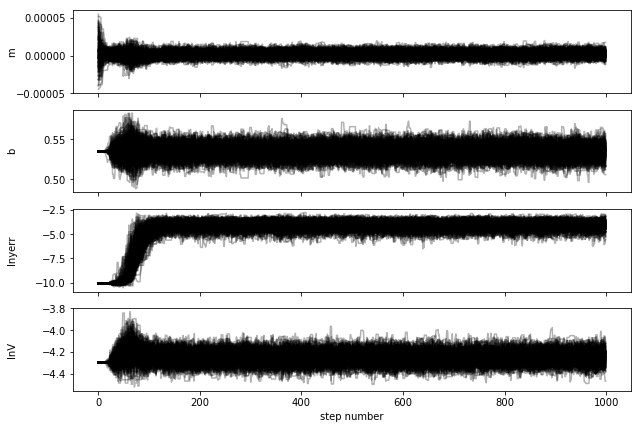

In [19]:
plt.figure(1)
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.chain
labels = ["m", "b", "lnyerr", "lnV"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i].T, "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
    #(nwalkers, nsteps, dim)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
fig.savefig("200walkers_smallinit_a4.0_1000steps.png")
plt.show()

In [20]:
flat_samples = sampler.chain[:, 200:, :].reshape((-1, ndim))

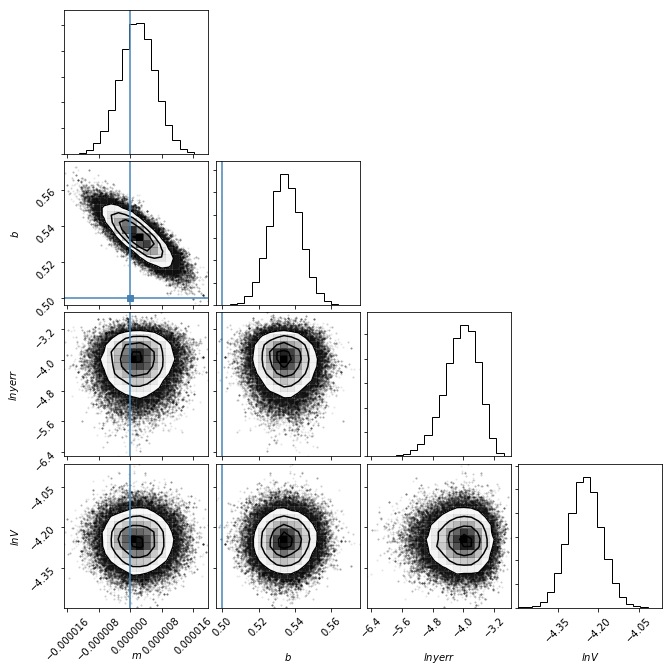

In [21]:
fig = corner.corner(flat_samples, labels=["$m$", "$b$", "$lnyerr$", "$lnV$"],
                      truths=[m_true, b_true, lnyerr_true, lnV_true])
fig.savefig("200walkers_smallinit_a4.0_1000steps_corner.png")

In [22]:
from IPython.display import display, Math
results = []

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    results.append(mcmc)
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [270]:
print(np.exp(-1.373))
print(np.exp(-.586))
print(np.exp(-4.2))

0.253345781013
0.55654903441
0.0149955768205


In [244]:
print(results)

[array([ -2.48356910e-06,   2.35941037e-06,   7.71427808e-06]), array([ 0.5248896 ,  0.53447983,  0.54393626]), array([-4.59181741, -4.02422449, -3.59373128]), array([-4.30942628, -4.24622457, -4.17560802])]


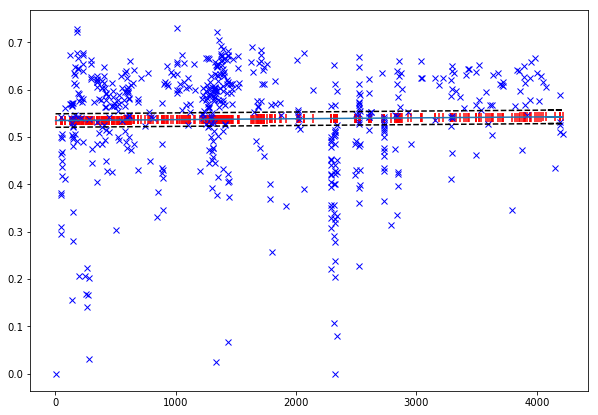

In [25]:
plt.figure(figsize=(10,7))
plt.plot(days, planets_etamb, 'bx')
m = results[0][1]
b = results[1][1]
y = m*days + b
yerr = np.exp(results[2][1]) * y
V = np.exp(results[3][1])
plt.errorbar(days, y, yerr=yerr, ecolor='red')
plt.plot(days, y + V, '--', color='k')
plt.plot(days, y - V, '--', color='k')
plt.show()

In [24]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))
# print("Autocorrelation time:  ", sampler.get_autocorr_time())

Mean acceptance fraction: 0.495


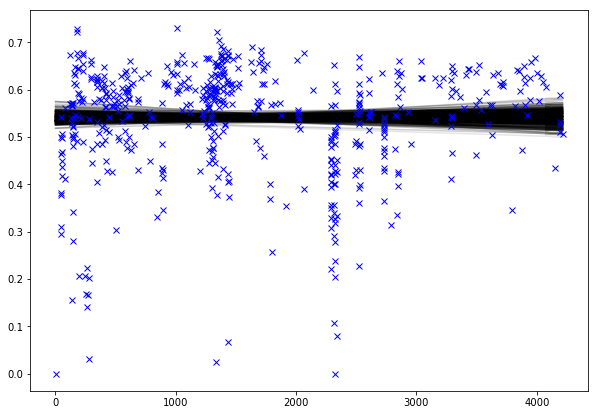

In [284]:
plt.figure(figsize=(10,7))
for m, b, lnyerr, lnV in samples[np.random.randint(len(samples), size=500)][np.random.randint(500)]:
    plt.plot(days, m*days+b, color="k", alpha=0.1)
plt.plot(days, planets_etamb, 'bx')
# plt.errorbar(days, planets_etamb, yerr=np.exp(lnyerr)*(m*days+b))

In [200]:
print(np.random.randint(len(samples), size=100))
print(samples.shape)
print(len(samples))
#(nwalkers, nsteps, dim)
# print(samples[np.random.randint(len(samples), size=200)][0])
print(samples[np.random.randint(len(samples), size=200)][np.random.randint(len(samples))])

[101 175 167  75  68  25 184  37 144  60 126  30 139  40  69 101 190   4
  21 171  78  51  51 114  15  86  30 111  13  11 110 151  94 186 142  47
 114  96  28   3 107 188 125 192 158  68 171  54 106  19  41 171  22 162
  21 119  72  17 135  83 150  82  38 146 100 168 157 114  81 123  40 154
 167  81 103 114  17  40 126  68 107 197  65 112  18 185 160 126 117 190
 114 184  62 120  23 118 136  67  95  80]
(200, 500, 4)
200
[[  4.47286245e-02   6.07366789e-01  -4.11622344e+00   1.74516839e+00]
 [  1.47177594e-02   6.24572178e-01  -4.13210848e+00   1.76677998e+00]
 [  1.47177594e-02   6.24572178e-01  -4.13210848e+00   1.76677998e+00]
 ..., 
 [ -2.03144965e-05   6.17863932e-01  -1.90899081e+00  -4.16234991e-01]
 [ -1.77222057e-05   6.10834448e-01  -1.93683785e+00  -3.91806971e-01]
 [ -1.77222057e-05   6.10834448e-01  -1.93683785e+00  -3.91806971e-01]]
